In [32]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

## 1. 原始定位点数据集加载

In [33]:
path = os.path.curdir
file_name = r'RTT_data.csv'
file_path = os.path.join(path, file_name)

In [34]:
if not os.path.exists(file_path):
    raise Exception('error')
else:
    print('file exists! file path: ', file_path)

file exists! file path:  ./RTT_data.csv


In [35]:
df = pd.read_csv(file_path, encoding='utf-8')

In [36]:
df.head()

%Timestamp[s]  GroundTruthPositionX[m]  GroundTruthPositionY[m]  \
0         1894.6                  -42.039                   21.463   
1         1894.7                  -42.039                   21.463   
2         1894.7                  -42.039                   21.463   
3         1895.2                  -42.039                   21.463   
4         1895.3                  -42.039                   21.463   

   GroundTruthPositionZ[m]  ML_range_estimate[m]  AP_positionX[m]  \
0                     45.5                36.262          -11.004   
1                     45.5                28.160          -19.004   
2                     45.5                33.169          -18.073   
3                     45.5                37.183          -11.004   
4                     45.5                27.092          -19.004   

   AP_positionY[m]  AP_positionZ[m]  AP_index  GroundTruthRange[m]  ...  \
0           21.952             46.2         1               31.047  ...   
1           21.946             46.2         2               23.051  ...   
2           11.164             46.2         3               26.095  ...   
3           21.952             46.2         1               31.047  ...   
4           21.946             46.2         2               23.051  ...   

   channel_side2_ant2_tone105 channel_side2_ant2_tone106  \
0                     -16+12i                    -15+27i   
1                      50-61i                     42-78i   
2                     -43+70i                    -16+64i   
3                     -15-12i                    -20-16i   
4                     -2-118i                   -30-110i   

  channel_side2_ant2_tone107 channel_side2_ant2_tone108  \
0                      2+27i                      3+32i   
1                      4-92i                    -38-88i   
2                      4+56i                     24+18i   
3                    -22-35i                    -34-31i   
4                   -64-102i                    -92-93i   

  channel_side2_ant2_tone109 channel_side2_ant2_tone110  \
0                      9+28i                     14+20i   
1                    -81-65i                    -99-25i   
2                      14-7i                     18-21i   
3                    -43-21i                    -54-10i   
4                   -109-58i                    -123-7i   

  channel_side2_ant2_tone111 channel_side2_ant2_tone112  \
0                       9-8i                     -5-15i   
1                   -104+33i                    -86+83i   
2                      8-29i                    -24-38i   
3                     -49+2i                    -36+27i   
4                   -112+31i                    -86+65i   

  channel_side2_ant2_tone113 channel_side2_ant2_tone114  
0                    -23-20i                    -34-20i  
1                   -51+114i                    -6+139i  
2                    -37-14i                     -46+9i  
3                    -28+43i                    -17+58i  
4                    -46+86i                     -8+84i  

[5 rows x 467 columns]

In [37]:
cols = df.columns.tolist()
cols = cols[0: 3] + cols[4: 9]
cols

['%Timestamp[s]',
 'GroundTruthPositionX[m]',
 'GroundTruthPositionY[m]',
 'ML_range_estimate[m]',
 'AP_positionX[m]',
 'AP_positionY[m]',
 'AP_positionZ[m]',
 'AP_index']

In [38]:
df = df[cols]
df.head()

%Timestamp[s]  GroundTruthPositionX[m]  GroundTruthPositionY[m]  \
0         1894.6                  -42.039                   21.463   
1         1894.7                  -42.039                   21.463   
2         1894.7                  -42.039                   21.463   
3         1895.2                  -42.039                   21.463   
4         1895.3                  -42.039                   21.463   

   ML_range_estimate[m]  AP_positionX[m]  AP_positionY[m]  AP_positionZ[m]  \
0                36.262          -11.004           21.952             46.2   
1                28.160          -19.004           21.946             46.2   
2                33.169          -18.073           11.164             46.2   
3                37.183          -11.004           21.952             46.2   
4                27.092          -19.004           21.946             46.2   

   AP_index  
0         1  
1         2  
2         3  
3         1  
4         2

## 2. 定义计算用的常数

In [39]:
# 横纵坐标的像素点个数
pixel_x = 951
pixel_y = 557
# 横纵坐标起止点
start_x = -43.9705
end_x = 6.3642
start_y = -4.5544
end_y = 24.9266
# 横纵坐标长度
x = 50.3347
y = 29.4810
# 指定y的窗口宽度
y_window = 5

## 3. 测试获取单个发射点和测量点数据坐标，并转为像素点

In [40]:
# 样例
GT = [df.loc[0]['GroundTruthPositionX[m]'], df.loc[0]['GroundTruthPositionY[m]']]
AP = [df.loc[0]['AP_positionX[m]'], df.loc[0]['AP_positionY[m]']]
print('发射点：', GT)
print('测量点：', AP)

发射点： [-42.039, 21.463]
测量点： [-11.004, 21.952]


In [41]:
# 取相对距离 -> 截断
GT[0] = round(GT[0] - start_x, 3)
GT[1] = round(GT[1] - start_y, 3)
AP[0] = round(AP[0] - start_x, 3)
AP[1] = round(AP[1] - start_y, 3)
print('发射点：', GT)
print('测量点：', AP)

发射点： [1.931, 26.017]
测量点： [32.966, 26.506]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26465 (\N{CJK UNIFIED IDEOGRAPH-6761}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Version

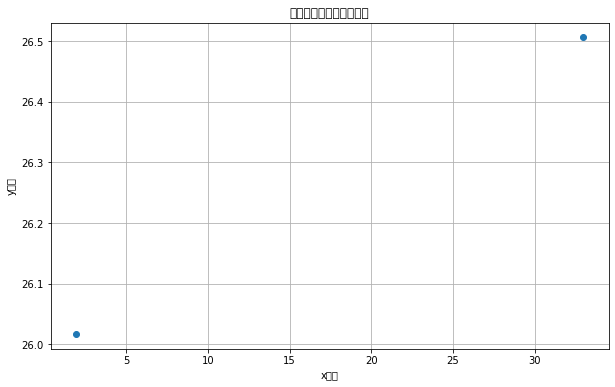

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter([GT[0], AP[0]], [GT[1], AP[1]])
plt.grid(True)
plt.xlabel('x距离')
plt.ylabel('y距离')
plt.title('一条数据距离测距的样例')
plt.show()

In [43]:
# 坐标 -〉 像素
# 坐标
print('发射点：', GT)
print('测量点：', AP)
# 像素
GT[0] = round(GT[0] / x * pixel_x)
GT[1] = round(GT[1] / y * pixel_y)
AP[0] = round(AP[0] / x * pixel_x)
AP[1] = round(AP[1] / y * pixel_y)
print('发射点像素：', GT)
print('测量点像素：', AP)

发射点： [1.931, 26.017]
测量点： [32.966, 26.506]
发射点像素： [36, 492]
测量点像素： [623, 501]


## 4.批处理表，将距离转换为像素点

In [44]:
df['pixel_GT_X'] = df.apply(lambda tmp: round((tmp['GroundTruthPositionX[m]'] - start_x) / x * pixel_x), axis=1)
df['pixel_GT_Y'] = df.apply(lambda tmp: round((tmp['GroundTruthPositionY[m]'] - start_y) / y * pixel_y), axis=1)
df['pixel_AP_X'] = df.apply(lambda tmp: round((tmp['AP_positionX[m]'] - start_x) / x * pixel_x), axis=1)
df['pixel_AP_Y'] = df.apply(lambda tmp: round((tmp['AP_positionY[m]'] - start_y) / y * pixel_y), axis=1)

In [45]:
df.head()

%Timestamp[s]  GroundTruthPositionX[m]  GroundTruthPositionY[m]  \
0         1894.6                  -42.039                   21.463   
1         1894.7                  -42.039                   21.463   
2         1894.7                  -42.039                   21.463   
3         1895.2                  -42.039                   21.463   
4         1895.3                  -42.039                   21.463   

   ML_range_estimate[m]  AP_positionX[m]  AP_positionY[m]  AP_positionZ[m]  \
0                36.262          -11.004           21.952             46.2   
1                28.160          -19.004           21.946             46.2   
2                33.169          -18.073           11.164             46.2   
3                37.183          -11.004           21.952             46.2   
4                27.092          -19.004           21.946             46.2   

   AP_index  pixel_GT_X  pixel_GT_Y  pixel_AP_X  pixel_AP_Y  
0         1          36         492         623         501  
1         2          36         492         472         501  
2         3          36         492         489         297  
3         1          36         492         623         501  
4         2          36         492         472         501

In [46]:
cols = df.columns.tolist()
cols = cols[:1] + cols[7:]
cols

['%Timestamp[s]',
 'AP_index',
 'pixel_GT_X',
 'pixel_GT_Y',
 'pixel_AP_X',
 'pixel_AP_Y']

In [47]:
df = df[cols]
df.head()

%Timestamp[s]  AP_index  pixel_GT_X  pixel_GT_Y  pixel_AP_X  pixel_AP_Y
0         1894.6         1          36         492         623         501
1         1894.7         2          36         492         472         501
2         1894.7         3          36         492         489         297
3         1895.2         1          36         492         623         501
4         1895.3         2          36         492         472         501

In [48]:
GT_X = []
GT_Y = []
AP_X = []
AP_Y = []
for i in range(len(df)):
    GT_X.append(df.loc[i]['pixel_GT_X'])
    GT_Y.append(df.loc[i]['pixel_GT_Y'])
    AP_X.append(df.loc[i]['pixel_AP_X'])
    AP_Y.append(df.loc[i]['pixel_AP_Y'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36716 (\N{CJK UNIFIED IDEOGRAPH-8F6C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32032 (\N{CJK UNIFIED IDEOGRAPH-7D20}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Version

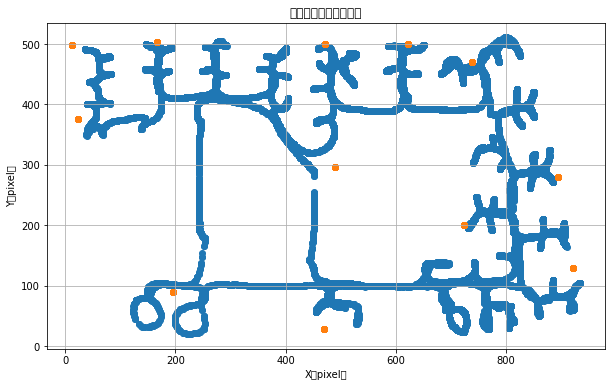

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(GT_X, GT_Y)
plt.scatter(AP_X, AP_Y)
plt.xlabel('X（pixel）')
plt.ylabel('Y（pixel）')
plt.title('转为像素点后的数据集')
plt.grid(True)
plt.show()

## 5.单条数据获取矩形框

In [50]:
df.head()

%Timestamp[s]  AP_index  pixel_GT_X  pixel_GT_Y  pixel_AP_X  pixel_AP_Y
0         1894.6         1          36         492         623         501
1         1894.7         2          36         492         472         501
2         1894.7         3          36         492         489         297
3         1895.2         1          36         492         623         501
4         1895.3         2          36         492         472         501

In [51]:
def get_four_points(GT: list, AP: list) -> list:
    """
    以GT、AP两个点为矩形短轴的中点坐标，以 y_window / y * pixel_y 为短轴长度，GT、AP两点的距离为矩形长轴长度
    GT：定位点的像素坐标（2d） -> [pixel_GT_X, pixel_GT_Y]
    AP：选取点的像素坐标（2d） -> [pixel_AP_X, pixel_AP_Y]
    return：矩形四个角的像素点坐标
    """
    # 1.计算短轴长度 -> width
    width = y_window / y * pixel_y  # y_window=20、y 和 pixel_y 在常数部分定义
    # 2.计算长轴长度 -> length
    square_length = (GT[0] - AP[0]) ** 2 + (GT[1] - AP[1]) ** 2
    length = math.sqrt(square_length)
    # 3.获取sin、cos等角度和长度参数
    #【注】sin、cos是绝对坐标系下矩形旋转的角度！！ 不是矩形的对角角度！！
    diagonal = math.sqrt((length ** 2 + width ** 2))  # 矩形对角线长度
    X = math.sqrt((GT[0] - AP[0]) ** 2)               # 两点横坐标距离
    Y = math.sqrt((GT[1] - AP[1]) ** 2)               # 两点纵坐标距离
    X = AP[0] - GT[0]
    Y = AP[1] - GT[1]
#     print('X = ', X)
#     print('Y = ', Y)
    sin = Y / length                                  # 两点连线与横坐标之间的角的sin值
    cos = X / length                                  # 两点连线与横坐标之间的角的cos值
#     print(sin, cos)
#     print('width = ', width)
    # 4.
    x_inc = sin * width / 2
    y_inc = cos * width / 2
#     print(x_inc, y_inc)
    pt1, pt2, pt3, pt4 = [], [], [], []
    pt1.extend([GT[0] - x_inc, GT[1] + y_inc])
    pt2.extend([GT[0] + x_inc, GT[1] - y_inc])
    pt3.extend([AP[0] - x_inc, AP[1] + y_inc])
    pt4.extend([AP[0] + x_inc, AP[1] - y_inc])
    return pt1, pt2, pt3, pt4

### 5.1 测试
测试分别为 GP和AP的全部相对位置：

#### 1、GT在AP左下方 [0, 0] [300, 150]

#### 2、GT在AP左上方 [0, 150] [300, 0]

#### 3、GT在AP右下方 [300, 0] [0, 150]

#### 4、GT在AP右下方 [300, 150] [0, 0]

In [52]:
GT = [df.loc[0]['pixel_GT_X'], df.loc[0]['pixel_GT_Y']]
AP = [df.loc[0]['pixel_AP_X'], df.loc[0]['pixel_AP_Y']]
# 1
GT, AP = [0, 0], [300, 150]
GT, AP = [0, 150], [300, 0]
GT, AP = [300, 0], [0, 150]
GT, AP = [300, 150], [0, 0]
print('GT = ', GT)
print('AP = ', AP)

GT =  [300, 150]
AP =  [0, 0]


In [53]:
res = get_four_points(GT, AP)
print('计算得出的四个点为：')
for item in res:
    print(item)
x_res = [pt[0] for pt in res]
y_res = [pt[1] for pt in res]

计算得出的四个点为：
[321.12360271814697, 107.75279456370603]
[278.87639728185303, 192.24720543629397]
[21.123602718146987, -42.247205436293974]
[-21.123602718146987, 42.247205436293974]


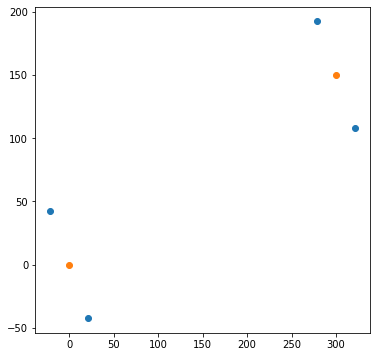

In [54]:
plt.figure(figsize=(6, 6))
plt.scatter(x_res, y_res)
plt.scatter([GT[0], AP[0]], [GT[1], AP[1]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Version

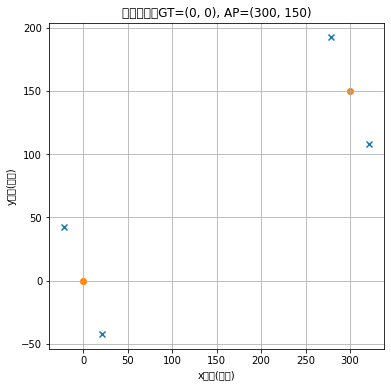

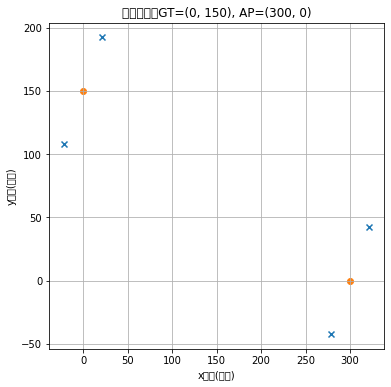

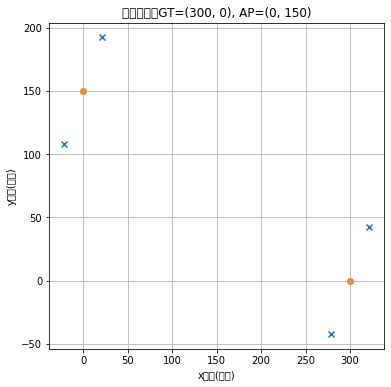

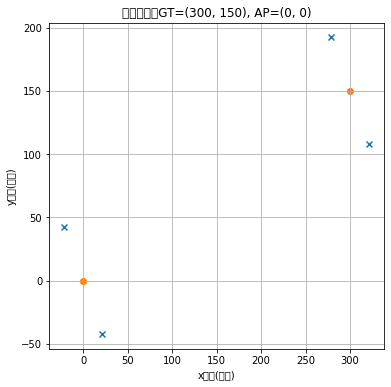

In [55]:
for GT, AP in [[[0, 0], [300, 150]], [[0, 150], [300, 0]], [[300, 0], [0, 150]], [[300, 150], [0, 0]]]:
    print('=' * 100)
    res = get_four_points(GT, AP)
    x_res = [pt[0] for pt in res]
    y_res = [pt[1] for pt in res]
    plt.figure(figsize=(6, 6))
    plt.scatter(x_res, y_res, marker='x')
    plt.scatter([GT[0], AP[0]], [GT[1], AP[1]])
    plt.xlabel('x刻度(像素)')
    plt.ylabel('y刻度(像素)')
    plt.grid(True)
    plt.title('测试点坐标GT=(%s, %s), AP=(%s, %s)' % (GT[0], GT[1], AP[0], AP[1]))
    plt.show()

In [56]:
for i in tqdm(range(len(df))):
    GT = [df.loc[i]['pixel_GT_X'], df.loc[0]['pixel_GT_Y']]
    AP = [df.loc[i]['pixel_AP_X'], df.loc[0]['pixel_AP_Y']]
    res = get_four_points(GT, AP)
    print('res[%s] = %s' % (i, res))
    df.loc[i, ['pt1_x', 'pt1_y']] = [round(x) for x in res[0]]
    df.loc[i, ['pt2_x', 'pt2_y']] = [round(x) for x in res[1]]
    df.loc[i, ['pt3_x', 'pt3_y']] = [round(x) for x in res[2]]
    df.loc[i, ['pt4_x', 'pt4_y']] = [round(x) for x in res[3]]


  0%|          | 0/29581 [00:00<?, ?it/s]

res[0] = ([35.275886972223375, 539.2282608116532], [36.724113027776625, 444.77173918834677], [622.2758869722234, 548.2282608116532], [623.7241130277766, 453.77173918834677])
res[1] = ([35.02519778710349, 539.2237516469866], [36.97480221289651, 444.77624835301344], [471.0251977871035, 548.2237516469866], [472.9748022128965, 453.77624835301344])
res[2] = ([35.0617650533978, 539.2244923123109], [36.9382349466022, 444.7755076876891], [488.0617650533978, 548.2244923123109], [489.9382349466022, 453.7755076876891])
res[3] = ([35.275886972223375, 539.2282608116532], [36.724113027776625, 444.77173918834677], [622.2758869722234, 548.2282608116532], [623.7241130277766, 453.77173918834677])
res[4] = ([35.02519778710349, 539.2237516469866], [36.97480221289651, 444.77624835301344], [471.0251977871035, 548.2237516469866], [472.9748022128965, 453.77624835301344])
res[5] = ([35.0617650533978, 539.2244923123109], [36.9382349466022, 444.7755076876891], [488.0617650533978, 548.2244923123109], [489.9382349

  0%|          | 43/29581 [00:00<01:10, 418.64it/s]

res[29] = ([35.0617650533978, 539.2244923123109], [36.9382349466022, 444.7755076876891], [488.0617650533978, 548.2244923123109], [489.9382349466022, 453.7755076876891])
res[30] = ([35.275886972223375, 539.2282608116532], [36.724113027776625, 444.77173918834677], [622.2758869722234, 548.2282608116532], [623.7241130277766, 453.77173918834677])
res[31] = ([35.02519778710349, 539.2237516469866], [36.97480221289651, 444.77624835301344], [471.0251977871035, 548.2237516469866], [472.9748022128965, 453.77624835301344])
res[32] = ([35.0617650533978, 539.2244923123109], [36.9382349466022, 444.7755076876891], [488.0617650533978, 548.2244923123109], [489.9382349466022, 453.7755076876891])
res[33] = ([35.275886972223375, 539.2282608116532], [36.724113027776625, 444.77173918834677], [622.2758869722234, 548.2282608116532], [623.7241130277766, 453.77173918834677])
res[34] = ([35.02519778710349, 539.2237516469866], [36.97480221289651, 444.77624835301344], [471.0251977871035, 548.2237516469866], [472.97

  0%|          | 95/29581 [00:00<01:01, 476.96it/s]

res[50] = ([35.275886972223375, 539.2282608116532], [36.724113027776625, 444.77173918834677], [622.2758869722234, 548.2282608116532], [623.7241130277766, 453.77173918834677])
res[51] = ([35.02519778710349, 539.2237516469866], [36.97480221289651, 444.77624835301344], [471.0251977871035, 548.2237516469866], [472.9748022128965, 453.77624835301344])
res[52] = ([35.0617650533978, 539.2244923123109], [36.9382349466022, 444.7755076876891], [488.0617650533978, 548.2244923123109], [489.9382349466022, 453.7755076876891])
res[53] = ([35.275886972223375, 539.2282608116532], [36.724113027776625, 444.77173918834677], [622.2758869722234, 548.2282608116532], [623.7241130277766, 453.77173918834677])
res[54] = ([35.02519778710349, 539.2237516469866], [36.97480221289651, 444.77624835301344], [471.0251977871035, 548.2237516469866], [472.9748022128965, 453.77624835301344])
res[55] = ([36.05969013409663, 539.2244510431474], [37.94030986590337, 444.7755489568527], [488.0596901340966, 548.2244510431474], [489

  1%|          | 157/29581 [00:00<00:54, 540.73it/s]

res[138] = ([64.23826340371164, 539.2276689698783], [65.76173659628836, 444.7723310301217], [622.2382634037116, 548.2276689698783], [623.7617365962884, 453.7723310301217])
res[139] = ([62.95833108802803, 539.2223240093958], [65.04166891197197, 444.77767599060417], [470.95833108802805, 548.2223240093958], [473.04166891197195, 453.77767599060417])
res[140] = ([62.00232519792558, 539.2232739648559], [63.99767480207442, 444.77672603514407], [488.0023251979256, 548.2232739648559], [489.9976748020744, 453.77672603514407])
res[141] = ([57.97093606925916, 539.2226003773297], [60.02906393074084, 444.77739962267026], [470.97093606925915, 548.2226003773297], [473.02906393074085, 453.77739962267026])
res[142] = ([58.01160181083095, 539.2234690380766], [59.98839818916905, 444.77653096192336], [488.01160181083094, 548.2234690380766], [489.98839818916906, 453.77653096192336])
res[143] = ([56.24902725762996, 539.2278413534935], [57.75097274237004, 444.7721586465065], [622.24902725763, 548.227841353493

  1%|          | 221/29581 [00:00<00:50, 577.79it/s]

res[169] = ([55.0184468676823, 539.2236118103959], [56.9815531323177, 444.776388189604], [488.0184468676823, 548.2236118103959], [489.9815531323177, 453.776388189604])
res[170] = ([57.24769843920963, 539.2278202051732], [58.75230156079037, 444.7721797948268], [622.2476984392097, 548.2278202051732], [623.7523015607903, 453.7721797948268])
res[171] = ([56.97342055536336, 539.2226544532853], [59.02657944463664, 444.77734554671474], [470.97342055536336, 548.2226544532853], [473.02657944463664, 453.77734554671474])
res[172] = ([57.013894077399506, 539.2235169600904], [58.986105922600494, 444.7764830399096], [488.0138940773995, 548.2235169600904], [489.9861059226005, 453.7764830399096])
res[173] = ([57.24769843920963, 539.2278202051732], [58.75230156079037, 444.7721797948268], [622.2476984392097, 548.2278202051732], [623.7523015607903, 453.7721797948268])
res[174] = ([56.97342055536336, 539.2226544532853], [59.02657944463664, 444.77734554671474], [470.97342055536336, 548.2226544532853], [473

  1%|          | 284/29581 [00:00<00:49, 595.76it/s]

res[265] = ([63.23962572753362, 539.2276909231894], [64.76037427246638, 444.77230907681064], [622.2396257275336, 548.2276909231894], [623.7603742724664, 453.77230907681064])
res[266] = ([62.95833108802803, 539.2223240093958], [65.04166891197197, 444.77767599060417], [470.95833108802805, 548.2223240093958], [473.04166891197195, 453.77767599060417])
res[267] = ([63.99762129912507, 539.22317435233], [66.00237870087493, 444.7768256476699], [487.99762129912506, 548.22317435233], [490.00237870087494, 453.7768256476699])
res[268] = ([64.23826340371164, 539.2276689698783], [65.76173659628836, 444.7723310301217], [622.2382634037116, 548.2276689698783], [623.7617365962884, 453.7723310301217])
res[269] = ([64.95320222820914, 539.222210594121], [67.04679777179086, 444.77778940587905], [470.95320222820914, 548.222210594121], [473.04679777179086, 453.77778940587905])
res[270] = ([64.99525268051875, 539.223124015619], [67.00474731948125, 444.77687598438104], [487.9952526805187, 548.223124015619], [49

  1%|          | 349/29581 [00:00<00:47, 611.14it/s]

res[296] = ([100.9018361863521, 539.2210439868596], [103.0981638136479, 444.77895601314043], [487.9018361863521, 548.2210439868596], [490.0981638136479, 453.77895601314043])
res[297] = ([107.17468076567702, 539.2266006307037], [108.82531923432298, 444.7733993692962], [622.1746807656771, 548.2266006307037], [623.8253192343229, 453.7733993692962])
res[298] = ([107.8292735363844, 539.2193006991624], [110.1707264636156, 444.78069930083757], [470.8292735363844, 548.2193006991624], [473.1707264636156, 453.78069930083757])
res[299] = ([107.88161809154857, 539.2205694679488], [110.11838190845143, 444.77943053205115], [487.8816180915486, 548.2205694679488], [490.1183819084514, 453.77943053205115])
res[300] = ([115.16166204750003, 539.2263713241651], [116.83833795249997, 444.7736286758348], [622.1616620475, 548.2263713241651], [623.8383379525, 453.7736286758348])
res[301] = ([115.80290772754144, 539.2186396358658], [118.19709227245856, 444.78136036413423], [470.8029077275414, 548.2186396358658],

  1%|▏         | 411/29581 [00:00<00:47, 610.34it/s]

res[392] = ([167.0658875465379, 539.2245740361395], [168.9341124534621, 444.77542596386047], [622.0658875465379, 548.2245740361395], [623.9341124534621, 453.77542596386047])
res[393] = ([166.60224299041494, 539.2131256570955], [169.39775700958506, 444.7868743429045], [470.60224299041494, 548.2131256570955], [473.39775700958506, 453.7868743429045])
res[394] = ([166.67620773595456, 539.2152574176207], [169.32379226404544, 444.7847425823793], [487.67620773595456, 548.2152574176207], [490.32379226404544, 453.7847425823793])
res[395] = ([168.06383083748324, 539.2245333091782], [169.93616916251676, 444.77546669082176], [622.0638308374832, 548.2245333091782], [623.9361691625168, 453.77546669082176])
res[396] = ([167.59763399065508, 539.212988981279], [170.40236600934492, 444.78701101872105], [470.5976339906551, 548.212988981279], [473.4023660093449, 453.78701101872105])
res[397] = ([167.67207414976764, 539.2151413415953], [170.32792585023236, 444.78485865840474], [487.67207414976764, 548.2151

  2%|▏         | 473/29581 [00:00<00:47, 609.54it/s]

res[473] = ([167.67207414976764, 539.2151413415953], [170.32792585023236, 444.78485865840474], [487.67207414976764, 548.2151413415953], [490.32792585023236, 453.78485865840474])
res[474] = ([166.06793524021924, 539.2246144955584], [167.93206475978076, 444.77538550444154], [622.0679352402192, 548.2246144955584], [623.9320647597808, 453.77538550444154])
res[475] = ([165.60682180679538, 539.2132609919344], [168.39317819320462, 444.78673900806564], [470.6068218067954, 548.2132609919344], [473.3931781932046, 453.78673900806564])
res[476] = ([165.68031567784953, 539.2153724147169], [168.31968432215047, 444.78462758528315], [487.68031567784953, 548.2153724147169], [490.31968432215047, 453.78462758528315])
res[477] = ([166.06793524021924, 539.2246144955584], [167.93206475978076, 444.77538550444154], [622.0679352402192, 548.2246144955584], [623.9320647597808, 453.77538550444154])
res[478] = ([165.60682180679538, 539.2132609919344], [168.39317819320462, 444.78673900806564], [470.6068218067954, 5

  2%|▏         | 535/29581 [00:00<00:47, 611.12it/s]

res[515] = ([169.66372907834725, 539.214905898397], [172.33627092165275, 444.785094101603], [487.6637290783473, 548.214905898397], [490.3362709216527, 453.785094101603])
res[516] = ([167.0658875465379, 539.2245740361395], [168.9341124534621, 444.77542596386047], [622.0658875465379, 548.2245740361395], [623.9341124534621, 453.77542596386047])
res[517] = ([165.60682180679538, 539.2132609919344], [168.39317819320462, 444.78673900806564], [470.6068218067954, 548.2132609919344], [473.3931781932046, 453.78673900806564])
res[518] = ([165.68031567784953, 539.2153724147169], [168.31968432215047, 444.78462758528315], [487.68031567784953, 548.2153724147169], [490.31968432215047, 453.78462758528315])
res[519] = ([164.0720038174894, 539.2246946210961], [165.9279961825106, 444.7753053789039], [622.0720038174894, 548.2246946210961], [623.9279961825106, 453.7753053789039])
res[520] = ([163.61589006718276, 539.2135277083212], [166.38410993281724, 444.7864722916788], [470.61589006718276, 548.21352770832

  2%|▏         | 597/29581 [00:01<00:47, 612.82it/s]

res[597] = ([251.0605215292207, 539.1939761222968], [254.9394784707793, 444.80602387770324], [470.0605215292207, 548.1939761222968], [473.9394784707793, 453.80602387770324])
res[598] = ([251.2000189760787, 539.1995024050472], [254.7999810239213, 444.8004975949528], [487.2000189760787, 548.1995024050472], [490.7999810239213, 453.8004975949528])
res[599] = ([256.83568456730484, 539.219459214859], [259.16431543269516, 444.7805407851411], [621.8356845673048, 548.219459214859], [624.1643154326952, 453.7805407851411])
res[600] = ([256.01528570751896, 539.1920953989941], [259.98471429248104, 444.80790460100593], [470.01528570751896, 548.1920953989941], [473.98471429248104, 453.80790460100593])
res[601] = ([256.1611167743792, 539.1980027909345], [259.8388832256208, 444.80199720906546], [487.1611167743792, 548.1980027909345], [490.8388832256208, 453.80199720906546])
res[602] = ([262.8162373782947, 539.2189756880217], [265.1837626217053, 444.7810243119783], [621.8162373782948, 548.2189756880217]

  2%|▏         | 659/29581 [00:01<00:47, 614.77it/s]

res[639] = ([257.9965955146395, 539.1913056551582], [262.0034044853605, 444.80869434484174], [469.9965955146395, 548.1913056551582], [474.0034044853605, 453.80869434484174])
res[640] = ([258.14508131989925, 539.1973753047852], [261.85491868010075, 444.80262469521483], [487.14508131989925, 548.1973753047852], [490.85491868010075, 453.80262469521483])
res[641] = ([264.80960985530214, 539.218809073016], [267.19039014469786, 444.781190926984], [621.8096098553021, 548.218809073016], [624.1903901446979, 453.781190926984])
res[642] = ([263.9383535242783, 539.1887971109635], [268.0616464757217, 444.8112028890365], [469.9383535242783, 548.1887971109635], [474.0616464757217, 453.8112028890365])
res[643] = ([265.08668739866306, 539.1950441663116], [268.91331260133694, 444.80495583368844], [487.08668739866306, 548.1950441663116], [490.91331260133694, 453.80495583368844])
res[644] = ([269.7927118737745, 539.2183800479306], [272.2072881262255, 444.78161995206943], [621.7927118737745, 548.21838004793

  2%|▏         | 724/29581 [00:01<00:46, 624.35it/s]

res[671] = ([288.7238764907238, 539.2165698432193], [291.2761235092762, 444.7834301567807], [621.7238764907238, 548.2165698432193], [624.2761235092762, 453.7834301567807])
res[672] = ([287.66711269269723, 539.1761655476785], [292.33288730730277, 444.8238344523216], [469.66711269269723, 548.1761655476785], [474.33288730730277, 453.8238344523216])
res[673] = ([286.8766273052233, 539.1860598839277], [291.1233726947767, 444.81394011607233], [486.8766273052233, 548.1860598839277], [491.1233726947767, 453.81394011607233])
res[674] = ([284.7390124971213, 539.2169764966809], [287.2609875028787, 444.7830235033191], [621.7390124971213, 548.2169764966809], [624.2609875028787, 453.7830235033191])
res[675] = ([283.71716383918533, 539.1786139901694], [288.28283616081467, 444.8213860098306], [469.71716383918533, 548.1786139901694], [474.28283616081467, 453.8213860098306])
res[676] = ([282.9181803776651, 539.18791143959], [287.0818196223349, 444.8120885604099], [486.9181803776651, 548.18791143959], [4

  3%|▎         | 787/29581 [00:01<00:46, 618.97it/s]

res[767] = ([373.49820080481277, 539.018791594178], [382.50179919518723, 444.981208405822], [467.49820080481277, 548.018791594178], [476.50179919518723, 453.981208405822])
res[768] = ([374.18275847980965, 539.0793120823474], [381.81724152019035, 444.9206879176525], [485.18275847980965, 548.0793120823474], [492.81724152019035, 453.9206879176525])
res[769] = ([378.25179820019645, 539.2014485946956], [381.74820179980355, 444.79855140530435], [621.2517982001965, 548.2014485946956], [624.7482017998035, 453.79855140530435])
res[770] = ([375.4012535140067, 539.0094085234871], [384.5987464859933, 444.9905914765129], [467.4012535140067, 548.0094085234871], [476.5987464859933, 453.9905914765129])
res[771] = ([376.1131873861325, 539.0736194346176], [383.8868126138675, 444.9263805653823], [485.1131873861325, 548.0736194346176], [492.8868126138675, 453.9263805653823])
res[772] = ([378.25179820019645, 539.2014485946956], [381.74820179980355, 444.79855140530435], [621.2517982001965, 548.2014485946956

  3%|▎         | 849/29581 [00:01<00:47, 605.12it/s]

res[844] = ([393.3512047261897, 539.0044855463043], [402.6487952738103, 444.99551445369565], [484.3512047261897, 548.0044855463043], [493.6487952738103, 453.99551445369565])
res[845] = ([396.112157206309, 539.1960698422744], [399.887842793691, 444.80393015772563], [621.112157206309, 548.1960698422744], [624.887842793691, 453.80393015772563])
res[846] = ([393.2204121427438, 538.8788792866338], [404.7795878572562, 445.1211207133661], [466.2204121427438, 547.8788792866338], [477.7795878572562, 454.1211207133661])
res[847] = ([394.3000600815189, 538.9993991848108], [403.6999399184811, 445.0006008151891], [484.3000600815189, 547.9993991848108], [493.6999399184811, 454.0006008151891])
res[848] = ([398.0952532920059, 539.1953906536319], [401.9047467079941, 444.8046093463682], [621.0952532920059, 548.1953906536319], [624.9047467079941, 453.8046093463682])
res[849] = ([394.14136671363, 538.8690662909597], [405.85863328637, 445.13093370904033], [466.14136671363, 547.8690662909597], [477.85863328

  3%|▎         | 910/29581 [00:01<00:49, 582.76it/s]

res[910] = ([395.24778337837256, 538.9941421472045], [404.75221662162744, 445.0058578527955], [484.24778337837256, 547.9941421472045], [493.75221662162744, 454.0058578527955])
res[911] = ([398.0952532920059, 539.1953906536319], [401.9047467079941, 444.8046093463682], [621.0952532920059, 548.1953906536319], [624.9047467079941, 453.8046093463682])
res[912] = ([394.14136671363, 538.8690662909597], [405.85863328637, 445.13093370904033], [466.14136671363, 547.8690662909597], [477.85863328637, 454.13093370904033])
res[913] = ([395.24778337837256, 538.9941421472045], [404.75221662162744, 445.0058578527955], [484.24778337837256, 547.9941421472045], [493.75221662162744, 454.0058578527955])
res[914] = ([398.0952532920059, 539.1953906536319], [401.9047467079941, 444.8046093463682], [621.0952532920059, 548.1953906536319], [624.9047467079941, 453.8046093463682])
res[915] = ([394.14136671363, 538.8690662909597], [405.85863328637, 445.13093370904033], [466.14136671363, 547.8690662909597], [477.858633

  3%|▎         | 969/29581 [00:01<00:56, 507.38it/s]

res[967] = ([396.194336811561, 538.9887067314032], [405.805663188439, 445.0112932685968], [484.194336811561, 547.9887067314032], [493.805663188439, 454.0112932685968])
res[968] = ([399.08668739866306, 539.1950441663116], [402.91331260133694, 444.80495583368844], [621.086687398663, 548.1950441663116], [624.913312601337, 453.80495583368844])
res[969] = ([395.0601467498375, 538.8588423068376], [406.9398532501625, 445.1411576931625], [466.0601467498375, 547.8588423068376], [477.9398532501625, 454.1411576931625])
res[970] = ([396.194336811561, 538.9887067314032], [405.805663188439, 445.0112932685968], [484.194336811561, 547.9887067314032], [493.805663188439, 454.0112932685968])
res[971] = ([395.0601467498375, 538.8588423068376], [406.9398532501625, 445.1411576931625], [466.0601467498375, 547.8588423068376], [477.9398532501625, 454.1411576931625])
res[972] = ([396.194336811561, 538.9887067314032], [405.805663188439, 445.0112932685968], [484.194336811561, 547.9887067314032], [493.805663188439

  3%|▎         | 1022/29581 [00:01<00:56, 501.63it/s]

res[990] = ([399.08668739866306, 539.1950441663116], [402.91331260133694, 444.80495583368844], [621.086687398663, 548.1950441663116], [624.913312601337, 453.80495583368844])
res[991] = ([394.14136671363, 538.8690662909597], [405.85863328637, 445.13093370904033], [466.14136671363, 547.8690662909597], [477.85863328637, 454.13093370904033])
res[992] = ([395.24778337837256, 538.9941421472045], [404.75221662162744, 445.0058578527955], [484.24778337837256, 547.9941421472045], [493.75221662162744, 454.0058578527955])
res[993] = ([399.08668739866306, 539.1950441663116], [402.91331260133694, 444.80495583368844], [621.086687398663, 548.1950441663116], [624.913312601337, 453.80495583368844])
res[994] = ([395.0601467498375, 538.8588423068376], [406.9398532501625, 445.1411576931625], [466.0601467498375, 547.8588423068376], [477.9398532501625, 454.1411576931625])
res[995] = ([396.194336811561, 538.9887067314032], [405.805663188439, 445.0112932685968], [484.194336811561, 547.9887067314032], [493.8056

  4%|▎         | 1079/29581 [00:01<00:55, 517.68it/s]

res[1072] = ([390.44533476225, 538.9060620076666], [401.55466523775, 445.0939379923334], [466.44533476225, 547.9060620076666], [477.55466523775, 454.0939379923334])
res[1073] = ([391.45024112673195, 539.0141750237697], [400.54975887326805, 444.9858249762303], [484.45024112673195, 548.0141750237697], [493.54975887326805, 453.9858249762303])
res[1074] = ([396.112157206309, 539.1960698422744], [399.887842793691, 444.80393015772563], [621.112157206309, 548.1960698422744], [624.887842793691, 453.80393015772563])
res[1075] = ([392.29736856000653, 538.8883029510573], [403.70263143999347, 445.1116970489427], [466.29736856000653, 547.8883029510573], [477.70263143999347, 454.1116970489427])
res[1076] = ([393.3512047261897, 539.0044855463043], [402.6487952738103, 444.99551445369565], [484.3512047261897, 548.0044855463043], [493.6487952738103, 453.99551445369565])
res[1077] = ([400.07804417758246, 539.1946929726978], [403.92195582241754, 444.8053070273022], [621.0780441775825, 548.1946929726978], 

  4%|▍         | 1137/29581 [00:02<00:53, 534.74it/s]

res[1103] = ([370.31470936992025, 539.0898247176859], [377.68529063007975, 444.9101752823141], [485.31470936992025, 548.0898247176859], [492.68529063007975, 453.9101752823141])
res[1104] = ([372.2938679051011, 539.2029879588707], [375.7061320948989, 444.79701204112934], [621.293867905101, 548.2029879588707], [624.706132094899, 453.79701204112934])
res[1105] = ([368.7236516276854, 539.0398320954607], [377.2763483723146, 444.9601679045393], [467.7236516276854, 548.0398320954607], [476.2763483723146, 453.9601679045393])
res[1106] = ([369.3462881977359, 539.0922854514041], [376.6537118022641, 444.9077145485959], [485.3462881977359, 548.0922854514041], [492.6537118022641, 453.9077145485959])
res[1107] = ([371.3006835826254, 539.2032338159598], [374.6993164173746, 444.79676618404017], [621.3006835826254, 548.2032338159598], [624.6993164173746, 453.79676618404017])
res[1108] = ([368.7236516276854, 539.0398320954607], [377.2763483723146, 444.9601679045393], [467.7236516276854, 548.039832095460

  4%|▍         | 1194/29581 [00:02<00:52, 543.40it/s]

res[1186] = ([375.14828601076863, 539.0765043128278], [382.85171398923137, 444.9234956871722], [485.14828601076863, 548.0765043128278], [492.85171398923137, 453.9234956871722])
res[1187] = ([378.25179820019645, 539.2014485946956], [381.74820179980355, 444.79855140530435], [621.2517982001965, 548.2014485946956], [624.7482017998035, 453.79855140530435])
res[1188] = ([375.4012535140067, 539.0094085234871], [384.5987464859933, 444.9905914765129], [467.4012535140067, 548.0094085234871], [476.5987464859933, 453.9905914765129])
res[1189] = ([376.1131873861325, 539.0736194346176], [383.8868126138675, 444.9263805653823], [485.1131873861325, 548.0736194346176], [492.8868126138675, 453.9263805653823])
res[1190] = ([381.2299761754922, 539.2006353202074], [384.7700238245078, 444.79936467979263], [621.2299761754922, 548.2006353202074], [624.7700238245078, 453.79936467979263])
res[1191] = ([377.3000600815189, 538.9993991848108], [386.6999399184811, 445.0006008151891], [467.3000600815189, 547.99939918

  4%|▍         | 1249/29581 [00:02<00:52, 541.78it/s]

res[1218] = ([407.6332931867587, 538.6558098171951], [422.3667068132413, 445.34419018280494], [464.6332931867587, 547.6558098171951], [479.3667068132413, 454.34419018280494])
res[1219] = ([409.29736856000653, 538.8883029510573], [420.70263143999347, 445.1116970489427], [483.29736856000653, 547.8883029510573], [494.70263143999347, 454.1116970489427])
res[1220] = ([417.9079451774876, 539.187458774447], [422.0920548225124, 444.812541225553], [620.9079451774876, 548.187458774447], [625.0920548225124, 453.812541225553])
res[1221] = ([417.7366874196967, 538.3165629015165], [436.2633125803033, 445.6834370984836], [462.7366874196967, 547.3165629015165], [481.2633125803033, 454.6834370984836])
res[1222] = ([420.2145966014786, 538.743890078703], [433.7854033985214, 445.256109921297], [482.2145966014786, 547.743890078703], [495.7854033985214, 454.256109921297])
res[1223] = ([428.7883435459862, 539.1820043522947], [433.2116564540138, 444.81799564770535], [620.7883435459862, 548.1820043522947], [62

  4%|▍         | 1304/29581 [00:02<00:54, 523.01it/s]

res[1293] = ([446.60065151106585, 525.3993484889342], [513.3993484889342, 458.60065151106585], [455.60065151106585, 534.3993484889342], [522.3993484889342, 467.60065151106585])
res[1294] = ([473.113538783735, 539.1455331989949], [478.886461216265, 444.85446680100506], [620.113538783735, 548.1455331989949], [625.886461216265, 453.85446680100506])
res[1295] = ([432.8371974677349, 472.8165322078822], [519.1628025322651, 511.1834677921178], [428.8371974677349, 481.8165322078822], [515.1628025322651, 520.1834677921179])
res[1296] = ([449.11404309483385, 530.83527108524], [502.88595690516615, 453.16472891475996], [462.11404309483385, 539.83527108524], [515.8859569051662, 462.16472891475996])
res[1297] = ([466.2442843844335, 539.1533560885824], [471.7557156155665, 444.8466439114176], [620.2442843844335, 548.1533560885824], [625.7557156155665, 453.8466439114176])
res[1298] = ([424.190071824723, 506.9366427250923], [513.8099281752769, 477.0633572749077], [427.190071824723, 515.9366427250923], [

  5%|▍         | 1360/29581 [00:02<00:53, 531.95it/s]

res[1320] = ([447.5493212507273, 536.6352941645656], [478.4506787492727, 447.3647058354344], [473.5493212507273, 545.6352941645656], [504.4506787492727, 456.3647058354344])
res[1321] = ([462.3138207838533, 539.1573684612413], [467.6861792161467, 444.8426315387587], [620.3138207838533, 548.1573684612413], [625.6861792161467, 453.8426315387587])
res[1322] = ([448.7880298192611, 535.9861460174438], [483.2119701807389, 448.01385398255616], [471.7880298192611, 544.9861460174438], [506.2119701807389, 457.01385398255616])
res[1323] = ([467.22633507793415, 539.1523036751189], [472.77366492206585, 444.84769632488104], [620.2263350779342, 548.1523036751189], [625.7736649220658, 453.84769632488104])
res[1324] = ([424.0550829166916, 497.2161018981454], [517.9449170833084, 486.7838981018546], [425.0550829166916, 506.2161018981454], [518.9449170833084, 495.7838981018546])
res[1325] = ([449.87639728185303, 534.2472054362939], [492.12360271814697, 449.752794563706], [467.87639728185303, 543.2472054362

  5%|▍         | 1414/29581 [00:02<00:52, 533.41it/s]

res[1398] = ([463.2967672250865, 539.1563939623798], [468.7032327749135, 444.84360603762025], [620.2967672250865, 548.1563939623798], [625.7032327749135, 453.84360603762025])
res[1399] = ([427.71588607250317, 520.998755276942], [502.28411392749683, 463.001244723058], [434.71588607250317, 529.998755276942], [509.28411392749683, 472.001244723058])
res[1400] = ([448.4151015090453, 536.2263959758792], [481.5848984909547, 447.7736040241208], [472.4151015090453, 545.2263959758792], [505.5848984909547, 456.7736040241208])
res[1401] = ([460.34729145051347, 539.1592631019826], [465.65270854948653, 444.84073689801744], [620.3472914505135, 548.1592631019826], [625.6527085494865, 453.84073689801744])
res[1402] = ([429.60065151106585, 525.3993484889342], [496.39934848893415, 458.60065151106585], [438.60065151106585, 534.3993484889342], [505.39934848893415, 467.60065151106585])
res[1403] = ([447.5493212507273, 536.6352941645656], [478.4506787492727, 447.3647058354344], [473.5493212507273, 545.635294

  5%|▍         | 1468/29581 [00:02<00:53, 528.47it/s]

res[1429] = ([443.69909314930135, 518.2006045671325], [522.3009068506987, 465.7993954328676], [449.69909314930135, 527.2006045671325], [528.3009068506987, 474.7993954328676])
res[1430] = ([479.9697956183763, 539.1365126030355], [486.0302043816237, 444.8634873969645], [619.9697956183763, 548.1365126030355], [626.0302043816237, 453.8634873969645])
res[1431] = ([453.0897655122541, 455.44304673719944], [512.9102344877459, 528.5569532628006], [442.0897655122541, 464.44304673719944], [501.9102344877459, 537.5569532628006])
res[1432] = ([443.69909314930135, 518.2006045671325], [522.3009068506987, 465.7993954328676], [449.69909314930135, 527.2006045671325], [528.3009068506987, 474.7993954328676])
res[1433] = ([479.9697956183763, 539.1365126030355], [486.0302043816237, 444.8634873969645], [619.9697956183763, 548.1365126030355], [626.0302043816237, 453.8634873969645])
res[1434] = ([453.0897655122541, 455.44304673719944], [512.9102344877459, 528.5569532628006], [442.0897655122541, 464.44304673719

  5%|▌         | 1522/29581 [00:02<00:52, 531.76it/s]

res[1504] = ([510.1166297930161, 445.60906669686193], [527.8833702069838, 538.3909333031381], [463.1166297930161, 454.60906669686193], [480.8833702069839, 547.3909333031381])
res[1505] = ([505.42746410735265, 446.75821369117557], [532.5725358926474, 537.2417863088244], [475.42746410735265, 455.75821369117557], [502.57253589264735, 546.2417863088244])
res[1506] = ([518.7660697890835, 539.0436690101827], [527.2339302109165, 444.95633098981733], [618.7660697890835, 548.0436690101827], [627.2339302109165, 453.95633098981733])
res[1507] = ([514.7914562779978, 445.4849189086538], [531.2085437220022, 538.5150810913461], [463.7914562779977, 454.4849189086538], [480.2085437220023, 547.5150810913461])
res[1508] = ([510.913219014266, 446.3388273872272], [535.086780985734, 537.6611726127728], [476.913219014266, 455.3388273872272], [501.086780985734, 546.6611726127728])
res[1509] = ([522.5911625502838, 539.0275994636396], [531.4088374497162, 444.9724005363604], [618.5911625502838, 548.0275994636396

  5%|▌         | 1581/29581 [00:02<00:51, 545.75it/s]

res[1536] = ([502.87272622813566, 445.8646417059514], [523.1272737718643, 538.1353582940486], [461.87272622813566, 454.8646417059514], [482.12727377186434, 547.1353582940486])
res[1537] = ([496.4151015090453, 447.7736040241208], [529.5848984909547, 536.2263959758792], [472.4151015090453, 456.7736040241208], [505.5848984909547, 545.2263959758792])
res[1538] = ([513.0039598367215, 539.0644730341687], [520.9960401632785, 444.93552696583123], [619.0039598367215, 548.0644730341687], [626.9960401632785, 453.93552696583123])
res[1539] = ([507.7366874196967, 445.6834370984836], [526.2633125803032, 538.3165629015165], [462.7366874196967, 454.6834370984836], [481.2633125803033, 547.3165629015165])
res[1540] = ([502.54602002220855, 447.0320622913154], [531.4539799777915, 536.9679377086845], [474.54602002220855, 456.0320622913154], [503.45397997779145, 545.9679377086845])
res[1541] = ([515.8884398333041, 539.054521907742], [524.1115601666959, 444.945478092258], [618.8884398333041, 548.054521907742

  6%|▌         | 1636/29581 [00:02<00:51, 538.41it/s]

res[1617] = ([444.697009047624, 460.61956359788803], [515.3029909523759, 523.380436402112], [436.697009047624, 469.61956359788803], [507.302990952376, 532.380436402112])
res[1618] = ([446.60065151106585, 525.3993484889342], [513.3993484889342, 458.60065151106585], [455.60065151106585, 534.3993484889342], [522.3993484889342, 467.60065151106585])
res[1619] = ([477.03311284836917, 539.1405402981343], [482.96688715163083, 444.8594597018657], [620.0331128483692, 548.1405402981343], [625.9668871516308, 453.8594597018657])
res[1620] = ([444.697009047624, 460.61956359788803], [515.3029909523759, 523.380436402112], [436.697009047624, 469.61956359788803], [507.302990952376, 532.380436402112])
res[1621] = ([446.60065151106585, 525.3993484889342], [513.3993484889342, 458.60065151106585], [455.60065151106585, 534.3993484889342], [522.3993484889342, 467.60065151106585])
res[1622] = ([478.99119891595325, 539.1378836500661], [485.00880108404675, 444.86211634993384], [619.9911989159532, 548.13788365006

  6%|▌         | 1695/29581 [00:03<00:50, 552.31it/s]

res[1694] = ([555.9933149925251, 538.7112333831656], [570.0066850074749, 445.28876661683444], [615.9933149925251, 547.7112333831656], [630.0066850074749, 454.28876661683444])
res[1695] = ([558.3512047261897, 444.99551445369565], [567.6487952738103, 539.0044855463043], [467.3512047261897, 453.99551445369565], [476.6487952738103, 548.0044855463043])
res[1696] = ([558.3723170953779, 445.10264246148233], [569.6276829046221, 538.8973575385177], [483.37231709537787, 454.10264246148233], [494.62768290462213, 547.8973575385177])
res[1697] = ([559.5050287364106, 538.6353767512229], [574.4949712635894, 445.3646232487771], [615.5050287364106, 547.6353767512229], [630.4949712635894, 454.3646232487771])
res[1698] = ([563.5911625502838, 444.9724005363604], [572.4088374497162, 539.0275994636396], [467.5911625502838, 453.9724005363604], [476.4088374497162, 548.0275994636396])
res[1699] = ([562.6535161812278, 445.0697531463328], [573.3464838187722, 538.9302468536672], [483.6535161812278, 454.0697531463

  6%|▌         | 1752/29581 [00:03<00:49, 556.94it/s]

res[1731] = ([594.6347302632827, 444.88622368595713], [601.3652697367173, 539.1137763140429], [468.6347302632827, 453.88622368595713], [475.3652697367173, 548.1137763140429])
res[1732] = ([594.1131873861325, 444.9263805653823], [601.8868126138675, 539.0736194346176], [485.1131873861325, 453.9263805653823], [492.8868126138675, 548.0736194346176])
res[1733] = ([582.788029819261, 535.9861460174438], [617.211970180739, 448.01385398255616], [605.788029819261, 544.9861460174438], [640.211970180739, 457.01385398255616])
res[1734] = ([596.6870518799603, 444.88251562610265], [603.3129481200397, 539.1174843738974], [468.68705187996034, 453.88251562610265], [475.31294812003966, 548.1174843738974])
res[1735] = ([596.1827584798096, 444.9206879176525], [603.8172415201904, 539.0793120823474], [485.18275847980965, 453.9206879176525], [492.81724152019035, 548.0793120823474])
res[1736] = ([583.3936900623626, 535.4147231878208], [620.6063099376374, 448.5852768121792], [604.3936900623626, 544.414723187820

  6%|▌         | 1810/29581 [00:03<00:49, 562.93it/s]

res[1809] = ([589.496419537865, 444.89630712018555], [596.503580462135, 539.1036928798144], [468.49641953786505, 453.89630712018555], [475.50358046213495, 548.1036928798144])
res[1810] = ([588.9276787824633, 444.9420659306878], [597.0723212175367, 539.0579340693122], [484.9276787824634, 453.9420659306878], [493.0723212175366, 548.0579340693122])
res[1811] = ([581.5493212507273, 536.6352941645656], [612.4506787492727, 447.3647058354344], [607.5493212507273, 545.6352941645656], [638.4506787492727, 456.3647058354344])
res[1812] = ([593.6079464019326, 444.8881444712865], [600.3920535980674, 539.1118555287135], [468.6079464019326, 453.8881444712865], [475.3920535980674, 548.1118555287135])
res[1813] = ([593.077445449736, 444.92934539683205], [600.922554550264, 539.070654603168], [485.077445449736, 453.92934539683205], [492.922554550264, 548.070654603168])
res[1814] = ([583.1157274968352, 535.7171105632917], [618.8842725031648, 448.2828894367082], [605.1157274968352, 544.7171105632917], [640

  6%|▋         | 1867/29581 [00:03<00:49, 562.53it/s]

res[1846] = ([608.9697956183763, 444.8634873969645], [615.0302043816237, 539.1365126030355], [468.9697956183763, 453.8634873969645], [475.0302043816237, 548.1365126030355])
res[1847] = ([582.0897655122541, 528.5569532628006], [641.9102344877459, 455.44304673719944], [593.0897655122541, 537.5569532628006], [652.9102344877459, 464.44304673719944])
res[1848] = ([608.9697956183763, 444.8634873969645], [615.0302043816237, 539.1365126030355], [468.9697956183763, 453.8634873969645], [475.0302043816237, 548.1365126030355])
res[1849] = ([608.5530824480556, 444.89212679009347], [615.4469175519444, 539.1078732099065], [485.5530824480556, 453.89212679009347], [492.4469175519444, 548.1078732099065])
res[1850] = ([582.0897655122541, 528.5569532628006], [641.9102344877459, 455.44304673719944], [593.0897655122541, 537.5569532628006], [652.9102344877459, 464.44304673719944])
res[1851] = ([608.9697956183763, 444.8634873969645], [615.0302043816237, 539.1365126030355], [468.9697956183763, 453.863487396964

  7%|▋         | 1924/29581 [00:03<00:52, 529.57it/s]

res[1922] = ([643.5601334263239, 444.8292462422616], [648.4398665736761, 539.1707537577385], [469.5601334263239, 453.8292462422616], [474.4398665736761, 548.1707537577385])
res[1923] = ([644.3138207838533, 444.8426315387587], [649.6861792161467, 539.1573684612413], [486.3138207838533, 453.8426315387587], [491.6861792161467, 548.1573684612413])
res[1924] = ([635.0633572749077, 447.190071824723], [664.9366427250923, 536.8099281752769], [608.0633572749077, 456.190071824723], [637.9366427250923, 545.8099281752769])
res[1925] = ([647.6148204745353, 444.8264493852557], [652.3851795254647, 539.1735506147443], [469.6148204745354, 453.8264493852557], [474.3851795254646, 548.1735506147443])
res[1926] = ([647.3637164147062, 444.83981586307743], [652.6362835852938, 539.1601841369226], [486.3637164147062, 453.83981586307743], [491.6362835852938, 548.1601841369226])
res[1927] = ([637.9999353241108, 446.88868048880136], [666.0000646758892, 537.1113195111986], [608.9999353241108, 455.88868048880136], 

  7%|▋         | 1978/29581 [00:03<01:01, 449.90it/s]

res[1949] = ([624.2620032619175, 444.84561173302336], [629.7379967380825, 539.1543882669766], [469.26200326191747, 453.84561173302336], [474.73799673808253, 548.1543882669766])
res[1950] = ([623.9260642870411, 444.86631906796237], [630.0739357129589, 539.1336809320377], [485.926064287041, 453.86631906796237], [492.073935712959, 548.1336809320377])
res[1951] = ([575.0550829166916, 497.2161018981454], [668.9449170833084, 486.7838981018546], [576.0550829166916, 506.2161018981454], [669.9449170833084, 495.7838981018546])
res[1952] = ([619.171058823016, 444.85098038359973], [624.828941176984, 539.1490196164003], [469.171058823016, 453.85098038359973], [474.828941176984, 548.1490196164003])
res[1953] = ([618.811020050816, 444.8739629731691], [625.188979949184, 539.1260370268309], [485.81102005081596, 453.8739629731691], [492.18897994918404, 548.1260370268309])
res[1954] = ([578.7158860725032, 520.998755276942], [653.2841139274968, 463.001244723058], [585.7158860725032, 529.998755276942], [66

  7%|▋         | 2035/29581 [00:03<00:57, 478.81it/s]

res[2025] = ([575.0550829166916, 497.2161018981454], [668.9449170833084, 486.7838981018546], [576.0550829166916, 506.2161018981454], [669.9449170833084, 495.7838981018546])
res[2026] = ([620.1897269935158, 444.8498640023217], [625.8102730064842, 539.1501359976783], [469.1897269935159, 453.8498640023217], [474.8102730064841, 548.1501359976783])
res[2027] = ([619.8347111357585, 444.8723657990724], [626.1652888642415, 539.1276342009277], [485.8347111357586, 453.8723657990724], [492.1652888642414, 548.1276342009277])
res[2028] = ([575.766188392524, 492.0], [670.233811607476, 492.0], [575.766188392524, 501.0], [670.233811607476, 501.0])
res[2029] = ([620.1897269935158, 444.8498640023217], [625.8102730064842, 539.1501359976783], [469.1897269935159, 453.8498640023217], [474.8102730064841, 548.1501359976783])
res[2030] = ([575.1900718247231, 506.9366427250923], [664.8099281752769, 477.0633572749077], [578.1900718247231, 515.9366427250923], [667.8099281752769, 486.0633572749077])
res[2031] = ([

  7%|▋         | 2089/29581 [00:03<00:55, 494.86it/s]

res[2057] = ([659.930559957531, 445.64508422738106], [678.069440042469, 538.3549157726189], [613.930559957531, 454.64508422738106], [632.069440042469, 547.3549157726189])
res[2058] = ([666.8443585249147, 444.8154032675765], [671.1556414750853, 539.1845967324234], [469.84435852491464, 453.8154032675765], [474.15564147508536, 548.1845967324234])
res[2059] = ([666.6412560091459, 444.8251201829179], [671.3587439908541, 539.1748798170821], [486.6412560091459, 453.8251201829179], [491.3587439908541, 548.1748798170821])
res[2060] = ([669.234809205159, 445.4088552309535], [684.765190794841, 538.5911447690465], [615.234809205159, 454.4088552309535], [630.765190794841, 547.5911447690465])
res[2061] = ([674.9283160117877, 444.8116424907211], [679.0716839882123, 539.188357509279], [469.92831601178773, 453.8116424907211], [474.07168398821227, 548.188357509279])
res[2062] = ([674.7413935031224, 444.8202198430006], [679.2586064968776, 539.1797801569994], [486.74139350312237, 453.8202198430006], [491.

  7%|▋         | 2142/29581 [00:03<00:54, 503.32it/s]

res[2132] = ([720.1768775626202, 444.80138578783425], [723.8231224373798, 539.1986142121658], [487.17687756262023, 453.80138578783425], [490.82312243737977, 548.1986142121658])
res[2133] = ([718.7660697890835, 444.95633098981733], [727.2339302109165, 539.0436690101827], [618.7660697890835, 453.95633098981733], [627.2339302109165, 548.0436690101827])
res[2134] = ([721.3074450569827, 444.7965232558511], [724.6925549430173, 539.2034767441488], [470.3074450569827, 453.7965232558511], [473.6925549430173, 548.2034767441488])
res[2135] = ([721.1846571511846, 444.80108593079933], [724.8153428488154, 539.1989140692007], [487.1846571511846, 453.80108593079933], [490.8153428488154, 548.1989140692007])
res[2136] = ([717.7236516276854, 444.9601679045393], [726.2763483723146, 539.0398320954607], [618.7236516276854, 453.9601679045393], [627.2763483723146, 548.0398320954607])
res[2137] = ([720.3006835826254, 444.79676618404017], [723.6993164173746, 539.2032338159598], [470.3006835826254, 453.796766184

  7%|▋         | 2199/29581 [00:04<00:52, 520.22it/s]

res[2164] = ([689.9079451774876, 444.812541225553], [694.0920548225124, 539.187458774447], [486.9079451774876, 453.812541225553], [491.0920548225124, 548.187458774447])
res[2165] = ([683.7116399135435, 445.18665268971256], [696.2883600864565, 538.8133473102874], [616.7116399135435, 454.18665268971256], [629.2883600864565, 547.8133473102874])
res[2166] = ([688.051639942221, 444.80638971157447], [691.948360057779, 539.1936102884256], [470.05163994222096, 453.80638971157447], [473.94836005777904, 548.1936102884256])
res[2167] = ([687.8871701582625, 444.81346686786156], [692.1128298417375, 539.1865331321384], [486.88717015826245, 453.81346686786156], [491.11282984173755, 548.1865331321384])
res[2168] = ([683.7116399135435, 445.18665268971256], [696.2883600864565, 538.8133473102874], [616.7116399135435, 454.18665268971256], [629.2883600864565, 547.8133473102874])
res[2169] = ([688.051639942221, 444.80638971157447], [691.948360057779, 539.1936102884256], [470.05163994222096, 453.806389711574

  8%|▊         | 2252/29581 [00:04<00:56, 481.77it/s]

res[2225] = ([715.6362245337345, 444.9681977524723], [724.3637754662655, 539.0318022475277], [618.6362245337345, 453.9681977524723], [627.3637754662655, 548.0318022475277])
res[2226] = ([720.3006835826254, 444.79676618404017], [723.6993164173746, 539.2032338159598], [470.3006835826254, 453.79676618404017], [473.6993164173746, 548.2032338159598])
res[2227] = ([720.1768775626202, 444.80138578783425], [723.8231224373798, 539.1986142121658], [487.17687756262023, 453.80138578783425], [490.82312243737977, 548.1986142121658])
res[2228] = ([725.0039598367215, 444.93552696583123], [732.9960401632785, 539.0644730341687], [619.0039598367215, 453.93552696583123], [626.9960401632785, 548.0644730341687])
res[2229] = ([728.3533104996084, 444.79490098877204], [731.6466895003916, 539.205099011228], [470.3533104996083, 453.79490098877204], [473.6466895003917, 548.205099011228])
res[2230] = ([728.2373104230087, 444.799090216123], [731.7626895769913, 539.200909783877], [487.23731042300875, 453.79909021612

  8%|▊         | 2305/29581 [00:04<00:55, 493.14it/s]

res[2295] = ([789.5929945082105, 444.78714905328627], [792.4070054917895, 539.2128509467137], [487.5929945082105, 453.78714905328627], [490.4070054917895, 548.2128509467137])
res[2296] = ([785.42743439079, 444.83629716448417], [790.57256560921, 539.1637028355158], [620.42743439079, 453.83629716448417], [625.57256560921, 548.1637028355158])
res[2297] = ([785.6510130201083, 444.7854557037917], [788.3489869798917, 539.2145442962083], [470.65101302010834, 453.7854557037917], [473.34898697989166, 548.2145442962083])
res[2298] = ([785.574125625182, 444.7877151449141], [788.425874374818, 539.2122848550858], [487.574125625182, 453.7877151449141], [490.425874374818, 548.2122848550858])
res[2299] = ([781.3637164147062, 444.83981586307743], [786.6362835852938, 539.1601841369226], [620.3637164147062, 453.83981586307743], [625.6362835852938, 548.1601841369226])
res[2300] = ([782.6380527243714, 444.785827778209], [785.3619472756286, 539.214172221791], [470.6380527243714, 453.785827778209], [473.3619

  8%|▊         | 2358/29581 [00:04<00:54, 502.40it/s]

res[2333] = ([752.3967571653718, 444.79340542483766], [755.6032428346282, 539.2065945751624], [487.39675716537187, 453.79340542483766], [490.60324283462813, 548.2065945751624])
res[2334] = ([752.811020050816, 444.8739629731691], [759.188979949184, 539.1260370268309], [619.811020050816, 453.8739629731691], [626.188979949184, 548.1260370268309])
res[2335] = ([754.503904906983, 444.7898881759089], [757.496095093017, 539.2101118240911], [470.50390490698305, 453.7898881759089], [473.49609509301695, 548.2101118240911])
res[2336] = ([755.4146835824499, 444.79280001073164], [758.5853164175501, 539.2071999892684], [487.4146835824499, 453.79280001073164], [490.5853164175501, 548.2071999892684])
res[2337] = ([757.9260642870411, 444.86631906796237], [764.0739357129589, 539.1336809320377], [619.9260642870411, 453.86631906796237], [626.0739357129589, 548.1336809320377])
res[2338] = ([759.5297636061958, 444.78907579895446], [762.4702363938042, 539.2109242010456], [470.5297636061958, 453.7890757989544

  8%|▊         | 2409/29581 [00:04<00:53, 504.26it/s]

res[2400] = ([817.7122839516215, 444.78374489278843], [820.2877160483785, 539.2162551072115], [487.7122839516215, 453.78374489278843], [490.2877160483785, 548.2162551072115])
res[2401] = ([816.8333834363252, 444.81590594663766], [821.1666165636748, 539.1840940533623], [620.8333834363252, 453.81590594663766], [625.1666165636748, 548.1840940533623])
res[2402] = ([817.7753274028636, 444.7820676437399], [820.2246725971364, 539.2179323562601], [470.7753274028636, 453.7820676437399], [473.2246725971364, 548.2179323562601])
res[2403] = ([817.7122839516215, 444.78374489278843], [820.2877160483785, 539.2162551072115], [487.7122839516215, 453.78374489278843], [490.2877160483785, 548.2162551072115])
res[2404] = ([817.8443585249147, 444.8154032675765], [822.1556414750853, 539.1845967324234], [620.8443585249147, 453.8154032675765], [625.1556414750853, 548.1845967324234])
res[2405] = ([818.7788442213918, 444.78197656048167], [821.2211557786082, 539.2180234395183], [470.77884422139175, 453.7819765604

  8%|▊         | 2460/29581 [00:04<00:54, 495.20it/s]

res[2435] = ([846.8697271885915, 444.77971365670976], [849.1302728114085, 539.2202863432902], [470.86972718859147, 453.77971365670976], [473.13027281140853, 548.2202863432902])
res[2436] = ([846.8162373782948, 444.7810243119783], [849.1837626217052, 539.2189756880217], [487.8162373782947, 453.7810243119783], [490.1837626217053, 548.2189756880217])
res[2437] = ([847.1204972373932, 444.8035972945407], [850.8795027626068, 539.1964027054593], [621.1204972373932, 453.8035972945407], [624.8795027626068, 548.1964027054593])
res[2438] = ([847.8727235497978, 444.7796420304192], [850.1272764502022, 539.2203579695808], [470.8727235497978, 453.7796420304192], [473.1272764502022, 548.2203579695808])
res[2439] = ([847.8195235510809, 444.78094204323764], [850.1804764489191, 539.2190579567623], [487.8195235510809, 453.78094204323764], [490.1804764489191, 548.2190579567623])
res[2440] = ([848.1287639617817, 444.80326881382774], [851.8712360382183, 539.1967311861723], [621.1287639617817, 453.80326881382

  9%|▊         | 2516/29581 [00:04<00:53, 507.85it/s]

res[2516] = ([822.7927118737745, 444.78161995206943], [825.2072881262255, 539.2183800479306], [470.7927118737745, 453.78161995206943], [473.2072881262255, 548.2183800479306])
res[2517] = ([822.731489627149, 444.7832250105484], [825.268510372851, 539.2167749894516], [487.7314896271491, 453.7832250105484], [490.2685103728509, 548.2167749894516])
res[2518] = ([816.8333834363252, 444.81590594663766], [821.1666165636748, 539.1840940533623], [620.8333834363252, 453.81590594663766], [625.1666165636748, 548.1840940533623])
res[2519] = ([814.8110949076013, 444.81693467495984], [819.1889050923987, 539.1830653250402], [620.8110949076013, 453.81693467495984], [625.1889050923987, 548.1830653250402])
res[2520] = ([815.7682326658381, 444.7822521904631], [818.2317673341619, 539.2177478095368], [470.7682326658382, 453.7822521904631], [473.2317673341618, 548.2177478095368])
res[2521] = ([815.7044379138787, 444.7839595280212], [818.2955620861213, 539.2160404719788], [487.7044379138786, 453.7839595280212]

  9%|▊         | 2568/29581 [00:04<00:59, 456.20it/s]

res[2551] = ([807.7293432317709, 444.8207982601292], [812.2706567682291, 539.1792017398708], [620.7293432317709, 453.8207982601292], [625.2706567682291, 548.1792017398708])
res[2552] = ([808.7427405822115, 444.78292408749866], [811.2572594177885, 539.2170759125014], [470.7427405822115, 453.78292408749866], [473.2572594177885, 548.2170759125014])
res[2553] = ([808.6762077359546, 444.7847425823793], [811.3237922640454, 539.2152574176207], [487.67620773595456, 453.7847425823793], [490.32379226404544, 548.2152574176207])
res[2554] = ([807.7293432317709, 444.8207982601292], [812.2706567682291, 539.1792017398708], [620.7293432317709, 453.8207982601292], [625.2706567682291, 548.1792017398708])
res[2555] = ([808.7427405822115, 444.78292408749866], [811.2572594177885, 539.2170759125014], [470.7427405822115, 453.78292408749866], [473.2572594177885, 548.2170759125014])
res[2556] = ([808.6762077359546, 444.7847425823793], [811.3237922640454, 539.2152574176207], [487.67620773595456, 453.78474258237

  9%|▉         | 2615/29581 [00:04<01:00, 442.84it/s]

res[2614] = ([847.8727235497978, 444.7796420304192], [850.1272764502022, 539.2203579695808], [470.8727235497978, 453.7796420304192], [473.1272764502022, 548.2203579695808])
res[2615] = ([847.8195235510809, 444.78094204323764], [850.1804764489191, 539.2190579567623], [487.8195235510809, 453.78094204323764], [490.1804764489191, 548.2190579567623])
res[2616] = ([846.112157206309, 444.80393015772563], [849.887842793691, 539.1960698422744], [621.112157206309, 453.80393015772563], [624.887842793691, 548.1960698422744])
res[2617] = ([846.8697271885915, 444.77971365670976], [849.1302728114085, 539.2202863432902], [470.86972718859147, 453.77971365670976], [473.13027281140853, 548.2202863432902])
res[2618] = ([846.8162373782948, 444.7810243119783], [849.1837626217052, 539.2189756880217], [487.8162373782947, 453.7810243119783], [490.1837626217053, 548.2189756880217])
res[2619] = ([847.1204972373932, 444.8035972945407], [850.8795027626068, 539.1964027054593], [621.1204972373932, 453.8035972945407]

  9%|▉         | 2661/29581 [00:05<01:01, 434.94it/s]

res[2634] = ([849.136958341014, 444.8029446390199], [852.863041658986, 539.19705536098], [621.136958341014, 453.8029446390199], [624.863041658986, 548.19705536098])
res[2635] = ([849.8786688766919, 444.7795004740268], [852.1213311233081, 539.2204995259732], [470.8786688766919, 453.7795004740268], [473.1213311233081, 548.2204995259732])
res[2636] = ([849.826041480404, 444.7807795451386], [852.173958519596, 539.2192204548614], [487.826041480404, 453.7807795451386], [490.173958519596, 548.2192204548614])
res[2637] = ([851.1531338268791, 444.8023089091308], [854.8468661731209, 539.1976910908692], [621.1531338268791, 453.8023089091308], [624.8468661731209, 548.1976910908692])
res[2638] = ([851.8845518379474, 444.77936113976955], [854.1154481620526, 539.2206388602305], [470.8845518379473, 453.77936113976955], [473.1154481620527, 548.2206388602305])
res[2639] = ([851.8324878501352, 444.7806197165777], [854.1675121498648, 539.2193802834223], [487.8324878501352, 453.7806197165777], [490.1675121

  9%|▉         | 2706/29581 [00:05<01:10, 382.43it/s]


res[2704] = ([877.3404615571362, 444.7953509585423], [880.6595384428638, 539.2046490414576], [621.3404615571362, 453.7953509585423], [624.6595384428638, 548.2046490414576])
res[2705] = ([877.9557729543099, 444.77773248934795], [880.0442270456901, 539.222267510652], [470.9557729543099, 453.77773248934795], [473.0442270456901, 548.222267510652])
res[2706] = ([877.9102790866569, 444.7787604218022], [880.0897209133431, 539.2212395781978], [487.910279086657, 453.7787604218022], [490.089720913343, 548.2212395781978])
res[2707] = ([874.320807960538, 444.7960460017898], [877.679192039462, 539.2039539982102], [621.320807960538, 453.7960460017898], [624.679192039462, 548.2039539982102])
res[2708] = ([874.9480226251976, 444.7779045088696], [877.0519773748024, 539.2220954911304], [470.9480226251976, 453.7779045088696], [473.0519773748024, 548.2220954911304])
res[2709] = ([868.2800713141213, 444.79751273199656], [871.7199286858787, 539.2024872680034], [621.2800713141213, 453.79751273199656], [624.

  9%|▉         | 2747/29581 [00:05<01:08, 388.96it/s]

res[2731] = ([827.9482943317812, 444.8107696309684], [832.0517056682188, 539.1892303690316], [620.9482943317812, 453.8107696309684], [625.0517056682188, 548.1892303690316])
res[2732] = ([828.812932864346, 444.7811072706487], [831.187067135654, 539.2188927293513], [470.8129328643459, 453.7811072706487], [473.1870671356541, 548.2188927293513])
res[2733] = ([828.7537937818054, 444.78263106618215], [831.2462062181946, 539.2173689338179], [487.75379378180537, 453.78263106618215], [490.24620621819463, 548.2173689338179])
res[2734] = ([820.8766273052232, 444.81394011607233], [825.1233726947768, 539.1860598839277], [620.8766273052232, 453.81394011607233], [625.1233726947768, 548.1860598839277])
res[2735] = ([820.7858176301738, 444.7817967289803], [823.2141823698262, 539.2182032710198], [470.78581763017377, 453.7817967289803], [473.21418236982623, 548.2182032710198])
res[2736] = ([820.7238764907238, 444.7834301567807], [823.2761235092762, 539.2165698432193], [487.7238764907238, 453.783430156780

  9%|▉         | 2793/29581 [00:05<01:05, 406.56it/s]

res[2790] = ([806.7352622448428, 444.7831238074646], [809.2647377551572, 539.2168761925353], [470.73526224484283, 453.7831238074646], [473.26473775515717, 548.2168761925353])
res[2791] = ([806.7171638391853, 444.8213860098306], [811.2828361608147, 539.1786139901694], [620.7171638391853, 453.8213860098306], [625.2828361608147, 548.1786139901694])
res[2792] = ([807.7390124971213, 444.7830235033191], [810.2609875028787, 539.2169764966809], [470.7390124971213, 453.7830235033191], [473.2609875028787, 548.2169764966809])
res[2793] = ([806.7171638391853, 444.8213860098306], [811.2828361608147, 539.1786139901694], [620.7171638391853, 453.8213860098306], [625.2828361608147, 548.1786139901694])
res[2794] = ([807.7390124971213, 444.7830235033191], [810.2609875028787, 539.2169764966809], [470.7390124971213, 453.7830235033191], [473.2609875028787, 548.2169764966809])
res[2795] = ([806.7171638391853, 444.8213860098306], [811.2828361608147, 539.1786139901694], [620.7171638391853, 453.8213860098306], 

 10%|▉         | 2852/29581 [00:05<00:58, 455.70it/s]

res[2829] = ([811.688455577077, 444.78440077477325], [814.311544422923, 539.2155992252268], [487.68845557707704, 453.78440077477325], [490.31154442292296, 548.2155992252268])
res[2830] = ([810.765114800173, 444.81909022587496], [815.234885199827, 539.1809097741251], [620.765114800173, 453.81909022587496], [625.234885199827, 548.1809097741251])
res[2831] = ([811.7537937818054, 444.78263106618215], [814.2462062181946, 539.2173689338179], [470.75379378180537, 453.78263106618215], [473.24620621819463, 548.2173689338179])
res[2832] = ([809.7533166934293, 444.8196505620135], [814.2466833065707, 539.1803494379865], [620.7533166934293, 453.8196505620135], [625.2466833065707, 548.1803494379865])
res[2833] = ([810.7501310320954, 444.7827278791584], [813.2498689679046, 539.2172721208416], [470.7501310320954, 453.7827278791584], [473.2498689679046, 548.2172721208416])
res[2834] = ([810.6843982132634, 444.7845136537887], [813.3156017867366, 539.2154863462114], [487.6843982132635, 453.7845136537887]

 10%|▉         | 2899/29581 [00:05<01:01, 433.98it/s]

res[2887] = ([880.9185931898517, 444.77856929018884], [883.0814068101483, 539.2214307098112], [487.91859318985166, 453.77856929018884], [490.08140681014834, 548.2214307098112])
res[2888] = ([887.4027774891282, 444.7932013453433], [890.5972225108718, 539.2067986546567], [621.4027774891282, 453.7932013453433], [624.5972225108718, 548.2067986546567])
res[2889] = ([888.9832397080716, 444.7771331082145], [891.0167602919284, 539.2228668917855], [470.9832397080716, 453.7771331082145], [473.0167602919284, 548.2228668917855])
res[2890] = ([894.4436868661302, 444.79183493928326], [897.5563131338698, 539.2081650607167], [621.4436868661302, 453.79183493928326], [624.5563131338698, 548.2081650607167])
res[2891] = ([894.9976212991251, 444.7768256476699], [897.0023787008749, 539.22317435233], [470.99762129912506, 453.7768256476699], [473.00237870087494, 548.22317435233])
res[2892] = ([900.4771207927051, 444.7907445738601], [903.5228792072949, 539.20925542614], [621.4771207927051, 453.7907445738601], 

 10%|▉         | 2956/29581 [00:05<00:56, 469.90it/s]

res[2956] = ([842.0780441775825, 444.8053070273022], [845.9219558224175, 539.1946929726978], [621.0780441775825, 453.8053070273022], [624.9219558224175, 548.1946929726978])
res[2957] = ([842.8575807893087, 444.78000595809465], [845.1424192106913, 539.2199940419054], [470.8575807893087, 453.78000595809465], [473.1424192106913, 548.2199940419054])
res[2958] = ([835.015285707519, 444.80790460100593], [838.984714292481, 539.1920953989941], [621.015285707519, 453.80790460100593], [624.984714292481, 548.1920953989941])
res[2959] = ([835.8356845673048, 444.7805407851411], [838.1643154326952, 539.219459214859], [470.83568456730484, 453.7805407851411], [473.16431543269516, 548.219459214859])
res[2960] = ([827.9482943317812, 444.8107696309684], [832.0517056682188, 539.1892303690316], [620.9482943317812, 453.8107696309684], [625.0517056682188, 548.1892303690316])
res[2961] = ([828.812932864346, 444.7811072706487], [831.187067135654, 539.2188927293513], [470.8129328643459, 453.7811072706487], [473

 10%|█         | 3008/29581 [00:05<00:55, 482.10it/s]

res[2994] = ([883.3784209372881, 444.79403172994006], [886.6215790627119, 539.20596827006], [621.3784209372881, 453.79403172994006], [624.6215790627119, 548.20596827006])
res[2995] = ([883.9709360692592, 444.77739962267026], [886.0290639307408, 539.2226003773297], [470.97093606925915, 453.77739962267026], [473.02906393074085, 548.2226003773297])
res[2996] = ([883.9267814200854, 444.7783824837579], [886.0732185799146, 539.2216175162421], [487.92678142008543, 453.7783824837579], [490.07321857991457, 548.2216175162421])
res[2997] = ([883.3784209372881, 444.79403172994006], [886.6215790627119, 539.20596827006], [621.3784209372881, 453.79403172994006], [624.6215790627119, 548.20596827006])
res[2998] = ([883.9709360692592, 444.77739962267026], [886.0290639307408, 539.2226003773297], [470.97093606925915, 453.77739962267026], [473.02906393074085, 548.2226003773297])
res[2999] = ([883.9267814200854, 444.7783824837579], [886.0732185799146, 539.2216175162421], [487.92678142008543, 453.77838248375

 10%|█         | 3064/29581 [00:05<00:52, 502.82it/s]

res[3064] = ([854.1768775626202, 444.80138578783425], [857.8231224373798, 539.1986142121658], [621.1768775626202, 453.80138578783425], [624.8231224373798, 548.1986142121658])
res[3065] = ([854.8932614735317, 444.7791562040177], [857.1067385264683, 539.2208437959823], [470.89326147353165, 453.7791562040177], [473.10673852646835, 548.2208437959823])
res[3066] = ([854.8932614735317, 444.7791562040177], [857.1067385264683, 539.2208437959823], [470.89326147353165, 453.7791562040177], [473.10673852646835, 548.2208437959823])
res[3067] = ([854.1768775626202, 444.80138578783425], [857.8231224373798, 539.1986142121658], [621.1768775626202, 453.80138578783425], [624.8231224373798, 548.1986142121658])
res[3068] = ([854.8932614735317, 444.7791562040177], [857.1067385264683, 539.2208437959823], [470.89326147353165, 453.7791562040177], [473.10673852646835, 548.2208437959823])
res[3069] = ([854.1768775626202, 444.80138578783425], [857.8231224373798, 539.1986142121658], [621.1768775626202, 453.8013857

 11%|█         | 3115/29581 [00:06<00:56, 471.23it/s]


res[3098] = ([804.6924093090997, 444.82259031937207], [809.3075906909003, 539.1774096806279], [620.6924093090997, 453.82259031937207], [625.3075906909003, 548.1774096806279])
res[3099] = ([804.7276944434434, 444.7833271233425], [807.2723055565566, 539.2166728766575], [470.72769444344334, 453.7833271233425], [473.27230555655666, 548.2166728766575])
res[3100] = ([786.442886216185, 444.83545687630215], [791.557113783815, 539.1645431236979], [620.442886216185, 453.83545687630215], [625.557113783815, 548.1645431236979])
res[3101] = ([785.6510130201083, 444.7854557037917], [788.3489869798917, 539.2145442962083], [470.65101302010834, 453.7854557037917], [473.34898697989166, 548.2145442962083])
res[3102] = ([775.2620032619175, 444.84561173302336], [780.7379967380825, 539.1543882669766], [620.2620032619175, 453.84561173302336], [625.7379967380825, 548.1543882669766])
res[3103] = ([776.6113707351977, 444.78660499672293], [779.3886292648023, 539.2133950032771], [470.61137073519774, 453.786604996

 11%|█         | 3166/29581 [00:06<00:54, 480.97it/s]

res[3151] = ([811.7767897792378, 444.81853864826957], [816.2232102207622, 539.1814613517304], [620.7767897792378, 453.81853864826957], [625.2232102207622, 548.1814613517304])
res[3152] = ([812.7574351342266, 444.7825351006126], [815.2425648657734, 539.2174648993873], [470.7574351342266, 453.7825351006126], [473.2425648657734, 548.2174648993873])
res[3153] = ([810.765114800173, 444.81909022587496], [815.234885199827, 539.1809097741251], [620.765114800173, 453.81909022587496], [625.234885199827, 548.1809097741251])
res[3154] = ([810.7501310320954, 444.7827278791584], [813.2498689679046, 539.2172721208416], [470.7501310320954, 453.7827278791584], [473.2498689679046, 548.2172721208416])
res[3155] = ([807.7293432317709, 444.8207982601292], [812.2706567682291, 539.1792017398708], [620.7293432317709, 453.8207982601292], [625.2706567682291, 548.1792017398708])
res[3156] = ([808.7427405822115, 444.78292408749866], [811.2572594177885, 539.2170759125014], [470.7427405822115, 453.78292408749866], 

 11%|█         | 3218/29581 [00:06<00:53, 491.43it/s]

res[3200] = ([798.6148204745353, 444.8264493852557], [803.3851795254647, 539.1735506147443], [620.6148204745353, 453.8264493852557], [625.3851795254647, 548.1735506147443])
res[3201] = ([795.5740386374832, 444.82852906217454], [800.4259613625168, 539.1714709378255], [620.5740386374832, 453.82852906217454], [625.4259613625168, 548.1714709378255])
res[3202] = ([796.6964957150436, 444.7841781226924], [799.3035042849564, 539.2158218773076], [470.6964957150437, 453.7841781226924], [473.3035042849563, 548.2158218773076])
res[3203] = ([795.5740386374832, 444.82852906217454], [800.4259613625168, 539.1714709378255], [620.5740386374832, 453.82852906217454], [625.4259613625168, 548.1714709378255])
res[3204] = ([796.6964957150436, 444.7841781226924], [799.3035042849564, 539.2158218773076], [470.6964957150437, 453.7841781226924], [473.3035042849563, 548.2158218773076])
res[3205] = ([795.5740386374832, 444.82852906217454], [800.4259613625168, 539.1714709378255], [620.5740386374832, 453.8285290621745

 11%|█         | 3271/29581 [00:06<00:52, 501.72it/s]

res[3261] = ([756.5143567238821, 444.78955811447366], [759.4856432761179, 539.2104418855263], [470.51435672388203, 453.78955811447366], [473.48564327611797, 548.2104418855263])
res[3262] = ([753.8347111357585, 444.8723657990724], [760.1652888642415, 539.1276342009277], [619.8347111357585, 453.8723657990724], [626.1652888642415, 548.1276342009277])
res[3263] = ([755.5091491245519, 444.78972227747744], [758.4908508754481, 539.2102777225225], [470.5091491245519, 453.78972227747744], [473.4908508754481, 548.2102777225225])
res[3264] = ([756.9037228679695, 444.8677814346471], [763.0962771320305, 539.1322185653529], [619.9037228679695, 453.8677814346471], [626.0962771320305, 548.1322185653529])
res[3265] = ([758.5246635905845, 444.78923489870573], [761.4753364094155, 539.2107651012943], [470.52466359058457, 453.78923489870573], [473.47533640941543, 548.2107651012943])
res[3266] = ([762.0123025806769, 444.86077405067937], [767.9876974193231, 539.1392259493207], [620.0123025806769, 453.8607740

 11%|█         | 3322/29581 [00:06<00:53, 491.80it/s]

res[3300] = ([755.5091491245519, 444.78972227747744], [758.4908508754481, 539.2102777225225], [470.5091491245519, 453.78972227747744], [473.4908508754481, 548.2102777225225])
res[3301] = ([755.4146835824499, 444.79280001073164], [758.5853164175501, 539.2071999892684], [487.4146835824499, 453.79280001073164], [490.5853164175501, 548.2071999892684])
res[3302] = ([746.6610955181985, 444.88434786791186], [753.3389044818015, 539.1156521320881], [619.6610955181985, 453.88434786791186], [626.3389044818015, 548.1156521320881])
res[3303] = ([747.4661368287715, 444.79110017441116], [750.5338631712285, 539.2088998255889], [470.4661368287715, 453.79110017441116], [473.5338631712285, 548.2088998255889])
res[3304] = ([735.3462881977359, 444.9077145485959], [742.6537118022641, 539.0922854514041], [619.3462881977359, 453.9077145485959], [626.6537118022641, 548.0922854514041])
res[3305] = ([736.4027774891282, 444.7932013453433], [739.5972225108718, 539.2067986546567], [470.40277748912814, 453.793201345

 11%|█▏        | 3372/29581 [00:06<01:02, 419.85it/s]

res[3372] = ([715.6362245337345, 444.9681977524723], [724.3637754662655, 539.0318022475277], [618.6362245337345, 453.9681977524723], [627.3637754662655, 548.0318022475277])
res[3373] = ([719.293867905101, 444.79701204112934], [722.706132094899, 539.2029879588707], [470.2938679051011, 453.79701204112934], [473.7061320948989, 548.2029879588707])
res[3374] = ([718.7660697890835, 444.95633098981733], [727.2339302109165, 539.0436690101827], [618.7660697890835, 453.95633098981733], [627.2339302109165, 548.0436690101827])
res[3375] = ([721.3074450569827, 444.7965232558511], [724.6925549430173, 539.2034767441488], [470.3074450569827, 453.7965232558511], [473.6925549430173, 548.2034767441488])
res[3376] = ([720.8484403229986, 444.94899032731786], [729.1515596770014, 539.0510096726822], [618.8484403229986, 453.94899032731786], [627.1515596770014, 548.0510096726822])
res[3377] = ([723.320807960538, 444.7960460017898], [726.679192039462, 539.2039539982102], [470.320807960538, 453.7960460017898], [

 12%|█▏        | 3425/29581 [00:06<00:58, 448.10it/s]

res[3397] = ([719.8076580120693, 444.9526065798883], [728.1923419879307, 539.0473934201117], [618.8076580120693, 453.9526065798883], [627.1923419879307, 548.0473934201117])
res[3398] = ([718.7660697890835, 444.95633098981733], [727.2339302109165, 539.0436690101827], [618.7660697890835, 453.95633098981733], [627.2339302109165, 548.0436690101827])
res[3399] = ([721.3074450569827, 444.7965232558511], [724.6925549430173, 539.2034767441488], [470.3074450569827, 453.7965232558511], [473.6925549430173, 548.2034767441488])
res[3400] = ([715.6362245337345, 444.9681977524723], [724.3637754662655, 539.0318022475277], [618.6362245337345, 453.9681977524723], [627.3637754662655, 548.0318022475277])
res[3401] = ([718.2869973704411, 444.7972608743766], [721.7130026295589, 539.2027391256235], [470.2869973704411, 453.7972608743766], [473.7130026295589, 548.2027391256235])
res[3402] = ([710.4012535140067, 444.9905914765129], [719.5987464859933, 539.0094085234871], [618.4012535140067, 453.9905914765129], 

 12%|█▏        | 3475/29581 [00:06<00:56, 459.47it/s]

res[3475] = ([521.1031424965998, 445.8146649841324], [540.8968575034002, 538.1853350158676], [479.1031424965998, 454.8146649841324], [498.8968575034002, 547.1853350158676])
res[3476] = ([503.99993532411077, 446.88868048880136], [532.0000646758892, 537.1113195111986], [474.99993532411077, 455.88868048880136], [503.00006467588923, 546.1113195111986])
res[3477] = ([508.9305599575311, 445.64508422738106], [527.069440042469, 538.3549157726189], [462.9305599575311, 454.64508422738106], [481.0694400424689, 547.3549157726189])
res[3478] = ([502.87272622813566, 445.8646417059514], [523.1272737718643, 538.1353582940486], [461.87272622813566, 454.8646417059514], [482.12727377186434, 547.1353582940486])
res[3479] = ([494.7880298192611, 448.01385398255616], [529.211970180739, 535.9861460174438], [471.7880298192611, 457.01385398255616], [506.2119701807389, 544.9861460174438])
res[3480] = ([486.99993532411077, 446.88868048880136], [515.0000646758892, 537.1113195111986], [457.99993532411077, 455.88868

 12%|█▏        | 3527/29581 [00:06<00:54, 473.75it/s]

res[3502] = ([444.71588607250317, 520.998755276942], [519.2841139274968, 463.001244723058], [451.71588607250317, 529.998755276942], [526.2841139274968, 472.001244723058])
res[3503] = ([453.0897655122541, 455.44304673719944], [512.9102344877459, 528.5569532628006], [442.0897655122541, 464.44304673719944], [501.9102344877459, 537.5569532628006])
res[3504] = ([443.69909314930135, 518.2006045671325], [522.3009068506987, 465.7993954328676], [449.69909314930135, 527.2006045671325], [528.3009068506987, 474.7993954328676])
res[3505] = ([435.7102199043709, 469.06123328020607], [518.2897800956291, 514.938766719794], [430.7102199043709, 478.06123328020607], [513.2897800956291, 523.938766719794])
res[3506] = ([449.11404309483385, 530.83527108524], [502.88595690516615, 453.16472891475996], [462.11404309483385, 539.83527108524], [515.8859569051662, 462.16472891475996])
res[3507] = ([426.69909314930135, 518.2006045671325], [505.30090685069865, 465.7993954328676], [432.69909314930135, 527.200604567132

 12%|█▏        | 3576/29581 [00:07<01:00, 427.93it/s]

res[3554] = ([240.28007131412133, 539.2024872680034], [243.71992868587867, 444.79751273199656], [487.28007131412136, 548.2024872680034], [490.71992868587864, 453.79751273199656])
res[3555] = ([241.88161809154857, 539.2205694679488], [244.11838190845143, 444.77943053205115], [621.8816180915486, 548.2205694679488], [624.1183819084514, 453.77943053205115])
res[3556] = ([241.14508131989928, 539.1973753047852], [244.85491868010072, 444.80262469521483], [470.14508131989925, 548.1973753047852], [473.85491868010075, 453.80262469521483])
res[3557] = ([241.27308906084818, 539.2022323368161], [244.72691093915182, 444.79776766318383], [487.2730890608482, 548.2022323368161], [490.7269109391518, 453.79776766318383])
res[3558] = ([242.13695834101395, 539.19705536098], [245.86304165898605, 444.8029446390199], [470.13695834101395, 548.19705536098], [473.86304165898605, 453.8029446390199])
res[3559] = ([241.88161809154857, 539.2205694679488], [244.11838190845143, 444.77943053205115], [621.8816180915486,

 12%|█▏        | 3630/29581 [00:07<00:56, 456.28it/s]

res[3627] = ([239.2869973704411, 539.2027391256235], [242.7130026295589, 444.7972608743766], [487.2869973704411, 548.2027391256235], [490.7130026295589, 453.7972608743766])
res[3628] = ([238.89037340948425, 539.2207760186145], [241.10962659051575, 444.77922398138554], [621.8903734094843, 548.2207760186145], [624.1096265905157, 453.77922398138554])
res[3629] = ([238.16903105915387, 539.198310475145], [241.83096894084613, 444.8016895248549], [470.16903105915384, 548.198310475145], [473.83096894084616, 453.8016895248549])
res[3630] = ([238.29386790510105, 539.2029879588707], [241.70613209489895, 444.79701204112934], [487.2938679051011, 548.2029879588707], [490.7061320948989, 453.79701204112934])
res[3631] = ([237.1768775626202, 539.1986142121658], [240.8231224373798, 444.80138578783425], [470.17687756262023, 548.1986142121658], [473.82312243737977, 453.80138578783425])
res[3632] = ([237.30068358262545, 539.2032338159598], [240.69931641737455, 444.79676618404017], [487.3006835826254, 548.2

 12%|█▏        | 3688/29581 [00:07<00:52, 489.53it/s]

res[3663] = ([260.822791534934, 539.2191395432012], [263.177208465066, 444.7808604567988], [621.822791534934, 548.2191395432012], [624.177208465066, 453.7808604567988])
res[3664] = ([259.97755028794415, 539.1904932813034], [264.02244971205585, 444.80950671869664], [469.97755028794415, 548.1904932813034], [474.02244971205585, 453.80950671869664])
res[3665] = ([261.12049723739324, 539.1964027054593], [264.87950276260676, 444.8035972945407], [487.12049723739324, 548.1964027054593], [490.87950276260676, 453.8035972945407])
res[3666] = ([267.79952829222805, 539.2185538390299], [270.20047170777195, 444.78144616097], [621.799528292228, 548.2185538390299], [624.200471707772, 453.78144616097])
res[3667] = ([267.8976089383702, 539.1869993832465], [272.1023910616298, 444.8130006167534], [469.8976089383702, 548.1869993832465], [474.1023910616298, 453.8130006167534])
res[3668] = ([269.05163994222096, 539.1936102884256], [272.94836005777904, 444.80638971157447], [487.05163994222096, 548.193610288425

 13%|█▎        | 3739/29581 [00:07<00:52, 491.34it/s]

res[3735] = ([429.7914562779977, 538.5150810913461], [446.2085437220023, 445.4849189086538], [480.7914562779977, 547.5150810913461], [497.2085437220023, 454.4849189086538])
res[3736] = ([440.6412560091459, 539.1748798170821], [445.3587439908541, 444.8251201829179], [620.6412560091459, 548.1748798170821], [625.3587439908541, 453.8251201829179])
res[3737] = ([429.54602002220855, 536.9679377086845], [458.45397997779145, 447.0320622913154], [457.54602002220855, 545.9679377086845], [486.45397997779145, 456.0320622913154])
res[3738] = ([434.7366874196967, 538.3165629015165], [453.2633125803033, 445.6834370984836], [479.7366874196967, 547.3165629015165], [498.2633125803033, 454.6834370984836])
res[3739] = ([445.5740386374833, 539.1714709378255], [450.4259613625167, 444.82852906217454], [620.5740386374832, 548.1714709378255], [625.4259613625168, 453.82852906217454])
res[3740] = ([431.4151015090453, 536.2263959758792], [464.5848984909547, 447.7736040241208], [455.4151015090453, 545.226395975879

 13%|█▎        | 3790/29581 [00:07<00:59, 430.80it/s]

res[3776] = ([429.54602002220855, 536.9679377086845], [458.45397997779145, 447.0320622913154], [457.54602002220855, 545.9679377086845], [486.45397997779145, 456.0320622913154])
res[3777] = ([434.7366874196967, 538.3165629015165], [453.2633125803033, 445.6834370984836], [479.7366874196967, 547.3165629015165], [498.2633125803033, 454.6834370984836])
res[3778] = ([441.62811180480526, 539.1742207710952], [446.37188819519474, 444.8257792289048], [620.6281118048053, 548.1742207710952], [625.3718881951947, 453.8257792289048])
res[3779] = ([429.54602002220855, 536.9679377086845], [458.45397997779145, 447.0320622913154], [457.54602002220855, 545.9679377086845], [486.45397997779145, 456.0320622913154])
res[3780] = ([434.7366874196967, 538.3165629015165], [453.2633125803033, 445.6834370984836], [479.7366874196967, 547.3165629015165], [498.2633125803033, 454.6834370984836])
res[3781] = ([441.62811180480526, 539.1742207710952], [446.37188819519474, 444.8257792289048], [620.6281118048053, 548.174220

 13%|█▎        | 3837/29581 [00:07<00:58, 438.15it/s]

res[3813] = ([448.4151015090453, 536.2263959758792], [481.5848984909547, 447.7736040241208], [472.4151015090453, 545.2263959758792], [505.5848984909547, 456.7736040241208])
res[3814] = ([469.1897269935159, 539.1501359976783], [474.8102730064841, 444.8498640023217], [620.1897269935158, 548.1501359976783], [625.8102730064842, 453.8498640023217])
res[3815] = ([447.60065151106585, 458.60065151106585], [514.3993484889342, 525.3993484889342], [438.60065151106585, 467.60065151106585], [505.39934848893415, 534.3993484889342])
res[3816] = ([486.81102005081596, 539.1260370268309], [493.18897994918404, 444.8739629731691], [619.811020050816, 548.1260370268309], [626.188979949184, 453.8739629731691])
res[3817] = ([468.87639728185303, 449.752794563706], [511.12360271814697, 534.2472054362939], [450.87639728185303, 458.752794563706], [493.12360271814697, 543.2472054362939])
res[3818] = ([511.077445449736, 539.070654603168], [518.922554550264, 444.92934539683205], [619.077445449736, 548.070654603168],

 13%|█▎        | 3891/29581 [00:07<00:55, 464.64it/s]

res[3867] = ([734.2800713141213, 444.79751273199656], [737.7199286858787, 539.2024872680034], [487.28007131412136, 453.79751273199656], [490.71992868587864, 548.2024872680034])
res[3868] = ([739.4673856746218, 444.8984756616236], [746.5326143253782, 539.1015243383764], [619.4673856746218, 453.8984756616236], [626.5326143253782, 548.1015243383764])
res[3869] = ([741.4322137679735, 444.7922145689802], [744.5677862320265, 539.2077854310197], [470.4322137679735, 453.7922145689802], [473.5677862320265, 548.2077854310197])
res[3870] = ([741.3274106467475, 444.79581158598404], [744.6725893532525, 539.204188414016], [487.32741064674747, 453.79581158598404], [490.67258935325253, 548.204188414016])
res[3871] = ([739.4673856746218, 444.8984756616236], [746.5326143253782, 539.1015243383764], [619.4673856746218, 453.8984756616236], [626.5326143253782, 548.1015243383764])
res[3872] = ([741.4322137679735, 444.7922145689802], [744.5677862320265, 539.2077854310197], [470.4322137679735, 453.792214568980

 13%|█▎        | 3939/29581 [00:07<00:56, 457.71it/s]

res[3938] = ([815.7682326658381, 444.7822521904631], [818.2317673341619, 539.2177478095368], [470.7682326658382, 453.7822521904631], [473.2317673341618, 548.2177478095368])
res[3939] = ([815.7044379138787, 444.7839595280212], [818.2955620861213, 539.2160404719788], [487.7044379138786, 453.7839595280212], [490.2955620861214, 548.2160404719788])
res[3940] = ([814.8110949076013, 444.81693467495984], [819.1889050923987, 539.1830653250402], [620.8110949076013, 453.81693467495984], [625.1889050923987, 548.1830653250402])
res[3941] = ([815.7044379138787, 444.7839595280212], [818.2955620861213, 539.2160404719788], [487.7044379138786, 453.7839595280212], [490.2955620861214, 548.2160404719788])
res[3942] = ([813.7997779763019, 444.8174610473645], [818.2002220236981, 539.1825389526355], [620.7997779763019, 453.8174610473645], [625.2002220236981, 548.1825389526355])
res[3943] = ([813.7610552762487, 444.78243997259045], [816.2389447237513, 539.2175600274095], [470.7610552762487, 453.78243997259045]

 13%|█▎        | 3986/29581 [00:08<01:16, 334.55it/s]

res[3980] = ([766.564500207594, 444.78800682753865], [769.435499792406, 539.2119931724613], [470.5645002075941, 453.78800682753865], [473.4354997924059, 548.2119931724613])
res[3981] = ([766.4771207927051, 444.7907445738601], [769.5228792072949, 539.20925542614], [487.47712079270514, 453.7907445738601], [490.52287920729486, 548.20925542614])
res[3982] = ([765.0738772842761, 444.8569118022264], [770.9261227157239, 539.1430881977735], [620.0738772842761, 453.8569118022264], [625.9261227157239, 548.1430881977735])
res[3983] = ([766.564500207594, 444.78800682753865], [769.435499792406, 539.2119931724613], [470.5645002075941, 453.78800682753865], [473.4354997924059, 548.2119931724613])
res[3984] = ([765.0738772842761, 444.8569118022264], [770.9261227157239, 539.1430881977735], [620.0738772842761, 453.8569118022264], [625.9261227157239, 548.1430881977735])
res[3985] = ([766.564500207594, 444.78800682753865], [769.435499792406, 539.2119931724613], [470.5645002075941, 453.78800682753865], [473

 14%|█▎        | 4025/29581 [00:08<01:17, 328.25it/s]

res[4020] = ([735.3967571653718, 444.79340542483766], [738.6032428346282, 539.2065945751624], [470.39675716537187, 453.79340542483766], [473.60324283462813, 548.2065945751624])
res[4021] = ([727.077445449736, 444.92934539683205], [734.922554550264, 539.070654603168], [619.077445449736, 453.92934539683205], [626.922554550264, 548.070654603168])
res[4022] = ([729.3596606914396, 444.7946798980949], [732.6403393085604, 539.205320101905], [470.3596606914396, 453.7946798980949], [473.6403393085604, 548.205320101905])
res[4023] = ([729.2445841830101, 444.7988191431613], [732.7554158169899, 539.2011808568387], [487.24458418301015, 453.7988191431613], [490.75541581698985, 548.2011808568387])
res[4024] = ([731.2166213467601, 444.91795453745937], [738.7833786532399, 539.0820454625406], [619.2166213467601, 453.91795453745937], [626.7833786532399, 548.0820454625406])
res[4025] = ([733.3845794115338, 444.79382058148644], [736.6154205884662, 539.2061794185136], [470.38457941153376, 453.79382058148644

 14%|█▎        | 4062/29581 [00:08<01:16, 332.71it/s]

res[4038] = ([747.3659621236712, 444.79446135050193], [750.6340378763288, 539.2055386494981], [487.36596212367124, 453.79446135050193], [490.63403787632876, 548.2055386494981])
res[4039] = ([744.6079464019326, 444.8881444712865], [751.3920535980674, 539.1118555287135], [619.6079464019326, 453.8881444712865], [626.3920535980674, 548.1118555287135])
res[4040] = ([745.4549933526566, 444.7914635533975], [748.5450066473434, 539.2085364466025], [470.45499335265663, 453.7914635533975], [473.54500664734337, 548.2085364466025])
res[4041] = ([746.3596606914396, 444.7946798980949], [749.6403393085604, 539.205320101905], [487.3596606914396, 453.7946798980949], [490.6403393085604, 548.205320101905])
res[4042] = ([743.5807339115922, 444.8901116708265], [750.4192660884078, 539.1098883291735], [619.5807339115922, 453.8901116708265], [626.4192660884078, 548.1098883291735])
res[4043] = ([745.4549933526566, 444.7914635533975], [748.5450066473434, 539.2085364466025], [470.45499335265663, 453.7914635533975

 14%|█▍        | 4105/29581 [00:08<01:11, 354.09it/s]

res[4100] = ([812.7574351342266, 444.7825351006126], [815.2425648657734, 539.2174648993873], [470.7574351342266, 453.7825351006126], [473.2425648657734, 548.2174648993873])
res[4101] = ([812.6924880012857, 444.7842889353157], [815.3075119987143, 539.2157110646843], [487.69248800128565, 453.7842889353157], [490.30751199871435, 548.2157110646843])
res[4102] = ([810.765114800173, 444.81909022587496], [815.234885199827, 539.1809097741251], [620.765114800173, 453.81909022587496], [625.234885199827, 548.1809097741251])
res[4103] = ([811.7537937818054, 444.78263106618215], [814.2462062181946, 539.2173689338179], [470.75379378180537, 453.78263106618215], [473.24620621819463, 548.2173689338179])
res[4104] = ([811.688455577077, 444.78440077477325], [814.311544422923, 539.2155992252268], [487.68845557707704, 453.78440077477325], [490.31154442292296, 548.2155992252268])
res[4105] = ([809.7533166934293, 444.8196505620135], [814.2466833065707, 539.1803494379865], [620.7533166934293, 453.819650562013

 14%|█▍        | 4143/29581 [00:08<01:18, 322.18it/s]

res[4132] = ([808.7413935031224, 444.8202198430006], [813.2586064968776, 539.1797801569994], [620.7413935031224, 453.8202198430006], [625.2586064968776, 548.1797801569994])
res[4133] = ([809.7464466960057, 444.78282554954626], [812.2535533039943, 539.2171744504537], [470.74644669600565, 453.78282554954626], [473.25355330399435, 548.2171744504537])
res[4134] = ([809.6803156778495, 444.78462758528315], [812.3196843221505, 539.2153724147169], [487.68031567784953, 453.78462758528315], [490.31968432215047, 548.2153724147169])
res[4135] = ([808.7413935031224, 444.8202198430006], [813.2586064968776, 539.1797801569994], [620.7413935031224, 453.8202198430006], [625.2586064968776, 548.1797801569994])
res[4136] = ([809.7464466960057, 444.78282554954626], [812.2535533039943, 539.2171744504537], [470.74644669600565, 453.78282554954626], [473.25355330399435, 548.2171744504537])
res[4137] = ([809.6803156778495, 444.78462758528315], [812.3196843221505, 539.2153724147169], [487.68031567784953, 453.7846

 14%|█▍        | 4190/29581 [00:08<01:10, 357.79it/s]

res[4186] = ([792.6803156778495, 444.78462758528315], [795.3196843221505, 539.2153724147169], [470.68031567784953, 453.78462758528315], [473.31968432215047, 548.2153724147169])
res[4187] = ([793.6113707351977, 444.78660499672293], [796.3886292648023, 539.2133950032771], [487.61137073519774, 453.78660499672293], [490.38862926480226, 548.2133950032771])
res[4188] = ([795.5740386374832, 444.82852906217454], [800.4259613625168, 539.1714709378255], [620.5740386374832, 453.82852906217454], [625.4259613625168, 548.1714709378255])
res[4189] = ([796.6964957150436, 444.7841781226924], [799.3035042849564, 539.2158218773076], [470.6964957150437, 453.7841781226924], [473.3035042849563, 548.2158218773076])
res[4190] = ([796.6248410893131, 444.7862107330825], [799.3751589106869, 539.2137892669175], [487.62484108931307, 453.7862107330825], [490.37515891068693, 548.2137892669175])
res[4191] = ([791.5174459779706, 444.8314735814416], [796.4825540220294, 539.1685264185584], [620.5174459779706, 453.831473

 14%|█▍        | 4240/29581 [00:08<01:04, 393.12it/s]

res[4233] = ([750.7625603442405, 444.8772672328328], [757.2374396557595, 539.1227327671671], [619.7625603442405, 453.8772672328328], [626.2374396557595, 548.1227327671671])
res[4234] = ([752.4933050620529, 444.7902252776557], [755.5066949379471, 539.2097747223443], [470.49330506205285, 453.7902252776557], [473.50669493794715, 548.2097747223443])
res[4235] = ([752.3967571653718, 444.79340542483766], [755.6032428346282, 539.2065945751624], [487.39675716537187, 453.79340542483766], [490.60324283462813, 548.2065945751624])
res[4236] = ([753.8347111357585, 444.8723657990724], [760.1652888642415, 539.1276342009277], [619.8347111357585, 453.8723657990724], [626.1652888642415, 548.1276342009277])
res[4237] = ([755.5091491245519, 444.78972227747744], [758.4908508754481, 539.2102777225225], [470.5091491245519, 453.78972227747744], [473.4908508754481, 548.2102777225225])
res[4238] = ([756.4205703501636, 444.7926026882253], [759.5794296498364, 539.2073973117747], [487.4205703501637, 453.7926026882

 14%|█▍        | 4282/29581 [00:08<01:11, 355.85it/s]

res[4264] = ([772.2081508259744, 444.8487695053456], [777.7918491740256, 539.1512304946544], [620.2081508259744, 453.8487695053456], [625.7918491740256, 548.1512304946544])
res[4265] = ([773.597633990655, 444.78701101872105], [776.402366009345, 539.212988981279], [470.5976339906551, 453.78701101872105], [473.4023660093449, 548.212988981279])
res[4266] = ([773.5143567238821, 444.78955811447366], [776.4856432761179, 539.2104418855263], [487.51435672388203, 453.78955811447366], [490.48564327611797, 548.2104418855263])
res[4267] = ([772.2081508259744, 444.8487695053456], [777.7918491740256, 539.1512304946544], [620.2081508259744, 453.8487695053456], [625.7918491740256, 548.1512304946544])
res[4268] = ([773.597633990655, 444.78701101872105], [776.402366009345, 539.212988981279], [470.5976339906551, 453.78701101872105], [473.4023660093449, 548.212988981279])
res[4269] = ([773.5143567238821, 444.78955811447366], [776.4856432761179, 539.2104418855263], [487.51435672388203, 453.78955811447366],

 15%|█▍        | 4337/29581 [00:08<01:02, 404.05it/s]

res[4306] = ([773.5143567238821, 444.78955811447366], [776.4856432761179, 539.2104418855263], [487.51435672388203, 453.78955811447366], [490.48564327611797, 548.2104418855263])
res[4307] = ([772.2081508259744, 444.8487695053456], [777.7918491740256, 539.1512304946544], [620.2081508259744, 453.8487695053456], [625.7918491740256, 548.1512304946544])
res[4308] = ([773.597633990655, 444.78701101872105], [776.402366009345, 539.212988981279], [470.5976339906551, 453.78701101872105], [473.4023660093449, 548.212988981279])
res[4309] = ([773.5143567238821, 444.78955811447366], [776.4856432761179, 539.2104418855263], [487.51435672388203, 453.78955811447366], [490.48564327611797, 548.2104418855263])
res[4310] = ([772.2081508259744, 444.8487695053456], [777.7918491740256, 539.1512304946544], [620.2081508259744, 453.8487695053456], [625.7918491740256, 548.1512304946544])
res[4311] = ([773.597633990655, 444.78701101872105], [776.402366009345, 539.212988981279], [470.5976339906551, 453.78701101872105

 15%|█▍        | 4391/29581 [00:09<00:57, 438.72it/s]

res[4370] = ([773.597633990655, 444.78701101872105], [776.402366009345, 539.212988981279], [470.5976339906551, 453.78701101872105], [473.4023660093449, 548.212988981279])
res[4371] = ([773.5143567238821, 444.78955811447366], [776.4856432761179, 539.2104418855263], [487.51435672388203, 453.78955811447366], [490.48564327611797, 548.2104418855263])
res[4372] = ([35.275886972223375, 539.2282608116532], [36.724113027776625, 444.77173918834677], [622.2758869722234, 548.2282608116532], [623.7241130277766, 453.77173918834677])
res[4373] = ([35.02519778710349, 539.2237516469866], [36.97480221289651, 444.77624835301344], [471.0251977871035, 548.2237516469866], [472.9748022128965, 453.77624835301344])
res[4374] = ([35.0617650533978, 539.2244923123109], [36.9382349466022, 444.7755076876891], [488.0617650533978, 548.2244923123109], [489.9382349466022, 453.7755076876891])
res[4375] = ([35.275886972223375, 539.2282608116532], [36.724113027776625, 444.77173918834677], [622.2758869722234, 548.228260811

 15%|█▍        | 4437/29581 [00:09<00:59, 425.50it/s]

res[4413] = ([35.275886972223375, 539.2282608116532], [36.724113027776625, 444.77173918834677], [622.2758869722234, 548.2282608116532], [623.7241130277766, 453.77173918834677])
res[4414] = ([35.02519778710349, 539.2237516469866], [36.97480221289651, 444.77624835301344], [471.0251977871035, 548.2237516469866], [472.9748022128965, 453.77624835301344])
res[4415] = ([35.0617650533978, 539.2244923123109], [36.9382349466022, 444.7755076876891], [488.0617650533978, 548.2244923123109], [489.9382349466022, 453.7755076876891])
res[4416] = ([35.275886972223375, 539.2282608116532], [36.724113027776625, 444.77173918834677], [622.2758869722234, 548.2282608116532], [623.7241130277766, 453.77173918834677])
res[4417] = ([35.02519778710349, 539.2237516469866], [36.97480221289651, 444.77624835301344], [471.0251977871035, 548.2237516469866], [472.9748022128965, 453.77624835301344])
res[4418] = ([35.0617650533978, 539.2244923123109], [36.9382349466022, 444.7755076876891], [488.0617650533978, 548.2244923123

 15%|█▌        | 4489/29581 [00:09<00:55, 450.02it/s]

res[4458] = ([36.274651575618904, 539.2282418541467], [37.725348424381096, 444.7717581458532], [622.2746515756189, 548.2282418541467], [623.7253484243811, 453.7717581458532])
res[4459] = ([36.022957820220874, 539.2237053559911], [37.977042179779126, 444.7762946440089], [471.0229578202209, 548.2237053559911], [472.9770421797791, 453.7762946440089])
res[4460] = ([36.05969013409663, 539.2244510431474], [37.94030986590337, 444.7755489568527], [488.0596901340966, 548.2244510431474], [489.9403098659034, 453.7755489568527])
res[4461] = ([35.02519778710349, 539.2237516469866], [36.97480221289651, 444.77624835301344], [471.0251977871035, 548.2237516469866], [472.9748022128965, 453.77624835301344])
res[4462] = ([35.0617650533978, 539.2244923123109], [36.9382349466022, 444.7755076876891], [488.0617650533978, 548.2244923123109], [489.9382349466022, 453.7755076876891])
res[4463] = ([35.02519778710349, 539.2237516469866], [36.97480221289651, 444.77624835301344], [471.0251977871035, 548.2237516469866

 15%|█▌        | 4542/29581 [00:09<00:53, 470.80it/s]

res[4502] = ([75.22294922239404, 539.2274194833844], [76.77705077760596, 444.7725805166156], [622.222949222394, 548.2274194833844], [623.777050777606, 453.7725805166156])
res[4503] = ([75.96843953115062, 539.2225459073273], [78.03156046884938, 444.77745409267266], [487.96843953115064, 548.2225459073273], [490.03156046884936, 453.77745409267266])
res[4504] = ([79.21722665777274, 539.227324981045], [80.78277334222726, 444.77267501895506], [622.2172266577727, 548.227324981045], [623.7827733422273, 453.77267501895506])
res[4505] = ([79.91306461893198, 539.2213037775103], [82.08693538106802, 444.7786962224896], [470.91306461893197, 548.2213037775103], [473.08693538106803, 453.7786962224896])
res[4506] = ([79.95833108802803, 539.2223240093958], [82.04166891197197, 444.77767599060417], [487.95833108802805, 548.2223240093958], [490.04166891197195, 453.77767599060417])
res[4507] = ([79.91306461893198, 539.2213037775103], [82.08693538106802, 444.7786962224896], [470.91306461893197, 548.221303777

 16%|█▌        | 4602/29581 [00:09<00:49, 505.67it/s]

res[4568] = ([42.047045340460784, 539.2241975727211], [43.952954659539216, 444.7758024272789], [488.0470453404608, 548.2241975727211], [489.9529546595392, 453.7758024272789])
res[4569] = ([43.00698516433775, 539.223372184827], [44.99301483566225, 444.776627815173], [471.0069851643378, 548.223372184827], [472.9930148356622, 453.776627815173])
res[4570] = ([44.042754510983876, 539.2241107914622], [45.957245489016124, 444.7758892085378], [488.04275451098385, 548.2241107914622], [489.95724548901615, 453.7758892085378])
res[4571] = ([46.26206176848632, 539.2280468168757], [47.73793823151368, 444.7719531831243], [622.2620617684863, 548.2280468168757], [623.7379382315137, 453.7719531831243])
res[4572] = ([45.99997877880305, 539.2232243343007], [48.00002122119695, 444.7767756656993], [470.99997877880304, 548.2232243343007], [473.00002122119696, 453.7767756656993])
res[4573] = ([46.03842487450222, 539.2240228300021], [47.96157512549778, 444.77597716999793], [488.0384248745022, 548.2240228300021

 16%|█▌        | 4654/29581 [00:09<00:50, 488.89it/s]

res[4617] = ([79.91306461893198, 539.2213037775103], [82.08693538106802, 444.7786962224896], [470.91306461893197, 548.2213037775103], [473.08693538106803, 453.7786962224896])
res[4618] = ([79.95833108802803, 539.2223240093958], [82.04166891197197, 444.77767599060417], [487.95833108802805, 548.2223240093958], [490.04166891197195, 453.77767599060417])
res[4619] = ([77.22009843590796, 539.2273724922408], [78.77990156409204, 444.77262750775924], [622.220098435908, 548.2273724922408], [623.779901564092, 453.77262750775924])
res[4620] = ([76.92133644397384, 539.2214934527005], [79.07866355602616, 444.7785065472995], [470.92133644397387, 548.2214934527005], [473.07866355602613, 453.7785065472995])
res[4621] = ([76.96593085315094, 539.2224910394408], [79.03406914684906, 444.7775089605592], [487.96593085315095, 548.2224910394408], [490.03406914684905, 453.7775089605592])
res[4622] = ([72.22718654344808, 539.2274890115059], [73.77281345655192, 444.77251098849416], [622.227186543448, 548.22748901

 16%|█▌        | 4709/29581 [00:09<00:49, 503.95it/s]

res[4670] = ([49.990481709310465, 539.2230222644771], [52.009518290689535, 444.7769777355229], [470.9904817093105, 548.2230222644771], [473.0095182906895, 453.7769777355229])
res[4671] = ([50.02964705589033, 539.2238432800041], [51.97035294410967, 444.77615671999587], [488.02964705589034, 548.2238432800041], [489.97035294410966, 453.77615671999587])
res[4672] = ([46.26206176848632, 539.2280468168757], [47.73793823151368, 444.7719531831243], [622.2620617684863, 548.2280468168757], [623.7379382315137, 453.7719531831243])
res[4673] = ([45.99997877880305, 539.2232243343007], [48.00002122119695, 444.7767756656993], [470.99997877880304, 548.2232243343007], [473.00002122119696, 453.7767756656993])
res[4674] = ([46.03842487450222, 539.2240228300021], [47.96157512549778, 444.77597716999793], [488.0384248745022, 548.2240228300021], [489.9615751254978, 453.77597716999793])
res[4675] = ([43.265884356630885, 539.2281063900798], [44.734115643369115, 444.7718936099202], [622.2658843566309, 548.228106

 16%|█▌        | 4761/29581 [00:09<00:48, 506.72it/s]

res[4714] = ([66.9480226251976, 539.2220954911304], [69.0519773748024, 444.7779045088696], [470.9480226251976, 548.2220954911304], [473.0519773748024, 453.7779045088696])
res[4715] = ([66.99048170931047, 539.2230222644771], [69.00951829068953, 444.7769777355229], [487.9904817093105, 548.2230222644771], [490.0095182906895, 453.7769777355229])
res[4716] = ([70.22998584670701, 539.2275347353032], [71.77001415329299, 444.7724652646969], [622.229985846707, 548.2275347353032], [623.770014153293, 453.7724652646969])
res[4717] = ([69.94015641799234, 539.2219195983413], [72.05984358200766, 444.7780804016587], [470.94015641799234, 548.2219195983413], [473.05984358200766, 453.7780804016587])
res[4718] = ([69.98323970807161, 539.2228668917855], [72.01676029192839, 444.7771331082145], [487.9832397080716, 548.2228668917855], [490.0167602919284, 453.7771331082145])
res[4719] = ([73.22577924652397, 539.2274659620376], [74.77422075347603, 444.7725340379624], [622.225779246524, 548.2274659620376], [623.

 16%|█▋        | 4813/29581 [00:09<00:55, 444.18it/s]

res[4794] = ([171.05760601886155, 539.2244094992711], [172.94239398113845, 444.77559050072887], [622.0576060188615, 548.2244094992711], [623.9423939811385, 453.77559050072887])
res[4795] = ([170.58362287813688, 539.212570728771], [173.41637712186312, 444.7874292712291], [470.58362287813685, 548.212570728771], [473.41637712186315, 453.7874292712291])
res[4796] = ([170.65951710242408, 539.214786503508], [173.34048289757592, 444.785213496492], [487.65951710242405, 548.214786503508], [490.34048289757595, 453.785213496492])
res[4797] = ([171.05760601886155, 539.2244094992711], [172.94239398113845, 444.77559050072887], [622.0576060188615, 548.2244094992711], [623.9423939811385, 453.77559050072887])
res[4798] = ([170.58362287813688, 539.212570728771], [173.41637712186312, 444.7874292712291], [470.58362287813685, 548.212570728771], [473.41637712186315, 453.7874292712291])
res[4799] = ([169.66372907834725, 539.214905898397], [172.33627092165275, 444.785094101603], [487.6637290783473, 548.214905

 16%|█▋        | 4872/29581 [00:10<00:51, 480.92it/s]

res[4848] = ([152.66372907834725, 539.214905898397], [155.33627092165275, 444.785094101603], [470.6637290783473, 548.214905898397], [473.3362709216527, 453.785094101603])
res[4849] = ([152.73148962714907, 539.2167749894516], [155.26851037285093, 444.7832250105484], [487.7314896271491, 548.2167749894516], [490.2685103728509, 453.7832250105484])
res[4850] = ([149.1014220467653, 539.2252635422238], [150.8985779532347, 444.77473645777616], [622.1014220467653, 548.2252635422238], [623.8985779532347, 453.77473645777616])
res[4851] = ([148.68031567784953, 539.2153724147169], [151.31968432215047, 444.78462758528315], [470.68031567784953, 548.2153724147169], [473.31968432215047, 453.78462758528315])
res[4852] = ([148.74644669600565, 539.2171744504537], [151.25355330399435, 444.78282554954626], [487.74644669600565, 548.2171744504537], [490.25355330399435, 453.78282554954626])
res[4853] = ([146.10708332289178, 539.2253709226119], [147.89291667710822, 444.7746290773881], [622.1070833228918, 548.22

 17%|█▋        | 4928/29581 [00:10<00:49, 501.44it/s]

res[4906] = ([180.61589006718276, 539.2135277083212], [183.38410993281724, 444.7864722916788], [487.61589006718276, 548.2135277083212], [490.38410993281724, 453.7864722916788])
res[4907] = ([177.0449047439222, 539.2241543282921], [178.9550952560778, 444.7758456717079], [622.0449047439222, 548.2241543282921], [623.9550952560778, 453.7758456717079])
res[4908] = ([176.554744014618, 539.2116955224789], [179.445255985382, 444.78830447752114], [470.554744014618, 548.2116955224789], [473.445255985382, 453.78830447752114])
res[4909] = ([176.63367713119456, 539.2140457998329], [179.36632286880544, 444.78595420016717], [487.63367713119453, 548.2140457998329], [490.36632286880547, 453.78595420016717])
res[4910] = ([173.0534099550151, 539.22432557758], [174.9465900449849, 444.7756744224201], [622.0534099550151, 548.22432557758], [623.9465900449849, 453.7756744224201])
res[4911] = ([172.65101302010834, 539.2145442962083], [175.34898697989166, 444.7854557037917], [487.65101302010834, 548.21454429620

 17%|█▋        | 4980/29581 [00:10<00:48, 504.85it/s]

res[4962] = ([164.0720038174894, 539.2246946210961], [165.9279961825106, 444.7753053789039], [622.0720038174894, 548.2246946210961], [623.9279961825106, 453.7753053789039])
res[4963] = ([163.61589006718276, 539.2135277083212], [166.38410993281724, 444.7864722916788], [470.61589006718276, 548.2135277083212], [473.38410993281724, 453.7864722916788])
res[4964] = ([163.68845557707704, 539.2155992252268], [166.31154442292296, 444.78440077477325], [487.68845557707704, 548.2155992252268], [490.31154442292296, 453.78440077477325])
res[4965] = ([165.06997397766312, 539.2246546897732], [166.93002602233688, 444.7753453102269], [622.0699739776632, 548.2246546897732], [623.9300260223368, 453.7753453102269])
res[4966] = ([164.61137073519774, 539.2133950032771], [167.38862926480226, 444.78660499672293], [470.61137073519774, 548.2133950032771], [473.38862926480226, 453.78660499672293])
res[4967] = ([164.68439821326345, 539.2154863462114], [167.31560178673655, 444.7845136537887], [487.6843982132635, 54

 17%|█▋        | 5032/29581 [00:10<00:51, 480.45it/s]

res[5003] = ([254.03363069394823, 539.1928633452427], [257.9663693060518, 444.8071366547573], [470.0336306939482, 548.1928633452427], [473.9663693060518, 453.8071366547573])
res[5004] = ([254.1768775626202, 539.1986142121658], [257.82312243737977, 444.80138578783425], [487.17687756262023, 548.1986142121658], [490.82312243737977, 453.80138578783425])
res[5005] = ([251.85140919208192, 539.2198443255216], [254.14859080791808, 444.78015567447835], [621.8514091920819, 548.2198443255216], [624.1485908079181, 453.78015567447835])
res[5006] = ([251.0605215292207, 539.1939761222968], [254.9394784707793, 444.80602387770324], [470.0605215292207, 548.1939761222968], [473.9394784707793, 453.80602387770324])
res[5007] = ([251.2000189760787, 539.1995024050472], [254.7999810239213, 444.8004975949528], [487.2000189760787, 548.1995024050472], [490.7999810239213, 453.8004975949528])
res[5008] = ([246.10374288988805, 539.195732518342], [249.89625711011195, 444.80426748165803], [470.10374288988805, 548.195

 17%|█▋        | 5086/29581 [00:10<00:49, 496.54it/s]

res[5054] = ([266.8029077275414, 539.2186396358658], [269.1970922724586, 444.78136036413423], [621.8029077275414, 548.2186396358658], [624.1970922724586, 453.78136036413423])
res[5055] = ([265.9181803776651, 539.18791143959], [270.0818196223349, 444.8120885604099], [469.9181803776651, 548.18791143959], [474.0818196223349, 453.8120885604099])
res[5056] = ([266.07804417758246, 539.1946929726978], [269.92195582241754, 444.8053070273022], [487.07804417758246, 548.1946929726978], [490.92195582241754, 453.8053070273022])
res[5057] = ([272.78234090638045, 539.2181137414685], [275.21765909361955, 444.7818862585315], [621.7823409063805, 548.2181137414685], [624.2176590936195, 453.7818862585315])
res[5058] = ([271.85522309863234, 539.1850918300886], [276.14477690136766, 444.8149081699114], [469.85522309863234, 548.1850918300886], [474.14477690136766, 453.8149081699114])
res[5059] = ([272.0245007515504, 539.1924820462954], [275.9754992484496, 444.80751795370463], [487.0245007515504, 548.192482046

 17%|█▋        | 5137/29581 [00:10<00:49, 496.88it/s]

res[5109] = ([285.73526224484283, 539.2168761925353], [288.26473775515717, 444.7831238074646], [621.7352622448428, 548.2168761925353], [624.2647377551572, 453.7831238074646])
res[5110] = ([285.69240930909973, 539.1774096806279], [290.30759069090027, 444.82259031937207], [469.69240930909973, 548.1774096806279], [474.30759069090027, 453.82259031937207])
res[5111] = ([285.88717015826245, 539.1865331321384], [290.11282984173755, 444.81346686786156], [486.88717015826245, 548.1865331321384], [491.11282984173755, 453.81346686786156])
res[5112] = ([290.71617145399205, 539.216360969848], [293.28382854600795, 444.78363903015196], [621.716171453992, 548.216360969848], [624.283828546008, 453.78363903015196])
res[5113] = ([289.6412560091459, 539.1748798170821], [294.3587439908541, 444.8251201829179], [469.6412560091459, 548.1748798170821], [474.3587439908541, 453.8251201829179])
res[5114] = ([289.84435852491464, 539.1845967324234], [294.15564147508536, 444.8154032675765], [486.84435852491464, 548.1

 18%|█▊        | 5188/29581 [00:10<00:49, 497.21it/s]

res[5162] = ([370.63622453373455, 539.0318022475277], [379.36377546626545, 444.9681977524723], [467.63622453373455, 548.0318022475277], [476.36377546626545, 453.9681977524723])
res[5163] = ([371.2825816306311, 539.0872993453395], [378.7174183693689, 444.91270065466045], [485.2825816306311, 548.0872993453395], [492.7174183693689, 453.91270065466045])
res[5164] = ([377.25895320710146, 539.2017130519166], [380.74104679289854, 444.79828694808344], [621.2589532071014, 548.2017130519166], [624.7410467928986, 453.79828694808344])
res[5165] = ([375.4012535140067, 539.0094085234871], [384.5987464859933, 444.9905914765129], [467.4012535140067, 548.0094085234871], [476.5987464859933, 453.9905914765129])
res[5166] = ([376.1131873861325, 539.0736194346176], [383.8868126138675, 444.9263805653823], [485.1131873861325, 548.0736194346176], [492.8868126138675, 453.9263805653823])
res[5167] = ([378.25179820019645, 539.2014485946956], [381.74820179980355, 444.79855140530435], [621.2517982001965, 548.20144

 18%|█▊        | 5239/29581 [00:10<00:56, 428.29it/s]

res[5236] = ([393.2204121427438, 538.8788792866338], [404.7795878572562, 445.1211207133661], [466.2204121427438, 547.8788792866338], [477.7795878572562, 454.1211207133661])
res[5237] = ([398.0952532920059, 539.1953906536319], [401.9047467079941, 444.8046093463682], [621.0952532920059, 548.1953906536319], [624.9047467079941, 453.8046093463682])
res[5238] = ([394.14136671363, 538.8690662909597], [405.85863328637, 445.13093370904033], [466.14136671363, 547.8690662909597], [477.85863328637, 454.13093370904033])
res[5239] = ([395.24778337837256, 538.9941421472045], [404.75221662162744, 445.0058578527955], [484.24778337837256, 547.9941421472045], [493.75221662162744, 454.0058578527955])
res[5240] = ([394.14136671363, 538.8690662909597], [405.85863328637, 445.13093370904033], [466.14136671363, 547.8690662909597], [477.85863328637, 454.13093370904033])
res[5241] = ([395.24778337837256, 538.9941421472045], [404.75221662162744, 445.0058578527955], [484.24778337837256, 547.9941421472045], [493.75

 18%|█▊        | 5284/29581 [00:11<01:01, 395.54it/s]

res[5279] = ([394.14136671363, 538.8690662909597], [405.85863328637, 445.13093370904033], [466.14136671363, 547.8690662909597], [477.85863328637, 454.13093370904033])
res[5280] = ([395.24778337837256, 538.9941421472045], [404.75221662162744, 445.0058578527955], [484.24778337837256, 547.9941421472045], [493.75221662162744, 454.0058578527955])
res[5281] = ([398.0952532920059, 539.1953906536319], [401.9047467079941, 444.8046093463682], [621.0952532920059, 548.1953906536319], [624.9047467079941, 453.8046093463682])
res[5282] = ([394.14136671363, 538.8690662909597], [405.85863328637, 445.13093370904033], [466.14136671363, 547.8690662909597], [477.85863328637, 454.13093370904033])
res[5283] = ([395.24778337837256, 538.9941421472045], [404.75221662162744, 445.0058578527955], [484.24778337837256, 547.9941421472045], [493.75221662162744, 454.0058578527955])
res[5284] = ([398.0952532920059, 539.1953906536319], [401.9047467079941, 444.8046093463682], [621.0952532920059, 548.1953906536319], [624.9

 18%|█▊        | 5326/29581 [00:11<01:00, 400.49it/s]

res[5312] = ([394.14136671363, 538.8690662909597], [405.85863328637, 445.13093370904033], [466.14136671363, 547.8690662909597], [477.85863328637, 454.13093370904033])
res[5313] = ([395.24778337837256, 538.9941421472045], [404.75221662162744, 445.0058578527955], [484.24778337837256, 547.9941421472045], [493.75221662162744, 454.0058578527955])
res[5314] = ([399.08668739866306, 539.1950441663116], [402.91331260133694, 444.80495583368844], [621.086687398663, 548.1950441663116], [624.913312601337, 453.80495583368844])
res[5315] = ([395.0601467498375, 538.8588423068376], [406.9398532501625, 445.1411576931625], [466.0601467498375, 547.8588423068376], [477.9398532501625, 454.1411576931625])
res[5316] = ([398.0952532920059, 539.1953906536319], [401.9047467079941, 444.8046093463682], [621.0952532920059, 548.1953906536319], [624.9047467079941, 453.8046093463682])
res[5317] = ([394.14136671363, 538.8690662909597], [405.85863328637, 445.13093370904033], [466.14136671363, 547.8690662909597], [477.85

 18%|█▊        | 5368/29581 [00:11<01:01, 393.85it/s]

res[5351] = ([395.0601467498375, 538.8588423068376], [406.9398532501625, 445.1411576931625], [466.0601467498375, 547.8588423068376], [477.9398532501625, 454.1411576931625])
res[5352] = ([396.194336811561, 538.9887067314032], [405.805663188439, 445.0112932685968], [484.194336811561, 547.9887067314032], [493.805663188439, 454.0112932685968])
res[5353] = ([399.08668739866306, 539.1950441663116], [402.91331260133694, 444.80495583368844], [621.086687398663, 548.1950441663116], [624.913312601337, 453.80495583368844])
res[5354] = ([395.0601467498375, 538.8588423068376], [406.9398532501625, 445.1411576931625], [466.0601467498375, 547.8588423068376], [477.9398532501625, 454.1411576931625])
res[5355] = ([396.194336811561, 538.9887067314032], [405.805663188439, 445.0112932685968], [484.194336811561, 547.9887067314032], [493.805663188439, 454.0112932685968])
res[5356] = ([398.0952532920059, 539.1953906536319], [401.9047467079941, 444.8046093463682], [621.0952532920059, 548.1953906536319], [624.904

 18%|█▊        | 5409/29581 [00:11<01:02, 384.28it/s]

res[5409] = ([393.2204121427438, 538.8788792866338], [404.7795878572562, 445.1211207133661], [466.2204121427438, 547.8788792866338], [477.7795878572562, 454.1211207133661])
res[5410] = ([394.3000600815189, 538.9993991848108], [403.6999399184811, 445.0006008151891], [484.3000600815189, 547.9993991848108], [493.6999399184811, 454.0006008151891])
res[5411] = ([391.153133826879, 539.1976910908692], [394.846866173121, 444.8023089091308], [621.1531338268791, 548.1976910908692], [624.8468661731209, 453.8023089091308])
res[5412] = ([387.6535161812278, 538.9302468536672], [398.3464838187722, 445.0697531463328], [466.6535161812278, 547.9302468536672], [477.3464838187722, 454.0697531463328])
res[5413] = ([388.5911625502838, 539.0275994636396], [397.4088374497162, 444.9724005363604], [484.5911625502838, 548.0275994636396], [493.4088374497162, 453.9724005363604])
res[5414] = ([387.1846571511846, 539.1989140692007], [390.8153428488154, 444.80108593079933], [621.1846571511846, 548.1989140692007], [62

 18%|█▊        | 5448/29581 [00:11<01:16, 315.41it/s]


res[5440] = ([379.0039598367215, 539.0644730341687], [386.9960401632785, 444.93552696583123], [485.0039598367215, 548.0644730341687], [492.9960401632785, 453.93552696583123])
res[5441] = ([386.19237067656053, 539.1992101120302], [389.80762932343947, 444.8007898879698], [621.1923706765606, 548.1992101120302], [624.8076293234394, 453.8007898879698])
res[5442] = ([385.7236516276854, 539.0398320954607], [394.2763483723146, 444.9601679045393], [484.7236516276854, 548.0398320954607], [493.2763483723146, 453.9601679045393])
res[5443] = ([384.8467473205705, 538.9518577459133], [395.1532526794295, 445.0481422540866], [466.8467473205705, 547.9518577459133], [477.1532526794295, 454.0481422540866])
res[5444] = ([390.1611167743792, 539.1980027909345], [393.8388832256208, 444.80199720906546], [621.1611167743791, 548.1980027909345], [624.8388832256209, 453.80199720906546])
res[5445] = ([386.7195067502119, 538.937717775894], [397.2804932497881, 445.062282224106], [466.7195067502119, 547.937717775894]

 19%|█▊        | 5482/29581 [00:11<01:26, 277.23it/s]

res[5480] = ([386.19237067656053, 539.1992101120302], [389.80762932343947, 444.8007898879698], [621.1923706765606, 548.1992101120302], [624.8076293234394, 453.8007898879698])
res[5481] = ([382.02657390664905, 538.9712464372036], [391.97342609335095, 445.0287535627964], [467.02657390664905, 547.9712464372036], [476.97342609335095, 454.0287535627964])
res[5482] = ([380.23731042300875, 539.200909783877], [383.76268957699125, 444.799090216123], [621.2373104230087, 548.200909783877], [624.7626895769913, 453.799090216123])
res[5483] = ([374.45024112673195, 539.0141750237697], [383.54975887326805, 444.9858249762303], [467.45024112673195, 548.0141750237697], [476.54975887326805, 453.9858249762303])
res[5484] = ([375.14828601076863, 539.0765043128278], [382.85171398923137, 444.9234956871722], [485.14828601076863, 548.0765043128278], [492.85171398923137, 453.9234956871722])
res[5485] = ([377.25895320710146, 539.2017130519166], [380.74104679289854, 444.79828694808344], [621.2589532071014, 548.201

 19%|█▊        | 5512/29581 [00:11<01:29, 268.30it/s]

res[5510] = ([400.07804417758246, 539.1946929726978], [403.92195582241754, 444.8053070273022], [621.0780441775825, 548.1946929726978], [624.9219558224175, 453.8053070273022])
res[5511] = ([396.89081734627837, 538.8370670118658], [409.10918265372163, 445.1629329881343], [465.89081734627837, 547.8370670118658], [478.10918265372163, 454.1629329881343])
res[5512] = ([398.0837743067382, 538.9772677356128], [407.9162256932618, 445.02273226438723], [484.0837743067382, 547.9772677356128], [493.9162256932618, 454.02273226438723])
res[5513] = ([404.04267670716195, 539.1932393939836], [407.95732329283805, 444.8067606060164], [621.042676707162, 548.1932393939836], [624.957323292838, 453.8067606060164])
res[5514] = ([400.52173827458654, 538.7874457946529], [413.47826172541346, 445.21255420534715], [465.52173827458654, 547.7874457946529], [478.47826172541346, 454.21255420534715])
res[5515] = ([401.8467473205705, 538.9518577459133], [412.1532526794295, 445.0481422540866], [483.8467473205705, 547.9518

 19%|█▊        | 5541/29581 [00:11<01:44, 230.65it/s]

res[5537] = ([454.44288621618506, 539.1645431236979], [459.55711378381494, 444.83545687630215], [620.442886216185, 548.1645431236979], [625.557113783815, 453.83545687630215])
res[5538] = ([444.8307317815523, 537.3608127524311], [471.1692682184477, 446.6391872475689], [475.8307317815523, 546.3608127524311], [502.1692682184477, 455.6391872475689])
res[5539] = ([432.11404309483385, 530.83527108524], [485.88595690516615, 453.16472891475996], [445.11404309483385, 539.83527108524], [498.88595690516615, 462.16472891475996])
res[5540] = ([461.3306608666074, 539.1583246899365], [466.6693391333926, 444.8416753100635], [620.3306608666073, 548.1583246899365], [625.6693391333927, 453.8416753100635])
res[5541] = ([428.697009047624, 523.380436402112], [499.302990952376, 460.61956359788803], [436.697009047624, 532.380436402112], [507.302990952376, 469.61956359788803])
res[5542] = ([448.0009884478209, 536.4416987560531], [479.9990115521791, 447.55830124394686], [473.0009884478209, 545.4416987560531], [

 19%|█▉        | 5572/29581 [00:12<01:36, 247.65it/s]

res[5572] = ([478.0123025806769, 539.1392259493207], [483.9876974193231, 444.86077405067937], [620.0123025806769, 548.1392259493207], [625.9876974193231, 453.86077405067937])
res[5573] = ([447.60065151106585, 458.60065151106585], [514.3993484889342, 525.3993484889342], [438.60065151106585, 467.60065151106585], [505.39934848893415, 534.3993484889342])
res[5574] = ([445.697009047624, 523.380436402112], [516.3029909523759, 460.61956359788803], [453.697009047624, 532.380436402112], [524.3029909523759, 469.61956359788803])
res[5575] = ([478.0123025806769, 539.1392259493207], [483.9876974193231, 444.86077405067937], [620.0123025806769, 548.1392259493207], [625.9876974193231, 453.86077405067937])
res[5576] = ([447.60065151106585, 458.60065151106585], [514.3993484889342, 525.3993484889342], [438.60065151106585, 467.60065151106585], [505.39934848893415, 534.3993484889342])
res[5577] = ([445.697009047624, 523.380436402112], [516.3029909523759, 460.61956359788803], [453.697009047624, 532.38043640

 19%|█▉        | 5599/29581 [00:12<01:36, 248.44it/s]

res[5592] = ([445.697009047624, 523.380436402112], [516.3029909523759, 460.61956359788803], [453.697009047624, 532.380436402112], [524.3029909523759, 469.61956359788803])
res[5593] = ([478.0123025806769, 539.1392259493207], [483.9876974193231, 444.86077405067937], [620.0123025806769, 548.1392259493207], [625.9876974193231, 453.86077405067937])
res[5594] = ([447.60065151106585, 458.60065151106585], [514.3993484889342, 525.3993484889342], [438.60065151106585, 467.60065151106585], [505.39934848893415, 534.3993484889342])
res[5595] = ([445.697009047624, 523.380436402112], [516.3029909523759, 460.61956359788803], [453.697009047624, 532.380436402112], [524.3029909523759, 469.61956359788803])
res[5596] = ([476.05363578334897, 539.1418274664164], [481.94636421665103, 444.85817253358357], [620.053635783349, 548.1418274664164], [625.946364216651, 453.85817253358357])
res[5597] = ([441.71588607250317, 463.001244723058], [516.2841139274968, 520.998755276942], [434.71588607250317, 472.001244723058]

 19%|█▉        | 5625/29581 [00:12<02:00, 198.68it/s]

res[5622] = ([445.99993532411077, 537.1113195111986], [474.00006467588923, 446.88868048880136], [474.99993532411077, 546.1113195111986], [503.00006467588923, 455.88868048880136])
res[5623] = ([460.34729145051347, 539.1592631019826], [465.65270854948653, 444.84073689801744], [620.3472914505135, 548.1592631019826], [625.6527085494865, 453.84073689801744])
res[5624] = ([429.60065151106585, 525.3993484889342], [496.39934848893415, 458.60065151106585], [438.60065151106585, 534.3993484889342], [505.39934848893415, 467.60065151106585])
res[5625] = ([447.5493212507273, 536.6352941645656], [478.4506787492727, 447.3647058354344], [473.5493212507273, 545.6352941645656], [504.4506787492727, 456.3647058354344])
res[5626] = ([463.2967672250865, 539.1563939623798], [468.7032327749135, 444.84360603762025], [620.2967672250865, 548.1563939623798], [625.7032327749135, 453.84360603762025])


 19%|█▉        | 5651/29581 [00:12<01:53, 211.63it/s]

res[5627] = ([424.8371974677349, 511.1834677921178], [511.1628025322651, 472.8165322078822], [428.8371974677349, 520.1834677921179], [515.1628025322651, 481.8165322078822])
res[5628] = ([449.3936900623625, 535.4147231878208], [486.6063099376375, 448.5852768121792], [470.3936900623625, 544.4147231878208], [507.6063099376375, 457.5852768121792])
res[5629] = ([477.03311284836917, 539.1405402981343], [482.96688715163083, 444.8594597018657], [620.0331128483692, 548.1405402981343], [625.9668871516308, 453.8594597018657])
res[5630] = ([444.697009047624, 460.61956359788803], [515.3029909523759, 523.380436402112], [436.697009047624, 469.61956359788803], [507.302990952376, 532.380436402112])
res[5631] = ([445.697009047624, 523.380436402112], [516.3029909523759, 460.61956359788803], [453.697009047624, 532.380436402112], [524.3029909523759, 469.61956359788803])
res[5632] = ([480.9480862745281, 539.1351119822878], [487.0519137254719, 444.8648880177122], [619.9480862745281, 548.1351119822878], [626.

 19%|█▉        | 5713/29581 [00:12<01:37, 245.42it/s]

res[5675] = ([452.4732404087389, 539.1661790368745], [457.5267595912611, 444.83382096312545], [620.4732404087389, 548.1661790368745], [625.5267595912611, 453.83382096312545])
res[5676] = ([432.899879560276, 533.7446719417009], [477.100120439724, 450.25532805829914], [449.899879560276, 542.7446719417009], [494.100120439724, 459.25532805829914])
res[5677] = ([442.913219014266, 537.6611726127728], [467.086780985734, 446.3388273872272], [476.913219014266, 546.6611726127728], [501.086780985734, 455.3388273872272])
res[5678] = ([457.39596452821115, 539.161975766842], [462.60403547178885, 444.8380242331579], [620.3959645282112, 548.161975766842], [625.6040354717888, 453.8380242331579])
res[5679] = ([431.0897655122541, 528.5569532628006], [490.9102344877459, 455.44304673719944], [442.0897655122541, 537.5569532628006], [501.9102344877459, 464.44304673719944])
res[5680] = ([446.54602002220855, 536.9679377086845], [475.45397997779145, 447.0320622913154], [474.54602002220855, 545.9679377086845], [

 19%|█▉        | 5757/29581 [00:12<01:22, 288.43it/s]

res[5757] = ([423.89096430561534, 502.24645237652993], [516.1090356943846, 481.75354762347007], [425.89096430561534, 511.24645237652993], [518.1090356943846, 490.75354762347007])
res[5758] = ([462.3138207838533, 539.1573684612413], [467.6861792161467, 444.8426315387587], [620.3138207838533, 548.1573684612413], [625.6861792161467, 453.8426315387587])
res[5759] = ([427.71588607250317, 520.998755276942], [502.28411392749683, 463.001244723058], [434.71588607250317, 529.998755276942], [509.28411392749683, 472.001244723058])
res[5760] = ([448.4151015090453, 536.2263959758792], [481.5848984909547, 447.7736040241208], [472.4151015090453, 545.2263959758792], [505.5848984909547, 456.7736040241208])
res[5761] = ([458.37993954328675, 539.1610882208383], [463.62006045671325, 444.8389117791616], [620.3799395432868, 548.1610882208383], [625.6200604567132, 453.8389117791616])
res[5762] = ([431.0897655122541, 528.5569532628006], [490.9102344877459, 455.44304673719944], [442.0897655122541, 537.556953262

 20%|█▉        | 5788/29581 [00:12<01:26, 274.71it/s]

res[5773] = ([459.3637164147062, 539.1601841369226], [464.6362835852938, 444.83981586307743], [620.3637164147062, 548.1601841369226], [625.6362835852938, 453.83981586307743])
res[5774] = ([447.0633572749077, 536.8099281752769], [476.9366427250923, 447.190071824723], [474.0633572749077, 545.8099281752769], [503.9366427250923, 456.190071824723])
res[5775] = ([430.40224589449946, 527.1086156727783], [493.59775410550054, 456.89138432722166], [440.40224589449946, 536.1086156727783], [503.59775410550054, 465.89138432722166])
res[5776] = ([464.2794961120005, 539.1554007253243], [469.7205038879995, 444.8445992746757], [620.2794961120005, 548.1554007253243], [625.7205038879995, 453.8445992746757])
res[5777] = ([425.7102199043709, 514.938766719794], [508.2897800956291, 469.06123328020607], [430.7102199043709, 523.938766719794], [513.2897800956291, 478.06123328020607])
res[5778] = ([449.3936900623625, 535.4147231878208], [486.6063099376375, 448.5852768121792], [470.3936900623625, 544.414723187820

 20%|█▉        | 5831/29581 [00:13<01:15, 313.86it/s]

res[5823] = ([519.3722793971057, 445.38615187120126], [534.6277206028943, 538.6138481287987], [464.3722793971057, 454.38615187120126], [479.6277206028943, 547.6138481287987])
res[5824] = ([516.114194241993, 446.0377090217483], [537.885805758007, 537.9622909782516], [478.114194241993, 455.0377090217483], [499.885805758007, 546.9622909782516])
res[5825] = ([521.6362245337345, 539.0318022475277], [530.3637754662655, 444.9681977524723], [618.6362245337345, 548.0318022475277], [627.3637754662655, 453.9681977524723])
res[5826] = ([518.234809205159, 445.4088552309535], [533.765190794841, 538.5911447690465], [464.2348092051589, 454.4088552309535], [479.7651907948411, 547.5911447690465])
res[5827] = ([513.5441179789324, 446.1764719157296], [536.4558820210676, 537.8235280842704], [477.54411797893243, 455.1764719157296], [500.45588202106757, 546.8235280842704])
res[5828] = ([513.966178578579, 539.061249916578], [522.033821421421, 444.93875008342195], [618.966178578579, 548.061249916578], [627.033

 20%|█▉        | 5870/29581 [00:13<01:11, 329.65it/s]

res[5859] = ([511.2953500540218, 445.5752002881163], [528.7046499459782, 538.4247997118837], [463.2953500540218, 454.5752002881163], [480.7046499459782, 547.4247997118837])
res[5860] = ([508.2116544262844, 446.5303268490111], [533.7883455737157, 537.4696731509889], [476.2116544262844, 455.5303268490111], [501.7883455737156, 546.4696731509889])
res[5861] = ([518.7660697890835, 539.0436690101827], [527.2339302109165, 444.95633098981733], [618.7660697890835, 548.0436690101827], [627.2339302109165, 453.95633098981733])
res[5862] = ([514.7914562779978, 445.4849189086538], [531.2085437220022, 538.5150810913461], [463.7914562779977, 454.4849189086538], [480.2085437220023, 547.5150810913461])
res[5863] = ([510.913219014266, 446.3388273872272], [535.086780985734, 537.6611726127728], [476.913219014266, 455.3388273872272], [501.086780985734, 546.6611726127728])
res[5864] = ([519.7236516276854, 539.0398320954607], [528.2763483723146, 444.9601679045393], [618.7236516276854, 548.0398320954607], [627

 20%|█▉        | 5907/29581 [00:13<01:11, 331.24it/s]

res[5898] = ([479.4151015090453, 447.7736040241208], [512.5848984909547, 536.2263959758792], [455.4151015090453, 456.7736040241208], [488.5848984909547, 545.2263959758792])
res[5899] = ([458.71588607250317, 463.001244723058], [533.2841139274968, 520.998755276942], [451.71588607250317, 472.001244723058], [526.2841139274968, 529.998755276942])
res[5900] = ([488.7625603442404, 539.1227327671671], [495.2374396557596, 444.8772672328328], [619.7625603442405, 548.1227327671671], [626.2374396557595, 453.8772672328328])
res[5901] = ([472.6169121406889, 448.92647142375307], [511.3830878593111, 535.0735285762469], [452.6169121406889, 457.92647142375307], [491.3830878593111, 544.0735285762469])
res[5902] = ([447.190071824723, 477.0633572749077], [536.8099281752769, 506.9366427250923], [444.190071824723, 486.0633572749077], [533.8099281752769, 515.9366427250923])
res[5903] = ([484.8580535886043, 539.1291961709347], [491.1419464113957, 444.8708038290652], [619.8580535886043, 548.1291961709347], [626

 20%|██        | 5941/29581 [00:13<01:17, 305.78it/s]

res[5912] = ([453.0897655122541, 455.44304673719944], [512.9102344877459, 528.5569532628006], [442.0897655122541, 464.44304673719944], [501.9102344877459, 537.5569532628006])
res[5913] = ([443.69909314930135, 518.2006045671325], [522.3009068506987, 465.7993954328676], [449.69909314930135, 527.2006045671325], [528.3009068506987, 474.7993954328676])
res[5914] = ([478.99119891595325, 539.1378836500661], [485.00880108404675, 444.86211634993384], [619.9911989159532, 548.1378836500661], [626.0088010840468, 453.86211634993384])
res[5915] = ([450.40224589449946, 456.89138432722166], [513.5977541055005, 527.1086156727783], [440.40224589449946, 465.89138432722166], [503.59775410550054, 536.1086156727783])
res[5916] = ([444.71588607250317, 520.998755276942], [519.2841139274968, 463.001244723058], [451.71588607250317, 529.998755276942], [526.2841139274968, 472.001244723058])
res[5917] = ([478.0123025806769, 539.1392259493207], [483.9876974193231, 444.86077405067937], [620.0123025806769, 548.139225

 20%|██        | 5981/29581 [00:13<01:11, 330.77it/s]

res[5954] = ([481.0009884478209, 447.55830124394686], [512.9990115521791, 536.4416987560531], [456.0009884478209, 456.55830124394686], [487.9990115521791, 545.4416987560531])
res[5955] = ([461.697009047624, 460.61956359788803], [532.3029909523759, 523.380436402112], [453.697009047624, 469.61956359788803], [524.3029909523759, 532.380436402112])
res[5956] = ([495.58073391159223, 539.1098883291735], [502.41926608840777, 444.8901116708265], [619.5807339115922, 548.1098883291735], [626.4192660884078, 453.8901116708265])
res[5957] = ([485.54602002220855, 447.0320622913154], [514.4539799777915, 536.9679377086845], [457.54602002220855, 456.0320622913154], [486.45397997779145, 545.9679377086845])
res[5958] = ([470.0897655122541, 455.44304673719944], [529.9102344877459, 528.5569532628006], [459.0897655122541, 464.44304673719944], [518.9102344877459, 537.5569532628006])
res[5959] = ([498.49641953786505, 539.1036928798144], [505.50358046213495, 444.89630712018555], [619.496419537865, 548.103692879

 20%|██        | 6027/29581 [00:13<01:04, 365.65it/s]

res[5996] = ([545.6535161812278, 445.0697531463328], [556.3464838187722, 538.9302468536672], [466.6535161812278, 454.0697531463328], [477.3464838187722, 547.9302468536672])
res[5997] = ([544.2145966014785, 445.256109921297], [557.7854033985215, 538.743890078703], [482.2145966014786, 454.256109921297], [495.7854033985214, 547.743890078703])
res[5998] = ([548.8025120841693, 538.8254642529432], [561.1974879158307, 445.1745357470568], [616.8025120841693, 547.8254642529432], [629.1974879158307, 454.1745357470568])
res[5999] = ([550.9680345083032, 445.0349887441629], [561.0319654916968, 538.9650112558371], [466.96803450830316, 454.0349887441629], [477.03196549169684, 547.9650112558371])
res[6000] = ([549.7116399135435, 445.18665268971256], [562.2883600864565, 538.8133473102874], [482.7116399135435, 454.18665268971256], [495.2883600864565, 547.8133473102874])
res[6001] = ([552.4224635282642, 538.7735926878994], [565.5775364717358, 445.2264073121006], [616.4224635282642, 547.7735926878994], [6

 21%|██        | 6066/29581 [00:13<01:03, 371.46it/s]

res[6042] = ([594.1131873861325, 444.9263805653823], [601.8868126138675, 539.0736194346176], [485.1131873861325, 453.9263805653823], [492.8868126138675, 548.0736194346176])
res[6043] = ([582.4151015090453, 536.2263959758792], [615.5848984909547, 447.7736040241208], [606.4151015090453, 545.2263959758792], [639.5848984909547, 456.7736040241208])
res[6044] = ([596.6870518799603, 444.88251562610265], [603.3129481200397, 539.1174843738974], [468.68705187996034, 453.88251562610265], [475.31294812003966, 548.1174843738974])
res[6045] = ([596.1827584798096, 444.9206879176525], [603.8172415201904, 539.0793120823474], [485.18275847980965, 453.9206879176525], [492.81724152019035, 548.0793120823474])
res[6046] = ([583.1157274968352, 535.7171105632917], [618.8842725031648, 448.2828894367082], [605.1157274968352, 544.7171105632917], [640.8842725031648, 457.2828894367082])
res[6047] = ([598.7377753010782, 444.8789765711283], [605.2622246989218, 539.1210234288717], [468.7377753010781, 453.878976571128

 21%|██        | 6110/29581 [00:13<01:00, 391.02it/s]

res[6083] = ([611.0123025806769, 444.86077405067937], [616.9876974193231, 539.1392259493207], [469.0123025806769, 453.86077405067937], [474.9876974193231, 548.1392259493207])
res[6084] = ([610.6079464019326, 444.8881444712865], [617.3920535980674, 539.1118555287135], [485.6079464019326, 453.8881444712865], [492.3920535980674, 548.1118555287135])
res[6085] = ([580.6006515110658, 525.3993484889342], [647.3993484889342, 458.60065151106585], [589.6006515110658, 534.3993484889342], [656.3993484889342, 467.60065151106585])
res[6086] = ([611.0123025806769, 444.86077405067937], [616.9876974193231, 539.1392259493207], [469.0123025806769, 453.86077405067937], [474.9876974193231, 548.1392259493207])
res[6087] = ([610.6079464019326, 444.8881444712865], [617.3920535980674, 539.1118555287135], [485.6079464019326, 453.8881444712865], [492.3920535980674, 548.1118555287135])
res[6088] = ([580.6006515110658, 525.3993484889342], [647.3993484889342, 458.60065151106585], [589.6006515110658, 534.39934848893

 21%|██        | 6150/29581 [00:13<01:02, 375.19it/s]

res[6125] = ([578.4982008048128, 444.981208405822], [587.5017991951872, 539.018791594178], [484.49820080481277, 453.981208405822], [493.50179919518723, 548.018791594178])
res[6126] = ([574.114194241993, 537.9622909782516], [595.885805758007, 446.0377090217483], [612.114194241993, 546.9622909782516], [633.885805758007, 455.0377090217483])
res[6127] = ([581.2498905886092, 444.91529294587116], [588.7501094113908, 539.0847070541289], [468.2498905886092, 453.91529294587116], [475.7501094113908, 548.0847070541289])
res[6128] = ([580.5911625502838, 444.9724005363604], [589.4088374497162, 539.0275994636396], [484.5911625502838, 453.9724005363604], [493.4088374497162, 548.0275994636396])
res[6129] = ([576.2368424430554, 537.7456127214515], [599.7631575569446, 446.25438727854845], [611.2368424430554, 546.7456127214515], [634.7631575569446, 455.25438727854845])
res[6130] = ([584.3462881977359, 444.9077145485959], [591.6537118022641, 539.0922854514041], [468.3462881977359, 453.9077145485959], [475

 21%|██        | 6189/29581 [00:14<01:14, 313.82it/s]

res[6179] = ([582.0897655122541, 528.5569532628006], [641.9102344877459, 455.44304673719944], [593.0897655122541, 537.5569532628006], [652.9102344877459, 464.44304673719944])
res[6180] = ([608.9697956183763, 444.8634873969645], [615.0302043816237, 539.1365126030355], [468.9697956183763, 453.8634873969645], [475.0302043816237, 548.1365126030355])
res[6181] = ([608.5530824480556, 444.89212679009347], [615.4469175519444, 539.1078732099065], [485.5530824480556, 453.89212679009347], [492.4469175519444, 548.1078732099065])
res[6182] = ([582.0897655122541, 528.5569532628006], [641.9102344877459, 455.44304673719944], [593.0897655122541, 537.5569532628006], [652.9102344877459, 464.44304673719944])
res[6183] = ([608.9697956183763, 444.8634873969645], [615.0302043816237, 539.1365126030355], [468.9697956183763, 453.8634873969645], [475.0302043816237, 548.1365126030355])
res[6184] = ([608.5530824480556, 444.89212679009347], [615.4469175519444, 539.1078732099065], [485.5530824480556, 453.89212679009

 21%|██        | 6223/29581 [00:14<01:19, 292.69it/s]

res[6221] = ([583.3936900623626, 535.4147231878208], [620.6063099376374, 448.5852768121792], [604.3936900623626, 544.4147231878208], [641.6063099376374, 457.5852768121792])
res[6222] = ([598.7377753010782, 444.8789765711283], [605.2622246989218, 539.1210234288717], [468.7377753010781, 453.8789765711283], [475.2622246989219, 548.1210234288717])
res[6223] = ([598.2498905886092, 444.91529294587116], [605.7501094113908, 539.0847070541289], [485.2498905886092, 453.91529294587116], [492.7501094113908, 548.0847070541289])
res[6224] = ([583.8430929687481, 533.1678347222256], [630.1569070312519, 450.8321652777743], [599.8430929687481, 542.1678347222256], [646.1569070312519, 459.8321652777743])
res[6225] = ([603.8580535886043, 444.8708038290652], [610.1419464113957, 539.1291961709347], [468.8580535886043, 453.8708038290652], [475.1419464113957, 548.1291961709347])
res[6226] = ([604.4378679757608, 444.9006987906145], [611.5621320242392, 539.0993012093855], [485.43786797576075, 453.9006987906145],

 21%|██        | 6254/29581 [00:14<01:25, 274.03it/s]

res[6253] = ([648.3799395432868, 444.8389117791616], [653.6200604567132, 539.1610882208383], [486.37993954328675, 453.8389117791616], [491.62006045671325, 548.1610882208383])
res[6254] = ([637.9999353241108, 446.88868048880136], [666.0000646758892, 537.1113195111986], [608.9999353241108, 455.88868048880136], [637.0000646758892, 546.1113195111986])
res[6255] = ([649.6412560091459, 444.8251201829179], [654.3587439908541, 539.1748798170821], [469.6412560091459, 453.8251201829179], [474.3587439908541, 548.1748798170821])
res[6256] = ([649.3959645282112, 444.8380242331579], [654.6040354717888, 539.161975766842], [486.39596452821115, 453.8380242331579], [491.60403547178885, 548.161975766842])
res[6257] = ([635.0633572749077, 447.190071824723], [664.9366427250923, 536.8099281752769], [608.0633572749077, 456.190071824723], [637.9366427250923, 545.8099281752769])
res[6258] = ([647.6148204745353, 444.8264493852557], [652.3851795254647, 539.1735506147443], [469.6148204745354, 453.8264493852557], 

 21%|██▏       | 6291/29581 [00:14<01:18, 296.39it/s]

res[6274] = ([626.9911989159532, 444.86211634993384], [633.0088010840468, 539.1378836500661], [485.99119891595325, 453.86211634993384], [492.00880108404675, 548.1378836500661])
res[6275] = ([581.1900718247231, 477.0633572749077], [670.8099281752769, 506.9366427250923], [578.1900718247231, 486.0633572749077], [667.8099281752769, 515.9366427250923])
res[6276] = ([623.2442843844335, 444.8466439114176], [628.7557156155665, 539.1533560885824], [469.2442843844335, 453.8466439114176], [474.7557156155665, 548.1533560885824])
res[6277] = ([622.9037228679695, 444.8677814346471], [629.0962771320305, 539.1322185653529], [485.9037228679695, 453.8677814346471], [492.0962771320305, 548.1322185653529])
res[6278] = ([574.8909643056154, 502.24645237652993], [667.1090356943846, 481.75354762347007], [576.8909643056154, 511.24645237652993], [669.1090356943846, 490.75354762347007])
res[6279] = ([618.1521414303614, 444.852119235984], [623.8478585696386, 539.147880764016], [469.15214143036144, 453.85211923598

 21%|██▏       | 6334/29581 [00:14<01:10, 329.68it/s]

res[6332] = ([575.8371974677349, 511.1834677921178], [662.1628025322651, 472.8165322078822], [579.8371974677349, 520.1834677921179], [666.1628025322651, 481.8165322078822])
res[6333] = ([616.113538783735, 444.85446680100506], [621.886461216265, 539.1455331989949], [469.113538783735, 453.85446680100506], [474.886461216265, 548.1455331989949])
res[6334] = ([615.7377753010782, 444.8789765711283], [622.2622246989218, 539.1210234288717], [485.7377753010781, 453.8789765711283], [492.2622246989219, 548.1210234288717])
res[6335] = ([581.4022458944995, 527.1086156727783], [644.5977541055005, 456.89138432722166], [591.4022458944995, 536.1086156727783], [654.5977541055005, 465.89138432722166])
res[6336] = ([608.9697956183763, 444.8634873969645], [615.0302043816237, 539.1365126030355], [468.9697956183763, 453.8634873969645], [475.0302043816237, 548.1365126030355])
res[6337] = ([608.5530824480556, 444.89212679009347], [615.4469175519444, 539.1078732099065], [485.5530824480556, 453.89212679009347], 

 22%|██▏       | 6379/29581 [00:14<01:04, 360.74it/s]

res[6363] = ([617.1329698006389, 444.85328116606115], [622.8670301993611, 539.1467188339388], [469.1329698006389, 453.85328116606115], [474.8670301993611, 548.1467188339388])
res[6364] = ([616.7625603442405, 444.8772672328328], [623.2374396557595, 539.1227327671671], [485.7625603442404, 453.8772672328328], [492.2374396557596, 548.1227327671671])
res[6365] = ([575.8371974677349, 511.1834677921178], [662.1628025322651, 472.8165322078822], [579.8371974677349, 520.1834677921179], [666.1628025322651, 481.8165322078822])
res[6366] = ([616.113538783735, 444.85446680100506], [621.886461216265, 539.1455331989949], [469.113538783735, 453.85446680100506], [474.886461216265, 548.1455331989949])
res[6367] = ([615.7377753010782, 444.8789765711283], [622.2622246989218, 539.1210234288717], [485.7377753010781, 453.8789765711283], [492.2622246989219, 548.1210234288717])
res[6368] = ([574.8909643056154, 502.24645237652993], [667.1090356943846, 481.75354762347007], [576.8909643056154, 511.24645237652993],

 22%|██▏       | 6419/29581 [00:14<01:03, 367.64it/s]

res[6417] = ([742.437971372708, 444.79202370850817], [745.562028627292, 539.2079762914918], [470.437971372708, 453.79202370850817], [473.562028627292, 548.2079762914918])
res[6418] = ([743.3404615571362, 444.7953509585423], [746.6595384428638, 539.2046490414576], [487.3404615571363, 453.7953509585423], [490.6595384428637, 548.2046490414576])
res[6419] = ([747.6870518799603, 444.88251562610265], [754.3129481200397, 539.1174843738974], [619.6870518799603, 453.88251562610265], [626.3129481200397, 548.1174843738974])
res[6420] = ([750.4825540235425, 444.79056962132387], [753.5174459764575, 539.2094303786761], [470.48255402354255, 453.79056962132387], [473.51744597645745, 548.2094303786761])
res[6421] = ([750.3845794115338, 444.79382058148644], [753.6154205884662, 539.2061794185136], [487.38457941153376, 453.79382058148644], [490.61542058846624, 548.2061794185136])
res[6422] = ([756.5143567238821, 444.78955811447366], [759.4856432761179, 539.2104418855263], [470.51435672388203, 453.78955811

 22%|██▏       | 6470/29581 [00:14<00:57, 404.55it/s]

res[6451] = ([719.293867905101, 444.79701204112934], [722.706132094899, 539.2029879588707], [470.2938679051011, 453.79701204112934], [473.7061320948989, 548.2029879588707])
res[6452] = ([719.1690310591539, 444.8016895248549], [722.8309689408461, 539.198310475145], [487.16903105915384, 453.8016895248549], [490.83096894084616, 548.198310475145])
res[6453] = ([716.6803785410714, 444.9641218916655], [725.3196214589286, 539.0358781083345], [618.6803785410714, 453.9641218916655], [627.3196214589286, 548.0358781083345])
res[6454] = ([720.3006835826254, 444.79676618404017], [723.6993164173746, 539.2032338159598], [470.3006835826254, 453.79676618404017], [473.6993164173746, 548.2032338159598])
res[6455] = ([720.1768775626202, 444.80138578783425], [723.8231224373798, 539.1986142121658], [487.17687756262023, 453.80138578783425], [490.82312243737977, 548.1986142121658])
res[6456] = ([717.7236516276854, 444.9601679045393], [726.2763483723146, 539.0398320954607], [618.7236516276854, 453.960167904539

 22%|██▏       | 6513/29581 [00:15<00:56, 410.77it/s]

res[6510] = ([683.7116399135435, 445.18665268971256], [696.2883600864565, 538.8133473102874], [616.7116399135435, 454.18665268971256], [629.2883600864565, 547.8133473102874])
res[6511] = ([688.051639942221, 444.80638971157447], [691.948360057779, 539.1936102884256], [470.05163994222096, 453.80638971157447], [473.94836005777904, 548.1936102884256])
res[6512] = ([687.8871701582625, 444.81346686786156], [692.1128298417375, 539.1865331321384], [486.88717015826245, 453.81346686786156], [491.11282984173755, 548.1865331321384])
res[6513] = ([682.6180883419444, 445.1993145075918], [695.3819116580556, 538.8006854924082], [616.6180883419444, 454.1993145075918], [629.3819116580556, 547.8006854924082])
res[6514] = ([687.042676707162, 444.8067606060164], [690.957323292838, 539.1932393939836], [470.04267670716195, 453.8067606060164], [473.95732329283805, 548.1932393939836])
res[6515] = ([686.8766273052232, 444.81394011607233], [691.1233726947768, 539.1860598839277], [486.8766273052233, 453.813940116

 22%|██▏       | 6561/29581 [00:15<00:53, 430.24it/s]

res[6547] = ([705.1923706765606, 444.8007898879698], [708.8076293234394, 539.1992101120302], [470.19237067656053, 453.8007898879698], [473.80762932343947, 548.1992101120302])
res[6548] = ([706.0605215292206, 444.80602387770324], [709.9394784707794, 539.1939761222968], [487.0605215292207, 453.80602387770324], [490.9394784707793, 548.1939761222968])
res[6549] = ([707.2477833783726, 445.0058578527955], [716.7522166216274, 538.9941421472045], [618.2477833783726, 454.0058578527955], [627.7522166216274, 547.9941421472045])
res[6550] = ([710.2299761754922, 444.79936467979263], [713.7700238245078, 539.2006353202074], [470.2299761754922, 453.79936467979263], [473.7700238245078, 548.2006353202074])
res[6551] = ([710.0952532920059, 444.8046093463682], [713.9047467079941, 539.1953906536319], [487.0952532920059, 453.8046093463682], [490.9047467079941, 548.1953906536319])
res[6552] = ([711.450241126732, 444.9858249762303], [720.549758873268, 539.0141750237697], [618.450241126732, 453.9858249762303],

 22%|██▏       | 6612/29581 [00:15<00:50, 451.67it/s]

res[6609] = ([811.7767897792378, 444.81853864826957], [816.2232102207622, 539.1814613517304], [620.7767897792378, 453.81853864826957], [625.2232102207622, 548.1814613517304])
res[6610] = ([812.7574351342266, 444.7825351006126], [815.2425648657734, 539.2174648993873], [470.7574351342266, 453.7825351006126], [473.2425648657734, 548.2174648993873])
res[6611] = ([812.6924880012857, 444.7842889353157], [815.3075119987143, 539.2157110646843], [487.69248800128565, 453.7842889353157], [490.30751199871435, 548.2157110646843])
res[6612] = ([800.6412560091459, 444.8251201829179], [805.3587439908541, 539.1748798170821], [620.6412560091459, 453.8251201829179], [625.3587439908541, 548.1748798170821])
res[6613] = ([800.7122839516215, 444.78374489278843], [803.2877160483785, 539.2162551072115], [470.7122839516215, 453.78374489278843], [473.2877160483785, 548.2162551072115])
res[6614] = ([792.5318399062608, 444.8307182085395], [797.4681600937392, 539.1692817914605], [620.5318399062608, 453.830718208539

 23%|██▎       | 6658/29581 [00:15<00:51, 446.23it/s]

res[6642] = ([781.554744014618, 444.78830447752114], [784.445255985382, 539.2116955224789], [487.554744014618, 453.78830447752114], [490.445255985382, 548.2116955224789])
res[6643] = ([777.2967672250865, 444.84360603762025], [782.7032327749135, 539.1563939623798], [620.2967672250865, 453.84360603762025], [625.7032327749135, 548.1563939623798])
res[6644] = ([777.6158900671828, 444.7864722916788], [780.3841099328172, 539.2135277083212], [470.61589006718276, 453.7864722916788], [473.38410993281724, 548.2135277083212])
res[6645] = ([777.5348285002267, 444.7889183406397], [780.4651714997733, 539.2110816593603], [487.53482850022675, 453.7889183406397], [490.46517149977325, 548.2110816593603])
res[6646] = ([771.1897269935158, 444.8498640023217], [776.8102730064842, 539.1501359976783], [620.1897269935158, 453.8498640023217], [625.8102730064842, 548.1501359976783])
res[6647] = ([772.5929945082105, 444.78714905328627], [775.4070054917895, 539.2128509467137], [470.5929945082105, 453.7871490532862

 23%|██▎       | 6706/29581 [00:15<00:50, 453.67it/s]

res[6700] = ([803.6552785007334, 444.7853340257506], [806.3447214992666, 539.2146659742494], [487.6552785007334, 453.7853340257506], [490.3447214992666, 548.2146659742494])
res[6701] = ([807.7293432317709, 444.8207982601292], [812.2706567682291, 539.1792017398708], [620.7293432317709, 453.8207982601292], [625.2706567682291, 548.1792017398708])
res[6702] = ([808.7427405822115, 444.78292408749866], [811.2572594177885, 539.2170759125014], [470.7427405822115, 453.78292408749866], [473.2572594177885, 548.2170759125014])
res[6703] = ([810.6843982132634, 444.7845136537887], [813.3156017867366, 539.2154863462114], [487.6843982132635, 453.7845136537887], [490.3156017867365, 548.2154863462114])
res[6704] = ([812.7883435459862, 444.81799564770535], [817.2116564540138, 539.1820043522947], [620.7883435459862, 453.81799564770535], [625.2116564540138, 548.1820043522947])
res[6705] = ([813.7610552762487, 444.78243997259045], [816.2389447237513, 539.2175600274095], [470.7610552762487, 453.7824399725904

 23%|██▎       | 6754/29581 [00:15<00:49, 460.12it/s]

res[6733] = ([817.7122839516215, 444.78374489278843], [820.2877160483785, 539.2162551072115], [487.7122839516215, 453.78374489278843], [490.2877160483785, 548.2162551072115])
res[6734] = ([817.8443585249147, 444.8154032675765], [822.1556414750853, 539.1845967324234], [620.8443585249147, 453.8154032675765], [625.1556414750853, 548.1845967324234])
res[6735] = ([818.7788442213918, 444.78197656048167], [821.2211557786082, 539.2180234395183], [470.77884422139175, 453.78197656048167], [473.22115577860825, 548.2180234395183])
res[6736] = ([818.716171453992, 444.78363903015196], [821.283828546008, 539.216360969848], [487.71617145399205, 453.78363903015196], [490.28382854600795, 548.216360969848])
res[6737] = ([821.8871701582625, 444.81346686786156], [826.1128298417375, 539.1865331321384], [620.8871701582625, 453.81346686786156], [625.1128298417375, 548.1865331321384])
res[6738] = ([822.7927118737745, 444.78161995206943], [825.2072881262255, 539.2183800479306], [470.7927118737745, 453.781619952

 23%|██▎       | 6801/29581 [00:15<00:50, 449.84it/s]

res[6795] = ([844.8636864377589, 444.7798586357601], [847.1363135622411, 539.2201413642399], [470.86368643775893, 453.7798586357601], [473.13631356224107, 548.2201413642399])
res[6796] = ([844.8096098553021, 444.781190926984], [847.1903901446979, 539.218809073016], [487.80960985530214, 453.781190926984], [490.19039014469786, 548.218809073016])
res[6797] = ([843.086687398663, 444.80495583368844], [846.913312601337, 539.1950441663116], [621.086687398663, 453.80495583368844], [624.913312601337, 548.1950441663116])
res[6798] = ([842.8575807893087, 444.78000595809465], [845.1424192106913, 539.2199940419054], [470.8575807893087, 453.78000595809465], [473.1424192106913, 548.2199940419054])
res[6799] = ([842.8029077275414, 444.78136036413423], [845.1970922724586, 539.2186396358658], [487.8029077275414, 453.78136036413423], [490.1970922724586, 548.2186396358658])
res[6800] = ([842.8575807893087, 444.78000595809465], [845.1424192106913, 539.2199940419054], [470.8575807893087, 453.78000595809465]

 23%|██▎       | 6847/29581 [00:15<01:01, 371.56it/s]

res[6838] = ([821.789274563155, 444.7817079630456], [824.210725436845, 539.2182920369544], [470.789274563155, 453.7817079630456], [473.210725436845, 548.2182920369544])
res[6839] = ([820.7238764907238, 444.7834301567807], [823.2761235092762, 539.2165698432193], [487.7238764907238, 453.7834301567807], [490.2761235092762, 548.2165698432193])
res[6840] = ([816.8333834363252, 444.81590594663766], [821.1666165636748, 539.1840940533623], [620.8333834363252, 453.81590594663766], [625.1666165636748, 548.1840940533623])
res[6841] = ([816.7717902764628, 444.78215951734404], [819.2282097235372, 539.2178404826559], [470.7717902764627, 453.78215951734404], [473.2282097235373, 548.2178404826559])
res[6842] = ([816.7083728434447, 444.78385172148216], [819.2916271565553, 539.2161482785178], [487.7083728434448, 453.78385172148216], [490.2916271565552, 548.2161482785178])
res[6843] = ([814.8110949076013, 444.81693467495984], [819.1889050923987, 539.1830653250402], [620.8110949076013, 453.81693467495984]

 23%|██▎       | 6887/29581 [00:15<01:03, 355.94it/s]

res[6877] = ([813.6964957150436, 444.7841781226924], [816.3035042849564, 539.2158218773076], [487.6964957150437, 453.7841781226924], [490.3035042849563, 548.2158218773076])
res[6878] = ([810.765114800173, 444.81909022587496], [815.234885199827, 539.1809097741251], [620.765114800173, 453.81909022587496], [625.234885199827, 548.1809097741251])
res[6879] = ([811.7537937818054, 444.78263106618215], [814.2462062181946, 539.2173689338179], [470.75379378180537, 453.78263106618215], [473.24620621819463, 548.2173689338179])
res[6880] = ([810.6843982132634, 444.7845136537887], [813.3156017867366, 539.2154863462114], [487.6843982132635, 453.7845136537887], [490.3156017867365, 548.2154863462114])
res[6881] = ([807.7293432317709, 444.8207982601292], [812.2706567682291, 539.1792017398708], [620.7293432317709, 453.8207982601292], [625.2706567682291, 548.1792017398708])
res[6882] = ([808.7427405822115, 444.78292408749866], [811.2572594177885, 539.2170759125014], [470.7427405822115, 453.78292408749866]

 23%|██▎       | 6925/29581 [00:16<01:22, 274.60it/s]

res[6925] = ([800.6412560091459, 444.8251201829179], [805.3587439908541, 539.1748798170821], [620.6412560091459, 453.8251201829179], [625.3587439908541, 548.1748798170821])
res[6926] = ([801.716171453992, 444.78363903015196], [804.283828546008, 539.216360969848], [470.71617145399205, 453.78363903015196], [473.28382854600795, 548.216360969848])
res[6927] = ([801.6467204041635, 444.78557854525775], [804.3532795958365, 539.2144214547423], [487.64672040416343, 453.78557854525775], [490.35327959583657, 548.2144214547423])
res[6928] = ([803.6798298671785, 444.82320729929495], [808.3201701328215, 539.176792700705], [620.6798298671785, 453.82320729929495], [625.3201701328215, 548.176792700705])
res[6929] = ([804.7276944434434, 444.7833271233425], [807.2723055565566, 539.2166728766575], [470.72769444344334, 453.7833271233425], [473.27230555655666, 548.2166728766575])
res[6930] = ([804.659517102424, 444.785213496492], [807.340482897576, 539.214786503508], [487.65951710242405, 453.785213496492], 

 24%|██▎       | 6957/29581 [00:16<01:22, 273.50it/s]

res[6942] = ([826.7464466960057, 444.78282554954626], [829.2535533039943, 539.2171744504537], [487.74644669600565, 453.78282554954626], [490.25355330399435, 548.2171744504537])
res[6943] = ([836.0245007515505, 444.80751795370463], [839.9754992484495, 539.1924820462954], [621.0245007515505, 453.80751795370463], [624.9754992484495, 548.1924820462954])
res[6944] = ([836.8388638319526, 444.7804624994083], [839.1611361680474, 539.2195375005917], [470.83886383195266, 453.7804624994083], [473.16113616804734, 548.2195375005917])
res[6945] = ([836.7823409063805, 444.7818862585315], [839.2176590936195, 539.2181137414685], [487.78234090638045, 453.7818862585315], [490.21765909361955, 548.2181137414685])
res[6946] = ([847.1204972373932, 444.8035972945407], [850.8795027626068, 539.1964027054593], [621.1204972373932, 453.8035972945407], [624.8795027626068, 548.1964027054593])
res[6947] = ([847.8727235497978, 444.7796420304192], [850.1272764502022, 539.2203579695808], [470.8727235497978, 453.77964203

 24%|██▎       | 6991/29581 [00:16<01:18, 287.63it/s]

res[6987] = ([878.958331088028, 444.77767599060417], [881.041668911972, 539.2223240093958], [470.95833108802805, 453.77767599060417], [473.04166891197195, 548.2223240093958])
res[6988] = ([878.913064618932, 444.7786962224896], [881.086935381068, 539.2213037775103], [487.91306461893197, 453.7786962224896], [490.08693538106803, 548.2213037775103])
res[6989] = ([877.3404615571362, 444.7953509585423], [880.6595384428638, 539.2046490414576], [621.3404615571362, 453.7953509585423], [624.6595384428638, 548.2046490414576])
res[6990] = ([877.9102790866569, 444.7787604218022], [880.0897209133431, 539.2212395781978], [487.910279086657, 453.7787604218022], [490.089720913343, 548.2212395781978])
res[6991] = ([877.3404615571362, 444.7953509585423], [880.6595384428638, 539.2046490414576], [621.3404615571362, 453.7953509585423], [624.6595384428638, 548.2046490414576])
res[6992] = ([877.9557729543099, 444.77773248934795], [880.0442270456901, 539.222267510652], [470.9557729543099, 453.77773248934795], [

 24%|██▎       | 7022/29581 [00:16<01:42, 220.01it/s]


res[7018] = ([870.9375081480523, 444.77813991343544], [873.0624918519477, 539.2218600865646], [470.9375081480523, 453.77813991343544], [473.0624918519477, 548.2218600865646])
res[7019] = ([870.8903734094843, 444.77922398138554], [873.1096265905157, 539.2207760186145], [487.89037340948425, 453.77922398138554], [490.10962659051575, 548.2207760186145])
res[7020] = ([856.1923706765606, 444.8007898879698], [859.8076293234394, 539.1992101120302], [621.1923706765606, 453.8007898879698], [624.8076293234394, 548.1992101120302])
res[7021] = ([855.8961345469722, 444.77908895381046], [858.1038654530278, 539.2209110461895], [470.8961345469722, 453.77908895381046], [473.1038654530278, 548.2209110461895])
res[7022] = ([855.845170572102, 444.7803078370581], [858.154829427898, 539.2196921629419], [487.84517057210195, 453.7803078370581], [490.15482942789805, 548.2196921629419])
res[7023] = ([845.8667148605547, 444.7797858564444], [848.1332851394453, 539.2202141435556], [470.8667148605547, 453.779785856

 24%|██▍       | 7054/29581 [00:16<01:33, 240.71it/s]

res[7028] = ([843.086687398663, 444.80495583368844], [846.913312601337, 539.1950441663116], [621.086687398663, 453.80495583368844], [624.913312601337, 548.1950441663116])
res[7029] = ([843.8606417909059, 444.77993200087593], [846.1393582090941, 539.2200679991241], [470.86064179090585, 453.77993200087593], [473.13935820909415, 548.2200679991241])
res[7030] = ([844.0952532920059, 444.8046093463682], [847.9047467079941, 539.1953906536319], [621.0952532920059, 453.8046093463682], [624.9047467079941, 548.1953906536319])
res[7031] = ([844.8636864377589, 444.7798586357601], [847.1363135622411, 539.2201413642399], [470.86368643775893, 453.7798586357601], [473.13631356224107, 548.2201413642399])
res[7032] = ([844.8096098553021, 444.781190926984], [847.1903901446979, 539.218809073016], [487.80960985530214, 453.781190926984], [490.19039014469786, 548.218809073016])
res[7033] = ([844.0952532920059, 444.8046093463682], [847.9047467079941, 539.1953906536319], [621.0952532920059, 453.8046093463682], 

 24%|██▍       | 7094/29581 [00:16<01:21, 277.24it/s]

res[7087] = ([805.704853241322, 444.8219832938405], [810.295146758678, 539.1780167061595], [620.704853241322, 453.8219832938405], [625.295146758678, 548.1780167061595])
res[7088] = ([806.7171638391853, 444.8213860098306], [811.2828361608147, 539.1786139901694], [620.7171638391853, 453.8213860098306], [625.2828361608147, 548.1786139901694])
res[7089] = ([807.7390124971213, 444.7830235033191], [810.2609875028787, 539.2169764966809], [470.7390124971213, 453.7830235033191], [473.2609875028787, 548.2169764966809])
res[7090] = ([807.6720741497676, 444.78485865840474], [810.3279258502324, 539.2151413415953], [487.67207414976764, 453.78485865840474], [490.32792585023236, 548.2151413415953])
res[7091] = ([806.7171638391853, 444.8213860098306], [811.2828361608147, 539.1786139901694], [620.7171638391853, 453.8213860098306], [625.2828361608147, 548.1786139901694])
res[7092] = ([807.7390124971213, 444.7830235033191], [810.2609875028787, 539.2169764966809], [470.7390124971213, 453.7830235033191], [4

 24%|██▍       | 7126/29581 [00:16<01:24, 264.72it/s]

res[7121] = ([808.7413935031224, 444.8202198430006], [813.2586064968776, 539.1797801569994], [620.7413935031224, 453.8202198430006], [625.2586064968776, 548.1797801569994])
res[7122] = ([809.7464466960057, 444.78282554954626], [812.2535533039943, 539.2171744504537], [470.74644669600565, 453.78282554954626], [473.25355330399435, 548.2171744504537])
res[7123] = ([808.7413935031224, 444.8202198430006], [813.2586064968776, 539.1797801569994], [620.7413935031224, 453.8202198430006], [625.2586064968776, 548.1797801569994])
res[7124] = ([809.7464466960057, 444.78282554954626], [812.2535533039943, 539.2171744504537], [470.74644669600565, 453.78282554954626], [473.25355330399435, 548.2171744504537])
res[7125] = ([808.7413935031224, 444.8202198430006], [813.2586064968776, 539.1797801569994], [620.7413935031224, 453.8202198430006], [625.2586064968776, 548.1797801569994])
res[7126] = ([809.7464466960057, 444.78282554954626], [812.2535533039943, 539.2171744504537], [470.74644669600565, 453.78282554

 24%|██▍       | 7169/29581 [00:17<01:13, 304.67it/s]

res[7167] = ([865.2589532071014, 444.79828694808344], [868.7410467928986, 539.2017130519166], [621.2589532071014, 453.79828694808344], [624.7410467928986, 548.2017130519166])
res[7168] = ([865.9240658190399, 444.77844428008774], [868.0759341809601, 539.2215557199122], [470.92406581904, 453.77844428008774], [473.07593418096, 548.2215557199122])
res[7169] = ([865.2589532071014, 444.79828694808344], [868.7410467928986, 539.2017130519166], [621.2589532071014, 453.79828694808344], [624.7410467928986, 548.2017130519166])
res[7170] = ([865.9240658190399, 444.77844428008774], [868.0759341809601, 539.2215557199122], [470.92406581904, 453.77844428008774], [473.07593418096, 548.2215557199122])
res[7171] = ([865.2589532071014, 444.79828694808344], [868.7410467928986, 539.2017130519166], [621.2589532071014, 453.79828694808344], [624.7410467928986, 548.2017130519166])
res[7172] = ([865.9240658190399, 444.77844428008774], [868.0759341809601, 539.2215557199122], [470.92406581904, 453.77844428008774], 

 24%|██▍       | 7212/29581 [00:17<01:06, 336.71it/s]

res[7206] = ([908.5195280869862, 444.7893956627824], [911.4804719130138, 539.2106043372177], [621.5195280869862, 453.7893956627824], [624.4804719130138, 548.2106043372177])
res[7207] = ([909.0296470558903, 444.77615671999587], [910.9703529441097, 539.2238432800041], [471.02964705589034, 453.77615671999587], [472.97035294410966, 548.2238432800041])
res[7208] = ([905.503904906983, 444.7898881759089], [908.496095093017, 539.2101118240911], [621.503904906983, 453.7898881759089], [624.496095093017, 548.2101118240911])
res[7209] = ([906.0229578202209, 444.7762946440089], [907.9770421797791, 539.2237053559911], [471.0229578202209, 453.7762946440089], [472.9770421797791, 548.2237053559911])
res[7210] = ([902.4879486433534, 444.7903965313688], [905.5120513566466, 539.2096034686313], [621.4879486433534, 453.7903965313688], [624.5120513566466, 548.2096034686313])
res[7211] = ([903.0161757385449, 444.77643545015786], [904.9838242614551, 539.2235645498421], [471.016175738545, 453.77643545015786], [

 25%|██▍       | 7262/29581 [00:17<00:58, 378.71it/s]

res[7261] = ([822.7927118737745, 444.78161995206943], [825.2072881262255, 539.2183800479306], [470.7927118737745, 453.78161995206943], [473.2072881262255, 548.2183800479306])
res[7262] = ([820.8766273052232, 444.81394011607233], [825.1233726947768, 539.1860598839277], [620.8766273052232, 453.81394011607233], [625.1233726947768, 548.1860598839277])
res[7263] = ([821.789274563155, 444.7817079630456], [824.210725436845, 539.2182920369544], [470.789274563155, 453.7817079630456], [473.210725436845, 548.2182920369544])
res[7264] = ([820.8766273052232, 444.81394011607233], [825.1233726947768, 539.1860598839277], [620.8766273052232, 453.81394011607233], [625.1233726947768, 548.1860598839277])
res[7265] = ([822.7927118737745, 444.78161995206943], [825.2072881262255, 539.2183800479306], [470.7927118737745, 453.78161995206943], [473.2072881262255, 548.2183800479306])
res[7266] = ([822.8976089383702, 444.8130006167534], [827.1023910616298, 539.1869993832465], [620.8976089383702, 453.8130006167534]

 25%|██▍       | 7312/29581 [00:17<00:54, 411.81it/s]

res[7307] = ([922.5883242398073, 444.78728846466646], [925.4116757601927, 539.2127115353336], [621.5883242398073, 453.78728846466646], [624.4116757601927, 548.2127115353336])
res[7308] = ([923.0596901340966, 444.7755489568527], [924.9403098659034, 539.2244510431474], [471.0596901340966, 453.7755489568527], [472.9403098659034, 548.2244510431474])
res[7309] = ([925.6022429904149, 444.7868743429045], [928.3977570095851, 539.2131256570955], [621.6022429904149, 453.7868743429045], [624.3977570095851, 548.2131256570955])
res[7310] = ([928.6158900671828, 444.7864722916788], [931.3841099328172, 539.2135277083212], [621.6158900671828, 453.7864722916788], [624.3841099328172, 548.2135277083212])
res[7311] = ([931.6292733439308, 444.7860818465055], [934.3707266560692, 539.2139181534944], [621.6292733439308, 453.7860818465055], [624.3707266560692, 548.2139181534944])
res[7312] = ([929.6203800905329, 444.7863408760141], [932.3796199094671, 539.2136591239858], [621.6203800905329, 453.7863408760141], 

 25%|██▍       | 7366/29581 [00:17<00:49, 446.78it/s]

res[7364] = ([858.2076028729889, 444.8002089887083], [861.7923971270111, 539.1997910112917], [621.2076028729889, 453.8002089887083], [624.7923971270111, 548.1997910112917])
res[7365] = ([858.9046649814635, 444.77889031198333], [861.0953350185365, 539.2211096880167], [470.90466498146355, 453.77889031198333], [473.09533501853645, 548.2211096880167])
res[7366] = ([859.2151231767548, 444.79992400751485], [862.7848768232452, 539.2000759924852], [621.2151231767548, 453.79992400751485], [624.7848768232452, 548.2000759924852])
res[7367] = ([859.9074792443429, 444.77882511659635], [862.0925207556571, 539.2211748834037], [470.9074792443428, 453.77882511659635], [473.0925207556572, 548.2211748834037])
res[7368] = ([858.2076028729889, 444.8002089887083], [861.7923971270111, 539.1997910112917], [621.2076028729889, 453.8002089887083], [624.7923971270111, 548.1997910112917])
res[7369] = ([858.9046649814635, 444.77889031198333], [861.0953350185365, 539.2211096880167], [470.90466498146355, 453.77889031

 25%|██▌       | 7420/29581 [00:17<00:47, 471.48it/s]

res[7414] = ([776.6113707351977, 444.78660499672293], [779.3886292648023, 539.2133950032771], [470.61137073519774, 453.78660499672293], [473.38862926480226, 548.2133950032771])
res[7415] = ([781.3637164147062, 444.83981586307743], [786.6362835852938, 539.1601841369226], [620.3637164147062, 453.83981586307743], [625.6362835852938, 548.1601841369226])
res[7416] = ([786.442886216185, 444.83545687630215], [791.557113783815, 539.1645431236979], [620.442886216185, 453.83545687630215], [625.557113783815, 548.1645431236979])
res[7417] = ([787.659517102424, 444.785213496492], [790.340482897576, 539.214786503508], [470.65951710242405, 453.785213496492], [473.34048289757595, 548.214786503508])
res[7418] = ([790.5028834151605, 444.83224228636413], [795.4971165848395, 539.1677577136359], [620.5028834151605, 453.83224228636413], [625.4971165848395, 548.1677577136359])
res[7419] = ([792.6803156778495, 444.78462758528315], [795.3196843221505, 539.2153724147169], [470.68031567784953, 453.78462758528315

 25%|██▌       | 7469/29581 [00:17<00:46, 472.03it/s]

res[7467] = ([812.7883435459862, 444.81799564770535], [817.2116564540138, 539.1820043522947], [620.7883435459862, 453.81799564770535], [625.2116564540138, 548.1820043522947])
res[7468] = ([812.7883435459862, 444.81799564770535], [817.2116564540138, 539.1820043522947], [620.7883435459862, 453.81799564770535], [625.2116564540138, 548.1820043522947])
res[7469] = ([811.7767897792378, 444.81853864826957], [816.2232102207622, 539.1814613517304], [620.7767897792378, 453.81853864826957], [625.2232102207622, 548.1814613517304])
res[7470] = ([810.765114800173, 444.81909022587496], [815.234885199827, 539.1809097741251], [620.765114800173, 453.81909022587496], [625.234885199827, 548.1809097741251])
res[7471] = ([810.765114800173, 444.81909022587496], [815.234885199827, 539.1809097741251], [620.765114800173, 453.81909022587496], [625.234885199827, 548.1809097741251])
res[7472] = ([811.7537937818054, 444.78263106618215], [814.2462062181946, 539.2173689338179], [470.75379378180537, 453.78263106618215

 25%|██▌       | 7520/29581 [00:17<00:45, 482.74it/s]

res[7514] = ([787.4581537984878, 444.8346315941623], [792.5418462015122, 539.1653684058376], [620.4581537984878, 453.8346315941623], [625.5418462015122, 548.1653684058376])
res[7515] = ([787.4581537984878, 444.8346315941623], [792.5418462015122, 539.1653684058376], [620.4581537984878, 453.8346315941623], [625.5418462015122, 548.1653684058376])
res[7516] = ([787.4581537984878, 444.8346315941623], [792.5418462015122, 539.1653684058376], [620.4581537984878, 453.8346315941623], [625.5418462015122, 548.1653684058376])
res[7517] = ([787.4581537984878, 444.8346315941623], [792.5418462015122, 539.1653684058376], [620.4581537984878, 453.8346315941623], [625.5418462015122, 548.1653684058376])
res[7518] = ([787.4581537984878, 444.8346315941623], [792.5418462015122, 539.1653684058376], [620.4581537984878, 453.8346315941623], [625.5418462015122, 548.1653684058376])
res[7519] = ([787.4581537984878, 444.8346315941623], [792.5418462015122, 539.1653684058376], [620.4581537984878, 453.8346315941623], [6

 26%|██▌       | 7569/29581 [00:17<00:46, 478.15it/s]

res[7564] = ([766.0938430897588, 444.85567678942044], [771.9061569102412, 539.1443232105796], [620.0938430897588, 453.85567678942044], [625.9061569102412, 548.1443232105796])
res[7565] = ([767.5693290984949, 444.78786025033264], [770.4306709015051, 539.2121397496674], [470.5693290984949, 453.78786025033264], [473.4306709015051, 548.2121397496674])
res[7566] = ([766.0938430897588, 444.85567678942044], [771.9061569102412, 539.1443232105796], [620.0938430897588, 453.85567678942044], [625.9061569102412, 548.1443232105796])
res[7567] = ([766.0938430897588, 444.85567678942044], [771.9061569102412, 539.1443232105796], [620.0938430897588, 453.85567678942044], [625.9061569102412, 548.1443232105796])
res[7568] = ([767.5693290984949, 444.78786025033264], [770.4306709015051, 539.2121397496674], [470.5693290984949, 453.78786025033264], [473.4306709015051, 548.2121397496674])
res[7569] = ([765.0738772842761, 444.8569118022264], [770.9261227157239, 539.1430881977735], [620.0738772842761, 453.85691180

 26%|██▌       | 7621/29581 [00:17<00:44, 488.08it/s]

res[7612] = ([682.6180883419444, 445.1993145075918], [695.3819116580556, 538.8006854924082], [616.6180883419444, 454.1993145075918], [629.3819116580556, 547.8006854924082])
res[7613] = ([687.042676707162, 444.8067606060164], [690.957323292838, 539.1932393939836], [470.04267670716195, 453.8067606060164], [473.95732329283805, 548.1932393939836])
res[7614] = ([682.6180883419444, 445.1993145075918], [695.3819116580556, 538.8006854924082], [616.6180883419444, 454.1993145075918], [629.3819116580556, 547.8006854924082])
res[7615] = ([687.042676707162, 444.8067606060164], [690.957323292838, 539.1932393939836], [470.04267670716195, 453.8067606060164], [473.95732329283805, 548.1932393939836])
res[7616] = ([682.6180883419444, 445.1993145075918], [695.3819116580556, 538.8006854924082], [616.6180883419444, 454.1993145075918], [629.3819116580556, 547.8006854924082])
res[7617] = ([682.6180883419444, 445.1993145075918], [695.3819116580556, 538.8006854924082], [616.6180883419444, 454.1993145075918], [6

 26%|██▌       | 7671/29581 [00:18<00:44, 489.25it/s]

res[7665] = ([727.3469109803859, 444.7951246621309], [730.6530890196141, 539.2048753378691], [470.3469109803859, 453.7951246621309], [473.6530890196141, 548.2048753378691])
res[7666] = ([721.8884398333041, 444.945478092258], [730.1115601666959, 539.054521907742], [618.8884398333041, 453.945478092258], [627.1115601666959, 548.054521907742])
res[7667] = ([720.8484403229986, 444.94899032731786], [729.1515596770014, 539.0510096726822], [618.8484403229986, 453.94899032731786], [627.1515596770014, 548.0510096726822])
res[7668] = ([723.320807960538, 444.7960460017898], [726.679192039462, 539.2039539982102], [470.320807960538, 453.7960460017898], [473.679192039462, 548.2039539982102])
res[7669] = ([718.7660697890835, 444.95633098981733], [727.2339302109165, 539.0436690101827], [618.7660697890835, 453.95633098981733], [627.2339302109165, 548.0436690101827])
res[7670] = ([719.8076580120693, 444.9526065798883], [728.1923419879307, 539.0473934201117], [618.8076580120693, 453.9526065798883], [627.1

 26%|██▌       | 7722/29581 [00:18<00:44, 495.16it/s]

res[7713] = ([664.6323886518772, 445.51327028820697], [681.3676113481228, 538.486729711793], [614.6323886518772, 454.51327028820697], [631.3676113481228, 547.486729711793])
res[7714] = ([669.8766273052232, 444.81394011607233], [674.1233726947768, 539.1860598839277], [469.8766273052233, 453.81394011607233], [474.1233726947767, 548.1860598839277])
res[7715] = ([655.1031424965998, 445.8146649841324], [674.8968575034002, 538.1853350158676], [613.1031424965998, 454.8146649841324], [632.8968575034002, 547.1853350158676])
res[7716] = ([662.7997779763019, 444.8174610473645], [667.2002220236981, 539.1825389526355], [469.799777976302, 453.8174610473645], [474.200222023698, 548.1825389526355])
res[7717] = ([646.2368424430554, 446.25438727854845], [669.7631575569446, 537.7456127214515], [611.2368424430554, 455.25438727854845], [634.7631575569446, 546.7456127214515])
res[7718] = ([647.6148204745353, 444.8264493852557], [652.3851795254647, 539.1735506147443], [469.6148204745354, 453.8264493852557], 

 26%|██▋       | 7772/29581 [00:18<00:44, 493.66it/s]

res[7765] = ([443.69909314930135, 518.2006045671325], [522.3009068506987, 465.7993954328676], [449.69909314930135, 527.2006045671325], [528.3009068506987, 474.7993954328676])
res[7766] = ([443.69909314930135, 518.2006045671325], [522.3009068506987, 465.7993954328676], [449.69909314930135, 527.2006045671325], [528.3009068506987, 474.7993954328676])
res[7767] = ([447.60065151106585, 458.60065151106585], [514.3993484889342, 525.3993484889342], [438.60065151106585, 467.60065151106585], [505.39934848893415, 534.3993484889342])
res[7768] = ([445.697009047624, 523.380436402112], [516.3029909523759, 460.61956359788803], [453.697009047624, 532.380436402112], [524.3029909523759, 469.61956359788803])
res[7769] = ([475.07387728427614, 539.1430881977735], [480.92612271572386, 444.8569118022264], [620.0738772842761, 548.1430881977735], [625.9261227157239, 453.8569118022264])
res[7770] = ([438.69909314930135, 465.7993954328676], [517.3009068506987, 518.2006045671325], [432.69909314930135, 474.7993954

 26%|██▋       | 7829/29581 [00:18<00:42, 515.04it/s]

res[7819] = ([241.88161809154857, 539.2205694679488], [244.11838190845143, 444.77943053205115], [621.8816180915486, 548.2205694679488], [624.1183819084514, 453.77943053205115])
res[7820] = ([240.15313382687904, 539.1976910908692], [243.84686617312096, 444.8023089091308], [470.153133826879, 548.1976910908692], [473.846866173121, 453.8023089091308])
res[7821] = ([240.28007131412133, 539.2024872680034], [243.71992868587867, 444.79751273199656], [487.28007131412136, 548.2024872680034], [490.71992868587864, 453.79751273199656])
res[7822] = ([241.88161809154857, 539.2205694679488], [244.11838190845143, 444.77943053205115], [621.8816180915486, 548.2205694679488], [624.1183819084514, 453.77943053205115])
res[7823] = ([241.14508131989928, 539.1973753047852], [244.85491868010072, 444.80262469521483], [470.14508131989925, 548.1973753047852], [473.85491868010075, 453.80262469521483])
res[7824] = ([241.88161809154857, 539.2205694679488], [244.11838190845143, 444.77943053205115], [621.8816180915486,

 27%|██▋       | 7883/29581 [00:18<00:41, 519.68it/s]

res[7876] = ([245.11215720630904, 539.1960698422744], [248.88784279369096, 444.80393015772563], [470.112157206309, 548.1960698422744], [473.887842793691, 453.80393015772563])
res[7877] = ([245.24458418301012, 539.2011808568387], [248.75541581698988, 444.7988191431613], [487.24458418301015, 548.2011808568387], [490.75541581698985, 453.7988191431613])
res[7878] = ([245.86972718859147, 539.2202863432902], [248.13027281140853, 444.77971365670976], [621.8697271885915, 548.2202863432902], [624.1302728114085, 453.77971365670976])
res[7879] = ([245.11215720630904, 539.1960698422744], [248.88784279369096, 444.80393015772563], [470.112157206309, 548.1960698422744], [473.887842793691, 453.80393015772563])
res[7880] = ([245.24458418301012, 539.2011808568387], [248.75541581698988, 444.7988191431613], [487.24458418301015, 548.2011808568387], [490.75541581698985, 453.7988191431613])
res[7881] = ([245.86972718859147, 539.2202863432902], [248.13027281140853, 444.77971365670976], [621.8697271885915, 548

 27%|██▋       | 7936/29581 [00:18<00:43, 502.72it/s]

res[7918] = ([242.26604992433974, 539.2019742818629], [245.73395007566026, 444.79802571813707], [487.2660499243397, 548.2019742818629], [490.7339500756603, 453.79802571813707])
res[7919] = ([250.85450330087394, 539.219919486196], [253.14549669912606, 444.7800805138041], [621.854503300874, 548.219919486196], [624.145496699126, 453.7800805138041])
res[7920] = ([252.05163994222096, 539.1936102884256], [255.94836005777904, 444.80638971157447], [470.05163994222096, 548.1936102884256], [473.94836005777904, 453.80638971157447])
res[7921] = ([253.18465715118458, 539.1989140692007], [256.8153428488154, 444.80108593079933], [487.1846571511846, 548.1989140692007], [490.8153428488154, 453.80108593079933])
res[7922] = ([259.826041480404, 539.2192204548614], [262.173958519596, 444.7807795451386], [621.826041480404, 548.2192204548614], [624.173958519596, 453.7807795451386])
res[7923] = ([258.9871179092182, 539.19090235055], [263.0128820907818, 444.80909764945], [469.9871179092182, 548.19090235055], [

 27%|██▋       | 7991/29581 [00:18<00:41, 515.61it/s]

res[7976] = ([422.85522309863234, 539.1850918300886], [427.14477690136766, 444.8149081699114], [620.8552230986323, 548.1850918300886], [625.1447769013677, 453.8149081699114])
res[7977] = ([417.7366874196967, 538.3165629015165], [436.2633125803033, 445.6834370984836], [462.7366874196967, 547.3165629015165], [481.2633125803033, 454.6834370984836])
res[7978] = ([420.2145966014786, 538.743890078703], [433.7854033985214, 445.256109921297], [482.2145966014786, 547.743890078703], [495.7854033985214, 454.256109921297])
res[7979] = ([428.7883435459862, 539.1820043522947], [433.2116564540138, 444.81799564770535], [620.7883435459862, 548.1820043522947], [625.2116564540138, 453.81799564770535])
res[7980] = ([420.87272622813566, 538.1353582940486], [441.12727377186434, 445.8646417059514], [461.87272622813566, 547.1353582940486], [482.12727377186434, 454.8646417059514])
res[7981] = ([423.75729345034097, 538.6752199866917], [438.24270654965903, 445.3247800133083], [481.75729345034097, 547.67521998669

 27%|██▋       | 8047/29581 [00:18<00:40, 527.04it/s]

res[8031] = ([429.54602002220855, 536.9679377086845], [458.45397997779145, 447.0320622913154], [457.54602002220855, 545.9679377086845], [486.45397997779145, 456.0320622913154])
res[8032] = ([428.99993532411077, 537.1113195111986], [457.00006467588923, 446.88868048880136], [457.99993532411077, 546.1113195111986], [486.00006467588923, 455.88868048880136])
res[8033] = ([435.5345219349047, 538.2756705404659], [454.4654780650953, 445.7243294595342], [479.5345219349047, 547.2756705404659], [498.4654780650953, 454.7243294595342])
res[8034] = ([441.62811180480526, 539.1742207710952], [446.37188819519474, 444.8257792289048], [620.6281118048053, 548.1742207710952], [625.3718881951947, 453.8257792289048])
res[8035] = ([434.7366874196967, 538.3165629015165], [453.2633125803033, 445.6834370984836], [479.7366874196967, 547.3165629015165], [498.2633125803033, 454.6834370984836])
res[8036] = ([429.54602002220855, 536.9679377086845], [458.45397997779145, 447.0320622913154], [457.54602002220855, 545.967

 27%|██▋       | 8101/29581 [00:18<00:40, 529.21it/s]

res[8088] = ([739.4673856746218, 444.8984756616236], [746.5326143253782, 539.1015243383764], [619.4673856746218, 453.8984756616236], [626.5326143253782, 548.1015243383764])
res[8089] = ([741.4322137679735, 444.7922145689802], [744.5677862320265, 539.2077854310197], [470.4322137679735, 453.7922145689802], [473.5677862320265, 548.2077854310197])
res[8090] = ([739.4673856746218, 444.8984756616236], [746.5326143253782, 539.1015243383764], [619.4673856746218, 453.8984756616236], [626.5326143253782, 548.1015243383764])
res[8091] = ([741.4322137679735, 444.7922145689802], [744.5677862320265, 539.2077854310197], [470.4322137679735, 453.7922145689802], [473.5677862320265, 548.2077854310197])
res[8092] = ([739.4673856746218, 444.8984756616236], [746.5326143253782, 539.1015243383764], [619.4673856746218, 453.8984756616236], [626.5326143253782, 548.1015243383764])
res[8093] = ([741.4322137679735, 444.7922145689802], [744.5677862320265, 539.2077854310197], [470.4322137679735, 453.7922145689802], [4

 28%|██▊       | 8155/29581 [00:19<00:46, 456.87it/s]

res[8148] = ([768.1329698006389, 444.85328116606115], [773.8670301993611, 539.1467188339388], [620.1329698006389, 453.85328116606115], [625.8670301993611, 548.1467188339388])
res[8149] = ([769.5788901117887, 444.7875714916489], [772.4211098882113, 539.2124285083511], [470.5788901117888, 453.7875714916489], [473.4211098882112, 548.2124285083511])
res[8150] = ([765.0738772842761, 444.8569118022264], [770.9261227157239, 539.1430881977735], [620.0738772842761, 453.8569118022264], [625.9261227157239, 548.1430881977735])
res[8151] = ([765.0738772842761, 444.8569118022264], [770.9261227157239, 539.1430881977735], [620.0738772842761, 453.8569118022264], [625.9261227157239, 548.1430881977735])
res[8152] = ([766.564500207594, 444.78800682753865], [769.435499792406, 539.2119931724613], [470.5645002075941, 453.78800682753865], [473.4354997924059, 548.2119931724613])
res[8153] = ([765.0738772842761, 444.8569118022264], [770.9261227157239, 539.1430881977735], [620.0738772842761, 453.8569118022264], 

 28%|██▊       | 8203/29581 [00:19<00:46, 461.59it/s]

res[8163] = ([766.564500207594, 444.78800682753865], [769.435499792406, 539.2119931724613], [470.5645002075941, 453.78800682753865], [473.4354997924059, 548.2119931724613])
res[8164] = ([769.1521414303614, 444.852119235984], [774.8478585696386, 539.147880764016], [620.1521414303614, 453.852119235984], [625.8478585696386, 548.147880764016])
res[8165] = ([770.5836228781369, 444.7874292712291], [773.4163771218631, 539.212570728771], [470.58362287813685, 453.7874292712291], [473.41637712186315, 548.212570728771])
res[8166] = ([770.171058823016, 444.85098038359973], [775.828941176984, 539.1490196164003], [620.171058823016, 453.85098038359973], [625.828941176984, 548.1490196164003])
res[8167] = ([771.5883242398073, 444.78728846466646], [774.4116757601927, 539.2127115353336], [470.5883242398073, 453.78728846466646], [473.4116757601927, 548.2127115353336])
res[8168] = ([771.1897269935158, 444.8498640023217], [776.8102730064842, 539.1501359976783], [620.1897269935158, 453.8498640023217], [625.8

 28%|██▊       | 8254/29581 [00:19<00:45, 472.82it/s]

res[8246] = ([809.7464466960057, 444.78282554954626], [812.2535533039943, 539.2171744504537], [470.74644669600565, 453.78282554954626], [473.25355330399435, 548.2171744504537])
res[8247] = ([809.6803156778495, 444.78462758528315], [812.3196843221505, 539.2153724147169], [487.68031567784953, 453.78462758528315], [490.31968432215047, 548.2153724147169])
res[8248] = ([808.7413935031224, 444.8202198430006], [813.2586064968776, 539.1797801569994], [620.7413935031224, 453.8202198430006], [625.2586064968776, 548.1797801569994])
res[8249] = ([809.7464466960057, 444.78282554954626], [812.2535533039943, 539.2171744504537], [470.74644669600565, 453.78282554954626], [473.25355330399435, 548.2171744504537])
res[8250] = ([809.6803156778495, 444.78462758528315], [812.3196843221505, 539.2153724147169], [487.68031567784953, 453.78462758528315], [490.31968432215047, 548.2153724147169])
res[8251] = ([808.7413935031224, 444.8202198430006], [813.2586064968776, 539.1797801569994], [620.7413935031224, 453.82

 28%|██▊       | 8306/29581 [00:19<00:43, 484.73it/s]

res[8262] = ([809.6803156778495, 444.78462758528315], [812.3196843221505, 539.2153724147169], [487.68031567784953, 453.78462758528315], [490.31968432215047, 548.2153724147169])
res[8263] = ([808.7413935031224, 444.8202198430006], [813.2586064968776, 539.1797801569994], [620.7413935031224, 453.8202198430006], [625.2586064968776, 548.1797801569994])
res[8264] = ([809.7464466960057, 444.78282554954626], [812.2535533039943, 539.2171744504537], [470.74644669600565, 453.78282554954626], [473.25355330399435, 548.2171744504537])
res[8265] = ([809.6803156778495, 444.78462758528315], [812.3196843221505, 539.2153724147169], [487.68031567784953, 453.78462758528315], [490.31968432215047, 548.2153724147169])
res[8266] = ([808.7413935031224, 444.8202198430006], [813.2586064968776, 539.1797801569994], [620.7413935031224, 453.8202198430006], [625.2586064968776, 548.1797801569994])
res[8267] = ([809.7464466960057, 444.78282554954626], [812.2535533039943, 539.2171744504537], [470.74644669600565, 453.7828

 28%|██▊       | 8356/29581 [00:19<00:44, 478.78it/s]

res[8343] = ([742.3339616442059, 444.79557991916903], [745.6660383557941, 539.2044200808309], [487.33396164420594, 453.79557991916903], [490.66603835579406, 548.2044200808309])
res[8344] = ([742.5530824480556, 444.89212679009347], [749.4469175519444, 539.1078732099065], [619.5530824480556, 453.89212679009347], [626.4469175519444, 548.1078732099065])
res[8345] = ([744.4493607083134, 444.79164823087325], [747.5506392916866, 539.2083517691267], [470.44936070831335, 453.79164823087325], [473.55063929168665, 548.2083517691267])
res[8346] = ([744.3469109803859, 444.7951246621309], [747.6530890196141, 539.2048753378691], [487.3469109803859, 453.7951246621309], [490.6530890196141, 548.2048753378691])
res[8347] = ([744.6079464019326, 444.8881444712865], [751.3920535980674, 539.1118555287135], [619.6079464019326, 453.8881444712865], [626.3920535980674, 548.1118555287135])
res[8348] = ([746.460585246006, 444.7912808775146], [749.539414753994, 539.2087191224854], [470.4605852460059, 453.7912808775

 28%|██▊       | 8410/29581 [00:19<00:42, 494.25it/s]

res[8365] = ([771.1897269935158, 444.8498640023217], [776.8102730064842, 539.1501359976783], [620.1897269935158, 453.8498640023217], [625.8102730064842, 548.1501359976783])
res[8366] = ([772.5929945082105, 444.78714905328627], [775.4070054917895, 539.2128509467137], [470.5929945082105, 453.78714905328627], [473.4070054917895, 548.2128509467137])
res[8367] = ([772.5091491245519, 444.78972227747744], [775.4908508754481, 539.2102777225225], [487.5091491245519, 453.78972227747744], [490.4908508754481, 548.2102777225225])
res[8368] = ([771.1897269935158, 444.8498640023217], [776.8102730064842, 539.1501359976783], [620.1897269935158, 453.8498640023217], [625.8102730064842, 548.1501359976783])
res[8369] = ([772.5929945082105, 444.78714905328627], [775.4070054917895, 539.2128509467137], [470.5929945082105, 453.78714905328627], [473.4070054917895, 548.2128509467137])
res[8370] = ([772.5091491245519, 444.78972227747744], [775.4908508754481, 539.2102777225225], [487.5091491245519, 453.78972227747

 29%|██▊       | 8469/29581 [00:19<00:40, 521.25it/s]

res[8455] = ([18.788029819261112, 448.01385398255616], [53.21197018073889, 535.9861460174438], [-4.211970180738888, 457.01385398255616], [30.211970180738888, 544.9861460174438])
res[8456] = ([7.659713035514404, 454.2129507140192], [64.3402869644856, 529.7870492859807], [-4.340286964485596, 463.2129507140192], [52.3402869644856, 538.7870492859807])
res[8457] = ([32.73777530107811, 539.1210234288717], [39.26222469892189, 444.8789765711283], [162.7377753010781, 548.1210234288717], [169.2622246989219, 453.8789765711283])
res[8458] = ([18.788029819261112, 448.01385398255616], [53.21197018073889, 535.9861460174438], [-4.211970180738888, 457.01385398255616], [30.211970180738888, 544.9861460174438])
res[8459] = ([7.659713035514404, 454.2129507140192], [64.3402869644856, 529.7870492859807], [-4.340286964485596, 463.2129507140192], [52.3402869644856, 538.7870492859807])
res[8460] = ([32.73777530107811, 539.1210234288717], [39.26222469892189, 444.8789765711283], [162.7377753010781, 548.1210234288

 29%|██▉       | 8530/29581 [00:19<00:38, 546.93it/s]

res[8479] = ([7.659713035514404, 454.2129507140192], [64.3402869644856, 529.7870492859807], [-4.340286964485596, 463.2129507140192], [52.3402869644856, 538.7870492859807])
res[8480] = ([32.73777530107811, 539.1210234288717], [39.26222469892189, 444.8789765711283], [162.7377753010781, 548.1210234288717], [169.2622246989219, 453.8789765711283])
res[8481] = ([20.415101509045304, 447.7736040241208], [53.5848984909547, 536.2263959758792], [-3.5848984909546964, 456.7736040241208], [29.584898490954696, 545.2263959758792])
res[8482] = ([10.114043094833818, 453.16472891475996], [63.88595690516618, 530.83527108524], [-2.885956905166182, 462.16472891475996], [50.88595690516618, 539.83527108524])
res[8483] = ([33.71260876438091, 539.1192743772069], [40.28739123561909, 444.8807256227931], [162.71260876438092, 548.1192743772069], [169.28739123561908, 453.8807256227931])
res[8484] = ([18.788029819261112, 448.01385398255616], [53.21197018073889, 535.9861460174438], [-4.211970180738888, 457.01385398255

 29%|██▉       | 8592/29581 [00:19<00:37, 566.09it/s]

res[8578] = ([36.236842443055316, 446.25438727854845], [59.763157556944684, 537.7456127214515], [1.236842443055318, 455.25438727854845], [24.763157556944684, 546.7456127214515])
res[8579] = ([29.788029819261112, 448.01385398255616], [64.21197018073889, 535.9861460174438], [6.788029819261112, 457.01385398255616], [41.21197018073889, 544.9861460174438])
res[8580] = ([43.43786797576076, 539.0993012093855], [50.56213202423924, 444.9006987906145], [162.43786797576075, 548.0993012093855], [169.56213202423925, 453.9006987906145])
res[8581] = ([29.42746410735267, 446.75821369117557], [56.57253589264733, 537.2417863088244], [-0.5725358926473305, 455.75821369117557], [26.57253589264733, 546.2417863088244])
res[8582] = ([22.77985024086294, 449.3130171751551], [63.22014975913706, 534.6869828248449], [3.7798502408629417, 458.3130171751551], [44.22014975913706, 543.6869828248449])
res[8583] = ([39.55308244805562, 539.1078732099065], [46.44691755194438, 444.89212679009347], [162.55308244805562, 548.1

 29%|██▉       | 8649/29581 [00:19<00:40, 515.53it/s]

res[8634] = ([74.13968088305803, 538.9830847971057], [83.86031911694197, 445.0169152028943], [161.13968088305802, 547.9830847971057], [170.86031911694198, 454.0169152028943])
res[8635] = ([67.94467804907372, 445.4581398390926], [84.05532195092628, 538.5418601609074], [15.94467804907372, 454.4581398390926], [32.05532195092628, 547.5418601609074])
res[8636] = ([71.30006008151891, 538.9993991848108], [80.69993991848109, 445.0006008151891], [161.30006008151892, 547.9993991848108], [170.69993991848108, 454.0006008151891])
res[8637] = ([62.63329318675867, 445.34419018280494], [77.36670681324134, 538.6558098171951], [5.63329318675867, 454.34419018280494], [20.36670681324133, 547.6558098171951])
res[8638] = ([60.93055995753108, 445.64508422738106], [79.06944004246893, 538.3549157726189], [14.930559957531079, 454.64508422738106], [33.06944004246892, 547.3549157726189])
res[8639] = ([65.59116255028378, 539.0275994636396], [74.40883744971622, 444.9724005363604], [161.5911625502838, 548.0275994636

 29%|██▉       | 8706/29581 [00:20<00:39, 529.42it/s]

res[8698] = ([58.092365616127594, 445.43281973941805], [73.9076343838724, 538.567180260582], [5.092365616127594, 454.43281973941805], [20.907634383872406, 547.567180260582])
res[8699] = ([56.1031424965998, 445.8146649841324], [75.8968575034002, 538.1853350158676], [14.103142496599801, 454.8146649841324], [33.8968575034002, 547.1853350158676])
res[8700] = ([61.76606978908356, 539.0436690101827], [70.23393021091644, 444.95633098981733], [161.76606978908356, 548.0436690101827], [170.23393021091644, 453.95633098981733])
res[8701] = ([60.37227939710566, 445.38615187120126], [75.62772060289434, 538.6138481287987], [5.372279397105658, 454.38615187120126], [20.627720602894343, 547.6138481287987])
res[8702] = ([58.534521934904724, 445.7243294595342], [77.46547806509528, 538.2756705404659], [14.534521934904722, 454.7243294595342], [33.465478065095276, 547.2756705404659])
res[8703] = ([63.68037854107133, 539.0358781083345], [72.31962145892868, 444.9641218916655], [161.68037854107132, 548.03587810

 30%|██▉       | 8766/29581 [00:20<00:38, 547.56it/s]

res[8752] = ([136.34628819773587, 444.9077145485959], [143.65371180226413, 539.0922854514041], [20.346288197735888, 453.9077145485959], [27.653711802264112, 548.0922854514041])
res[8753] = ([124.54932125072729, 536.6352941645656], [155.45067874927273, 447.3647058354344], [150.54932125072727, 545.6352941645656], [181.45067874927273, 456.3647058354344])
res[8754] = ([135.63473026328265, 444.88622368595713], [142.36526973671735, 539.1137763140429], [9.634730263282652, 453.88622368595713], [16.365269736717348, 548.1137763140429])
res[8755] = ([135.31470936992022, 444.9101752823141], [142.68529063007978, 539.0898247176859], [20.314709369920237, 453.9101752823141], [27.685290630079763, 548.0898247176859])
res[8756] = ([124.06335727490767, 536.8099281752769], [153.93664272509233, 447.190071824723], [151.06335727490767, 545.8099281752769], [180.93664272509233, 456.190071824723])
res[8757] = ([134.60794640193262, 444.8881444712865], [141.39205359806738, 539.1118555287135], [9.60794640193263, 45

 30%|██▉       | 8825/29581 [00:20<00:37, 559.24it/s]

res[8816] = ([122.69700904762404, 523.380436402112], [193.30299095237598, 460.61956359788803], [130.69700904762402, 532.380436402112], [201.30299095237598, 469.61956359788803])
res[8817] = ([161.18972699351588, 444.8498640023217], [166.81027300648412, 539.1501359976783], [10.189726993515862, 453.8498640023217], [15.810273006484138, 548.1501359976783])
res[8818] = ([161.99119891595322, 444.86211634993384], [168.00880108404678, 539.1378836500661], [20.991198915953227, 453.86211634993384], [27.008801084046773, 548.1378836500661])
res[8819] = ([118.05508291669165, 497.2161018981454], [211.94491708330835, 486.7838981018546], [119.05508291669165, 506.2161018981454], [212.94491708330835, 495.7838981018546])
res[8820] = ([165.2620032619175, 444.84561173302336], [170.7379967380825, 539.1543882669766], [10.262003261917487, 453.84561173302336], [15.737996738082513, 548.1543882669766])
res[8821] = ([165.05363578334897, 444.85817253358357], [170.94636421665103, 539.1418274664164], [21.0536357833489

 30%|███       | 8888/29581 [00:20<00:35, 579.27it/s]

res[8874] = ([182.3637164147062, 444.83981586307743], [187.6362835852938, 539.1601841369226], [21.36371641470619, 453.83981586307743], [26.63628358529381, 548.1601841369226])
res[8875] = ([164.77985024086294, 449.3130171751551], [205.22014975913706, 534.6869828248449], [145.77985024086294, 458.3130171751551], [186.22014975913706, 543.6869828248449])
res[8876] = ([187.6013795374383, 444.8271309029532], [192.3986204625617, 539.1728690970468], [10.601379537438298, 453.8271309029532], [15.398620462561702, 548.1728690970468])
res[8877] = ([187.44288621618506, 444.83545687630215], [192.55711378381494, 539.1645431236979], [21.442886216185055, 453.83545687630215], [26.557113783814945, 548.1645431236979])
res[8878] = ([175.00098844782087, 447.55830124394686], [206.99901155217913, 536.4416987560531], [150.00098844782087, 456.55830124394686], [181.99901155217913, 545.4416987560531])
res[8879] = ([190.6412560091459, 444.8251201829179], [195.3587439908541, 539.1748798170821], [10.641256009145893, 4

 30%|███       | 8947/29581 [00:20<00:35, 580.08it/s]

res[8938] = ([162.876397281853, 449.752794563706], [205.123602718147, 534.2472054362939], [144.876397281853, 458.752794563706], [187.123602718147, 543.2472054362939])
res[8939] = ([177.45815379848779, 444.8346315941623], [182.54184620151221, 539.1653684058376], [10.458153798487789, 453.8346315941623], [15.541846201512211, 548.1653684058376])
res[8940] = ([177.27949611200052, 444.8445992746757], [182.72050388799948, 539.1554007253243], [21.279496112000523, 453.8445992746757], [26.720503887999477, 548.1554007253243])
res[8941] = ([154.4579578065857, 452.2679343658], [205.5420421934143, 531.7320656342], [140.4579578065857, 461.2679343658], [191.5420421934143, 540.7320656342])
res[8942] = ([173.39596452821118, 444.8380242331579], [178.60403547178882, 539.161975766842], [10.395964528211174, 453.8380242331579], [15.604035471788826, 548.161975766842])
res[8943] = ([172.18972699351588, 444.8498640023217], [177.81027300648412, 539.1501359976783], [21.189726993515862, 453.8498640023217], [26.810

 30%|███       | 9010/29581 [00:20<00:34, 594.23it/s]

res[8996] = ([270.3596606914396, 444.7946798980949], [273.6403393085604, 539.205320101905], [11.359660691439592, 453.7946798980949], [14.640339308560408, 548.205320101905])
res[8997] = ([270.2869973704411, 444.7972608743766], [273.7130026295589, 539.2027391256235], [22.286997370441085, 453.7972608743766], [25.713002629558915, 548.2027391256235])
res[8998] = ([269.0410424151776, 444.9323931582228], [276.9589575848224, 539.0676068417772], [162.04104241517763, 453.9323931582228], [169.95895758482237, 548.0676068417772])
res[8999] = ([272.37221535541903, 444.79424530715136], [275.62778464458097, 539.2057546928486], [11.372215355419012, 453.79424530715136], [14.627784644580988, 548.2057546928486])
res[9000] = ([273.3074450569827, 444.7965232558511], [276.6925549430173, 539.2034767441488], [22.30744505698271, 453.7965232558511], [25.69255494301729, 548.2034767441488])
res[9001] = ([271.1131873861325, 444.9263805653823], [278.8868126138675, 539.0736194346176], [162.1131873861325, 453.92638056

 31%|███       | 9070/29581 [00:20<00:35, 581.27it/s]

res[9060] = ([258.2000189760787, 444.8004975949528], [261.7999810239213, 539.1995024050472], [22.20001897607871, 453.8004975949528], [25.79998102392129, 548.1995024050472])
res[9061] = ([255.49820080481274, 444.981208405822], [264.50179919518723, 539.018791594178], [161.49820080481274, 453.981208405822], [170.50179919518726, 548.018791594178])
res[9062] = ([253.24458418301012, 444.7988191431613], [256.75541581698985, 539.2011808568387], [11.244584183010131, 453.7988191431613], [14.755415816989869, 548.2011808568387])
res[9063] = ([253.16111677437917, 444.80199720906546], [256.8388832256208, 539.1980027909345], [22.161116774379174, 453.80199720906546], [25.838883225620826, 548.1980027909345])
res[9064] = ([250.2477833783726, 445.0058578527955], [259.75221662162744, 538.9941421472045], [161.2477833783726, 454.0058578527955], [170.7522166216274, 547.9941421472045])
res[9065] = ([251.22997617549223, 444.79936467979263], [254.77002382450777, 539.2006353202074], [11.229976175492224, 453.7993

 31%|███       | 9132/29581 [00:20<00:34, 590.72it/s]

res[9113] = ([270.077445449736, 444.92934539683205], [277.922554550264, 539.070654603168], [162.077445449736, 453.92934539683205], [169.922554550264, 548.070654603168])
res[9114] = ([268.3469109803859, 444.7951246621309], [271.6530890196141, 539.2048753378691], [11.346910980385907, 453.7951246621309], [14.653089019614093, 548.2048753378691])
res[9115] = ([268.2730890608482, 444.79776766318383], [271.7269109391518, 539.2022323368161], [22.27308906084819, 453.79776766318383], [25.72691093915181, 548.2022323368161])
res[9116] = ([265.9276787824634, 444.9420659306878], [274.0723212175366, 539.0579340693122], [161.92767878246337, 453.9420659306878], [170.07232121753663, 548.0579340693122])
res[9117] = ([268.3469109803859, 444.7951246621309], [271.6530890196141, 539.2048753378691], [11.346910980385907, 453.7951246621309], [14.653089019614093, 548.2048753378691])
res[9118] = ([268.2730890608482, 444.79776766318383], [271.7269109391518, 539.2022323368161], [22.27308906084819, 453.7977676631838

 31%|███       | 9193/29581 [00:20<00:34, 593.83it/s]

res[9181] = ([315.54981604205227, 444.78845559125773], [318.45018395794773, 539.2115444087423], [22.549816042052285, 453.78845559125773], [25.450183957947715, 548.2115444087423])
res[9182] = ([314.1897269935159, 444.8498640023217], [319.8102730064841, 539.1501359976783], [163.18972699351588, 453.8498640023217], [168.81027300648412, 548.1501359976783])
res[9183] = ([323.6380527243714, 444.785827778209], [326.3619472756286, 539.214172221791], [11.638052724371413, 453.785827778209], [14.361947275628587, 548.214172221791])
res[9184] = ([323.5883242398073, 444.78728846466646], [326.4116757601927, 539.2127115353336], [22.588324239807303, 453.78728846466646], [25.411675760192697, 548.2127115353336])
res[9185] = ([323.34729145051347, 444.84073689801744], [328.65270854948653, 539.1592631019826], [163.34729145051347, 453.84073689801744], [168.65270854948653, 548.1592631019826])
res[9186] = ([332.67620773595456, 444.7847425823793], [335.32379226404544, 539.2152574176207], [11.67620773595456, 453.

 31%|███▏      | 9253/29581 [00:21<00:34, 589.25it/s]

res[9232] = ([362.86597881667456, 444.8144205020257], [367.13402118332544, 539.1855794979743], [163.86597881667453, 453.8144205020257], [168.13402118332547, 548.1855794979743])
res[9233] = ([368.80960985530214, 444.781190926984], [371.19039014469786, 539.218809073016], [11.809609855302117, 453.781190926984], [14.190390144697883, 548.218809073016])
res[9234] = ([368.7717902764627, 444.78215951734404], [371.2282097235373, 539.2178404826559], [22.771790276462706, 453.78215951734404], [25.228209723537294, 548.2178404826559])
res[9235] = ([367.9181803776651, 444.8120885604099], [372.0818196223349, 539.18791143959], [163.91818037766515, 453.8120885604099], [168.08181962233485, 548.18791143959])
res[9236] = ([375.7961297285769, 444.781532687516], [378.2038702714231, 539.218467312484], [22.796129728576897, 453.781532687516], [25.203870271423103, 548.218467312484])
res[9237] = ([374.9871179092182, 444.80909764945], [379.0128820907818, 539.19090235055], [163.98711790921826, 453.80909764945], [16

 31%|███▏      | 9313/29581 [00:21<00:34, 590.63it/s]

res[9299] = ([398.9018361863521, 444.77895601314043], [401.0981638136479, 539.2210439868596], [11.901836186352103, 453.77895601314043], [14.098163813647897, 548.2210439868596])
res[9300] = ([398.86972718859147, 444.77971365670976], [401.13027281140853, 539.2202863432902], [22.869727188591455, 453.77971365670976], [25.130272811408545, 548.2202863432902])
res[9301] = ([398.1846571511846, 444.80108593079933], [401.8153428488154, 539.1989140692007], [164.18465715118458, 453.80108593079933], [167.81534284881542, 548.1989140692007])
res[9302] = ([398.9018361863521, 444.77895601314043], [401.0981638136479, 539.2210439868596], [11.901836186352103, 453.77895601314043], [14.098163813647897, 548.2210439868596])
res[9303] = ([398.86972718859147, 444.77971365670976], [401.13027281140853, 539.2202863432902], [22.869727188591455, 453.77971365670976], [25.130272811408545, 548.2202863432902])
res[9304] = ([398.1846571511846, 444.80108593079933], [401.8153428488154, 539.1989140692007], [164.184657151184

 32%|███▏      | 9373/29581 [00:21<00:34, 583.62it/s]

res[9350] = ([398.86972718859147, 444.77971365670976], [401.13027281140853, 539.2202863432902], [22.869727188591455, 453.77971365670976], [25.130272811408545, 548.2202863432902])
res[9351] = ([398.1846571511846, 444.80108593079933], [401.8153428488154, 539.1989140692007], [164.18465715118458, 453.80108593079933], [167.81534284881542, 548.1989140692007])
res[9352] = ([398.9018361863521, 444.77895601314043], [401.0981638136479, 539.2210439868596], [11.901836186352103, 453.77895601314043], [14.098163813647897, 548.2210439868596])
res[9353] = ([398.86972718859147, 444.77971365670976], [401.13027281140853, 539.2202863432902], [22.869727188591455, 453.77971365670976], [25.130272811408545, 548.2202863432902])
res[9354] = ([398.1846571511846, 444.80108593079933], [401.8153428488154, 539.1989140692007], [164.18465715118458, 453.80108593079933], [167.81534284881542, 548.1989140692007])
res[9355] = ([398.9018361863521, 444.77895601314043], [401.0981638136479, 539.2210439868596], [11.9018361863521

 32%|███▏      | 9435/29581 [00:21<00:33, 593.58it/s]

res[9417] = ([398.1846571511846, 444.80108593079933], [401.8153428488154, 539.1989140692007], [164.18465715118458, 453.80108593079933], [167.81534284881542, 548.1989140692007])
res[9418] = ([398.9018361863521, 444.77895601314043], [401.0981638136479, 539.2210439868596], [11.901836186352103, 453.77895601314043], [14.098163813647897, 548.2210439868596])
res[9419] = ([399.8727235497978, 444.7796420304192], [402.1272764502022, 539.2203579695808], [22.872723549797804, 453.7796420304192], [25.127276450202196, 548.2203579695808])
res[9420] = ([399.19237067656053, 444.8007898879698], [402.80762932343947, 539.1992101120302], [164.19237067656056, 453.8007898879698], [167.80762932343944, 548.1992101120302])
res[9421] = ([399.90466498146355, 444.77889031198333], [402.09533501853645, 539.2211096880167], [11.904664981463531, 453.77889031198333], [14.095335018536469, 548.2211096880167])
res[9422] = ([399.8727235497978, 444.7796420304192], [402.1272764502022, 539.2203579695808], [22.872723549797804, 4

 32%|███▏      | 9495/29581 [00:21<00:34, 587.15it/s]

res[9474] = ([392.8845518379473, 444.77936113976955], [395.1154481620527, 539.2206388602305], [11.884551837947312, 453.77936113976955], [14.115448162052688, 548.2206388602305])
res[9475] = ([392.8514091920819, 444.78015567447835], [395.1485908079181, 539.2198443255216], [22.851409192081906, 453.78015567447835], [25.148590807918094, 548.2198443255216])
res[9476] = ([391.1287639617817, 444.80326881382774], [394.8712360382183, 539.1967311861723], [164.12876396178171, 453.80326881382774], [167.87123603821829, 548.1967311861723])
res[9477] = ([385.86368643775893, 444.7798586357601], [388.13631356224107, 539.2201413642399], [11.863686437758933, 453.7798586357601], [14.136313562241067, 548.2201413642399])
res[9478] = ([385.8292735363844, 444.78069930083757], [388.1707264636156, 539.2193006991624], [22.829273536384402, 453.78069930083757], [25.170726463615598, 548.2193006991624])
res[9479] = ([385.07804417758246, 444.8053070273022], [388.92195582241754, 539.1946929726978], [164.07804417758246,

 32%|███▏      | 9554/29581 [00:21<00:39, 505.43it/s]

res[9511] = ([396.86368643775893, 444.7798586357601], [399.13631356224107, 539.2201413642399], [22.863686437758933, 453.7798586357601], [25.136313562241067, 548.2201413642399])
res[9512] = ([396.16903105915384, 444.8016895248549], [399.83096894084616, 539.198310475145], [164.16903105915387, 453.8016895248549], [167.83096894084613, 548.198310475145])
res[9513] = ([401.910279086657, 444.7787604218022], [404.089720913343, 539.2212395781978], [11.910279086656974, 453.7787604218022], [14.089720913343026, 548.2212395781978])
res[9514] = ([401.8786688766919, 444.7795004740268], [404.1213311233081, 539.2204995259732], [22.87866887669193, 453.7795004740268], [25.12133112330807, 548.2204995259732])
res[9515] = ([401.2076028729889, 444.8002089887083], [404.7923971270111, 539.1997910112917], [164.20760287298893, 453.8002089887083], [167.79239712701107, 548.1997910112917])
res[9516] = ([401.910279086657, 444.7787604218022], [404.089720913343, 539.2212395781978], [11.910279086656974, 453.77876042180

 32%|███▏      | 9610/29581 [00:21<00:38, 518.76it/s]

res[9597] = ([402.91306461893197, 444.7786962224896], [405.08693538106803, 539.2213037775103], [11.913064618931987, 453.7786962224896], [14.086935381068013, 548.2213037775103])
res[9598] = ([402.8816180915486, 444.77943053205115], [405.1183819084514, 539.2205694679488], [22.88161809154858, 453.77943053205115], [25.11838190845142, 548.2205694679488])
res[9599] = ([402.2151231767548, 444.79992400751485], [405.7848768232452, 539.2000759924852], [164.21512317675476, 453.79992400751485], [167.78487682324524, 548.2000759924852])
res[9600] = ([399.90466498146355, 444.77889031198333], [402.09533501853645, 539.2211096880167], [11.904664981463531, 453.77889031198333], [14.095335018536469, 548.2211096880167])
res[9601] = ([399.8727235497978, 444.7796420304192], [402.1272764502022, 539.2203579695808], [22.872723549797804, 453.7796420304192], [25.127276450202196, 548.2203579695808])
res[9602] = ([399.19237067656053, 444.8007898879698], [402.80762932343947, 539.1992101120302], [164.19237067656056, 4

 33%|███▎      | 9664/29581 [00:21<00:39, 500.23it/s]

res[9657] = ([413.9427915223856, 444.77802133322456], [416.0572084776144, 539.2219786667754], [11.942791522385624, 453.77802133322456], [14.057208477614376, 548.2219786667754])
res[9658] = ([413.91306461893197, 444.7786962224896], [416.08693538106803, 539.2213037775103], [22.913064618931987, 453.7786962224896], [25.086935381068013, 548.2213037775103])
res[9659] = ([414.3006835826254, 444.79676618404017], [417.6993164173746, 539.2032338159598], [164.30068358262545, 453.79676618404017], [167.69931641737455, 548.2032338159598])
res[9660] = ([425.97342055536336, 444.77734554671474], [428.02657944463664, 539.2226544532853], [11.973420555363363, 453.77734554671474], [14.026579444636637, 548.2226544532853])
res[9661] = ([425.9454135591406, 444.77796270374085], [428.0545864408594, 539.2220372962591], [22.945413559140615, 453.77796270374085], [25.054586440859385, 548.2220372962591])
res[9662] = ([425.37221535541903, 444.79424530715136], [428.62778464458097, 539.2057546928486], [164.372215355419

 33%|███▎      | 9716/29581 [00:21<00:41, 484.21it/s]

res[9707] = ([480.09182538526017, 444.774920033528], [481.90817461473983, 539.225079966472], [12.091825385260154, 453.774920033528], [13.908174614739846, 548.225079966472])
res[9708] = ([480.0699739776631, 444.7753453102269], [481.9300260223369, 539.2246546897732], [23.06997397766311, 453.7753453102269], [24.93002602233689, 548.2246546897732])
res[9709] = ([479.65101302010834, 444.7854557037917], [482.34898697989166, 539.2145442962083], [164.65101302010834, 453.7854557037917], [167.34898697989166, 548.2145442962083])
res[9710] = ([480.09182538526017, 444.774920033528], [481.90817461473983, 539.225079966472], [12.091825385260154, 453.774920033528], [13.908174614739846, 548.225079966472])
res[9711] = ([480.0699739776631, 444.7753453102269], [481.9300260223369, 539.2246546897732], [23.06997397766311, 453.7753453102269], [24.93002602233689, 548.2246546897732])
res[9712] = ([479.65101302010834, 444.7854557037917], [482.34898697989166, 539.2145442962083], [164.65101302010834, 453.78545570379

 33%|███▎      | 9766/29581 [00:22<00:42, 463.39it/s]

res[9743] = ([459.0251977871035, 444.77624835301344], [460.9748022128965, 539.2237516469866], [23.025197787103487, 453.77624835301344], [24.974802212896513, 548.2237516469866])
res[9744] = ([457.54981604205227, 444.78845559125773], [460.45018395794773, 539.2115444087423], [164.54981604205227, 453.78845559125773], [167.45018395794773, 548.2115444087423])
res[9745] = ([456.04275451098385, 444.7758892085378], [457.95724548901615, 539.2241107914622], [12.042754510983876, 453.7758892085378], [13.957245489016124, 548.2241107914622])
res[9746] = ([456.0184468676823, 444.776388189604], [457.9815531323177, 539.2236118103959], [23.0184468676823, 453.776388189604], [24.9815531323177, 548.2236118103959])
res[9747] = ([455.5398586340597, 444.78876250126456], [458.4601413659403, 539.2112374987355], [164.53985863405973, 453.78876250126456], [167.46014136594027, 548.2112374987355])
res[9748] = ([454.0384248745022, 444.77597716999793], [455.9615751254978, 539.2240228300021], [12.03842487450222, 453.775

 33%|███▎      | 9813/29581 [00:22<00:45, 431.35it/s]


res[9790] = ([471.0740248178076, 444.7752657081853], [472.9259751821924, 539.2247342918147], [12.074024817807555, 453.7752657081853], [13.925975182192445, 548.2247342918147])
res[9791] = ([471.0512978822474, 444.77571680520384], [472.9487021177526, 539.2242831947962], [23.0512978822474, 453.77571680520384], [24.9487021177526, 548.2242831947962])
res[9792] = ([470.61137073519774, 444.78660499672293], [473.38862926480226, 539.2133950032771], [164.61137073519774, 453.78660499672293], [167.38862926480226, 548.2133950032771])
res[9793] = ([466.06383083748324, 444.77546669082176], [467.93616916251676, 539.2245333091782], [12.06383083748325, 453.77546669082176], [13.93616916251675, 548.2245333091782])
res[9794] = ([465.0384248745022, 444.77597716999793], [466.9615751254978, 539.2240228300021], [23.03842487450222, 453.77597716999793], [24.96157512549778, 548.2240228300021])
res[9795] = ([464.58362287813685, 444.7874292712291], [467.41637712186315, 539.212570728771], [164.58362287813688, 453.7

 33%|███▎      | 9868/29581 [00:22<00:42, 460.97it/s]

res[9827] = ([481.65951710242405, 444.785213496492], [484.34048289757595, 539.214786503508], [164.65951710242408, 453.785213496492], [167.34048289757592, 548.214786503508])
res[9828] = ([480.09182538526017, 444.774920033528], [481.90817461473983, 539.225079966472], [12.091825385260154, 453.774920033528], [13.908174614739846, 548.225079966472])
res[9829] = ([480.0699739776631, 444.7753453102269], [481.9300260223369, 539.2246546897732], [23.06997397766311, 453.7753453102269], [24.93002602233689, 548.2246546897732])
res[9830] = ([479.65101302010834, 444.7854557037917], [482.34898697989166, 539.2145442962083], [164.65101302010834, 453.7854557037917], [167.34898697989166, 548.2145442962083])
res[9831] = ([476.08399922557726, 444.7750711853179], [477.91600077442274, 539.2249288146821], [12.083999225577287, 453.7750711853179], [13.916000774422713, 548.2249288146821])
res[9832] = ([476.0617650533978, 444.7755076876891], [477.9382349466022, 539.2244923123109], [23.061765053397796, 453.775507687

 34%|███▎      | 9915/29581 [00:22<00:45, 428.87it/s]

res[9915] = ([486.08202156863547, 444.77510958646826], [487.91797843136453, 539.2248904135317], [23.08202156863545, 453.77510958646826], [24.91797843136455, 548.2248904135317])
res[9916] = ([485.67620773595456, 444.7847425823793], [488.32379226404544, 539.2152574176207], [164.67620773595456, 453.7847425823793], [167.32379226404544, 548.2152574176207])
res[9917] = ([487.10520417222006, 444.774664644948], [488.89479582777994, 539.2253353550519], [12.105204172220068, 453.774664644948], [13.894795827779932, 548.2253353550519])
res[9918] = ([487.08399922557726, 444.7750711853179], [488.91600077442274, 539.2249288146821], [23.083999225577287, 453.7750711853179], [24.916000774422713, 548.2249288146821])
res[9919] = ([486.68031567784953, 444.78462758528315], [489.31968432215047, 539.2153724147169], [164.68031567784953, 453.78462758528315], [167.31968432215047, 548.2153724147169])
res[9920] = ([490.1108180491525, 444.7745586105453], [491.8891819508475, 539.2254413894547], [12.110818049152527, 4

 34%|███▎      | 9976/29581 [00:22<00:41, 474.86it/s]

res[9976] = ([513.1516252917958, 444.77380790996364], [514.8483747082042, 539.2261920900364], [12.151625291795755, 453.77380790996364], [13.848374708204245, 548.2261920900364])
res[9977] = ([513.1325864976906, 444.7741537631506], [514.8674135023094, 539.2258462368494], [23.13258649769052, 453.7741537631506], [24.86741350230948, 548.2258462368494])
res[9978] = ([512.7788442213918, 444.78197656048167], [515.2211557786082, 539.2180234395183], [164.77884422139178, 453.78197656048167], [167.22115577860822, 548.2180234395183])
res[9979] = ([516.1566735266609, 444.77371749301136], [517.8433264733391, 539.2262825069886], [12.156673526660917, 453.77371749301136], [13.843326473339083, 548.2262825069886])
res[9980] = ([517.1396077488089, 444.7740253235084], [518.8603922511911, 539.2259746764915], [23.139607748808857, 453.7740253235084], [24.860392251191143, 548.2259746764915])
res[9981] = ([516.7927118737745, 444.78161995206943], [519.2072881262255, 539.2183800479306], [164.7927118737745, 453.781

 34%|███▍      | 10033/29581 [00:22<00:39, 499.93it/s]

res[10033] = ([481.65951710242405, 444.785213496492], [484.34048289757595, 539.214786503508], [164.65951710242408, 453.785213496492], [167.34048289757592, 548.214786503508])
res[10034] = ([481.09376107811335, 444.7748828483508], [482.90623892188665, 539.2251171516492], [12.093761078113342, 453.7748828483508], [13.906238921886658, 548.2251171516492])
res[10035] = ([481.07200381748936, 444.7753053789039], [482.92799618251064, 539.2246946210961], [23.072003817489378, 453.7753053789039], [24.927996182510622, 548.2246946210961])
res[10036] = ([480.6552785007334, 444.7853340257506], [483.3447214992666, 539.2146659742494], [164.6552785007334, 453.7853340257506], [167.3447214992666, 548.2146659742494])
res[10037] = ([481.09376107811335, 444.7748828483508], [482.90623892188665, 539.2251171516492], [12.093761078113342, 453.7748828483508], [13.906238921886658, 548.2251171516492])
res[10038] = ([480.0699739776631, 444.7753453102269], [481.9300260223369, 539.2246546897732], [23.06997397766311, 453.

 34%|███▍      | 10095/29581 [00:22<00:36, 532.48it/s]

res[10095] = ([517.1396077488089, 444.7740253235084], [518.8603922511911, 539.2259746764915], [23.139607748808857, 453.7740253235084], [24.860392251191143, 548.2259746764915])
res[10096] = ([516.7927118737745, 444.78161995206943], [519.2072881262255, 539.2183800479306], [164.7927118737745, 453.78161995206943], [167.2072881262255, 548.2183800479306])
res[10097] = ([521.1649550746781, 444.7735703345761], [522.8350449253219, 539.2264296654239], [12.164955074678163, 453.7735703345761], [13.835044925321837, 548.2264296654239])
res[10098] = ([521.1465162644339, 444.7738999653406], [522.8534837355661, 539.2261000346595], [23.146516264433867, 453.7738999653406], [24.853483735566133, 548.2261000346595])
res[10099] = ([521.8096098553021, 444.781190926984], [524.1903901446979, 539.218809073016], [164.8096098553021, 453.781190926984], [167.1903901446979, 548.218809073016])
res[10100] = ([524.1698464002105, 444.7734841008646], [525.8301535997895, 539.2265158991354], [12.16984640021051, 453.77348410

 34%|███▍      | 10150/29581 [00:22<00:38, 508.35it/s]

res[10138] = ([566.9427915223856, 444.77802133322456], [569.0572084776144, 539.2219786667754], [164.94279152238562, 453.77802133322456], [167.05720847761438, 548.2219786667754])
res[10139] = ([571.2396257275336, 444.77230907681064], [572.7603742724664, 539.2276909231894], [12.239625727533623, 453.77230907681064], [13.760374272466377, 548.2276909231894])
res[10140] = ([571.2243668155534, 444.77255721369494], [572.7756331844466, 539.2274427863051], [23.224366815553385, 453.77255721369494], [24.775633184446615, 548.2274427863051])
res[10141] = ([570.9532022282092, 444.77778940587905], [573.0467977717908, 539.222210594121], [164.95320222820914, 453.77778940587905], [167.04679777179086, 548.222210594121])
res[10142] = ([574.2436836214686, 444.7722439183683], [575.7563163785314, 539.2277560816317], [12.243683621468533, 453.7722439183683], [13.756316378531467, 548.2277560816317])
res[10143] = ([574.2285887342638, 444.7724880643747], [575.7714112657362, 539.2275119356253], [23.228588734263834,

 34%|███▍      | 10202/29581 [00:22<00:38, 509.34it/s]

res[10191] = ([613.0512978822474, 444.77571680520384], [614.9487021177526, 539.2242831947962], [165.0512978822474, 453.77571680520384], [166.9487021177526, 548.2242831947962])
res[10192] = ([613.2927510028873, 444.7714836372492], [614.7072489971127, 539.2285163627507], [12.29275100288726, 453.7714836372492], [13.70724899711274, 548.2285163627507])
res[10193] = ([613.2795680441292, 444.77168289291376], [614.7204319558708, 539.2283171070862], [23.279568044129192, 453.77168289291376], [24.720431955870808, 548.2283171070862])
res[10194] = ([613.0512978822474, 444.77571680520384], [614.9487021177526, 539.2242831947962], [165.0512978822474, 453.77571680520384], [166.9487021177526, 548.2242831947962])
res[10195] = ([613.2927510028873, 444.7714836372492], [614.7072489971127, 539.2285163627507], [12.29275100288726, 453.7714836372492], [13.70724899711274, 548.2285163627507])
res[10196] = ([613.2795680441292, 444.77168289291376], [614.7204319558708, 539.2283171070862], [23.279568044129192, 453.77

 35%|███▍      | 10254/29581 [00:23<00:45, 420.54it/s]

res[10231] = ([583.985665223195, 444.7770809465245], [586.014334776805, 539.2229190534755], [164.98566522319504, 453.7770809465245], [167.01433477680496, 548.2229190534755])
res[10232] = ([582.2542959236278, 444.77207516308795], [583.7457040763722, 539.227924836912], [12.254295923627705, 453.77207516308795], [13.745704076372295, 548.227924836912])
res[10233] = ([582.2396257275336, 444.77230907681064], [583.7603742724664, 539.2276909231894], [23.239625727533625, 453.77230907681064], [24.760374272466375, 548.2276909231894])
res[10234] = ([581.9808025678873, 444.77718564544347], [584.0191974321127, 539.2228143545565], [164.98080256788728, 453.77718564544347], [167.01919743211272, 548.2228143545565])
res[10235] = ([582.2542959236278, 444.77207516308795], [583.7457040763722, 539.227924836912], [12.254295923627705, 453.77207516308795], [13.745704076372295, 548.227924836912])
res[10236] = ([582.2396257275336, 444.77230907681064], [583.7603742724664, 539.2276909231894], [23.239625727533625, 45

 35%|███▍      | 10299/29581 [00:23<00:45, 427.37it/s]

res[10268] = ([611.2771181682774, 444.7717203274574], [612.7228818317226, 539.2282796725426], [23.277118168277408, 453.7717203274574], [24.722881831722592, 548.2282796725426])
res[10269] = ([611.0470453404608, 444.7758024272789], [612.9529546595392, 539.2241975727211], [165.04704534046078, 453.7758024272789], [166.95295465953922, 548.2241975727211])
res[10270] = ([611.2903901026004, 444.7715190508519], [612.7096098973996, 539.2284809491481], [12.290390102600446, 453.7715190508519], [13.709609897399554, 548.2284809491481])
res[10271] = ([611.2771181682774, 444.7717203274574], [612.7228818317226, 539.2282796725426], [23.277118168277408, 453.7717203274574], [24.722881831722592, 548.2282796725426])
res[10272] = ([611.0470453404608, 444.7758024272789], [612.9529546595392, 539.2241975727211], [165.04704534046078, 453.7758024272789], [166.95295465953922, 548.2241975727211])
res[10273] = ([611.2903901026004, 444.7715190508519], [612.7096098973996, 539.2284809491481], [12.290390102600446, 453.7

 35%|███▍      | 10348/29581 [00:23<00:43, 443.18it/s]

res[10302] = ([610.0449047439222, 444.7758456717079], [611.9550952560778, 539.2241543282921], [165.0449047439222, 453.7758456717079], [166.9550952560778, 548.2241543282921])
res[10303] = ([609.2880133892596, 444.7715548208851], [610.7119866107404, 539.2284451791149], [12.288013389259575, 453.7715548208851], [13.711986610740425, 548.2284451791149])
res[10304] = ([609.2746515756189, 444.7717581458532], [610.7253484243811, 539.2282418541467], [23.274651575618908, 453.7717581458532], [24.725348424381092, 548.2282418541467])
res[10305] = ([609.0427545109839, 444.7758892085378], [610.9572454890161, 539.2241107914622], [165.04275451098388, 453.7758892085378], [166.95724548901612, 548.2241107914622])
res[10306] = ([607.2856207034779, 444.77159095214796], [608.7143792965221, 539.2284090478521], [12.285620703477868, 453.77159095214796], [13.714379296522132, 548.2284090478521])
res[10307] = ([607.2721680944868, 444.7717963533669], [608.7278319055132, 539.2282036466331], [23.27216809448682, 453.77

 35%|███▌      | 10398/29581 [00:23<00:41, 457.60it/s]

res[10367] = ([649.1218371318562, 444.77435242426475], [650.8781628681438, 539.2256475757353], [165.12183713185615, 453.77435242426475], [166.87816286814385, 548.2256475757353])
res[10368] = ([647.3306116325397, 444.7709318514112], [648.6693883674603, 539.2290681485888], [12.330611632539688, 453.7709318514112], [13.669388367460312, 548.2290681485888])
res[10369] = ([647.3188139500453, 444.7711005364736], [648.6811860499547, 539.2288994635263], [23.318813950045293, 453.7711005364736], [24.681186049954707, 548.2288994635263])
res[10370] = ([645.1145216691699, 444.7744890223921], [646.8854783308301, 539.2255109776079], [165.11452166916985, 453.7744890223921], [166.88547833083015, 548.2255109776079])
res[10371] = ([643.3263691434959, 444.7709921717627], [644.6736308565041, 539.2290078282373], [12.326369143495823, 453.7709921717627], [13.673630856504177, 548.2290078282373])
res[10372] = ([642.3133127977451, 444.77118020046663], [643.6866872022549, 539.2288197995333], [23.313312797745073, 45

 35%|███▌      | 10446/29581 [00:23<00:43, 444.43it/s]

res[10440] = ([611.0470453404608, 444.7758024272789], [612.9529546595392, 539.2241975727211], [165.04704534046078, 453.7758024272789], [166.95295465953922, 548.2241975727211])
res[10441] = ([608.286819052969, 444.77157284105976], [609.713180947031, 539.2284271589402], [12.286819052969022, 453.77157284105976], [13.713180947030978, 548.2284271589402])
res[10442] = ([608.2734119569329, 444.7717772006377], [609.7265880430671, 539.2282227993624], [23.273411956932886, 453.7717772006377], [24.726588043067114, 548.2282227993624])
res[10443] = ([608.0405945764418, 444.7759330404106], [609.9594054235582, 539.2240669595893], [165.04059457644175, 453.7759330404106], [166.95940542355825, 548.2240669595893])
res[10444] = ([606.2709199664536, 444.77181560471314], [607.7290800335464, 539.2281843952869], [23.270919966453548, 453.77181560471314], [24.729080033546452, 548.2281843952869])
res[10445] = ([606.0362453387755, 444.77602160000174], [607.9637546612245, 539.2239783999983], [165.03624533877556, 45

 35%|███▌      | 10499/29581 [00:23<00:40, 467.12it/s]

res[10497] = ([685.3684007465182, 444.7704113785274], [686.6315992534818, 539.2295886214727], [12.368400746518198, 453.7704113785274], [13.631599253481802, 548.2295886214727])
res[10498] = ([685.3579078184174, 444.77055286581384], [686.6420921815826, 539.2294471341861], [23.35790781841741, 453.77055286581384], [24.64209218158259, 548.2294471341861])
res[10499] = ([685.1826141395177, 444.7732613943582], [686.8173858604823, 539.2267386056418], [165.18261413951774, 453.7732613943582], [166.81738586048226, 548.2267386056418])
res[10500] = ([693.3758191113096, 444.77031275575996], [694.6241808886904, 539.22968724424], [12.375819111309603, 453.77031275575996], [13.624180888690397, 548.22968724424])
res[10501] = ([694.3665185235207, 444.7704365869269], [695.6334814764793, 539.229563413073], [23.36651852352063, 453.7704365869269], [24.63348147647937, 548.229563413073])
res[10502] = ([695.1980320256112, 444.77299706377096], [696.8019679743888, 539.227002936229], [165.1980320256112, 453.77299706

 36%|███▌      | 10558/29581 [00:23<00:37, 501.21it/s]

res[10553] = ([729.4071536699436, 444.7699090388397], [730.5928463300564, 539.2300909611603], [12.407153669943595, 453.7699090388397], [13.592846330056405, 548.2300909611603])
res[10554] = ([729.3979181767958, 444.7700258686425], [730.6020818232042, 539.2299741313575], [23.397918176795727, 453.7700258686425], [24.602081823204273, 548.2299741313575])
res[10555] = ([729.2463649104634, 444.7722010557092], [730.7536350895366, 539.2277989442907], [165.24636491046346, 453.7722010557092], [166.75363508953654, 548.2277989442907])
res[10556] = ([724.4029910860264, 444.7699614723091], [725.5970089139736, 539.2300385276909], [12.402991086026379, 453.7699614723091], [13.597008913973621, 548.2300385276909])
res[10557] = ([724.3936244325246, 444.7700807999664], [725.6063755674754, 539.2299192000336], [23.393624432524533, 453.7700807999664], [24.606375567475467, 548.2299192000336])
res[10558] = ([723.2382634037116, 444.7723310301217], [724.7617365962884, 539.2276689698783], [165.23826340371164, 453.7

 36%|███▌      | 10609/29581 [00:23<00:43, 440.20it/s]

res[10588] = ([707.3883904094929, 444.77014828861587], [708.6116095905071, 539.2298517113841], [12.388390409492867, 453.77014828861587], [13.611609590507133, 548.2298517113841])
res[10589] = ([707.3785562718574, 444.7702766611609], [708.6214437281426, 539.2297233388391], [23.37855627185738, 453.7702766611609], [24.62144372814262, 548.2297233388391])
res[10590] = ([707.2157828242579, 444.7726989719738], [708.7842171757421, 539.2273010280262], [165.21578282425787, 453.7726989719738], [166.78421717574213, 548.2273010280262])
res[10591] = ([701.3830652509866, 444.7702175477592], [702.6169347490134, 539.2297824522408], [12.383065250986695, 453.7702175477592], [13.616934749013305, 548.2297824522408])
res[10592] = ([701.3730577344752, 444.7703493304658], [702.6269422655248, 539.2296506695342], [23.37305773447521, 453.7703493304658], [24.62694226552479, 548.2296506695342])
res[10593] = ([701.2070067344113, 444.7728455160459], [702.7929932655887, 539.2271544839541], [165.2070067344112, 453.7728

 36%|███▌      | 10664/29581 [00:23<00:40, 467.31it/s]

res[10654] = ([712.3830652509866, 444.7702175477592], [713.6169347490134, 539.2297824522408], [23.383065250986697, 453.7702175477592], [24.616934749013303, 548.2297824522408])
res[10655] = ([712.222949222394, 444.7725805166156], [713.777050777606, 539.2274194833844], [165.22294922239405, 453.7725805166156], [166.77705077760595, 548.2274194833844])
res[10656] = ([716.3962079961748, 444.7700477007794], [717.6037920038252, 539.2299522992206], [12.396207996174738, 453.7700477007794], [13.603792003825262, 548.2299522992206])
res[10657] = ([716.3866255996785, 444.770171175246], [717.6133744003215, 539.229828824754], [23.38662559967852, 453.770171175246], [24.61337440032148, 548.229828824754])
res[10658] = ([717.229985846707, 444.7724652646969], [718.770014153293, 539.2275347353032], [165.22998584670702, 453.7724652646969], [166.77001415329298, 548.2275347353032])
res[10659] = ([721.4004653613474, 444.7699934661492], [722.5995346386526, 539.2300065338508], [12.40046536134745, 453.769993466149

 36%|███▌      | 10713/29581 [00:24<00:41, 459.74it/s]

res[10688] = ([776.443619356688, 444.769465389959], [777.556380643312, 539.230534610041], [12.443619356687998, 453.769465389959], [13.556380643312002, 548.230534610041])
res[10689] = ([776.3043237410456, 444.77131175320176], [777.6956762589544, 539.2286882467982], [165.30432374104552, 453.77131175320176], [166.69567625895448, 548.2286882467982])
res[10690] = ([780.4465167735973, 444.76943134696955], [781.5534832264027, 539.2305686530304], [12.446516773597299, 453.76943134696955], [13.553483226402701, 548.2305686530304])
res[10691] = ([781.4392159066165, 444.7695174683643], [782.5607840933835, 539.2304825316356], [23.439215906616464, 453.7695174683643], [24.560784093383536, 548.2304825316356])
res[10692] = ([795.457118486186, 444.76930829817866], [796.542881513814, 539.2306917018213], [12.457118486185962, 453.76930829817866], [13.542881513814038, 548.2306917018213])
res[10693] = ([795.4493841716131, 444.7693978317017], [796.5506158283869, 539.2306021682983], [23.449384171613104, 453.769

 36%|███▋      | 10763/29581 [00:24<00:39, 470.73it/s]

res[10748] = ([781.4472364190793, 444.76942291910734], [782.5527635809207, 539.2305770808927], [12.44723641907928, 453.76942291910734], [13.55276358092072, 548.2305770808927])
res[10749] = ([781.4392159066165, 444.7695174683643], [782.5607840933835, 539.2304825316356], [23.439215906616464, 453.7695174683643], [24.560784093383536, 548.2304825316356])
res[10750] = ([781.3099692538849, 444.7712289325675], [782.6900307461151, 539.2287710674325], [165.3099692538849, 453.7712289325675], [166.6900307461151, 548.2287710674325])
res[10751] = ([778.4450718468881, 444.7694483018098], [779.5549281531119, 539.2305516981902], [12.445071846888105, 453.7694483018098], [13.554928153111895, 548.2305516981902])
res[10752] = ([777.4362413473743, 444.76955288003165], [778.5637586526257, 539.2304471199683], [23.436241347374384, 453.76955288003165], [24.563758652625616, 548.2304471199683])
res[10753] = ([777.3054602209792, 444.7712950265848], [778.6945397790208, 539.2287049734152], [165.3054602209792, 453.77

 37%|███▋      | 10811/29581 [00:24<00:40, 464.83it/s]

res[10786] = ([770.4392159066165, 444.7695174683643], [771.5607840933835, 539.2304825316356], [12.439215906616463, 453.7695174683643], [13.560784093383537, 548.2304825316356])
res[10787] = ([770.4309592316213, 444.7696162245694], [771.5690407683787, 539.2303837754306], [23.43095923162132, 453.7696162245694], [24.56904076837868, 548.2303837754306])
res[10788] = ([770.2974259913137, 444.7714138605352], [771.7025740086863, 539.2285861394648], [165.29742599131376, 453.7714138605352], [166.70257400868624, 548.2285861394648])
res[10789] = ([770.4392159066165, 444.7695174683643], [771.5607840933835, 539.2304825316356], [12.439215906616463, 453.7695174683643], [13.560784093383537, 548.2304825316356])
res[10790] = ([770.4309592316213, 444.7696162245694], [771.5690407683787, 539.2303837754306], [23.43095923162132, 453.7696162245694], [24.56904076837868, 548.2303837754306])
res[10791] = ([770.2974259913137, 444.7714138605352], [771.7025740086863, 539.2285861394648], [165.29742599131376, 453.77141

 37%|███▋      | 10859/29581 [00:24<00:44, 425.26it/s]

res[10829] = ([817.4719531192998, 444.76914011515015], [818.5280468807002, 539.2308598848498], [12.471953119299815, 453.76914011515015], [13.528046880700185, 548.2308598848498])
res[10830] = ([818.4653118660245, 444.7692148321678], [819.5346881339755, 539.2307851678322], [23.465311866024543, 453.7692148321678], [24.534688133975457, 548.2307851678322])
res[10831] = ([818.3490598252102, 444.7706739847012], [819.6509401747898, 539.2293260152987], [165.34905982521028, 453.7706739847012], [166.65094017478972, 548.2293260152987])
res[10832] = ([818.4726081825856, 444.7691327960045], [819.5273918174144, 539.2308672039956], [12.472608182585658, 453.7691327960045], [13.527391817414342, 548.2308672039956])
res[10833] = ([818.4653118660245, 444.7692148321678], [819.5346881339755, 539.2307851678322], [23.465311866024543, 453.7692148321678], [24.534688133975457, 548.2307851678322])
res[10834] = ([818.3490598252102, 444.7706739847012], [819.6509401747898, 539.2293260152987], [165.34905982521028, 453

 37%|███▋      | 10914/29581 [00:24<00:41, 455.09it/s]

res[10860] = ([839.4790705265955, 444.7690610779939], [840.5209294734045, 539.2309389220061], [23.47907052659552, 453.7690610779939], [24.52092947340448, 548.2309389220061])
res[10861] = ([839.3693376702158, 444.770398858382], [840.6306623297842, 539.229601141618], [165.36933767021577, 453.770398858382], [166.63066232978423, 548.229601141618])
res[10862] = ([842.4878562469219, 444.76896499390773], [843.5121437530781, 539.2310350060923], [12.48785624692189, 453.76896499390773], [13.51214375307811, 548.2310350060923])
res[10863] = ([843.4816113391513, 444.76903312267643], [844.5183886608487, 539.2309668773236], [23.48161133915133, 453.76903312267643], [24.51838866084867, 548.2309668773236])
res[10864] = ([843.3730577344752, 444.7703493304658], [844.6269422655248, 539.2296506695342], [165.3730577344752, 453.7703493304658], [166.6269422655248, 548.2296506695342])
res[10865] = ([845.4897004865417, 444.7689450321391], [846.5102995134583, 539.2310549678609], [12.489700486541718, 453.768945032

 37%|███▋      | 10968/29581 [00:24<00:39, 476.90it/s]

res[10929] = ([848.4847527136217, 444.7689987486565], [849.5152472863783, 539.2310012513435], [23.484752713621706, 453.7689987486565], [24.515247286378294, 548.2310012513435])
res[10930] = ([848.3776465560159, 444.7702886398689], [849.6223534439841, 539.2297113601311], [165.37764655601583, 453.7702886398689], [166.62235344398417, 548.2297113601311])
res[10931] = ([848.4915314923011, 444.7689252848592], [849.5084685076989, 539.2310747151408], [12.491531492301116, 453.7689252848592], [13.508468507698884, 548.2310747151408])
res[10932] = ([848.4847527136217, 444.7689987486565], [849.5152472863783, 539.2310012513435], [23.484752713621706, 453.7689987486565], [24.515247286378294, 548.2310012513435])
res[10933] = ([848.3776465560159, 444.7702886398689], [849.6223534439841, 539.2297113601311], [165.37764655601583, 453.7702886398689], [166.62235344398417, 548.2297113601311])
res[10934] = ([850.4927448808339, 444.76891223765205], [851.5072551191661, 539.2310877623479], [12.492744880833971, 453.

 37%|███▋      | 11030/29581 [00:24<00:36, 515.18it/s]

res[10968] = ([823.4758592718234, 444.76909660542583], [824.5241407281766, 539.2309033945742], [12.475859271823468, 453.76909660542583], [13.524140728176532, 548.2309033945742])
res[10969] = ([823.4686532426391, 444.7691771234718], [824.5313467573609, 539.2308228765281], [23.468653242639057, 453.7691771234718], [24.531346757360943, 548.2308228765281])
res[10970] = ([823.3540052503773, 444.77060608313934], [824.6459947496227, 539.2293939168607], [165.3540052503773, 453.77060608313934], [166.6459947496227, 548.2293939168607])
res[10971] = ([820.4666534466395, 444.7691996635188], [821.5333465533605, 539.2308003364813], [23.466653446639484, 453.7691996635188], [24.533346553360516, 548.2308003364813])
res[10972] = ([820.3510470530339, 444.7706466374654], [821.6489529469661, 539.2293533625345], [165.35104705303388, 453.7706466374654], [166.64895294696612, 548.2293533625345])
res[10973] = ([818.4726081825856, 444.7691327960045], [819.5273918174144, 539.2308672039956], [12.472608182585658, 453

 38%|███▊      | 11148/29581 [00:24<00:33, 553.19it/s]

res[11084] = ([879.5034102687794, 444.7687988972398], [880.4965897312206, 539.2312011027602], [23.50341026877939, 453.7687988972398], [24.49658973122061, 548.2312011027602])
res[11085] = ([879.4046631138663, 444.7699403667268], [880.5953368861337, 539.2300596332732], [165.4046631138663, 453.7699403667268], [166.5953368861337, 548.2300596332732])
res[11086] = ([879.5097100319889, 444.76873308159304], [880.4902899680111, 539.231266918407], [12.509710031988856, 453.76873308159304], [13.490289968011144, 548.231266918407])
res[11087] = ([879.5034102687794, 444.7687988972398], [880.4965897312206, 539.2312011027602], [23.50341026877939, 453.7687988972398], [24.49658973122061, 548.2312011027602])
res[11088] = ([879.4046631138663, 444.7699403667268], [880.5953368861337, 539.2300596332732], [165.4046631138663, 453.7699403667268], [166.5953368861337, 548.2300596332732])
res[11089] = ([878.5091439383979, 444.76873896138994], [879.4908560616021, 539.23126103861], [12.509143938397818, 453.7687389613

 38%|███▊      | 11208/29581 [00:25<00:32, 566.45it/s]

res[11166] = ([806.3368761174896, 444.7708434789803], [807.6631238825104, 539.2291565210197], [165.3368761174896, 453.7708434789803], [166.6631238825104, 548.2291565210197])
res[11167] = ([806.4646385417325, 444.76922245950703], [807.5353614582675, 539.230777540493], [12.464638541732448, 453.76922245950703], [13.535361458267552, 548.230777540493])
res[11168] = ([807.4578108457983, 444.7693003450976], [808.5421891542017, 539.2306996549024], [23.457810845798313, 453.7693003450976], [24.542189154201687, 548.2306996549024])
res[11169] = ([807.337908817625, 444.770828990583], [808.662091182375, 539.229171009417], [165.337908817625, 453.770828990583], [166.662091182375, 548.229171009417])
res[11170] = ([807.4653118660245, 444.7692148321678], [808.5346881339755, 539.2307851678322], [12.46531186602454, 453.7692148321678], [13.53468813397546, 548.2307851678322])
res[11171] = ([807.4653118660245, 444.7692148321678], [808.5346881339755, 539.2307851678322], [12.46531186602454, 453.7692148321678], 

 38%|███▊      | 11271/29581 [00:25<00:31, 583.37it/s]

res[11209] = ([866.5022474241681, 444.7688111377261], [867.4977525758319, 539.2311888622739], [12.502247424168074, 453.7688111377261], [13.497752575831926, 548.2311888622739])
res[11210] = ([866.5022474241681, 444.7688111377261], [867.4977525758319, 539.2311888622739], [12.502247424168074, 453.7688111377261], [13.497752575831926, 548.2311888622739])
res[11211] = ([866.3936244325246, 444.7700807999664], [867.6063755674754, 539.2299192000336], [165.39362443252455, 453.7700807999664], [166.60637556747545, 548.2299192000336])
res[11212] = ([866.5022474241681, 444.7688111377261], [867.4977525758319, 539.2311888622739], [12.502247424168074, 453.7688111377261], [13.497752575831926, 548.2311888622739])
res[11213] = ([866.3936244325246, 444.7700807999664], [867.6063755674754, 539.2299192000336], [165.39362443252455, 453.7700807999664], [166.60637556747545, 548.2299192000336])
res[11214] = ([867.5028295263868, 444.76880500674685], [868.4971704736132, 539.2311949932531], [12.502829526386808, 453.

 38%|███▊      | 11330/29581 [00:25<00:34, 522.58it/s]

res[11307] = ([856.4963505484105, 444.76887365094444], [857.5036494515895, 539.2311263490556], [12.496350548410545, 453.76887365094444], [13.503649451589455, 548.2311263490556])
res[11308] = ([857.4969465156171, 444.7688672996043], [858.5030534843829, 539.2311327003956], [12.496946515617088, 453.7688672996043], [13.503053484382912, 548.2311327003956])
res[11309] = ([848.3776465560159, 444.7702886398689], [849.6223534439841, 539.2297113601311], [165.37764655601583, 453.7702886398689], [166.62235344398417, 548.2297113601311])
res[11310] = ([836.4841274880594, 444.7690055734377], [837.5158725119406, 539.2309944265623], [12.484127488059393, 453.7690055734377], [13.515872511940607, 548.2309944265623])
res[11311] = ([820.3510470530339, 444.7706466374654], [821.6489529469661, 539.2293533625345], [165.35104705303388, 453.7706466374654], [166.64895294696612, 548.2293533625345])
res[11312] = ([812.4686532426391, 444.7691771234718], [813.5313467573609, 539.2308228765281], [12.468653242639059, 453

 39%|███▊      | 11391/29581 [00:25<00:33, 545.18it/s]

res[11389] = ([242.16111677437917, 444.80199720906546], [245.83888322562083, 539.1980027909345], [11.161116774379174, 453.80199720906546], [14.838883225620826, 548.1980027909345])
res[11390] = ([242.06932257779613, 444.80566301279435], [245.93067742220387, 539.1943369872056], [22.069322577796132, 453.80566301279435], [25.930677422203868, 548.1943369872056])
res[11391] = ([238.58586647775536, 445.0775094738798], [249.41413352224464, 538.9224905261202], [160.58586647775536, 454.0775094738798], [171.41413352224464, 547.9224905261202])
res[11392] = ([241.15313382687904, 444.8023089091308], [244.84686617312096, 539.1976910908692], [11.153133826879031, 453.8023089091308], [14.846866173120969, 548.1976910908692])
res[11393] = ([241.0605215292207, 444.80602387770324], [244.9394784707793, 539.1939761222968], [22.06052152922068, 453.80602387770324], [25.93947847077932, 548.1939761222968])
res[11394] = ([237.51649471331942, 445.08556588062174], [248.48350528668058, 538.9144341193783], [160.516494

 39%|███▊      | 11447/29581 [00:25<00:35, 507.98it/s]

res[11423] = ([236.44533476225, 445.0939379923334], [247.55466523775, 538.9060620076666], [160.44533476225, 454.0939379923334], [171.55466523775, 547.9060620076666])
res[11424] = ([240.14508131989928, 444.80262469521483], [243.85491868010072, 539.1973753047852], [11.145081319899273, 453.80262469521483], [14.854918680100727, 548.1973753047852])
res[11425] = ([240.05163994222096, 444.80638971157447], [243.94836005777904, 539.1936102884256], [22.051639942220966, 453.80638971157447], [25.948360057779034, 548.1936102884256])
res[11426] = ([236.44533476225, 445.0939379923334], [247.55466523775, 538.9060620076666], [160.44533476225, 454.0939379923334], [171.55466523775, 547.9060620076666])
res[11427] = ([240.14508131989928, 444.80262469521483], [243.85491868010072, 539.1973753047852], [11.145081319899273, 453.80262469521483], [14.854918680100727, 548.1973753047852])
res[11428] = ([240.05163994222096, 444.80638971157447], [243.94836005777904, 539.1936102884256], [22.051639942220966, 453.806389

 39%|███▉      | 11499/29581 [00:25<00:35, 509.85it/s]

res[11482] = ([233.22041214274378, 445.1211207133661], [244.77958785725622, 538.8788792866338], [160.22041214274378, 454.1211207133661], [171.77958785725622, 547.8788792866338])
res[11483] = ([238.12876396178171, 444.80326881382774], [241.87123603821829, 539.1967311861723], [11.128763961781715, 453.80326881382774], [14.871236038218285, 548.1967311861723])
res[11484] = ([238.03363069394823, 444.8071366547573], [241.96636930605177, 539.1928633452427], [22.033630693948222, 453.8071366547573], [25.966369306051778, 548.1928633452427])
res[11485] = ([234.29736856000653, 445.1116970489427], [245.70263143999347, 538.8883029510573], [160.29736856000653, 454.1116970489427], [171.70263143999347, 547.8883029510573])
res[11486] = ([239.13695834101395, 444.8029446390199], [242.86304165898605, 539.19705536098], [11.136958341013946, 453.8029446390199], [14.863041658986054, 548.19705536098])
res[11487] = ([239.04267670716197, 444.8067606060164], [242.95732329283803, 539.1932393939836], [22.042676707161

 39%|███▉      | 11551/29581 [00:25<00:37, 484.82it/s]

res[11518] = ([313.171058823016, 444.85098038359973], [318.828941176984, 539.1490196164003], [163.17105882301598, 453.85098038359973], [168.82894117698402, 548.1490196164003])
res[11519] = ([323.6380527243714, 444.785827778209], [326.3619472756286, 539.214172221791], [11.638052724371413, 453.785827778209], [14.361947275628587, 548.214172221791])
res[11520] = ([323.5883242398073, 444.78728846466646], [326.4116757601927, 539.2127115353336], [22.588324239807303, 453.78728846466646], [25.411675760192697, 548.2127115353336])
res[11521] = ([322.3306608666074, 444.8416753100635], [327.6693391333926, 539.1583246899365], [163.33066086660736, 453.8416753100635], [168.66933913339264, 548.1583246899365])
res[11522] = ([333.68031567784953, 444.78462758528315], [336.31968432215047, 539.2153724147169], [11.68031567784953, 453.78462758528315], [14.31968432215047, 548.2153724147169])
res[11523] = ([333.63367713119453, 444.78595420016717], [336.36632286880547, 539.2140457998329], [22.63367713119455, 453

 39%|███▉      | 11606/29581 [00:25<00:35, 501.03it/s]

res[11580] = ([450.51435672388203, 444.78955811447366], [453.48564327611797, 539.2104418855263], [164.51435672388203, 453.78955811447366], [167.48564327611797, 548.2104418855263])
res[11581] = ([451.0318564973804, 444.77611137222107], [452.9681435026196, 539.2238886277789], [12.031856497380387, 453.77611137222107], [13.968143502619613, 548.2238886277789])
res[11582] = ([451.0069851643378, 444.776627815173], [452.9930148356622, 539.223372184827], [23.006985164337753, 453.776627815173], [24.993014835662247, 548.223372184827])
res[11583] = ([450.51435672388203, 444.78955811447366], [453.48564327611797, 539.2104418855263], [164.51435672388203, 453.78955811447366], [167.48564327611797, 548.2104418855263])
res[11584] = ([451.0318564973804, 444.77611137222107], [452.9681435026196, 539.2238886277789], [12.031856497380387, 453.77611137222107], [13.968143502619613, 548.2238886277789])
res[11585] = ([451.0069851643378, 444.776627815173], [452.9930148356622, 539.223372184827], [23.006985164337753,

 39%|███▉      | 11657/29581 [00:25<00:37, 481.69it/s]

res[11614] = ([742.4177095882989, 444.76977771757817], [743.5822904117011, 539.2302222824218], [12.417709588298909, 453.76977771757817], [13.582290411701091, 548.2302222824218])
res[11615] = ([742.2633403795481, 444.77193322213867], [743.7366596204519, 539.2280667778614], [165.26334037954808, 453.77193322213867], [166.73665962045192, 548.2280667778614])
res[11616] = ([741.41691095766, 444.76978757046254], [742.58308904234, 539.2302124295375], [12.416910957660031, 453.76978757046254], [13.583089042339969, 548.2302124295375])
res[11617] = ([741.2620617684863, 444.7719531831243], [742.7379382315137, 539.2280468168757], [165.26206176848632, 453.7719531831243], [166.73793823151368, 548.2280468168757])
res[11618] = ([741.41691095766, 444.76978757046254], [742.58308904234, 539.2302124295375], [12.416910957660031, 453.76978757046254], [13.583089042339969, 548.2302124295375])
res[11619] = ([741.407979231407, 444.7698986833599], [742.592020768593, 539.2301013166401], [23.40797923140702, 453.7698

 40%|███▉      | 11706/29581 [00:26<00:40, 444.38it/s]

res[11697] = ([767.293925572365, 444.7714660626314], [768.706074427635, 539.2285339373685], [165.2939255723649, 453.7714660626314], [166.7060744276351, 548.2285339373685])
res[11698] = ([767.4369879414159, 444.76954397433343], [768.5630120585841, 539.2304560256665], [12.436987941415895, 453.76954397433343], [13.563012058584105, 548.2304560256665])
res[11699] = ([767.293925572365, 444.7714660626314], [768.706074427635, 539.2285339373685], [165.2939255723649, 453.7714660626314], [166.7060744276351, 548.2285339373685])
res[11700] = ([767.4369879414159, 444.76954397433343], [768.5630120585841, 539.2304560256665], [12.436987941415895, 453.76954397433343], [13.563012058584105, 548.2304560256665])
res[11701] = ([767.293925572365, 444.7714660626314], [768.706074427635, 539.2285339373685], [165.2939255723649, 453.7714660626314], [166.7060744276351, 548.2285339373685])
res[11702] = ([769.438475213234, 444.7695262686856], [770.561524786766, 539.2304737313144], [12.438475213234042, 453.76952626868

 40%|███▉      | 11765/29581 [00:26<00:36, 482.71it/s]

res[11754] = ([762.4332350663166, 444.7695888597137], [763.5667649336834, 539.2304111402863], [12.433235066316564, 453.7695888597137], [13.566764933683436, 548.2304111402863])
res[11755] = ([763.4255772059115, 444.76968137494555], [764.5744227940885, 539.2303186250545], [23.4255772059115, 453.76968137494555], [24.5744227940885, 548.2303186250545])
res[11756] = ([763.2892037324735, 444.77153689101664], [764.7107962675265, 539.2284631089834], [165.28920373247348, 453.77153689101664], [166.71079626752652, 548.2284631089834])
res[11757] = ([767.4369879414159, 444.76954397433343], [768.5630120585841, 539.2304560256665], [12.436987941415895, 453.76954397433343], [13.563012058584105, 548.2304560256665])
res[11758] = ([767.4286650474323, 444.76964392107016], [768.5713349525677, 539.2303560789298], [23.4286650474323, 453.76964392107016], [24.5713349525677, 548.2303560789298])
res[11759] = ([767.293925572365, 444.7714660626314], [768.706074427635, 539.2285339373685], [165.2939255723649, 453.7714

 40%|███▉      | 11815/29581 [00:26<00:37, 478.81it/s]

res[11796] = ([813.461928201685, 444.7692532590221], [814.538071798315, 539.2307467409779], [23.461928201685062, 453.7692532590221], [24.538071798314938, 548.2307467409779])
res[11797] = ([813.344038103664, 444.77074346381164], [814.655961896336, 539.2292565361884], [165.34403810366405, 453.77074346381164], [166.65596189633595, 548.2292565361884])
res[11798] = ([812.4686532426391, 444.7691771234718], [813.5313467573609, 539.2308228765281], [12.468653242639059, 453.7691771234718], [13.531346757360941, 548.2308228765281])
res[11799] = ([812.461246323561, 444.76926103217676], [813.538753676439, 539.2307389678233], [23.461246323560953, 453.76926103217676], [24.538753676439047, 548.2307389678233])
res[11800] = ([812.3430244481904, 444.7707575532398], [813.6569755518096, 539.2292424467603], [165.34302444819036, 453.7707575532398], [166.65697555180964, 548.2292424467603])
res[11801] = ([811.4679883122373, 444.76918460862], [812.5320116877627, 539.23081539138], [12.46798831223727, 453.76918460

 40%|████      | 11869/29581 [00:26<00:35, 494.41it/s]

res[11868] = ([789.3188139500453, 444.7711005364736], [790.6811860499547, 539.2288994635263], [165.3188139500453, 453.7711005364736], [166.6811860499547, 548.2288994635263])
res[11869] = ([788.4522220148192, 444.76936483330456], [789.5477779851808, 539.2306351666954], [12.452222014819254, 453.76936483330456], [13.547777985180746, 548.2306351666954])
res[11870] = ([788.444346550931, 444.7694568291336], [789.555653449069, 539.2305431708663], [23.444346550930984, 453.7694568291336], [24.555653449069016, 548.2305431708663])
res[11871] = ([788.3177207814508, 444.77111631598234], [789.6822792185492, 539.2288836840177], [165.3177207814508, 453.77111631598234], [166.6822792185492, 548.2288836840177])
res[11872] = ([788.4522220148192, 444.76936483330456], [789.5477779851808, 539.2306351666954], [12.452222014819254, 453.76936483330456], [13.547777985180746, 548.2306351666954])
res[11873] = ([788.3177207814508, 444.77111631598234], [789.6822792185492, 539.2288836840177], [165.3177207814508, 453.7

 40%|████      | 11925/29581 [00:26<00:34, 512.33it/s]

res[11912] = ([740.2607787117129, 444.7719732483192], [741.7392212882871, 539.2280267516808], [165.26077871171282, 453.7719732483192], [166.73922128828718, 548.2280267516808])
res[11913] = ([741.41691095766, 444.76978757046254], [742.58308904234, 539.2302124295375], [12.416910957660031, 453.76978757046254], [13.583089042339969, 548.2302124295375])
res[11914] = ([741.407979231407, 444.7698986833599], [742.592020768593, 539.2301013166401], [23.40797923140702, 453.7698986833599], [24.59202076859298, 548.2301013166401])
res[11915] = ([743.4185060343992, 444.76976790509593], [744.5814939656008, 539.2302320949041], [12.418506034399266, 453.76976790509593], [13.581493965600734, 548.2302320949041])
res[11916] = ([743.4096234762709, 444.76987810167367], [744.5903765237291, 539.2301218983263], [23.40962347627092, 453.76987810167367], [24.59037652372908, 548.2301218983263])
res[11917] = ([743.2646145679615, 444.771913364642], [744.7353854320385, 539.228086635358], [165.26461456796156, 453.7719133

 40%|████      | 11977/29581 [00:26<00:36, 481.32it/s]

res[11962] = ([774.4421592434585, 444.76948261281825], [775.5578407565415, 539.2305173871817], [12.442159243458484, 453.76948261281825], [13.557840756541516, 548.2305173871817])
res[11963] = ([774.4339896382129, 444.76957981087946], [775.5660103617871, 539.2304201891205], [23.433989638212935, 453.76957981087946], [24.566010361787065, 548.2304201891205])
res[11964] = ([774.3020395879888, 444.7713454539112], [775.6979604120112, 539.2286545460888], [165.30203958798884, 453.7713454539112], [166.69796041201116, 548.2286545460888])
res[11965] = ([774.4421592434585, 444.76948261281825], [775.5578407565415, 539.2305173871817], [12.442159243458484, 453.76948261281825], [13.557840756541516, 548.2305173871817])
res[11966] = ([774.4339896382129, 444.76957981087946], [775.5660103617871, 539.2304201891205], [23.433989638212935, 453.76957981087946], [24.566010361787065, 548.2304201891205])
res[11967] = ([774.4421592434585, 444.76948261281825], [775.5578407565415, 539.2305173871817], [12.4421592434584

 41%|████      | 12032/29581 [00:26<00:35, 500.04it/s]

res[12002] = ([774.4421592434585, 444.76948261281825], [775.5578407565415, 539.2305173871817], [12.442159243458484, 453.76948261281825], [13.557840756541516, 548.2305173871817])
res[12003] = ([774.4339896382129, 444.76957981087946], [775.5660103617871, 539.2304201891205], [23.433989638212935, 453.76957981087946], [24.566010361787065, 548.2304201891205])
res[12004] = ([774.3020395879888, 444.7713454539112], [775.6979604120112, 539.2286545460888], [165.30203958798884, 453.7713454539112], [166.69796041201116, 548.2286545460888])
res[12005] = ([774.4421592434585, 444.76948261281825], [775.5578407565415, 539.2305173871817], [12.442159243458484, 453.76948261281825], [13.557840756541516, 548.2305173871817])
res[12006] = ([774.4339896382129, 444.76957981087946], [775.5660103617871, 539.2304201891205], [23.433989638212935, 453.76957981087946], [24.566010361787065, 548.2304201891205])
res[12007] = ([774.3020395879888, 444.7713454539112], [775.6979604120112, 539.2286545460888], [165.3020395879888

 41%|████      | 12083/29581 [00:26<00:36, 483.14it/s]

res[12063] = ([32.73777530107811, 539.1210234288717], [39.26222469892189, 444.8789765711283], [162.7377753010781, 548.1210234288717], [169.2622246989219, 453.8789765711283])
res[12064] = ([18.788029819261112, 448.01385398255616], [53.21197018073889, 535.9861460174438], [-4.211970180738888, 457.01385398255616], [30.211970180738888, 544.9861460174438])
res[12065] = ([18.788029819261112, 448.01385398255616], [53.21197018073889, 535.9861460174438], [-4.211970180738888, 457.01385398255616], [30.211970180738888, 544.9861460174438])
res[12066] = ([7.659713035514404, 454.2129507140192], [64.3402869644856, 529.7870492859807], [-4.340286964485596, 463.2129507140192], [52.3402869644856, 538.7870492859807])
res[12067] = ([32.73777530107811, 539.1210234288717], [39.26222469892189, 444.8789765711283], [162.7377753010781, 548.1210234288717], [169.2622246989219, 453.8789765711283])
res[12068] = ([18.788029819261112, 448.01385398255616], [53.21197018073889, 535.9861460174438], [-4.211970180738888, 457.

 41%|████      | 12138/29581 [00:26<00:34, 500.26it/s]

res[12102] = ([7.659713035514404, 454.2129507140192], [64.3402869644856, 529.7870492859807], [-4.340286964485596, 463.2129507140192], [52.3402869644856, 538.7870492859807])
res[12103] = ([32.73777530107811, 539.1210234288717], [39.26222469892189, 444.8789765711283], [162.7377753010781, 548.1210234288717], [169.2622246989219, 453.8789765711283])
res[12104] = ([18.788029819261112, 448.01385398255616], [53.21197018073889, 535.9861460174438], [-4.211970180738888, 457.01385398255616], [30.211970180738888, 544.9861460174438])
res[12105] = ([7.659713035514404, 454.2129507140192], [64.3402869644856, 529.7870492859807], [-4.340286964485596, 463.2129507140192], [52.3402869644856, 538.7870492859807])
res[12106] = ([32.73777530107811, 539.1210234288717], [39.26222469892189, 444.8789765711283], [162.7377753010781, 548.1210234288717], [169.2622246989219, 453.8789765711283])
res[12107] = ([7.659713035514404, 454.2129507140192], [64.3402869644856, 529.7870492859807], [-4.340286964485596, 463.212950714

 41%|████      | 12199/29581 [00:27<00:32, 530.57it/s]

res[12178] = ([58.092365616127594, 445.43281973941805], [73.9076343838724, 538.567180260582], [5.092365616127594, 454.43281973941805], [20.907634383872406, 547.567180260582])
res[12179] = ([56.1031424965998, 445.8146649841324], [75.8968575034002, 538.1853350158676], [14.103142496599801, 454.8146649841324], [33.8968575034002, 547.1853350158676])
res[12180] = ([61.76606978908356, 539.0436690101827], [70.23393021091644, 444.95633098981733], [161.76606978908356, 548.0436690101827], [170.23393021091644, 453.95633098981733])
res[12181] = ([64.87723616507449, 445.30632597104386], [79.12276383492551, 538.6936740289561], [5.877236165074491, 454.30632597104386], [20.122763834925507, 547.6936740289561])
res[12182] = ([63.29535005402181, 445.5752002881163], [80.70464994597819, 538.4247997118837], [15.295350054021808, 454.5752002881163], [32.70464994597819, 547.4247997118837])
res[12183] = ([67.49820080481274, 539.018791594178], [76.50179919518726, 444.981208405822], [161.49820080481274, 548.018791

 41%|████▏     | 12259/29581 [00:27<00:31, 548.60it/s]

res[12220] = ([61.5050287364106, 445.3646232487771], [76.49497126358939, 538.6353767512229], [5.505028736410603, 454.3646232487771], [20.4949712635894, 547.6353767512229])
res[12221] = ([59.736687419696715, 445.6834370984836], [78.26331258030329, 538.3165629015165], [14.736687419696713, 454.6834370984836], [33.263312580303285, 547.3165629015165])
res[12222] = ([64.63622453373455, 539.0318022475277], [73.36377546626545, 444.9681977524723], [161.63622453373455, 548.0318022475277], [170.36377546626545, 453.9681977524723])
res[12223] = ([68.2145966014786, 445.256109921297], [81.7854033985214, 538.743890078703], [6.214596601478598, 454.256109921297], [19.785403398521403, 547.743890078703])
res[12224] = ([66.79145627799774, 445.4849189086538], [83.20854372200226, 538.5150810913461], [15.791456277997733, 454.4849189086538], [32.20854372200227, 547.5150810913461])
res[12225] = ([70.35120472618968, 539.0044855463043], [79.64879527381032, 444.99551445369565], [161.35120472618968, 548.00448554630

 42%|████▏     | 12315/29581 [00:27<00:32, 526.75it/s]

res[12285] = ([56.00395983672152, 539.0644730341687], [63.99604016327848, 444.93552696583123], [162.00395983672152, 548.0644730341687], [169.99604016327848, 453.93552696583123])
res[12286] = ([49.836214037417506, 446.10443548716086], [72.1637859625825, 537.8955645128392], [12.836214037417506, 455.10443548716086], [35.163785962582494, 546.8955645128392])
res[12287] = ([56.966178578579026, 539.061249916578], [65.03382142142098, 444.93875008342195], [161.96617857857902, 548.061249916578], [170.03382142142098, 453.93875008342195])
res[12288] = ([52.29535005402181, 445.5752002881163], [69.70464994597819, 538.4247997118837], [4.295350054021808, 454.5752002881163], [21.70464994597819, 547.4247997118837])
res[12289] = ([54.63238865187725, 445.51327028820697], [71.36761134812275, 538.486729711793], [4.632388651877253, 454.51327028820697], [21.367611348122747, 547.486729711793])
res[12290] = ([52.37902842244086, 445.97578983057707], [73.62097157755915, 538.024210169423], [13.379028422440859, 454

 42%|████▏     | 12375/29581 [00:27<00:31, 545.83it/s]

res[12328] = ([40.524981332496225, 539.1058086039401], [47.475018667503775, 444.8941913960599], [162.52498133249622, 548.1058086039401], [169.47501866750378, 453.8941913960599])
res[12329] = ([30.83073178155226, 446.6391872475689], [57.16926821844774, 537.3608127524311], [-0.16926821844773876, 455.6391872475689], [26.16926821844774, 546.3608127524311])
res[12330] = ([25.06335727490768, 447.190071824723], [54.93664272509232, 536.8099281752769], [-1.9366427250923213, 456.190071824723], [27.93664272509232, 545.8099281752769])
res[12331] = ([16.843092968748067, 450.8321652777743], [63.15690703125193, 533.1678347222256], [0.843092968748067, 459.8321652777743], [47.15690703125193, 542.1678347222256])
res[12332] = ([36.63473026328265, 539.1137763140429], [43.36526973671735, 444.88622368595713], [162.63473026328265, 548.1137763140429], [169.36526973671735, 453.88622368595713])
res[12333] = ([26.546020022208527, 447.0320622913154], [55.45397997779148, 536.9679377086845], [-1.453979977791473, 45

 42%|████▏     | 12430/29581 [00:27<00:33, 519.60it/s]


res[12400] = ([58.534521934904724, 445.7243294595342], [77.46547806509528, 538.2756705404659], [14.534521934904722, 454.7243294595342], [33.465478065095276, 547.2756705404659])
res[12401] = ([63.68037854107133, 539.0358781083345], [72.31962145892868, 444.9641218916655], [161.68037854107132, 548.0358781083345], [170.31962145892868, 453.9641218916655])
res[12402] = ([63.29535005402181, 445.5752002881163], [80.70464994597819, 538.4247997118837], [15.295350054021808, 454.5752002881163], [32.70464994597819, 547.4247997118837])
res[12403] = ([67.49820080481274, 539.018791594178], [76.50179919518726, 444.981208405822], [161.49820080481274, 548.018791594178], [170.50179919518726, 453.981208405822])
res[12404] = ([64.87723616507449, 445.30632597104386], [79.12276383492551, 538.6936740289561], [5.877236165074491, 454.30632597104386], [20.122763834925507, 547.6936740289561])
res[12405] = ([69.32013030221317, 445.2409121154922], [82.67986969778683, 538.7590878845078], [6.320130302213173, 454.2409

 42%|████▏     | 12493/29581 [00:27<00:31, 549.18it/s]

res[12432] = ([136.6610955181985, 444.88434786791186], [143.3389044818015, 539.1156521320881], [9.66109551819848, 453.88434786791186], [16.33890448180152, 548.1156521320881])
res[12433] = ([136.34628819773587, 444.9077145485959], [143.65371180226413, 539.0922854514041], [20.346288197735888, 453.9077145485959], [27.653711802264112, 548.0922854514041])
res[12434] = ([124.54932125072729, 536.6352941645656], [155.45067874927273, 447.3647058354344], [150.54932125072727, 545.6352941645656], [181.45067874927273, 456.3647058354344])
res[12435] = ([140.76256034424043, 444.8772672328328], [147.23743965575957, 539.1227327671671], [9.762560344240423, 453.8772672328328], [16.237439655759577, 548.1227327671671])
res[12436] = ([140.46738567462177, 444.8984756616236], [147.53261432537823, 539.1015243383764], [20.46738567462177, 453.8984756616236], [27.53261432537823, 548.1015243383764])
res[12437] = ([126.11572749683519, 535.7171105632917], [161.88427250316482, 448.2828894367082], [148.11572749683518,

 42%|████▏     | 12552/29581 [00:27<00:30, 560.29it/s]

res[12514] = ([166.27949611200052, 444.8445992746757], [171.72050388799948, 539.1554007253243], [10.279496112000523, 453.8445992746757], [15.720503887999477, 548.1554007253243])
res[12515] = ([166.07387728427614, 444.8569118022264], [171.92612271572386, 539.1430881977735], [21.073877284276122, 453.8569118022264], [26.926122715723878, 548.1430881977735])
res[12516] = ([124.19007182472303, 477.0633572749077], [213.80992817527698, 506.9366427250923], [121.19007182472303, 486.0633572749077], [210.80992817527698, 515.9366427250923])
res[12517] = ([167.2967672250865, 444.84360603762025], [172.7032327749135, 539.1563939623798], [10.29676722508651, 453.84360603762025], [15.70323277491349, 548.1563939623798])
res[12518] = ([167.0938430897588, 444.85567678942044], [172.9061569102412, 539.1443232105796], [21.093843089758796, 453.85567678942044], [26.906156910241204, 548.1443232105796])
res[12519] = ([126.83719746773488, 472.8165322078822], [213.16280253226512, 511.1834677921178], [122.83719746773

 43%|████▎     | 12609/29581 [00:27<00:32, 525.80it/s]

res[12607] = ([164.24428438443348, 444.8466439114176], [169.75571561556652, 539.1533560885824], [10.244284384433493, 453.8466439114176], [15.755715615566507, 548.1533560885824])
res[12608] = ([164.03311284836917, 444.8594597018657], [169.96688715163083, 539.1405402981343], [21.03311284836917, 453.8594597018657], [26.96688715163083, 548.1405402981343])
res[12609] = ([120.05508291669165, 486.7838981018546], [213.94491708330835, 497.2161018981454], [119.05508291669165, 495.7838981018546], [212.94491708330835, 506.2161018981454])
res[12610] = ([166.27949611200052, 444.8445992746757], [171.72050388799948, 539.1554007253243], [10.279496112000523, 453.8445992746757], [15.720503887999477, 548.1554007253243])
res[12611] = ([166.07387728427614, 444.8569118022264], [171.92612271572386, 539.1430881977735], [21.073877284276122, 453.8569118022264], [26.926122715723878, 548.1430881977735])
res[12612] = ([124.19007182472303, 477.0633572749077], [213.80992817527698, 506.9366427250923], [121.19007182472

 43%|████▎     | 12669/29581 [00:27<00:30, 546.16it/s]

res[12657] = ([174.41179497207366, 444.83715282445354], [179.58820502792634, 539.1628471755464], [10.41179497207367, 453.83715282445354], [15.58820502792633, 548.1628471755464])
res[12658] = ([174.22633507793418, 444.84769632488104], [179.77366492206582, 539.1523036751189], [21.22633507793418, 453.84769632488104], [26.77366492206582, 548.1523036751189])
res[12659] = ([147.08976551225405, 455.44304673719944], [206.91023448774595, 528.5569532628006], [136.08976551225405, 464.44304673719944], [195.91023448774595, 537.5569532628006])
res[12660] = ([182.53183990626079, 444.8307182085395], [187.46816009373921, 539.1692817914605], [10.531839906260789, 453.8307182085395], [15.468160093739211, 548.1692817914605])
res[12661] = ([182.3637164147062, 444.83981586307743], [187.6362835852938, 539.1601841369226], [21.36371641470619, 453.83981586307743], [26.63628358529381, 548.1601841369226])
res[12662] = ([164.77985024086294, 449.3130171751551], [205.22014975913706, 534.6869828248449], [145.779850240

 43%|████▎     | 12730/29581 [00:27<00:29, 562.27it/s]

res[12728] = ([261.76606978908353, 444.95633098981733], [270.23393021091647, 539.0436690101827], [161.76606978908356, 453.95633098981733], [170.23393021091644, 548.0436690101827])
res[12729] = ([260.2938679051011, 444.79701204112934], [263.7061320948989, 539.2029879588707], [11.29386790510106, 453.79701204112934], [14.70613209489894, 548.2029879588707])
res[12730] = ([259.2076028729889, 444.8002089887083], [262.7923971270111, 539.1997910112917], [22.20760287298892, 453.8002089887083], [25.79239712701108, 548.1997910112917])
res[12731] = ([256.5451644211296, 444.9767355563678], [265.4548355788704, 539.0232644436322], [161.54516442112958, 453.9767355563678], [170.45483557887042, 548.0232644436322])
res[12732] = ([253.24458418301012, 444.7988191431613], [256.75541581698985, 539.2011808568387], [11.244584183010131, 453.7988191431613], [14.755415816989869, 548.2011808568387])
res[12733] = ([253.16111677437917, 444.80199720906546], [256.8388832256208, 539.1980027909345], [22.161116774379174,

 43%|████▎     | 12787/29581 [00:28<00:32, 522.47it/s]

res[12761] = ([286.45499335265663, 444.7914635533975], [289.54500664734337, 539.2085364466025], [11.454993352656645, 453.7914635533975], [14.545006647343355, 548.2085364466025])
res[12762] = ([286.3906913122198, 444.7936118251145], [289.6093086877802, 539.2063881748854], [22.39069131221981, 453.7936118251145], [25.60930868778019, 548.2063881748854])
res[12763] = ([284.5249813324962, 444.8941913960599], [291.4750186675038, 539.1058086039401], [162.52498133249622, 453.8941913960599], [169.47501866750378, 548.1058086039401])
res[12764] = ([290.47712079270514, 444.7907445738601], [293.52287920729486, 539.20925542614], [11.477120792705163, 453.7907445738601], [14.522879207294837, 548.20925542614])
res[12765] = ([290.4146835824499, 444.79280001073164], [293.5853164175501, 539.2071999892684], [22.414683582449943, 453.79280001073164], [25.585316417550057, 548.2071999892684])
res[12766] = ([288.6347302632827, 444.88622368595713], [295.3652697367173, 539.1137763140429], [162.63473026328265, 453.

 43%|████▎     | 12847/29581 [00:28<00:30, 543.11it/s]

res[12841] = ([327.41179497207366, 444.83715282445354], [332.58820502792634, 539.1628471755464], [163.41179497207366, 453.83715282445354], [168.58820502792634, 548.1628471755464])
res[12842] = ([335.68845557707704, 444.78440077477325], [338.31154442292296, 539.2155992252268], [11.688455577077034, 453.78440077477325], [14.311544422922966, 548.2155992252268])
res[12843] = ([336.64672040416343, 444.78557854525775], [339.35327959583657, 539.2144214547423], [22.64672040416344, 453.78557854525775], [25.35327959583656, 548.2144214547423])
res[12844] = ([335.5318399062608, 444.8307182085395], [340.4681600937392, 539.1692817914605], [163.53183990626079, 453.8307182085395], [168.46816009373921, 548.1692817914605])
res[12845] = ([345.72769444344334, 444.7833271233425], [348.27230555655666, 539.2166728766575], [11.72769444344336, 453.7833271233425], [14.27230555655664, 548.2166728766575])
res[12846] = ([346.68845557707704, 444.78440077477325], [349.31154442292296, 539.2155992252268], [22.688455577

 44%|████▎     | 12903/29581 [00:28<00:32, 511.81it/s]

res[12876] = ([353.71617145399205, 444.78363903015196], [356.28382854600795, 539.216360969848], [22.716171453992047, 453.78363903015196], [25.283828546007953, 548.216360969848])
res[12877] = ([352.7533166934292, 444.8196505620135], [357.2466833065708, 539.1803494379865], [163.7533166934292, 453.8196505620135], [168.2466833065708, 548.1803494379865])
res[12878] = ([360.78234090638045, 444.7818862585315], [363.21765909361955, 539.2181137414685], [11.782340906380467, 453.7818862585315], [14.217659093619533, 548.2181137414685])
res[12879] = ([360.7427405822115, 444.78292408749866], [363.2572594177885, 539.2170759125014], [22.742740582211503, 453.78292408749866], [25.257259417788497, 548.2170759125014])
res[12880] = ([359.8333834363252, 444.81590594663766], [364.1666165636748, 539.1840940533623], [163.8333834363252, 453.81590594663766], [168.1666165636748, 548.1840940533623])
res[12881] = ([365.79952829222805, 444.78144616097], [368.20047170777195, 539.2185538390299], [11.799528292228052, 4

 44%|████▍     | 12963/29581 [00:28<00:31, 533.63it/s]

res[12942] = ([398.9018361863521, 444.77895601314043], [401.0981638136479, 539.2210439868596], [11.901836186352103, 453.77895601314043], [14.098163813647897, 548.2210439868596])
res[12943] = ([398.86972718859147, 444.77971365670976], [401.13027281140853, 539.2202863432902], [22.869727188591455, 453.77971365670976], [25.130272811408545, 548.2202863432902])
res[12944] = ([398.1846571511846, 444.80108593079933], [401.8153428488154, 539.1989140692007], [164.18465715118458, 453.80108593079933], [167.81534284881542, 548.1989140692007])
res[12945] = ([398.9018361863521, 444.77895601314043], [401.0981638136479, 539.2210439868596], [11.901836186352103, 453.77895601314043], [14.098163813647897, 548.2210439868596])
res[12946] = ([398.86972718859147, 444.77971365670976], [401.13027281140853, 539.2202863432902], [22.869727188591455, 453.77971365670976], [25.130272811408545, 548.2202863432902])
res[12947] = ([398.1846571511846, 444.80108593079933], [401.8153428488154, 539.1989140692007], [164.184657

 44%|████▍     | 13018/29581 [00:28<00:32, 507.94it/s]

res[12979] = ([398.1846571511846, 444.80108593079933], [401.8153428488154, 539.1989140692007], [164.18465715118458, 453.80108593079933], [167.81534284881542, 548.1989140692007])
res[12980] = ([398.9018361863521, 444.77895601314043], [401.0981638136479, 539.2210439868596], [11.901836186352103, 453.77895601314043], [14.098163813647897, 548.2210439868596])
res[12981] = ([398.86972718859147, 444.77971365670976], [401.13027281140853, 539.2202863432902], [22.869727188591455, 453.77971365670976], [25.130272811408545, 548.2202863432902])
res[12982] = ([398.1846571511846, 444.80108593079933], [401.8153428488154, 539.1989140692007], [164.18465715118458, 453.80108593079933], [167.81534284881542, 548.1989140692007])
res[12983] = ([398.9018361863521, 444.77895601314043], [401.0981638136479, 539.2210439868596], [11.901836186352103, 453.77895601314043], [14.098163813647897, 548.2210439868596])
res[12984] = ([398.86972718859147, 444.77971365670976], [401.13027281140853, 539.2202863432902], [22.8697271

 44%|████▍     | 13081/29581 [00:28<00:30, 539.44it/s]

res[13045] = ([399.90466498146355, 444.77889031198333], [402.09533501853645, 539.2211096880167], [11.904664981463531, 453.77889031198333], [14.095335018536469, 548.2211096880167])
res[13046] = ([399.8727235497978, 444.7796420304192], [402.1272764502022, 539.2203579695808], [22.872723549797804, 453.7796420304192], [25.127276450202196, 548.2203579695808])
res[13047] = ([399.19237067656053, 444.8007898879698], [402.80762932343947, 539.1992101120302], [164.19237067656056, 453.8007898879698], [167.80762932343944, 548.1992101120302])
res[13048] = ([399.90466498146355, 444.77889031198333], [402.09533501853645, 539.2211096880167], [11.904664981463531, 453.77889031198333], [14.095335018536469, 548.2211096880167])
res[13049] = ([399.8727235497978, 444.7796420304192], [402.1272764502022, 539.2203579695808], [22.872723549797804, 453.7796420304192], [25.127276450202196, 548.2203579695808])
res[13050] = ([399.19237067656053, 444.8007898879698], [402.80762932343947, 539.1992101120302], [164.192370676

 44%|████▍     | 13136/29581 [00:28<00:32, 506.72it/s]

res[13089] = ([376.83568456730484, 444.7805407851411], [379.16431543269516, 539.219459214859], [11.835684567304849, 453.7805407851411], [14.164315432695151, 548.219459214859])
res[13090] = ([376.79952829222805, 444.78144616097], [379.20047170777195, 539.2185538390299], [22.79952829222805, 453.78144616097], [25.20047170777195, 548.2185538390299])
res[13091] = ([375.9965955146395, 444.80869434484174], [380.0034044853605, 539.1913056551582], [163.9965955146395, 453.80869434484174], [168.0034044853605, 548.1913056551582])
res[13092] = ([375.8324878501352, 444.7806197165777], [378.1675121498648, 539.2193802834223], [11.832487850135163, 453.7806197165777], [14.167512149864837, 548.2193802834223])
res[13093] = ([375.7961297285769, 444.781532687516], [378.2038702714231, 539.218467312484], [22.796129728576897, 453.781532687516], [25.203870271423103, 548.218467312484])
res[13094] = ([373.97755028794415, 444.80950671869664], [378.02244971205585, 539.1904932813034], [163.97755028794415, 453.809506

 45%|████▍     | 13254/29581 [00:28<00:30, 543.81it/s]

res[13190] = ([377.0059843674836, 444.8082966971119], [380.9940156325164, 539.1917033028881], [164.0059843674836, 453.8082966971119], [167.9940156325164, 548.1917033028881])
res[13191] = ([379.84517057210195, 444.7803078370581], [382.15482942789805, 539.2196921629419], [11.845170572101965, 453.7803078370581], [14.154829427898035, 548.2196921629419])
res[13192] = ([379.80960985530214, 444.781190926984], [382.19039014469786, 539.218809073016], [22.809609855302117, 453.781190926984], [25.190390144697883, 548.218809073016])
res[13193] = ([379.0245007515504, 444.80751795370463], [382.9754992484496, 539.1924820462954], [164.02450075155042, 453.80751795370463], [167.97549924844958, 548.1924820462954])
res[13194] = ([382.85450330087394, 444.7800805138041], [385.14549669912606, 539.219919486196], [11.854503300873953, 453.7800805138041], [14.145496699126047, 548.219919486196])
res[13195] = ([382.8195235510809, 444.78094204323764], [385.1804764489191, 539.2190579567623], [22.81952355108094, 453.7

 45%|████▍     | 13310/29581 [00:29<00:31, 523.21it/s]

res[13293] = ([480.0699739776631, 444.7753453102269], [481.9300260223369, 539.2246546897732], [23.06997397766311, 453.7753453102269], [24.93002602233689, 548.2246546897732])
res[13294] = ([479.65101302010834, 444.7854557037917], [482.34898697989166, 539.2145442962083], [164.65101302010834, 453.7854557037917], [167.34898697989166, 548.2145442962083])
res[13295] = ([480.09182538526017, 444.774920033528], [481.90817461473983, 539.225079966472], [12.091825385260154, 453.774920033528], [13.908174614739846, 548.225079966472])
res[13296] = ([480.0699739776631, 444.7753453102269], [481.9300260223369, 539.2246546897732], [23.06997397766311, 453.7753453102269], [24.93002602233689, 548.2246546897732])
res[13297] = ([479.65101302010834, 444.7854557037917], [482.34898697989166, 539.2145442962083], [164.65101302010834, 453.7854557037917], [167.34898697989166, 548.2145442962083])
res[13298] = ([478.0879290903597, 444.77499512306724], [479.9120709096403, 539.2250048769328], [12.087929090359667, 453.77

 45%|████▌     | 13373/29581 [00:29<00:29, 552.25it/s]

res[13366] = ([457.0207075375506, 444.77634125521905], [458.9792924624494, 539.2236587447809], [23.020707537550628, 453.77634125521905], [24.979292462449372, 548.2236587447809])
res[13367] = ([456.54485436413853, 444.7886082587161], [459.45514563586147, 539.2113917412839], [164.5448543641385, 453.7886082587161], [167.4551456358615, 548.2113917412839])
res[13368] = ([453.03624533877553, 444.77602160000174], [454.96375466122447, 539.2239783999983], [12.036245338775545, 453.77602160000174], [13.963754661224455, 548.2239783999983])
res[13369] = ([453.01160181083094, 444.77653096192336], [454.98839818916906, 539.2234690380766], [23.011601810830953, 453.77653096192336], [24.988398189169047, 548.2234690380766])
res[13370] = ([452.52466359058457, 444.78923489870573], [455.47533640941543, 539.2107651012943], [164.52466359058457, 453.78923489870573], [167.47533640941543, 548.2107651012943])
res[13371] = ([449.02742750895595, 444.7762023793067], [450.97257249104405, 539.2237976206933], [12.027427

 45%|████▌     | 13432/29581 [00:29<00:28, 561.00it/s]

res[13415] = ([460.5645002075941, 444.78800682753865], [463.4354997924059, 539.2119931724613], [164.56450020759408, 453.78800682753865], [167.43549979240592, 548.2119931724613])
res[13416] = ([460.0512978822474, 444.77571680520384], [461.9487021177526, 539.2242831947962], [12.051297882247399, 453.77571680520384], [13.948702117752601, 548.2242831947962])
res[13417] = ([460.02742750895595, 444.7762023793067], [461.97257249104405, 539.2237976206933], [23.027427508955974, 453.7762023793067], [24.972572491044026, 548.2237976206933])
res[13418] = ([459.559638623961, 444.78815489649924], [462.440361376039, 539.2118451035008], [164.559638623961, 453.78815489649924], [167.440361376039, 548.2118451035008])
res[13419] = ([459.0491763652209, 444.77575947263864], [460.9508236347791, 539.2242405273614], [12.049176365220912, 453.77575947263864], [13.950823634779088, 548.2242405273614])
res[13420] = ([459.0251977871035, 444.77624835301344], [460.9748022128965, 539.2237516469866], [23.025197787103487, 

 46%|████▌     | 13489/29581 [00:29<00:30, 529.82it/s]

res[13481] = ([476.6380527243714, 444.785827778209], [479.3619472756286, 539.214172221791], [164.63805272437142, 453.785827778209], [167.36194727562858, 548.214172221791])
res[13482] = ([482.0956885385142, 444.7748459001862], [483.9043114614858, 539.2251540998138], [12.095688538514205, 453.7748459001862], [13.904311461485795, 548.2251540998138])
res[13483] = ([482.0740248178076, 444.7752657081853], [483.9259751821924, 539.2247342918147], [23.074024817807555, 453.7752657081853], [24.925975182192445, 548.2247342918147])
res[13484] = ([481.65951710242405, 444.785213496492], [484.34048289757595, 539.214786503508], [164.65951710242408, 453.785213496492], [167.34048289757592, 548.214786503508])
res[13485] = ([485.1014220467653, 444.77473645777616], [486.8985779532347, 539.2252635422238], [12.101422046765297, 453.77473645777616], [13.898577953234703, 548.2252635422238])
res[13486] = ([485.0800353552692, 444.7751482371519], [486.9199646447308, 539.2248517628482], [23.080035355269192, 453.77514

 46%|████▌     | 13550/29581 [00:29<00:29, 550.71it/s]

res[13519] = ([518.799528292228, 444.78144616097], [521.200471707772, 539.2185538390299], [164.79952829222805, 453.78144616097], [167.20047170777195, 548.2185538390299])
res[13520] = ([523.1682223367732, 444.77351267678813], [524.8317776632268, 539.2264873232118], [12.168222336773177, 453.77351267678813], [13.831777663226823, 548.2264873232118])
res[13521] = ([523.1499290913998, 444.7738384111001], [524.8500709086002, 539.2261615888999], [23.1499290913998, 453.7738384111001], [24.8500709086002, 548.2261615888999])
res[13522] = ([522.812932864346, 444.7811072706487], [525.187067135654, 539.2188927293513], [164.81293286434592, 453.7811072706487], [167.18706713565408, 548.2188927293513])
res[13523] = ([526.1730755778905, 444.7734274484094], [527.8269244221095, 539.2265725515906], [12.173075577890437, 453.7734274484094], [13.826924422109563, 548.2265725515906])
res[13524] = ([526.1549974693265, 444.7737474523577], [527.8450025306735, 539.2262525476423], [23.15499746932648, 453.773747452357

 46%|████▌     | 13606/29581 [00:29<00:30, 528.65it/s]

res[13589] = ([505.1181945698868, 444.77442029838113], [506.8818054301132, 539.2255797016189], [23.118194569886786, 453.77442029838113], [24.881805430113214, 548.2255797016189])
res[13590] = ([504.7501310320954, 444.7827278791584], [507.2498689679046, 539.2172721208416], [164.75013103209537, 453.7827278791584], [167.24986896790463, 548.2172721208416])
res[13591] = ([503.1343525299994, 444.77412135885436], [504.8656474700006, 539.2258786411456], [12.134352529999367, 453.77412135885436], [13.865647470000633, 548.2258786411456])
res[13592] = ([503.11452166916985, 444.7744890223921], [504.88547833083015, 539.2255109776079], [23.114521669169854, 453.7744890223921], [24.885478330830146, 548.2255109776079])
res[13593] = ([502.7427405822115, 444.78292408749866], [505.2572594177885, 539.2170759125014], [164.7427405822115, 453.78292408749866], [167.2572594177885, 548.2170759125014])
res[13594] = ([500.1290327305976, 444.77421917018034], [501.8709672694024, 539.2257808298197], [12.129032730597588

 46%|████▌     | 13660/29581 [00:29<00:39, 406.25it/s]

res[13645] = ([488.1070833228918, 444.7746290773881], [489.8929166771082, 539.2253709226119], [12.107083322891793, 453.7746290773881], [13.892916677108207, 548.2253709226119])
res[13646] = ([489.0879290903597, 444.77499512306724], [490.9120709096403, 539.2250048769328], [23.08792909035967, 453.77499512306724], [24.91207090964033, 548.2250048769328])
res[13647] = ([488.68845557707704, 444.78440077477325], [491.31154442292296, 539.2155992252268], [164.68845557707704, 453.78440077477325], [167.31154442292296, 548.2155992252268])
res[13648] = ([491.11267372310635, 444.77452370754884], [492.88732627689365, 539.2254762924512], [12.112673723106345, 453.77452370754884], [13.887326276893655, 548.2254762924512])
res[13649] = ([492.09376107811335, 444.7748828483508], [493.90623892188665, 539.2251171516492], [23.093761078113342, 453.7748828483508], [24.906238921886658, 548.2251171516492])
res[13650] = ([491.7004789447075, 444.78406832437395], [494.2995210552925, 539.215931675626], [164.70047894470

 46%|████▋     | 13706/29581 [00:29<00:38, 417.31it/s]

res[13673] = ([519.1430759282036, 444.77396226544397], [520.8569240717964, 539.226037734556], [23.143075928203622, 453.77396226544397], [24.856924071796378, 548.226037734556])
res[13674] = ([518.799528292228, 444.78144616097], [521.200471707772, 539.2185538390299], [164.79952829222805, 453.78144616097], [167.20047170777195, 548.2185538390299])
res[13675] = ([523.1682223367732, 444.77351267678813], [524.8317776632268, 539.2264873232118], [12.168222336773177, 453.77351267678813], [13.831777663226823, 548.2264873232118])
res[13676] = ([523.1499290913998, 444.7738384111001], [524.8500709086002, 539.2261615888999], [23.1499290913998, 453.7738384111001], [24.8500709086002, 548.2261615888999])
res[13677] = ([522.812932864346, 444.7811072706487], [525.187067135654, 539.2188927293513], [164.81293286434592, 453.7811072706487], [167.18706713565408, 548.2188927293513])
res[13678] = ([523.1682223367732, 444.77351267678813], [524.8317776632268, 539.2264873232118], [12.168222336773177, 453.7735126767

 47%|████▋     | 13809/29581 [00:30<00:36, 434.66it/s]

res[13748] = ([601.0251977871035, 444.77624835301344], [602.9748022128965, 539.2237516469866], [165.02519778710348, 453.77624835301344], [166.97480221289652, 548.2237516469866])
res[13749] = ([604.2820013725227, 444.77164583704536], [605.7179986274773, 539.2283541629546], [12.282001372522648, 453.77164583704536], [13.717998627477352, 548.2283541629546])
res[13750] = ([604.2684108255659, 444.77185440597543], [605.7315891744341, 539.2281455940246], [23.268410825565883, 453.77185440597543], [24.731589174434117, 548.2281455940246])
res[13751] = ([604.0318564973804, 444.77611137222107], [605.9681435026196, 539.2238886277789], [165.03185649738037, 453.77611137222107], [166.96814350261963, 548.2238886277789])
res[13752] = ([606.2844183205267, 444.77160915476225], [607.7155816794733, 539.2283908452378], [12.2844183205267, 453.77160915476225], [13.7155816794733, 548.2283908452378])
res[13753] = ([606.2709199664536, 444.77181560471314], [607.7290800335464, 539.2281843952869], [23.270919966453548

 47%|████▋     | 13856/29581 [00:30<00:37, 415.58it/s]

res[13848] = ([611.2771181682774, 444.7717203274574], [612.7228818317226, 539.2282796725426], [23.277118168277408, 453.7717203274574], [24.722881831722592, 548.2282796725426])
res[13849] = ([611.0470453404608, 444.7758024272789], [612.9529546595392, 539.2241975727211], [165.04704534046078, 453.7758024272789], [166.95295465953922, 548.2241975727211])
res[13850] = ([611.2903901026004, 444.7715190508519], [612.7096098973996, 539.2284809491481], [12.290390102600446, 453.7715190508519], [13.709609897399554, 548.2284809491481])
res[13851] = ([611.2771181682774, 444.7717203274574], [612.7228818317226, 539.2282796725426], [23.277118168277408, 453.7717203274574], [24.722881831722592, 548.2282796725426])
res[13852] = ([611.0470453404608, 444.7758024272789], [612.9529546595392, 539.2241975727211], [165.04704534046078, 453.7758024272789], [166.95295465953922, 548.2241975727211])
res[13853] = ([611.2903901026004, 444.7715190508519], [612.7096098973996, 539.2284809491481], [12.290390102600446, 453.7

 47%|████▋     | 13917/29581 [00:30<00:33, 464.44it/s]

res[13913] = ([587.2607787117129, 444.7719732483192], [588.7392212882871, 539.2280267516808], [12.260778711712822, 453.7719732483192], [13.739221288287178, 548.2280267516808])
res[13914] = ([587.2463649104634, 444.7722010557092], [588.7536350895366, 539.2277989442907], [23.246364910463445, 453.7722010557092], [24.753635089536555, 548.2277989442907])
res[13915] = ([586.9928728438691, 444.7769266791972], [589.0071271561309, 539.2230733208028], [164.99287284386912, 453.7769266791972], [167.00712715613088, 548.2230733208028])
res[13916] = ([592.2671497683024, 444.7718739572653], [593.7328502316976, 539.2281260427347], [12.267149768302392, 453.7718739572653], [13.732850231697608, 548.2281260427347])
res[13917] = ([592.2529856991586, 444.77209586902177], [593.7470143008414, 539.2279041309782], [23.252985699158515, 453.77209586902177], [24.747014300841485, 548.2279041309782])
res[13918] = ([592.0046606341323, 444.77667675271795], [593.9953393658677, 539.223323247282], [165.00466063413222, 453

 47%|████▋     | 13971/29581 [00:30<00:32, 478.27it/s]

res[13959] = ([648.1200196196763, 444.77438625596506], [649.8799803803237, 539.225613744035], [165.12001961967636, 453.77438625596506], [166.87998038032364, 548.225613744035])
res[13960] = ([646.3295560274777, 444.77094682454197], [647.6704439725223, 539.229053175458], [12.329556027477725, 453.77094682454197], [13.670443972522275, 548.229053175458])
res[13961] = ([646.3177207814508, 444.77111631598234], [647.6822792185492, 539.2288836840177], [23.317720781450788, 453.77111631598234], [24.682279218549212, 548.2288836840177])
res[13962] = ([645.1145216691699, 444.7744890223921], [646.8854783308301, 539.2255109776079], [165.11452166916985, 453.7744890223921], [166.88547833083015, 548.2255109776079])
res[13963] = ([642.3133127977451, 444.77118020046663], [643.6866872022549, 539.2288197995333], [23.313312797745073, 453.77118020046663], [24.686687202254927, 548.2288197995333])
res[13964] = ([641.1070833228918, 444.7746290773881], [642.8929166771082, 539.2253709226119], [165.10708332289178, 4

 47%|████▋     | 14021/29581 [00:30<00:33, 466.36it/s]

res[14008] = ([627.0800353552692, 444.7751482371519], [628.9199646447308, 539.2248517628482], [165.0800353552692, 453.7751482371519], [166.9199646447308, 548.2248517628482])
res[14009] = ([630.3122018888206, 444.77119636568386], [631.6877981111794, 539.2288036343161], [12.312201888820638, 453.77119636568386], [13.687798111179362, 548.2288036343161])
res[14010] = ([631.3008918780622, 444.77136242908995], [632.6991081219378, 539.22863757091], [23.30089187806219, 453.77136242908995], [24.69910812193781, 548.22863757091])
res[14011] = ([631.0879290903597, 444.77499512306724], [632.9120709096403, 539.2250048769328], [165.08792909035967, 453.77499512306724], [166.91207090964033, 548.2250048769328])
res[14012] = ([635.3177207814508, 444.77111631598234], [636.6822792185492, 539.2288836840177], [12.317720781450788, 453.77111631598234], [13.682279218549212, 548.2288836840177])
res[14013] = ([636.3065929941855, 444.77127838174295], [637.6934070058145, 539.228721618257], [23.306592994185458, 453.7

 48%|████▊     | 14076/29581 [00:30<00:31, 488.02it/s]

res[14051] = ([618.0617650533978, 444.7755076876891], [619.9382349466022, 539.2244923123109], [165.0617650533978, 453.7755076876891], [166.9382349466022, 548.2244923123109])
res[14052] = ([622.3031835361626, 444.7713285621302], [623.6968164638374, 539.2286714378698], [12.303183536162576, 453.7713285621302], [13.696816463837424, 548.2286714378698])
res[14053] = ([622.2903901026004, 444.7715190508519], [623.7096098973996, 539.2284809491481], [23.290390102600444, 453.7715190508519], [24.709609897399556, 548.2284809491481])
res[14054] = ([622.0699739776632, 444.7753453102269], [623.9300260223368, 539.2246546897732], [165.06997397766312, 453.7753453102269], [166.93002602233688, 548.2246546897732])
res[14055] = ([621.3020395879888, 444.7713454539112], [622.6979604120112, 539.2286545460888], [12.302039587988835, 453.7713454539112], [13.697960412011165, 548.2286545460888])
res[14056] = ([621.2892037324735, 444.77153689101664], [622.7107962675265, 539.2284631089834], [23.289203732473496, 453.77

 48%|████▊     | 14126/29581 [00:30<00:33, 465.61it/s]

res[14118] = ([757.2820013725227, 444.77164583704536], [758.7179986274773, 539.2283541629546], [165.28200137252264, 453.77164583704536], [166.71799862747736, 548.2283541629546])
res[14119] = ([761.4324784799777, 444.7695979448105], [762.5675215200223, 539.2304020551894], [12.432478479977696, 453.7695979448105], [13.567521520022304, 548.2304020551894])
res[14120] = ([761.4240207357395, 444.7697003306386], [762.5759792642605, 539.2302996693613], [23.424020735739497, 453.7697003306386], [24.575979264260503, 548.2302996693613])
res[14121] = ([761.286819052969, 444.77157284105976], [762.713180947031, 539.2284271589402], [165.28681905296904, 453.77157284105976], [166.71318094703096, 548.2284271589402])
res[14122] = ([763.4339896382129, 444.76957981087946], [764.5660103617871, 539.2304201891205], [12.433989638212937, 453.76957981087946], [13.566010361787063, 548.2304201891205])
res[14123] = ([764.2903901026004, 444.7715190508519], [765.7096098973996, 539.2284809491481], [165.29039010260044, 4

 48%|████▊     | 14180/29581 [00:30<00:31, 485.48it/s]

res[14146] = ([721.4004653613474, 444.7699934661492], [722.5995346386526, 539.2300065338508], [12.40046536134745, 453.7699934661492], [13.59953463865255, 548.2300065338508])
res[14147] = ([721.3910186661046, 444.77011432677926], [722.6089813338954, 539.2298856732207], [23.391018666104603, 453.77011432677926], [24.608981333895397, 548.2298856732207])
res[14148] = ([721.2355240604908, 444.77237529254256], [722.7644759395092, 539.2276247074575], [165.2355240604908, 453.77237529254256], [166.7644759395092, 548.2276247074575])
res[14149] = ([722.4013096405749, 444.7699827564708], [723.5986903594251, 539.2300172435292], [12.401309640574983, 453.7699827564708], [13.598690359425017, 548.2300172435292])
res[14150] = ([722.3918897395263, 444.7701031032076], [723.6081102604737, 539.2298968967924], [23.391889739526277, 453.7701031032076], [24.608110260473723, 548.2298968967924])
res[14151] = ([722.236896190154, 444.7723531017484], [723.763103809846, 539.2276468982516], [165.2368961901539, 453.7723

 48%|████▊     | 14230/29581 [00:31<00:33, 460.18it/s]

res[14215] = ([682.3655731992278, 444.77044927585064], [683.6344268007722, 539.2295507241494], [12.365573199227844, 453.77044927585064], [13.634426800772156, 548.2295507241494])
res[14216] = ([682.354985332612, 444.7705926879302], [683.645014667388, 539.2294073120697], [23.3549853326121, 453.7705926879302], [24.6450146673879, 548.2294073120697])
res[14217] = ([682.1778725208712, 444.77334369893845], [683.8221274791288, 539.2266563010616], [165.17787252087126, 453.77334369893845], [166.82212747912874, 548.2266563010616])
res[14218] = ([684.3674610351062, 444.77042395459785], [685.6325389648938, 539.2295760454022], [12.36746103510622, 453.77042395459785], [13.63253896489378, 548.2295760454022])
res[14219] = ([684.3569366032023, 444.77056607963385], [685.6430633967977, 539.2294339203661], [23.356936603202275, 453.77056607963385], [24.643063396797725, 548.2294339203661])
res[14220] = ([684.1810396879318, 444.7732886707343], [685.8189603120682, 539.2267113292656], [165.18103968793181, 453.7

 48%|████▊     | 14290/29581 [00:31<00:30, 496.89it/s]

res[14242] = ([727.4054956208706, 444.76992988027934], [728.5945043791294, 539.2300701197206], [12.40549562087065, 453.76992988027934], [13.59450437912935, 548.2300701197206])
res[14243] = ([727.3962079961748, 444.7700477007794], [728.6037920038252, 539.2299522992206], [23.396207996174738, 453.7700477007794], [24.603792003825262, 548.2299522992206])
res[14244] = ([727.2436836214686, 444.7722439183683], [728.7563163785314, 539.2277560816317], [165.24368362146853, 453.7722439183683], [166.75631637853147, 548.2277560816317])
res[14245] = ([733.4104421787447, 444.7698678749897], [734.5895578212553, 539.2301321250103], [12.41044217874467, 453.7698678749897], [13.58955782125533, 548.2301321250103])
res[14246] = ([734.4021515454676, 444.7699720919419], [735.5978484545324, 539.2300279080581], [23.402151545467618, 453.7699720919419], [24.597848454532382, 548.2300279080581])
res[14247] = ([734.2529856991586, 444.77209586902177], [735.7470143008414, 539.2279041309782], [165.25298569915853, 453.77

 49%|████▊     | 14394/29581 [00:31<00:31, 477.54it/s]

res[14336] = ([770.4309592316213, 444.7696162245694], [771.5690407683787, 539.2303837754306], [23.43095923162132, 453.7696162245694], [24.56904076837868, 548.2303837754306])
res[14337] = ([770.2974259913137, 444.7714138605352], [771.7025740086863, 539.2285861394648], [165.29742599131376, 453.7714138605352], [166.70257400868624, 548.2285861394648])
res[14338] = ([770.4392159066165, 444.7695174683643], [771.5607840933835, 539.2304825316356], [12.439215906616463, 453.7695174683643], [13.560784093383537, 548.2304825316356])
res[14339] = ([770.2974259913137, 444.7714138605352], [771.7025740086863, 539.2285861394648], [165.29742599131376, 453.7714138605352], [166.70257400868624, 548.2285861394648])
res[14340] = ([777.444346550931, 444.7694568291336], [778.555653449069, 539.2305431708663], [12.444346550930984, 453.7694568291336], [13.555653449069016, 548.2305431708663])
res[14341] = ([778.4369879414159, 444.76954397433343], [779.5630120585841, 539.2304560256665], [23.436987941415897, 453.7695

 49%|████▉     | 14505/29581 [00:31<00:30, 498.15it/s]

res[14430] = ([848.3776465560159, 444.7702886398689], [849.6223534439841, 539.2297113601311], [165.37764655601583, 453.7702886398689], [166.62235344398417, 548.2297113601311])
res[14431] = ([848.4915314923011, 444.7689252848592], [849.5084685076989, 539.2310747151408], [12.491531492301116, 453.7689252848592], [13.508468507698884, 548.2310747151408])
res[14432] = ([848.4847527136217, 444.7689987486565], [849.5152472863783, 539.2310012513435], [23.484752713621706, 453.7689987486565], [24.515247286378294, 548.2310012513435])
res[14433] = ([848.3776465560159, 444.7702886398689], [849.6223534439841, 539.2297113601311], [165.37764655601583, 453.7702886398689], [166.62235344398417, 548.2297113601311])
res[14434] = ([847.4909226186741, 444.7689318436439], [848.5090773813259, 539.2310681563561], [12.490922618674006, 453.7689318436439], [13.509077381325994, 548.2310681563561])
res[14435] = ([847.4841274880594, 444.7690055734377], [848.5158725119406, 539.2309944265623], [23.484127488059393, 453.7

 49%|████▉     | 14556/29581 [00:31<00:32, 467.87it/s]

res[14534] = ([790.4457952519822, 444.7694398078129], [791.5542047480178, 539.2305601921871], [23.445795251982158, 453.7694398078129], [24.554204748017842, 548.2305601921871])
res[14535] = ([790.3199036215899, 444.77108483263027], [791.6800963784101, 539.2289151673697], [165.31990362158987, 453.77108483263027], [166.68009637841013, 548.2289151673697])
res[14536] = ([786.4508067589368, 444.7693812685616], [787.5491932410632, 539.2306187314384], [12.450806758936762, 453.7693812685616], [13.549193241063238, 548.2306187314384])
res[14537] = ([786.4428902566974, 444.76947398446157], [787.5571097433026, 539.2305260155384], [23.44289025669745, 453.76947398446157], [24.55710974330255, 548.2305260155384])
res[14538] = ([786.3155238855644, 444.7711481039471], [787.6844761144356, 539.2288518960529], [165.31552388556446, 453.7711481039471], [166.68447611443554, 548.2288518960529])
res[14539] = ([784.4493841716131, 444.7693978317017], [785.5506158283869, 539.2306021682983], [12.449384171613103, 453

 49%|████▉     | 14615/29581 [00:31<00:29, 499.31it/s]

res[14615] = ([841.3712032039363, 444.77037398454445], [842.6287967960637, 539.2296260154556], [165.37120320393623, 453.77037398454445], [166.62879679606377, 548.2296260154556])
res[14616] = ([836.4841274880594, 444.7690055734377], [837.5158725119406, 539.2309944265623], [12.484127488059393, 453.7690055734377], [13.515872511940607, 548.2309944265623])
res[14617] = ([834.3646250496193, 444.7704620217076], [835.6353749503807, 539.2295379782923], [165.36462504961938, 453.7704620217076], [166.63537495038062, 548.2295379782923])
res[14618] = ([821.4745636576149, 444.76911100116115], [822.5254363423851, 539.2308889988389], [12.474563657614896, 453.76911100116115], [13.525436342385104, 548.2308889988389])
res[14619] = ([821.4673217156608, 444.7691921219219], [822.5326782843392, 539.2308078780782], [23.467321715660773, 453.7691921219219], [24.532678284339227, 548.2308078780782])
res[14620] = ([820.3510470530339, 444.7706466374654], [821.6489529469661, 539.2293533625345], [165.35104705303388, 4

 50%|████▉     | 14666/29581 [00:31<00:32, 464.94it/s]


res[14633] = ([807.337908817625, 444.770828990583], [808.662091182375, 539.229171009417], [165.337908817625, 453.770828990583], [166.662091182375, 548.229171009417])
res[14634] = ([807.4653118660245, 444.7692148321678], [808.5346881339755, 539.2307851678322], [12.46531186602454, 453.7692148321678], [13.53468813397546, 548.2307851678322])
res[14635] = ([807.4578108457983, 444.7693003450976], [808.5421891542017, 539.2306996549024], [23.457810845798313, 453.7693003450976], [24.542189154201687, 548.2306996549024])
res[14636] = ([807.337908817625, 444.770828990583], [808.662091182375, 539.229171009417], [165.337908817625, 453.770828990583], [166.662091182375, 548.229171009417])
res[14637] = ([807.4653118660245, 444.7692148321678], [808.5346881339755, 539.2307851678322], [12.46531186602454, 453.7692148321678], [13.53468813397546, 548.2307851678322])
res[14638] = ([807.4578108457983, 444.7693003450976], [808.5421891542017, 539.2306996549024], [23.457810845798313, 453.7693003450976], [24.5421

 50%|████▉     | 14714/29581 [00:32<00:33, 446.11it/s]


res[14696] = ([868.5034102687794, 444.7687988972398], [869.4965897312206, 539.2312011027602], [12.50341026877939, 453.7687988972398], [13.49658973122061, 548.2312011027602])
res[14697] = ([815.4706380990285, 444.7691548355491], [816.5293619009715, 539.2308451644509], [12.47063809902857, 453.7691548355491], [13.52936190097143, 548.2308451644509])
res[14698] = ([252.15313382687904, 444.8023089091308], [255.84686617312096, 539.1976910908692], [22.15313382687903, 453.8023089091308], [25.84686617312097, 548.1976910908692])
res[14699] = ([251.14508131989928, 444.80262469521483], [254.85491868010072, 539.1973753047852], [22.145081319899273, 453.80262469521483], [25.854918680100727, 548.1973753047852])
res[14700] = ([251.14508131989928, 444.80262469521483], [254.85491868010072, 539.1973753047852], [22.145081319899273, 453.80262469521483], [25.854918680100727, 548.1973753047852])
res[14701] = ([248.13968088305802, 445.0169152028943], [257.860319116942, 538.9830847971057], [161.13968088305802, 

 50%|████▉     | 14777/29581 [00:32<00:29, 493.76it/s]

res[14719] = ([238.58586647775536, 445.0775094738798], [249.41413352224464, 538.9224905261202], [160.58586647775536, 454.0775094738798], [171.41413352224464, 547.9224905261202])
res[14720] = ([241.0605215292207, 444.80602387770324], [244.9394784707793, 539.1939761222968], [22.06052152922068, 453.80602387770324], [25.93947847077932, 548.1939761222968])
res[14721] = ([237.51649471331942, 445.08556588062174], [248.48350528668058, 538.9144341193783], [160.51649471331942, 454.08556588062174], [171.48350528668058, 547.9144341193783])
res[14722] = ([241.15313382687904, 444.8023089091308], [244.84686617312096, 539.1976910908692], [11.153133826879031, 453.8023089091308], [14.846866173120969, 548.1976910908692])
res[14723] = ([241.0605215292207, 444.80602387770324], [244.9394784707793, 539.1939761222968], [22.06052152922068, 453.80602387770324], [25.93947847077932, 548.1939761222968])
res[14724] = ([238.58586647775536, 445.0775094738798], [249.41413352224464, 538.9224905261202], [160.58586647775

 50%|█████     | 14887/29581 [00:32<00:29, 498.79it/s]

res[14819] = ([235.3723170953779, 445.10264246148233], [246.6276829046221, 538.8973575385177], [160.3723170953779, 454.10264246148233], [171.6276829046221, 547.8973575385177])
res[14820] = ([237.1204972373932, 444.8035972945407], [240.8795027626068, 539.1964027054593], [11.120497237393213, 453.8035972945407], [14.879502762606787, 548.1964027054593])
res[14821] = ([237.02450075155042, 444.80751795370463], [240.97549924844958, 539.1924820462954], [22.024500751550427, 453.80751795370463], [25.975499248449573, 548.1924820462954])
res[14822] = ([233.22041214274378, 445.1211207133661], [244.77958785725622, 538.8788792866338], [160.22041214274378, 454.1211207133661], [171.77958785725622, 547.8788792866338])
res[14823] = ([237.02450075155042, 444.80751795370463], [240.97549924844958, 539.1924820462954], [22.024500751550427, 453.80751795370463], [25.975499248449573, 548.1924820462954])
res[14824] = ([233.22041214274378, 445.1211207133661], [244.77958785725622, 538.8788792866338], [160.220412142

 50%|█████     | 14938/29581 [00:32<00:31, 458.70it/s]


res[14919] = ([450.51435672388203, 444.78955811447366], [453.48564327611797, 539.2104418855263], [164.51435672388203, 453.78955811447366], [167.48564327611797, 548.2104418855263])
res[14920] = ([451.0318564973804, 444.77611137222107], [452.9681435026196, 539.2238886277789], [12.031856497380387, 453.77611137222107], [13.968143502619613, 548.2238886277789])
res[14921] = ([451.0069851643378, 444.776627815173], [452.9930148356622, 539.223372184827], [23.006985164337753, 453.776627815173], [24.993014835662247, 548.223372184827])
res[14922] = ([450.51435672388203, 444.78955811447366], [453.48564327611797, 539.2104418855263], [164.51435672388203, 453.78955811447366], [167.48564327611797, 548.2104418855263])
res[14923] = ([451.0318564973804, 444.77611137222107], [452.9681435026196, 539.2238886277789], [12.031856497380387, 453.77611137222107], [13.968143502619613, 548.2238886277789])
res[14924] = ([451.0069851643378, 444.776627815173], [452.9930148356622, 539.223372184827], [23.006985164337753

 51%|█████     | 14992/29581 [00:32<00:30, 479.13it/s]

res[14991] = ([810.3409877106359, 444.77078592890837], [811.6590122893641, 539.2292140710916], [165.34098771063594, 453.77078592890837], [166.65901228936406, 548.2292140710916])
res[14992] = ([810.4673217156608, 444.7691921219219], [811.5326782843392, 539.2308078780782], [12.467321715660773, 453.7691921219219], [13.532678284339227, 548.2308078780782])
res[14993] = ([810.3409877106359, 444.77078592890837], [811.6590122893641, 539.2292140710916], [165.34098771063594, 453.77078592890837], [166.65901228936406, 548.2292140710916])
res[14994] = ([810.4673217156608, 444.7691921219219], [811.5326782843392, 539.2308078780782], [12.467321715660773, 453.7691921219219], [13.532678284339227, 548.2308078780782])
res[14995] = ([810.3409877106359, 444.77078592890837], [811.6590122893641, 539.2292140710916], [165.34098771063594, 453.77078592890837], [166.65901228936406, 548.2292140710916])
res[14996] = ([810.4673217156608, 444.7691921219219], [811.5326782843392, 539.2308078780782], [12.467321715660773,

 51%|█████     | 15041/29581 [00:32<00:32, 451.78it/s]


res[15013] = ([789.3188139500453, 444.7711005364736], [790.6811860499547, 539.2288994635263], [165.3188139500453, 453.7711005364736], [166.6811860499547, 548.2288994635263])
res[15014] = ([793.4557284489945, 444.76932429607535], [794.5442715510055, 539.2306757039247], [12.455728448994465, 453.76932429607535], [13.544271551005535, 548.2306757039247])
res[15015] = ([794.3242276707135, 444.7710227643081], [795.6757723292865, 539.2289772356919], [165.32422767071347, 453.7710227643081], [166.67577232928653, 548.2289772356919])
res[15016] = ([797.4585014417853, 444.769292422387], [798.5414985582147, 539.230707577613], [12.45850144178533, 453.769292422387], [13.54149855821467, 548.230707577613])
res[15017] = ([797.4508067589368, 444.7693812685616], [798.5491932410632, 539.2306187314384], [23.45080675893676, 453.7693812685616], [24.54919324106324, 548.2306187314384])
res[15018] = ([798.3284970881803, 444.7709618686771], [799.6715029118197, 539.2290381313229], [165.32849708818026, 453.77096186

 51%|█████     | 15090/29581 [00:32<00:31, 459.11it/s]

res[15077] = ([773.4332350663166, 444.7695888597137], [774.5667649336834, 539.2304111402863], [23.433235066316563, 453.7695888597137], [24.566764933683437, 548.2304111402863])
res[15078] = ([773.3008918780622, 444.77136242908995], [774.6991081219378, 539.22863757091], [165.30089187806217, 453.77136242908995], [166.69910812193783, 548.22863757091])
res[15079] = ([773.4414263094309, 444.7694912752071], [774.5585736905691, 539.2305087247929], [12.441426309430833, 453.7694912752071], [13.558573690569167, 548.2305087247929])
res[15080] = ([773.4332350663166, 444.7695888597137], [774.5667649336834, 539.2304111402863], [23.433235066316563, 453.7695888597137], [24.566764933683437, 548.2304111402863])
res[15081] = ([773.3008918780622, 444.77136242908995], [774.6991081219378, 539.22863757091], [165.30089187806217, 453.77136242908995], [166.69910812193783, 548.22863757091])
res[15082] = ([773.4414263094309, 444.7694912752071], [774.5585736905691, 539.2305087247929], [12.441426309430833, 453.76949

 51%|█████     | 15137/29581 [00:33<00:33, 437.53it/s]

res[15099] = ([775.4428902566974, 444.76947398446157], [776.5571097433026, 539.2305260155384], [12.44289025669745, 453.76947398446157], [13.55710974330255, 548.2305260155384])
res[15100] = ([774.4339896382129, 444.76957981087946], [775.5660103617871, 539.2304201891205], [23.433989638212935, 453.76957981087946], [24.566010361787065, 548.2304201891205])
res[15101] = ([774.3020395879888, 444.7713454539112], [775.6979604120112, 539.2286545460888], [165.30203958798884, 453.7713454539112], [166.69796041201116, 548.2286545460888])
res[15102] = ([774.4421592434585, 444.76948261281825], [775.5578407565415, 539.2305173871817], [12.442159243458484, 453.76948261281825], [13.557840756541516, 548.2305173871817])
res[15103] = ([774.4339896382129, 444.76957981087946], [775.5660103617871, 539.2304201891205], [23.433989638212935, 453.76957981087946], [24.566010361787065, 548.2304201891205])
res[15104] = ([774.3020395879888, 444.7713454539112], [775.6979604120112, 539.2286545460888], [165.30203958798884,

 51%|█████▏    | 15197/29581 [00:33<00:29, 479.79it/s]

res[15171] = ([35.50456769310044, 539.231213257758], [36.49543230689956, 444.768786742242], [893.5045676931004, 548.231213257758], [894.4954323068996, 453.768786742242])
res[15172] = ([35.39448807333014, 539.2299302802492], [36.60551192666986, 444.77006971975084], [737.3944880733302, 548.2299302802492], [738.6055119266698, 453.77006971975084])
res[15173] = ([36.50398965610495, 539.2312071908954], [37.49601034389505, 444.76879280910464], [893.503989656105, 548.2312071908954], [894.496010343895, 453.76879280910464])
res[15174] = ([36.39362443252453, 539.2299192000336], [37.60637556747547, 444.7700807999664], [737.3936244325246, 548.2299192000336], [738.6063755674754, 453.7700807999664])
res[15175] = ([36.38126953325287, 539.2297589616976], [37.61873046674713, 444.7702410383024], [723.3812695332529, 548.2297589616976], [724.6187304667471, 453.7702410383024])
res[15176] = ([36.50398965610495, 539.2312071908954], [37.49601034389505, 444.76879280910464], [893.503989656105, 548.2312071908954]

 52%|█████▏    | 15246/29581 [00:33<00:32, 435.58it/s]

res[15210] = ([81.35203612426493, 539.2293669424679], [82.64796387573507, 444.7706330575321], [737.3520361242649, 548.2293669424679], [738.6479638757351, 453.7706330575321])
res[15211] = ([80.4939524923234, 539.2311007164824], [81.5060475076766, 444.76889928351756], [920.4939524923234, 548.2311007164824], [921.5060475076766, 453.76889928351756])
res[15212] = ([79.47779075785489, 539.2309247895693], [80.52220924214511, 444.7690752104307], [893.4777907578549, 548.2309247895693], [894.5222092421451, 453.7690752104307])
res[15213] = ([79.35400525037728, 539.2293939168607], [80.64599474962272, 444.77060608313934], [737.3540052503773, 548.2293939168607], [738.6459947496227, 453.77060608313934])
res[15214] = ([75.49694651561708, 539.2311327003956], [76.50305348438292, 444.7688672996043], [920.4969465156171, 548.2311327003956], [921.5030534843829, 453.7688672996043])
res[15215] = ([75.4803440384373, 539.2309529509214], [76.5196559615627, 444.76904704907867], [893.4803440384374, 548.23095295092

 52%|█████▏    | 15291/29581 [00:33<00:34, 418.87it/s]

res[15272] = ([56.3758191113096, 539.22968724424], [57.6241808886904, 444.77031275575996], [737.3758191113096, 548.22968724424], [738.6241808886904, 453.77031275575996])
res[15273] = ([52.49455414455373, 539.2311071589238], [53.50544585544627, 444.7688928410762], [893.4945541445537, 548.2311071589238], [894.5054458554463, 453.7688928410762])
res[15274] = ([52.379463332282924, 539.2297352651331], [53.620536667717076, 444.77026473486694], [737.379463332283, 548.2297352651331], [738.620536667717, 453.77026473486694])
res[15275] = ([48.370271818584406, 539.2296136061694], [49.629728181415594, 444.77038639383056], [723.3702718185845, 548.2296136061694], [724.6297281814155, 453.77038639383056])
res[15276] = ([48.51252102737192, 539.2312960146319], [49.48747897262808, 444.7687039853681], [920.5125210273719, 548.2312960146319], [921.4874789726281, 453.7687039853681])
res[15277] = ([48.49694651561709, 539.2311327003956], [49.50305348438291, 444.7688672996043], [893.4969465156171, 548.2311327003

 52%|█████▏    | 15340/29581 [00:33<00:32, 436.73it/s]

res[15333] = ([71.4828724740634, 539.2309807022092], [72.5171275259366, 444.76901929779086], [893.4828724740634, 548.2309807022092], [894.5171275259366, 453.76901929779086])
res[15334] = ([71.36176352167975, 539.2294993956984], [72.63823647832025, 444.7705006043016], [737.3617635216798, 548.2294993956984], [738.6382364783202, 453.7705006043016])
res[15335] = ([63.369337670215785, 539.229601141618], [64.63066232978422, 444.770398858382], [737.3693376702158, 548.229601141618], [738.6306623297842, 453.770398858382])
res[15336] = ([58.490922618674006, 539.2310681563561], [59.509077381325994, 444.7689318436439], [893.4909226186741, 548.2310681563561], [894.5090773813259, 453.7689318436439])
res[15337] = ([58.37398090392526, 539.229662914972], [59.62601909607474, 444.77033708502796], [737.3739809039253, 548.229662914972], [738.6260190960747, 453.77033708502796])
res[15338] = ([52.49455414455373, 539.2311071589238], [53.50544585544627, 444.7688928410762], [893.4945541445537, 548.2311071589238

 52%|█████▏    | 15388/29581 [00:33<00:31, 448.48it/s]

res[15370] = ([57.491531492301114, 539.2310747151408], [58.508468507698886, 444.7689252848592], [893.4915314923011, 548.2310747151408], [894.5084685076989, 453.7689252848592])
res[15371] = ([57.37490135888542, 539.229675106435], [58.62509864111458, 444.770324893565], [737.3749013588854, 548.229675106435], [738.6250986411146, 453.770324893565])
res[15372] = ([60.3588761046841, 539.2294602882712], [61.6411238953159, 444.77053971172876], [723.3588761046841, 548.2294602882712], [724.6411238953159, 453.77053971172876])
res[15373] = ([60.48970048654172, 539.2310549678609], [61.51029951345828, 444.7689450321391], [893.4897004865417, 548.2310549678609], [894.5102995134583, 453.7689450321391])
res[15374] = ([63.35596244573024, 539.2294206464491], [64.64403755426976, 444.770579353551], [723.3559624457303, 548.2294206464491], [724.6440375542697, 453.770579353551])
res[15375] = ([63.48785624692189, 539.2310350060923], [64.5121437530781, 444.76896499390773], [893.4878562469219, 548.2310350060923], 

 52%|█████▏    | 15434/29581 [00:33<00:31, 443.74it/s]

res[15434] = ([148.278345185166, 539.2282984374704], [149.721654814834, 444.7717015625297], [737.278345185166, 548.2282984374704], [738.721654814834, 453.7717015625297])
res[15435] = ([156.423239333511, 539.230290133601], [157.576760666489, 444.769709866399], [893.423239333511, 548.230290133601], [894.576760666489, 453.769709866399])
res[15436] = ([156.2684108255659, 539.2281455940246], [157.7315891744341, 444.77185440597543], [737.2684108255659, 548.2281455940246], [738.7315891744341, 453.77185440597543])
res[15437] = ([164.43773256076128, 539.2304648960531], [165.56226743923872, 444.7695351039469], [920.4377325607612, 548.2304648960531], [921.5622674392388, 453.7695351039469])
res[15438] = ([164.41691095766004, 539.2302124295375], [165.58308904233996, 444.76978757046254], [893.41691095766, 548.2302124295375], [894.58308904234, 453.76978757046254])
res[15439] = ([164.25819916797252, 539.2279863057503], [165.74180083202748, 444.7720136942497], [737.2581991679725, 548.2279863057503], [7

 52%|█████▏    | 15479/29581 [00:33<00:33, 421.15it/s]

res[15460] = ([170.25035139063422, 539.2278623900448], [171.74964860936578, 444.77213760995517], [737.2503513906343, 548.2278623900448], [738.7496486093657, 453.77213760995517])
res[15461] = ([169.43398963821295, 539.2304201891205], [170.56601036178705, 444.76957981087946], [920.4339896382129, 548.2304201891205], [921.5660103617871, 453.76957981087946])
res[15462] = ([169.4128847196667, 539.2301625512567], [170.5871152803333, 444.76983744874326], [893.4128847196667, 548.2301625512567], [894.5871152803333, 453.76983744874326])
res[15463] = ([169.25167086295684, 539.2278833156133], [170.74832913704316, 444.7721166843867], [737.2516708629569, 548.2278833156133], [738.7483291370431, 453.7721166843867])
res[15464] = ([164.41691095766004, 539.2302124295375], [165.58308904233996, 444.76978757046254], [893.41691095766, 548.2302124295375], [894.58308904234, 453.76978757046254])
res[15465] = ([163.25949118600357, 539.22800658155], [164.74050881399643, 444.77199341845005], [737.2594911860035, 548

 52%|█████▏    | 15522/29581 [00:33<00:33, 419.84it/s]

res[15512] = ([151.44723641907927, 539.2305770808927], [152.55276358092073, 444.76942291910734], [920.4472364190793, 548.2305770808927], [921.5527635809207, 453.76942291910734])
res[15513] = ([152.4263522909465, 539.2303280454036], [153.5736477090535, 444.76967195459645], [893.4263522909465, 548.2303280454036], [894.5736477090535, 453.76967195459645])
res[15514] = ([152.27341195693288, 539.2282227993624], [153.72658804306712, 444.7717772006377], [737.2734119569329, 548.2282227993624], [738.7265880430671, 453.7717772006377])
res[15515] = ([156.25035139063422, 539.2278623900448], [157.74964860936578, 444.77213760995517], [723.2503513906343, 548.2278623900448], [724.7496486093657, 453.77213760995517])
res[15516] = ([156.443619356688, 539.230534610041], [157.556380643312, 444.769465389959], [920.443619356688, 548.230534610041], [921.556380643312, 453.769465389959])
res[15517] = ([156.423239333511, 539.230290133601], [157.576760666489, 444.769709866399], [893.423239333511, 548.230290133601]

 53%|█████▎    | 15565/29581 [00:34<00:37, 375.62it/s]

res[15532] = ([180.2368961901539, 539.2276468982516], [181.7631038098461, 444.7723531017484], [737.236896190154, 548.2276468982516], [738.763103809846, 453.7723531017484])
res[15533] = ([180.21722665777273, 539.227324981045], [181.78277334222727, 444.77267501895506], [723.2172266577727, 548.227324981045], [724.7827733422273, 453.77267501895506])
res[15534] = ([180.4255772059115, 539.2303186250545], [181.5744227940885, 444.76968137494555], [920.4255772059115, 548.2303186250545], [921.5744227940885, 453.76968137494555])
res[15535] = ([179.4046631138663, 539.2300596332732], [180.5953368861337, 444.7699403667268], [893.4046631138663, 548.2300596332732], [894.5953368861337, 453.7699403667268])
res[15536] = ([179.23826340371164, 539.2276689698783], [180.76173659628836, 444.7723310301217], [737.2382634037116, 548.2276689698783], [738.7617365962884, 453.7723310301217])
res[15537] = ([182.40215154546763, 539.2300279080581], [183.59784845453237, 444.7699720919419], [893.4021515454676, 548.230027

 53%|█████▎    | 15604/29581 [00:34<00:42, 328.90it/s]

res[15590] = ([171.41125861387377, 539.2301423092372], [172.58874138612623, 444.7698576907628], [893.4112586138738, 548.2301423092372], [894.5887413861262, 453.7698576907628])
res[15591] = ([171.24902725762996, 539.2278413534935], [172.75097274237004, 444.7721586465065], [737.24902725763, 548.2278413534935], [738.75097274237, 453.7721586465065])
res[15592] = ([176.22294922239405, 539.2274194833844], [177.77705077760595, 444.7725805166156], [723.222949222394, 548.2274194833844], [724.777050777606, 453.7725805166156])
res[15593] = ([176.4286650474323, 539.2303560789298], [177.5713349525677, 444.76964392107016], [920.4286650474323, 548.2303560789298], [921.5713349525677, 453.76964392107016])
res[15594] = ([176.4071536699436, 539.2300909611603], [177.5928463300564, 444.7699090388397], [893.4071536699436, 548.2300909611603], [894.5928463300564, 453.7699090388397])
res[15595] = ([176.24233581050962, 539.2277344782332], [177.75766418949038, 444.7722655217668], [737.2423358105096, 548.22773447

 53%|█████▎    | 15639/29581 [00:34<00:45, 306.98it/s]

res[15629] = ([167.43549277077167, 539.2304381787707], [168.56450722922833, 444.7695618212293], [920.4354927707717, 548.2304381787707], [921.5645072292283, 453.7695618212293])
res[15630] = ([167.41450186826972, 539.230182626243], [168.58549813173028, 444.7698173737569], [893.4145018682697, 548.230182626243], [894.5854981317303, 453.7698173737569])
res[15631] = ([167.2542959236277, 539.227924836912], [168.7457040763723, 444.77207516308795], [737.2542959236278, 548.227924836912], [738.7457040763722, 453.77207516308795])
res[15632] = ([165.4369879414159, 539.2304560256665], [166.5630120585841, 444.76954397433343], [920.4369879414159, 548.2304560256665], [921.5630120585841, 453.76954397433343])
res[15633] = ([165.41611013348316, 539.230202536029], [166.58388986651684, 444.7697974639711], [893.4161101334831, 548.230202536029], [894.5838898665169, 453.7697974639711])
res[15634] = ([165.25690263407014, 539.2279659235423], [166.74309736592986, 444.7720340764576], [737.2569026340701, 548.227965

 53%|█████▎    | 15678/29581 [00:34<00:42, 325.77it/s]

res[15644] = ([173.24636491046346, 539.2277989442907], [174.75363508953654, 444.7722010557092], [737.2463649104634, 548.2277989442907], [738.7536350895366, 453.7722010557092])
res[15645] = ([180.21722665777273, 539.227324981045], [181.78277334222727, 444.77267501895506], [723.2172266577727, 548.227324981045], [724.7827733422273, 453.77267501895506])
res[15646] = ([180.4255772059115, 539.2303186250545], [181.5744227940885, 444.76968137494555], [920.4255772059115, 548.2303186250545], [921.5744227940885, 453.76968137494555])
res[15647] = ([181.4029910860264, 539.2300385276909], [182.5970089139736, 444.7699614723091], [893.4029910860264, 548.2300385276909], [894.5970089139736, 453.7699614723091])
res[15648] = ([181.2355240604908, 539.2276247074575], [182.7644759395092, 444.77237529254256], [737.2355240604908, 548.2276247074575], [738.7644759395092, 453.77237529254256])
res[15649] = ([189.41850603439926, 539.2302320949041], [190.58149396560074, 444.76976790509593], [920.4185060343992, 548.2

 53%|█████▎    | 15712/29581 [00:34<00:46, 296.52it/s]

res[15705] = ([257.3588761046841, 539.2294602882712], [258.6411238953159, 444.77053971172876], [920.3588761046841, 548.2294602882712], [921.6411238953159, 453.77053971172876])
res[15706] = ([257.33166391908736, 539.2290830511612], [258.66833608091264, 444.77091694883876], [893.3316639190873, 548.2290830511612], [894.6683360809127, 453.77091694883876])
res[15707] = ([257.11452166916985, 539.2255109776079], [258.88547833083015, 444.7744890223921], [737.1145216691699, 548.2255109776079], [738.8854783308301, 453.7744890223921])
res[15708] = ([252.3636740620113, 539.2295251751611], [253.6363259379887, 444.7704748248389], [920.3636740620113, 548.2295251751611], [921.6363259379887, 453.7704748248389])
res[15709] = ([252.3368761174896, 539.2291565210197], [253.6631238825104, 444.7708434789803], [893.3368761174896, 548.2291565210197], [894.6631238825104, 453.7708434789803])
res[15710] = ([252.12364715301837, 539.2256811984552], [253.87635284698163, 444.77431880154484], [737.1236471530184, 548.2

 53%|█████▎    | 15743/29581 [00:34<00:50, 275.99it/s]

res[15743] = ([273.34302444819036, 539.2292424467603], [274.65697555180964, 444.7707575532398], [920.3430244481904, 548.2292424467603], [921.6569755518096, 453.7707575532398])
res[15744] = ([273.3144201242266, 539.2288358866114], [274.6855798757734, 444.77116411338864], [893.3144201242266, 548.2288358866114], [894.6855798757734, 453.77116411338864])
res[15745] = ([273.08399922557726, 539.2249288146821], [274.91600077442274, 444.7750711853179], [737.0839992255773, 548.2249288146821], [738.9160007744227, 453.7750711853179])
res[15746] = ([271.0596901340966, 539.2244510431474], [272.9403098659034, 444.7755489568527], [723.0596901340966, 548.2244510431474], [724.9403098659034, 453.7755489568527])
res[15747] = ([271.34504863629434, 539.2292705605508], [272.65495136370566, 444.77072943944916], [920.3450486362943, 548.2292705605508], [921.6549513637057, 453.77072943944916])
res[15748] = ([271.3166240989466, 539.2288678283568], [272.6833759010534, 444.7711321716432], [893.3166240989466, 548.22

 53%|█████▎    | 15772/29581 [00:34<01:02, 220.50it/s]

res[15770] = ([259.35693660320226, 539.2294339203661], [260.64306339679774, 444.77056607963385], [920.3569366032023, 548.2294339203661], [921.6430633967977, 453.77056607963385])
res[15771] = ([259.32955602747774, 539.229053175458], [260.67044397252226, 444.77094682454197], [893.3295560274777, 548.229053175458], [894.6704439725223, 453.77094682454197])
res[15772] = ([259.1108180491525, 539.2254413894547], [260.8891819508475, 444.7745586105453], [737.1108180491525, 548.2254413894547], [738.8891819508475, 453.7745586105453])
res[15773] = ([264.0740248178076, 539.2247342918147], [265.9259751821924, 444.7752657081853], [723.0740248178075, 548.2247342918147], [724.9259751821925, 453.7752657081853])
res[15774] = ([264.35203612426494, 539.2293669424679], [265.64796387573506, 444.7706330575321], [920.3520361242649, 548.2293669424679], [921.6479638757351, 453.7706330575321])
res[15775] = ([264.32422767071347, 539.2289772356919], [265.67577232928653, 444.7710227643081], [893.3242276707135, 548.22

 53%|█████▎    | 15797/29581 [00:35<01:01, 222.81it/s]


res[15784] = ([273.08399922557726, 539.2249288146821], [274.91600077442274, 444.7750711853179], [737.0839992255773, 548.2249288146821], [738.9160007744227, 453.7750711853179])
res[15785] = ([275.0512978822474, 539.2242831947962], [276.9487021177526, 444.77571680520384], [723.0512978822474, 548.2242831947962], [724.9487021177526, 453.77571680520384])
res[15786] = ([275.34098771063594, 539.2292140710916], [276.65901228936406, 444.77078592890837], [920.3409877106359, 548.2292140710916], [921.6590122893641, 453.77078592890837])
res[15787] = ([275.31220188882065, 539.2288036343161], [276.68779811117935, 444.77119636568386], [893.3122018888206, 548.2288036343161], [894.6877981111794, 453.77119636568386])
res[15788] = ([275.0800353552692, 539.2248517628482], [276.9199646447308, 444.7751482371519], [737.0800353552692, 548.2248517628482], [738.9199646447308, 453.7751482371519])
res[15789] = ([275.0512978822474, 539.2242831947962], [276.9487021177526, 444.77571680520384], [723.0512978822474, 54

 53%|█████▎    | 15825/29581 [00:35<00:58, 235.84it/s]

res[15822] = ([280.0699739776631, 539.2246546897732], [281.9300260223369, 444.7753453102269], [737.0699739776632, 548.2246546897732], [738.9300260223368, 453.7753453102269])
res[15823] = ([275.0512978822474, 539.2242831947962], [276.9487021177526, 444.77571680520384], [723.0512978822474, 548.2242831947962], [724.9487021177526, 453.77571680520384])
res[15824] = ([275.34098771063594, 539.2292140710916], [276.65901228936406, 444.77078592890837], [920.3409877106359, 548.2292140710916], [921.6590122893641, 453.77078592890837])
res[15825] = ([275.31220188882065, 539.2288036343161], [276.68779811117935, 444.77119636568386], [893.3122018888206, 548.2288036343161], [894.6877981111794, 453.77119636568386])
res[15826] = ([275.0800353552692, 539.2248517628482], [276.9199646447308, 444.7751482371519], [737.0800353552692, 548.2248517628482], [738.9199646447308, 453.7751482371519])
res[15827] = ([270.0617650533978, 539.2244923123109], [271.9382349466022, 444.7755076876891], [723.0617650533978, 548.22

 54%|█████▎    | 15863/29581 [00:35<00:50, 270.79it/s]

res[15855] = ([279.07200381748936, 539.2246946210961], [280.92799618251064, 444.7753053789039], [737.0720038174894, 548.2246946210961], [738.9279961825106, 453.7753053789039])
res[15856] = ([285.02964705589034, 539.2238432800041], [286.97035294410966, 444.77615671999587], [723.0296470558903, 548.2238432800041], [724.9703529441097, 453.77615671999587])
res[15857] = ([285.33061163253967, 539.2290681485888], [286.66938836746033, 444.7709318514112], [920.3306116325397, 548.2290681485888], [921.6693883674603, 453.7709318514112])
res[15858] = ([285.3008918780622, 539.22863757091], [286.6991081219378, 444.77136242908995], [893.3008918780622, 548.22863757091], [894.6991081219378, 453.77136242908995])
res[15859] = ([285.0596901340966, 539.2244510431474], [286.9403098659034, 444.7755489568527], [737.0596901340966, 548.2244510431474], [738.9403098659034, 453.7755489568527])
res[15860] = ([290.0184468676823, 539.2236118103959], [291.9815531323177, 444.776388189604], [723.0184468676823, 548.2236118

 54%|█████▎    | 15899/29581 [00:35<00:46, 291.92it/s]

res[15896] = ([278.337908817625, 539.229171009417], [279.662091182375, 444.770828990583], [920.337908817625, 548.229171009417], [921.662091182375, 453.770828990583])
res[15897] = ([278.3088474927111, 539.22875466474], [279.6911525072889, 444.77124533526], [893.3088474927112, 548.22875466474], [894.6911525072888, 453.77124533526])
res[15898] = ([278.0740248178076, 539.2247342918147], [279.9259751821924, 444.7752657081853], [737.0740248178075, 548.2247342918147], [738.9259751821925, 453.7752657081853])
res[15899] = ([285.02964705589034, 539.2238432800041], [286.97035294410966, 444.77615671999587], [723.0296470558903, 548.2238432800041], [724.9703529441097, 453.77615671999587])
res[15900] = ([285.33061163253967, 539.2290681485888], [286.66938836746033, 444.7709318514112], [920.3306116325397, 548.2290681485888], [921.6693883674603, 453.7709318514112])
res[15901] = ([285.3008918780622, 539.22863757091], [286.6991081219378, 444.77136242908995], [893.3008918780622, 548.22863757091], [894.6991

 54%|█████▍    | 15930/29581 [00:35<00:50, 272.49it/s]

res[15921] = ([329.24636491046346, 539.2277989442907], [330.75363508953654, 444.7722010557092], [893.2463649104634, 548.2277989442907], [894.7536350895366, 453.7722010557092])
res[15922] = ([329.9557729543099, 539.222267510652], [332.0442270456901, 444.77773248934795], [736.9557729543099, 548.222267510652], [739.0442270456901, 453.77773248934795])
res[15923] = ([340.88747023723283, 539.2207077085625], [343.11252976276717, 444.7792922914375], [722.8874702372328, 548.2207077085625], [725.1125297627672, 453.7792922914375])
res[15924] = ([341.26588435663086, 539.2281063900798], [342.73411564336914, 444.7718936099202], [920.2658843566309, 548.2281063900798], [921.7341156433691, 453.7718936099202])
res[15925] = ([342.22858873426384, 539.2275119356253], [343.77141126573616, 444.7724880643747], [893.2285887342638, 548.2275119356253], [894.7714112657362, 453.7724880643747])
res[15926] = ([341.92406581904, 539.2215557199122], [344.07593418096, 444.77844428008774], [736.9240658190399, 548.2215557

 54%|█████▍    | 15964/29581 [00:35<00:47, 287.53it/s]


res[15948] = ([379.1730755778904, 539.2265725515906], [380.8269244221096, 444.7734274484094], [893.1730755778905, 548.2265725515906], [894.8269244221095, 453.7734274484094])
res[15949] = ([378.8129328643459, 539.2188927293513], [381.1870671356541, 444.7811072706487], [736.812932864346, 548.2188927293513], [739.187067135654, 453.7811072706487])
res[15950] = ([376.7717902764627, 539.2178404826559], [379.2282097235373, 444.78215951734404], [722.7717902764628, 548.2178404826559], [725.2282097235372, 453.78215951734404])
res[15951] = ([376.21866518525894, 539.2273488021274], [377.78133481474106, 444.77265119787256], [920.2186651852589, 548.2273488021274], [921.7813348147411, 453.77265119787256])
res[15952] = ([376.1778725208713, 539.2266563010616], [377.8221274791287, 444.77334369893845], [893.1778725208712, 548.2266563010616], [894.8221274791288, 453.77334369893845])
res[15953] = ([375.822791534934, 539.2191395432012], [378.177208465066, 444.7808604567988], [736.822791534934, 548.21913954

 54%|█████▍    | 15994/29581 [00:35<00:48, 277.48it/s]

res[15977] = ([362.23826340371164, 539.2276689698783], [363.76173659628836, 444.7723310301217], [920.2382634037116, 548.2276689698783], [921.7617365962884, 453.7723310301217])
res[15978] = ([362.19954188896145, 539.2270285512757], [363.80045811103855, 444.7729714487243], [893.1995418889614, 548.2270285512757], [894.8004581110386, 453.7729714487243])
res[15979] = ([361.8667148605547, 539.2202141435556], [364.1332851394453, 444.7797858564444], [736.8667148605547, 548.2202141435556], [739.1332851394453, 453.7797858564444])
res[15980] = ([365.80960985530214, 539.218809073016], [368.19039014469786, 444.781190926984], [722.8096098553021, 548.218809073016], [725.1903901446979, 453.781190926984])
res[15981] = ([366.23276494641823, 539.2275799649219], [367.76723505358177, 444.77242003507814], [920.2327649464182, 548.2275799649219], [921.7672350535818, 453.77242003507814])
res[15982] = ([366.19346807034043, 539.2269252145105], [367.80653192965957, 444.7730747854894], [893.1934680703404, 548.2269

 54%|█████▍    | 16023/29581 [00:35<00:59, 228.46it/s]

res[16015] = ([370.83886383195266, 539.2195375005917], [373.16113616804734, 444.7804624994083], [736.8388638319526, 548.2195375005917], [739.1611361680474, 453.7804624994083])
res[16016] = ([378.76465439259186, 539.2176543276007], [381.23534560740814, 444.7823456723993], [722.7646543925919, 548.2176543276007], [725.2353456074081, 453.7823456723993])
res[16017] = ([380.21287912129554, 539.2272527222666], [381.78712087870446, 444.77274727773334], [920.2128791212956, 548.2272527222666], [921.7871208787044, 453.77274727773334])
res[16018] = ([380.17146413494453, 539.2265443081626], [381.82853586505547, 444.77345569183734], [893.1714641349445, 548.2265443081626], [894.8285358650555, 453.77345569183734])
res[16019] = ([379.80960985530214, 539.218809073016], [382.19039014469786, 444.781190926984], [736.8096098553021, 548.218809073016], [739.1903901446979, 453.781190926984])
res[16020] = ([383.74644669600565, 539.2171744504537], [386.25355330399435, 444.78282554954626], [722.7464466960057, 548

 54%|█████▍    | 16048/29581 [00:36<01:04, 209.48it/s]

res[16035] = ([394.19193518801836, 539.2268990113703], [395.80806481198164, 444.77310098862966], [920.1919351880184, 548.2268990113703], [921.8080648119816, 453.77310098862966])
res[16036] = ([394.14822609591505, 539.2261309042658], [395.85177390408495, 444.77386909573414], [893.148226095915, 548.2261309042658], [894.851773904085, 453.77386909573414])
res[16037] = ([393.7610552762487, 539.2175600274095], [396.2389447237513, 444.78243997259045], [736.7610552762487, 548.2175600274095], [739.2389447237513, 453.78243997259045])
res[16038] = ([390.29736856000653, 538.8883029510573], [401.70263143999347, 445.1116970489427], [464.29736856000653, 547.8883029510573], [475.70263143999347, 454.1116970489427])
res[16039] = ([395.7004789447075, 539.215931675626], [398.2995210552925, 444.78406832437395], [722.7004789447076, 548.215931675626], [725.2995210552924, 453.78406832437395])
res[16040] = ([396.1888518790266, 539.226846154453], [397.8111481209734, 444.773153845547], [920.1888518790265, 548.22

 54%|█████▍    | 16071/29581 [00:36<01:09, 193.24it/s]

res[16066] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.2170759125014], [739.2572594177885, 453.78292408749866])
res[16067] = ([393.97666203703096, 538.8481841564259], [406.02333796296904, 445.1518158435741], [463.97666203703096, 547.8481841564259], [476.02333796296904, 454.1518158435741])
res[16068] = ([398.68845557707704, 539.2155992252268], [401.31154442292296, 444.78440077477325], [722.688455577077, 548.2155992252268], [725.311544422923, 453.78440077477325])
res[16069] = ([399.1841825498534, 539.2267657251539], [400.8158174501466, 444.7732342748461], [920.1841825498534, 548.2267657251539], [921.8158174501466, 453.7732342748461])
res[16070] = ([399.1396077488089, 539.2259746764915], [400.8603922511911, 444.7740253235084], [893.1396077488089, 548.2259746764915], [894.8603922511911, 453.7740253235084])
res[16071] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.217

 54%|█████▍    | 16109/29581 [00:36<00:57, 236.25it/s]

res[16109] = ([399.1841825498534, 539.2267657251539], [400.8158174501466, 444.7732342748461], [920.1841825498534, 548.2267657251539], [921.8158174501466, 453.7732342748461])
res[16110] = ([399.1396077488089, 539.2259746764915], [400.8603922511911, 444.7740253235084], [893.1396077488089, 548.2259746764915], [894.8603922511911, 453.7740253235084])
res[16111] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.2170759125014], [739.2572594177885, 453.78292408749866])
res[16112] = ([393.97666203703096, 538.8481841564259], [406.02333796296904, 445.1518158435741], [463.97666203703096, 547.8481841564259], [476.02333796296904, 454.1518158435741])
res[16113] = ([398.68845557707704, 539.2155992252268], [401.31154442292296, 444.78440077477325], [722.688455577077, 548.2155992252268], [725.311544422923, 453.78440077477325])
res[16114] = ([399.1841825498534, 539.2267657251539], [400.8158174501466, 444.7732342748461], [920.1841825498534, 548.2267

 55%|█████▍    | 16138/29581 [00:36<00:54, 248.40it/s]

res[16134] = ([399.1841825498534, 539.2267657251539], [400.8158174501466, 444.7732342748461], [920.1841825498534, 548.2267657251539], [921.8158174501466, 453.7732342748461])
res[16135] = ([399.1396077488089, 539.2259746764915], [400.8603922511911, 444.7740253235084], [893.1396077488089, 548.2259746764915], [894.8603922511911, 453.7740253235084])
res[16136] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.2170759125014], [739.2572594177885, 453.78292408749866])
res[16137] = ([393.97666203703096, 538.8481841564259], [406.02333796296904, 445.1518158435741], [463.97666203703096, 547.8481841564259], [476.02333796296904, 454.1518158435741])
res[16138] = ([398.68845557707704, 539.2155992252268], [401.31154442292296, 444.78440077477325], [722.688455577077, 548.2155992252268], [725.311544422923, 453.78440077477325])
res[16139] = ([399.1841825498534, 539.2267657251539], [400.8158174501466, 444.7732342748461], [920.1841825498534, 548.2267

 55%|█████▍    | 16187/29581 [00:36<00:43, 309.66it/s]

res[16187] = ([399.1396077488089, 539.2259746764915], [400.8603922511911, 444.7740253235084], [893.1396077488089, 548.2259746764915], [894.8603922511911, 453.7740253235084])
res[16188] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.2170759125014], [739.2572594177885, 453.78292408749866])
res[16189] = ([393.97666203703096, 538.8481841564259], [406.02333796296904, 445.1518158435741], [463.97666203703096, 547.8481841564259], [476.02333796296904, 454.1518158435741])
res[16190] = ([398.68845557707704, 539.2155992252268], [401.31154442292296, 444.78440077477325], [722.688455577077, 548.2155992252268], [725.311544422923, 453.78440077477325])
res[16191] = ([399.1841825498534, 539.2267657251539], [400.8158174501466, 444.7732342748461], [920.1841825498534, 548.2267657251539], [921.8158174501466, 453.7732342748461])
res[16192] = ([399.1396077488089, 539.2259746764915], [400.8603922511911, 444.7740253235084], [893.1396077488089, 548.2259

 55%|█████▍    | 16230/29581 [00:36<00:39, 341.82it/s]

res[16227] = ([393.97666203703096, 538.8481841564259], [406.02333796296904, 445.1518158435741], [463.97666203703096, 547.8481841564259], [476.02333796296904, 454.1518158435741])
res[16228] = ([400.18261413951774, 539.2267386056418], [401.81738586048226, 444.7732613943582], [920.1826141395177, 548.2267386056418], [921.8173858604823, 453.7732613943582])
res[16229] = ([399.1396077488089, 539.2259746764915], [400.8603922511911, 444.7740253235084], [893.1396077488089, 548.2259746764915], [894.8603922511911, 453.7740253235084])
res[16230] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.2170759125014], [739.2572594177885, 453.78292408749866])
res[16231] = ([399.6843982132635, 539.2154863462114], [402.3156017867365, 444.7845136537887], [722.6843982132634, 548.2154863462114], [725.3156017867366, 453.7845136537887])
res[16232] = ([394.89081734627837, 538.8370670118658], [407.10918265372163, 445.1629329881343], [463.89081734627837, 547.8

 55%|█████▍    | 16266/29581 [00:36<00:40, 328.54it/s]

res[16260] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.2170759125014], [739.2572594177885, 453.78292408749866])
res[16261] = ([393.97666203703096, 538.8481841564259], [406.02333796296904, 445.1518158435741], [463.97666203703096, 547.8481841564259], [476.02333796296904, 454.1518158435741])
res[16262] = ([399.6843982132635, 539.2154863462114], [402.3156017867365, 444.7845136537887], [722.6843982132634, 548.2154863462114], [725.3156017867366, 453.7845136537887])
res[16263] = ([400.18261413951774, 539.2267386056418], [401.81738586048226, 444.7732613943582], [920.1826141395177, 548.2267386056418], [921.8173858604823, 453.7732613943582])
res[16264] = ([400.13786311210066, 539.2259428593761], [401.86213688789934, 444.7740571406239], [893.1378631121006, 548.2259428593761], [894.8621368878994, 453.7740571406239])
res[16265] = ([399.7390124971213, 539.2169764966809], [402.2609875028787, 444.7830235033191], [736.7390124971213, 548.21

 55%|█████▌    | 16309/29581 [00:36<00:37, 355.84it/s]

res[16301] = ([398.68845557707704, 539.2155992252268], [401.31154442292296, 444.78440077477325], [722.688455577077, 548.2155992252268], [725.311544422923, 453.78440077477325])
res[16302] = ([399.1841825498534, 539.2267657251539], [400.8158174501466, 444.7732342748461], [920.1841825498534, 548.2267657251539], [921.8158174501466, 453.7732342748461])
res[16303] = ([399.1396077488089, 539.2259746764915], [400.8603922511911, 444.7740253235084], [893.1396077488089, 548.2259746764915], [894.8603922511911, 453.7740253235084])
res[16304] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.2170759125014], [739.2572594177885, 453.78292408749866])
res[16305] = ([393.97666203703096, 538.8481841564259], [406.02333796296904, 445.1518158435741], [463.97666203703096, 547.8481841564259], [476.02333796296904, 454.1518158435741])
res[16306] = ([398.68845557707704, 539.2155992252268], [401.31154442292296, 444.78440077477325], [722.688455577077, 548.21

 55%|█████▌    | 16346/29581 [00:36<00:43, 307.14it/s]

res[16342] = ([399.1396077488089, 539.2259746764915], [400.8603922511911, 444.7740253235084], [893.1396077488089, 548.2259746764915], [894.8603922511911, 453.7740253235084])
res[16343] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.2170759125014], [739.2572594177885, 453.78292408749866])
res[16344] = ([393.97666203703096, 538.8481841564259], [406.02333796296904, 445.1518158435741], [463.97666203703096, 547.8481841564259], [476.02333796296904, 454.1518158435741])
res[16345] = ([398.68845557707704, 539.2155992252268], [401.31154442292296, 444.78440077477325], [722.688455577077, 548.2155992252268], [725.311544422923, 453.78440077477325])
res[16346] = ([399.1841825498534, 539.2267657251539], [400.8158174501466, 444.7732342748461], [920.1841825498534, 548.2267657251539], [921.8158174501466, 453.7732342748461])
res[16347] = ([399.1396077488089, 539.2259746764915], [400.8603922511911, 444.7740253235084], [893.1396077488089, 548.2259

 55%|█████▌    | 16389/29581 [00:37<00:39, 337.32it/s]

res[16352] = ([398.1857449536379, 539.2267926890024], [399.8142550463621, 444.77320731099763], [920.1857449536379, 548.2267926890024], [921.8142550463621, 453.77320731099763])
res[16353] = ([398.14134533998117, 539.2260063010347], [399.85865466001883, 444.7739936989654], [893.1413453399812, 548.2260063010347], [894.8586546600188, 453.7739936989654])
res[16354] = ([397.74644669600565, 539.2171744504537], [400.25355330399435, 444.78282554954626], [736.7464466960057, 548.2171744504537], [739.2535533039943, 453.78282554954626])
res[16355] = ([397.69248800128565, 539.2157110646843], [400.30751199871435, 444.7842889353157], [722.6924880012857, 548.2157110646843], [725.3075119987143, 453.7842889353157])
res[16356] = ([394.7044379138786, 539.2160404719788], [397.2955620861214, 444.7839595280212], [722.7044379138787, 548.2160404719788], [725.2955620861213, 453.7839595280212])
res[16357] = ([395.1903964687132, 539.2268726583993], [396.8096035312868, 444.77312734160074], [920.1903964687132, 548.2

 56%|█████▌    | 16459/29581 [00:37<00:40, 324.85it/s]

res[16423] = ([396.1888518790266, 539.226846154453], [397.8111481209734, 444.773153845547], [920.1888518790265, 548.226846154453], [921.8111481209735, 453.773153845547])
res[16424] = ([396.14479955571966, 539.226068978591], [397.85520044428034, 444.773931021409], [893.1447995557197, 548.226068978591], [894.8552004442803, 453.773931021409])
res[16425] = ([395.75379378180537, 539.2173689338179], [398.24620621819463, 444.78263106618215], [736.7537937818054, 548.2173689338179], [739.2462062181946, 453.78263106618215])
res[16426] = ([391.71617145399205, 539.216360969848], [394.28382854600795, 444.78363903015196], [722.716171453992, 548.216360969848], [725.283828546008, 453.78363903015196])
res[16427] = ([392.19499514882466, 539.2269512689536], [393.80500485117534, 444.7730487310464], [920.1949951488247, 548.2269512689536], [921.8050048511753, 453.7730487310464])
res[16428] = ([392.15162529179577, 539.2261920900364], [393.84837470820423, 444.77380790996364], [893.1516252917958, 548.226192090

 56%|█████▌    | 16548/29581 [00:37<00:34, 382.96it/s]

res[16497] = ([388.44533476225, 538.9060620076666], [399.55466523775, 445.0939379923334], [464.44533476225, 547.9060620076666], [475.55466523775, 454.0939379923334])
res[16498] = ([393.7083728434448, 539.2161482785178], [396.2916271565552, 444.78385172148216], [722.7083728434447, 548.2161482785178], [725.2916271565553, 453.78385172148216])
res[16499] = ([394.19193518801836, 539.2268990113703], [395.80806481198164, 444.77310098862966], [920.1919351880184, 548.2268990113703], [921.8080648119816, 453.77310098862966])
res[16500] = ([394.14822609591505, 539.2261309042658], [395.85177390408495, 444.77386909573414], [893.148226095915, 548.2261309042658], [894.851773904085, 453.77386909573414])
res[16501] = ([393.7610552762487, 539.2175600274095], [396.2389447237513, 444.78243997259045], [736.7610552762487, 548.2175600274095], [739.2389447237513, 453.78243997259045])
res[16502] = ([395.7004789447075, 539.215931675626], [398.2995210552925, 444.78406832437395], [722.7004789447076, 548.2159316756

 56%|█████▌    | 16627/29581 [00:37<00:34, 374.90it/s]

res[16582] = ([385.789274563155, 539.2182920369544], [388.210725436845, 444.7817079630456], [736.789274563155, 548.2182920369544], [739.210725436845, 453.7817079630456])
res[16583] = ([382.8467473205705, 538.9518577459133], [393.1532526794295, 445.0481422540866], [464.8467473205705, 547.9518577459133], [475.1532526794295, 454.0481422540866])
res[16584] = ([388.2010460785743, 539.2270540220536], [389.7989539214257, 444.7729459779464], [920.2010460785743, 548.2270540220536], [921.7989539214257, 453.7729459779464])
res[16585] = ([388.1583429493122, 539.2263122885914], [389.8416570506878, 444.77368771140857], [893.1583429493122, 548.2263122885914], [894.8416570506878, 453.77368771140857])
res[16586] = ([387.78234090638045, 539.2181137414685], [390.21765909361955, 444.7818862585315], [736.7823409063805, 548.2181137414685], [739.2176590936195, 453.7818862585315])
res[16587] = ([387.7314896271491, 539.2167749894516], [390.2685103728509, 444.7832250105484], [722.731489627149, 548.2167749894516

 56%|█████▋    | 16669/29581 [00:37<00:33, 385.97it/s]

res[16659] = ([487.0184468676823, 539.2236118103959], [488.9815531323177, 444.776388189604], [920.0184468676823, 548.2236118103959], [921.9815531323177, 453.776388189604])
res[16660] = ([486.95320222820914, 539.222210594121], [489.04679777179086, 444.77778940587905], [892.9532022282092, 548.222210594121], [895.0467977717908, 453.77778940587905])
res[16661] = ([486.3006835826254, 539.2032338159598], [489.6993164173746, 444.79676618404017], [736.3006835826254, 548.2032338159598], [739.6993164173746, 453.79676618404017])
res[16662] = ([484.2151231767548, 539.2000759924852], [487.7848768232452, 444.79992400751485], [722.2151231767548, 548.2000759924852], [725.7848768232452, 453.79992400751485])
res[16663] = ([485.0229578202209, 539.2237053559911], [486.9770421797791, 444.7762946440089], [920.0229578202209, 548.2237053559911], [921.9770421797791, 453.7762946440089])
res[16664] = ([484.95833108802805, 539.2223240093958], [487.04166891197195, 444.77767599060417], [892.958331088028, 548.222324

 56%|█████▋    | 16708/29581 [00:37<00:36, 357.13it/s]

res[16700] = ([479.3469109803859, 539.2048753378691], [482.6530890196141, 444.7951246621309], [736.3469109803859, 548.2048753378691], [739.6530890196141, 453.7951246621309])
res[16701] = ([479.25179820019645, 539.2014485946956], [482.74820179980355, 444.79855140530435], [722.2517982001965, 548.2014485946956], [725.7482017998035, 453.79855140530435])
res[16702] = ([480.0340559022691, 539.2239336668451], [481.9659440977309, 444.77606633315486], [920.0340559022691, 548.2239336668451], [921.9659440977309, 453.77606633315486])
res[16703] = ([479.3469109803859, 539.2048753378691], [482.6530890196141, 444.7951246621309], [736.3469109803859, 548.2048753378691], [739.6530890196141, 453.7951246621309])
res[16704] = ([451.0897655122541, 455.44304673719944], [510.9102344877459, 528.5569532628006], [440.0897655122541, 464.44304673719944], [499.9102344877459, 537.5569532628006])
res[16705] = ([479.25179820019645, 539.2014485946956], [482.74820179980355, 444.79855140530435], [722.2517982001965, 548.2

 57%|█████▋    | 16753/29581 [00:38<00:33, 382.49it/s]

res[16730] = ([459.4661368287715, 539.2088998255889], [462.5338631712285, 444.79110017441116], [736.4661368287715, 548.2088998255889], [739.5338631712285, 453.79110017441116])
res[16731] = ([429.0897655122541, 528.5569532628006], [488.9102344877459, 455.44304673719944], [440.0897655122541, 537.5569532628006], [499.9102344877459, 464.44304673719944])
res[16732] = ([457.08202156863547, 539.2248904135317], [458.91797843136453, 444.77510958646826], [920.0820215686355, 548.2248904135317], [921.9179784313645, 453.77510958646826])
res[16733] = ([457.0251977871035, 539.2237516469866], [458.9748022128965, 444.77624835301344], [893.0251977871035, 548.2237516469866], [894.9748022128965, 453.77624835301344])
res[16734] = ([456.48255402354255, 539.2094303786761], [459.51744597645745, 444.79056962132387], [736.4825540235425, 548.2094303786761], [739.5174459764575, 453.79056962132387])
res[16735] = ([430.4579578065857, 531.7320656342], [481.5420421934143, 452.2679343658], [444.4579578065857, 540.7320

 57%|█████▋    | 16792/29581 [00:38<00:37, 344.99it/s]


res[16780] = ([485.3074450569827, 539.2034767441488], [488.6925549430173, 444.7965232558511], [736.3074450569827, 548.2034767441488], [739.6925549430173, 453.7965232558511])
res[16781] = ([464.899879560276, 450.25532805829914], [509.100120439724, 533.7446719417009], [447.899879560276, 459.25532805829914], [492.100120439724, 542.7446719417009])
res[16782] = ([485.0229578202209, 539.2237053559911], [486.9770421797791, 444.7762946440089], [920.0229578202209, 548.2237053559911], [921.9770421797791, 453.7762946440089])
res[16783] = ([484.95833108802805, 539.2223240093958], [487.04166891197195, 444.77767599060417], [892.958331088028, 548.2223240093958], [895.041668911972, 453.77767599060417])
res[16784] = ([484.3141529717942, 539.2037167897616], [487.6858470282058, 444.79628321023836], [736.3141529717942, 548.2037167897616], [739.6858470282058, 453.79628321023836])
res[16785] = ([484.2151231767548, 539.2000759924852], [487.7848768232452, 444.79992400751485], [722.2151231767548, 548.20007599

 57%|█████▋    | 16835/29581 [00:38<00:34, 365.59it/s]

res[16797] = ([475.37221535541903, 539.2057546928486], [478.62778464458097, 444.79424530715136], [736.372215355419, 548.2057546928486], [739.627784644581, 453.79424530715136])
res[16798] = ([433.7102199043709, 469.06123328020607], [516.2897800956291, 514.938766719794], [428.7102199043709, 478.06123328020607], [511.2897800956291, 523.938766719794])
res[16799] = ([471.3074450569827, 539.2034767441488], [474.6925549430173, 444.7965232558511], [722.3074450569827, 548.2034767441488], [725.6925549430173, 453.7965232558511])
res[16800] = ([472.0512978822474, 539.2242831947962], [473.9487021177526, 444.77571680520384], [920.0512978822474, 548.2242831947962], [921.9487021177526, 453.77571680520384])
res[16801] = ([471.9904817093105, 539.2230222644771], [474.0095182906895, 444.7769777355229], [892.9904817093104, 548.2230222644771], [895.0095182906896, 453.7769777355229])
res[16802] = ([471.39675716537187, 539.2065945751624], [474.60324283462813, 444.79340542483766], [736.3967571653718, 548.20659

 57%|█████▋    | 16923/29581 [00:38<00:32, 387.55it/s]

res[16869] = ([465.0069851643378, 539.223372184827], [466.9930148356622, 444.776627815173], [893.0069851643377, 548.223372184827], [894.9930148356623, 453.776627815173])
res[16870] = ([464.437971372708, 539.2079762914918], [467.562028627292, 444.79202370850817], [736.437971372708, 548.2079762914918], [739.562028627292, 453.79202370850817])
res[16871] = ([464.3533104996083, 539.205099011228], [467.6466895003917, 444.79490098877204], [722.3533104996084, 548.205099011228], [725.6466895003916, 453.79490098877204])
res[16872] = ([423.7102199043709, 514.938766719794], [506.2897800956291, 469.06123328020607], [428.7102199043709, 523.938766719794], [511.2897800956291, 478.06123328020607])
res[16873] = ([462.36596212367124, 539.2055386494981], [465.63403787632876, 444.79446135050193], [722.3659621236712, 548.2055386494981], [725.6340378763288, 453.79446135050193])
res[16874] = ([463.0699739776631, 539.2246546897732], [464.9300260223369, 444.7753453102269], [920.0699739776632, 548.2246546897732]

 57%|█████▋    | 17003/29581 [00:38<00:33, 372.45it/s]

res[16962] = ([462.07200381748936, 539.2246946210961], [463.92799618251064, 444.7753053789039], [920.0720038174894, 548.2246946210961], [921.9279961825106, 453.7753053789039])
res[16963] = ([463.01160181083094, 539.2234690380766], [464.98839818916906, 444.77653096192336], [893.0116018108309, 548.2234690380766], [894.9883981891691, 453.77653096192336])
res[16964] = ([462.44936070831335, 539.2083517691267], [465.55063929168665, 444.79164823087325], [736.4493607083134, 548.2083517691267], [739.5506392916866, 453.79164823087325])
res[16965] = ([468.32741064674747, 539.204188414016], [471.67258935325253, 444.79581158598404], [722.3274106467475, 548.204188414016], [725.6725893532525, 453.79581158598404])
res[16966] = ([470.0555126464352, 539.2243676782389], [471.9444873535648, 444.7756323217611], [920.0555126464352, 548.2243676782389], [921.9444873535648, 453.7756323217611])
res[16967] = ([469.9952526805187, 539.223124015619], [472.0047473194813, 444.77687598438104], [892.9952526805188, 548.

 58%|█████▊    | 17041/29581 [00:38<00:37, 331.06it/s]

res[17021] = ([520.8871701582625, 539.1865331321384], [525.1128298417375, 444.81346686786156], [721.8871701582625, 548.1865331321384], [726.1128298417375, 453.81346686786156])
res[17022] = ([521.9321717149843, 539.2217397151381], [524.0678282850157, 444.77826028486186], [919.9321717149843, 548.2217397151381], [922.0678282850157, 453.77826028486186])
res[17023] = ([521.854503300874, 539.219919486196], [524.145496699126, 444.7800805138041], [892.854503300874, 548.219919486196], [895.145496699126, 453.7800805138041])
res[17024] = ([521.0245007515505, 539.1924820462954], [524.9754992484495, 444.80751795370463], [736.0245007515505, 548.1924820462954], [739.9754992484495, 453.80751795370463])
res[17025] = ([523.8552230986323, 539.1850918300886], [528.1447769013677, 444.8149081699114], [721.8552230986323, 548.1850918300886], [726.1447769013677, 453.8149081699114])
res[17026] = ([525.9213364439738, 539.2214934527005], [528.0786635560262, 444.7785065472995], [919.9213364439738, 548.221493452700

 58%|█████▊    | 17079/29581 [00:38<00:36, 343.11it/s]


res[17078] = ([520.8871701582625, 539.1865331321384], [525.1128298417375, 444.81346686786156], [721.8871701582625, 548.1865331321384], [726.1128298417375, 453.81346686786156])
res[17079] = ([521.9321717149843, 539.2217397151381], [524.0678282850157, 444.77826028486186], [919.9321717149843, 548.2217397151381], [922.0678282850157, 453.77826028486186])
res[17080] = ([521.854503300874, 539.219919486196], [524.145496699126, 444.7800805138041], [892.854503300874, 548.219919486196], [895.145496699126, 453.7800805138041])
res[17081] = ([521.0245007515505, 539.1924820462954], [524.9754992484495, 444.80751795370463], [736.0245007515505, 548.1924820462954], [739.9754992484495, 453.80751795370463])
res[17082] = ([521.8766273052232, 539.1860598839277], [526.1233726947768, 444.81394011607233], [721.8766273052232, 548.1860598839277], [726.1233726947768, 453.81394011607233])
res[17083] = ([522.9294833510886, 539.2216788464253], [525.0705166489114, 444.7783211535746], [919.9294833510886, 548.221678846

 58%|█████▊    | 17115/29581 [00:39<00:41, 300.32it/s]


res[17087] = ([523.8482983279678, 539.2197685533207], [526.1517016720322, 444.78023144667935], [892.8482983279678, 548.2197685533207], [895.1517016720322, 453.78023144667935])
res[17088] = ([523.0059843674836, 539.1917033028881], [526.9940156325164, 444.8082966971119], [736.0059843674836, 548.1917033028881], [739.9940156325164, 453.8082966971119])
res[17089] = ([522.8659788166746, 539.1855794979743], [527.1340211833254, 444.8144205020257], [721.8659788166746, 548.1855794979743], [726.1340211833254, 453.8144205020257])
res[17090] = ([520.8871701582625, 539.1865331321384], [525.1128298417375, 444.81346686786156], [721.8871701582625, 548.1865331321384], [726.1128298417375, 453.81346686786156])
res[17091] = ([521.9321717149843, 539.2217397151381], [524.0678282850157, 444.77826028486186], [919.9321717149843, 548.2217397151381], [922.0678282850157, 453.77826028486186])
res[17092] = ([521.854503300874, 539.219919486196], [524.145496699126, 444.7800805138041], [892.854503300874, 548.219919486

 58%|█████▊    | 17179/29581 [00:39<00:42, 294.42it/s]


res[17139] = ([484.3141529717942, 539.2037167897616], [487.6858470282058, 444.79628321023836], [736.3141529717942, 548.2037167897616], [739.6858470282058, 453.79628321023836])
res[17140] = ([484.2151231767548, 539.2000759924852], [487.7848768232452, 444.79992400751485], [722.2151231767548, 548.2000759924852], [725.7848768232452, 453.79992400751485])
res[17141] = ([483.2225806833407, 539.2003574090631], [486.7774193166593, 444.79964259093686], [722.2225806833408, 548.2003574090631], [725.7774193166592, 453.79964259093686])
res[17142] = ([484.0251977871035, 539.2237516469866], [485.9748022128965, 444.77624835301344], [920.0251977871035, 548.2237516469866], [921.9748022128965, 453.77624835301344])
res[17143] = ([483.96087672163844, 539.2223800944308], [486.03912327836156, 444.7776199055691], [892.9608767216384, 548.2223800944308], [895.0391232783616, 453.7776199055691])
res[17144] = ([483.320807960538, 539.2039539982102], [486.679192039462, 444.7960460017898], [736.320807960538, 548.2039

 58%|█████▊    | 17258/29581 [00:39<00:36, 339.62it/s]

res[17205] = ([466.87639728185303, 449.752794563706], [509.12360271814697, 534.2472054362939], [448.87639728185303, 458.752794563706], [491.12360271814697, 543.2472054362939])
res[17206] = ([488.1846571511846, 539.1989140692007], [491.8153428488154, 444.80108593079933], [722.1846571511846, 548.1989140692007], [725.8153428488154, 453.80108593079933])
res[17207] = ([489.0138940773995, 539.2235169600904], [490.9861059226005, 444.7764830399096], [920.0138940773995, 548.2235169600904], [921.9861059226005, 453.7764830399096])
res[17208] = ([488.9480226251976, 539.2220954911304], [491.0519773748024, 444.7779045088696], [892.9480226251976, 548.2220954911304], [895.0519773748024, 453.7779045088696])
res[17209] = ([488.2869973704411, 539.2027391256235], [491.7130026295589, 444.7972608743766], [736.2869973704411, 548.2027391256235], [739.7130026295589, 453.7972608743766])
res[17210] = ([474.1157274968352, 448.2828894367082], [509.8842725031648, 535.7171105632917], [452.1157274968352, 457.28288943

 59%|█████▊    | 17361/29581 [00:39<00:28, 424.48it/s]

res[17294] = ([560.5740386374832, 539.1714709378255], [565.4259613625168, 444.82852906217454], [735.5740386374832, 548.1714709378255], [740.4259613625168, 453.82852906217454])
res[17295] = ([564.2967672250865, 539.1563939623798], [569.7032327749135, 444.84360603762025], [721.2967672250865, 548.1563939623798], [726.7032327749135, 453.84360603762025])
res[17296] = ([565.799528292228, 539.2185538390299], [568.200471707772, 444.78144616097], [919.799528292228, 548.2185538390299], [922.200471707772, 453.78144616097])
res[17297] = ([565.7004789447076, 539.215931675626], [568.2995210552924, 444.78406832437395], [892.7004789447076, 548.215931675626], [895.2995210552924, 453.78406832437395])
res[17298] = ([564.5174459779706, 539.1685264185584], [569.4825540220294, 444.8314735814416], [735.5174459779706, 548.1685264185584], [740.4825540220294, 453.8314735814416])
res[17299] = ([569.7858176301738, 539.2182032710198], [572.2141823698262, 444.7817967289803], [919.7858176301738, 548.2182032710198], 

 59%|█████▉    | 17462/29581 [00:39<00:25, 467.68it/s]

res[17394] = ([609.6292733439308, 539.2139181534944], [612.3707266560692, 444.7860818465055], [919.6292733439308, 548.2139181534944], [922.3707266560692, 453.7860818465055])
res[17395] = ([609.4986236837766, 539.2099441656906], [612.5013763162234, 444.79005583430944], [892.4986236837766, 548.2099441656906], [895.5013763162234, 453.79005583430944])
res[17396] = ([607.6610955181985, 539.1156521320881], [614.3389044818015, 444.88434786791186], [734.6610955181985, 548.1156521320881], [741.3389044818015, 453.88434786791186])
res[17397] = ([602.4078542810909, 539.0970216479201], [609.5921457189091, 444.9029783520799], [720.4078542810909, 548.0970216479201], [727.5921457189091, 453.9029783520799])
res[17398] = ([604.6510130201083, 539.2145442962083], [607.3489869798917, 444.7854557037917], [919.6510130201083, 548.2145442962083], [922.3489869798917, 453.7854557037917])
res[17399] = ([604.5246635905845, 539.2107651012943], [607.4753364094155, 444.78923489870573], [892.5246635905845, 548.2107651

 59%|█████▉    | 17572/29581 [00:40<00:24, 496.64it/s]


res[17494] = ([608.6347302632827, 539.1137763140429], [615.3652697367173, 444.88622368595713], [734.6347302632827, 548.1137763140429], [741.3652697367173, 453.88622368595713])
res[17495] = ([608.2166213467601, 539.0820454625406], [615.7833786532399, 444.91795453745937], [720.2166213467601, 548.0820454625406], [727.7833786532399, 453.91795453745937])
res[17496] = ([610.6248410893131, 539.2137892669175], [613.3751589106869, 444.7862107330825], [919.6248410893131, 548.2137892669175], [922.3751589106869, 453.7862107330825])
res[17497] = ([610.4933050620529, 539.2097747223443], [613.5066949379471, 444.7902252776557], [892.4933050620529, 548.2097747223443], [895.5066949379471, 453.7902252776557])
res[17498] = ([608.6347302632827, 539.1137763140429], [615.3652697367173, 444.88622368595713], [734.6347302632827, 548.1137763140429], [741.3652697367173, 453.88622368595713])
res[17499] = ([608.2166213467601, 539.0820454625406], [615.7833786532399, 444.91795453745937], [720.2166213467601, 548.0820

 60%|█████▉    | 17623/29581 [00:40<00:25, 467.43it/s]

res[17597] = ([649.4264135850565, 539.2075924483047], [652.5735864149435, 444.79240755169525], [919.4264135850565, 548.2075924483047], [922.5735864149435, 453.79240755169525])
res[17598] = ([649.2517982001965, 539.2014485946956], [652.7482017998035, 444.79855140530435], [892.2517982001965, 548.2014485946956], [895.7482017998035, 453.79855140530435])
res[17599] = ([646.1396808830581, 538.9830847971057], [655.8603191169419, 445.0169152028943], [733.1396808830581, 547.9830847971057], [742.8603191169419, 454.0169152028943])
res[17600] = ([642.44533476225, 538.9060620076666], [653.55466523775, 445.0939379923334], [718.44533476225, 547.9060620076666], [729.55466523775, 454.0939379923334])
res[17601] = ([646.4436868661302, 539.2081650607167], [649.5563131338698, 444.79183493928326], [919.4436868661302, 548.2081650607167], [922.5563131338698, 453.79183493928326])
res[17602] = ([646.2730890608482, 539.2022323368161], [649.7269109391518, 444.79776766318383], [892.2730890608482, 548.2022323368161

 60%|█████▉    | 17685/29581 [00:40<00:23, 508.23it/s]

res[17673] = ([634.7236516276854, 539.0398320954607], [643.2763483723146, 444.9601679045393], [733.7236516276854, 548.0398320954607], [742.2763483723146, 453.9601679045393])
res[17674] = ([634.9680345083032, 538.9650112558371], [645.0319654916968, 445.0349887441629], [718.9680345083032, 547.9650112558371], [729.0319654916968, 454.0349887441629])
res[17675] = ([638.4879486433534, 539.2096034686313], [641.5120513566466, 444.7903965313688], [919.4879486433534, 548.2096034686313], [922.5120513566466, 453.7903965313688])
res[17676] = ([638.3274106467475, 539.204188414016], [641.6725893532525, 444.79581158598404], [892.3274106467475, 548.204188414016], [895.6725893532525, 453.79581158598404])
res[17677] = ([634.7236516276854, 539.0398320954607], [643.2763483723146, 444.9601679045393], [733.7236516276854, 548.0398320954607], [742.2763483723146, 453.9601679045393])
res[17678] = ([633.0837743067382, 538.9772677356128], [642.9162256932618, 445.02273226438723], [719.0837743067382, 547.97726773561

 60%|█████▉    | 17737/29581 [00:40<00:24, 484.11it/s]


res[17701] = ([606.6424003932435, 539.2142974349748], [609.3575996067565, 444.7857025650252], [919.6424003932435, 548.2142974349748], [922.3575996067565, 453.7857025650252])
res[17702] = ([605.5195280869862, 539.2106043372177], [608.4804719130138, 444.7893956627824], [892.5195280869862, 548.2106043372177], [895.4804719130138, 453.7893956627824])
res[17703] = ([603.7625603442405, 539.1227327671671], [610.2374396557595, 444.8772672328328], [734.7625603442405, 548.1227327671671], [741.2374396557595, 453.8772672328328])
res[17704] = ([603.3773320207254, 539.0946837305706], [610.6226679792746, 444.9053162694294], [720.3773320207254, 548.0946837305706], [727.6226679792746, 453.9053162694294])
res[17705] = ([605.6467204041635, 539.2144214547423], [608.3532795958365, 444.78557854525775], [919.6467204041635, 548.2144214547423], [922.3532795958365, 453.78557854525775])
res[17706] = ([605.5195280869862, 539.2106043372177], [608.4804719130138, 444.7893956627824], [892.5195280869862, 548.210604337

 60%|██████    | 17794/29581 [00:40<00:23, 505.65it/s]

res[17775] = ([679.8307317815522, 537.3608127524311], [706.1692682184478, 446.6391872475689], [710.8307317815522, 546.3608127524311], [737.1692682184478, 455.6391872475689])
res[17776] = ([691.136958341014, 539.19705536098], [694.863041658986, 444.8029446390199], [919.136958341014, 548.19705536098], [922.863041658986, 453.8029446390199])
res[17777] = ([690.8871701582625, 539.1865331321384], [695.1128298417375, 444.81346686786156], [891.8871701582625, 548.1865331321384], [896.1128298417375, 453.81346686786156])
res[17778] = ([683.7366874196968, 538.3165629015165], [702.2633125803032, 445.6834370984836], [728.7366874196968, 547.3165629015165], [747.2633125803032, 454.6834370984836])
res[17779] = ([683.788029819261, 535.9861460174438], [718.211970180739, 448.01385398255616], [706.788029819261, 544.9861460174438], [741.211970180739, 457.01385398255616])
res[17780] = ([699.0693225777961, 539.1943369872056], [702.9306774222039, 444.80566301279435], [919.0693225777961, 548.1943369872056], [92

 60%|██████    | 17846/29581 [00:40<00:23, 488.99it/s]

res[17803] = ([736.0633572749077, 447.190071824723], [765.9366427250923, 536.8099281752769], [709.0633572749077, 456.190071824723], [738.9366427250923, 545.8099281752769])
res[17804] = ([749.0123025806769, 539.1392259493207], [754.9876974193231, 444.86077405067937], [891.0123025806769, 548.1392259493207], [896.9876974193231, 453.86077405067937])
res[17805] = ([726.4579578065857, 452.2679343658], [777.5420421934143, 531.7320656342], [712.4579578065857, 461.2679343658], [763.5420421934143, 540.7320656342])
res[17806] = ([750.4732404087389, 539.1661790368745], [755.5267595912611, 444.83382096312545], [918.4732404087389, 548.1661790368745], [923.5267595912611, 453.83382096312545])
res[17807] = ([745.913219014266, 446.3388273872272], [770.086780985734, 537.6611726127728], [711.913219014266, 455.3388273872272], [736.086780985734, 546.6611726127728])
res[17808] = ([756.3799395432868, 539.1610882208383], [761.6200604567132, 444.8389117791616], [918.3799395432868, 548.1610882208383], [923.62006

 60%|██████    | 17896/29581 [00:40<00:24, 473.23it/s]


res[17867] = ([676.0550829166916, 497.2161018981454], [769.9449170833084, 486.7838981018546], [677.0550829166916, 506.2161018981454], [770.9449170833084, 495.7838981018546])
res[17868] = ([720.8552230986323, 539.1850918300886], [725.1447769013677, 444.8149081699114], [918.8552230986323, 548.1850918300886], [923.1447769013677, 453.8149081699114])
res[17869] = ([720.5174459779706, 539.1685264185584], [725.4825540220294, 444.8314735814416], [891.5174459779706, 548.1685264185584], [896.4825540220294, 453.8314735814416])
res[17870] = ([698.6984044152902, 532.5026593078497], [747.3015955847098, 451.49734069215026], [713.6984044152902, 541.5026593078497], [762.3015955847098, 460.49734069215026])
res[17871] = ([675.8909643056154, 502.24645237652993], [768.1090356943846, 481.75354762347007], [677.8909643056154, 511.24645237652993], [770.1090356943846, 490.75354762347007])
res[17872] = ([719.8659788166746, 539.1855794979743], [724.1340211833254, 444.8144205020257], [918.8659788166746, 548.18557

 61%|██████    | 17958/29581 [00:40<00:22, 513.31it/s]

res[17899] = ([684.6169121406889, 535.0735285762469], [723.3830878593111, 448.92647142375307], [704.6169121406889, 544.0735285762469], [743.3830878593111, 457.92647142375307])
res[17900] = ([702.042676707162, 539.1932393939836], [705.957323292838, 444.8067606060164], [919.042676707162, 548.1932393939836], [922.957323292838, 453.8067606060164])
res[17901] = ([700.7767897792378, 539.1814613517304], [705.2232102207622, 444.81853864826957], [891.7767897792378, 548.1814613517304], [896.2232102207622, 453.81853864826957])
res[17902] = ([691.2368424430554, 537.7456127214515], [714.7631575569446, 446.25438727854845], [726.2368424430554, 546.7456127214515], [749.7631575569446, 455.25438727854845])
res[17903] = ([682.0633572749077, 536.8099281752769], [711.9366427250923, 447.190071824723], [709.0633572749077, 545.8099281752769], [738.9366427250923, 456.190071824723])
res[17904] = ([695.103742889888, 539.195732518342], [698.896257110112, 444.80426748165803], [919.103742889888, 548.195732518342], 

 61%|██████    | 18072/29581 [00:41<00:22, 505.95it/s]

res[17992] = ([717.8871701582625, 539.1865331321384], [722.1128298417375, 444.81346686786156], [918.8871701582625, 548.1865331321384], [923.1128298417375, 453.81346686786156])
res[17993] = ([717.5601334263239, 539.1707537577385], [722.4398665736761, 444.8292462422616], [891.5601334263239, 548.1707537577385], [896.4398665736761, 453.8292462422616])
res[17994] = ([698.876397281853, 534.2472054362939], [741.123602718147, 449.752794563706], [716.876397281853, 543.2472054362939], [759.123602718147, 458.752794563706])
res[17995] = ([687.7102199043709, 469.06123328020607], [770.2897800956291, 514.938766719794], [682.7102199043709, 478.06123328020607], [765.2897800956291, 523.938766719794])
res[17996] = ([726.7883435459862, 539.1820043522947], [731.2116564540138, 444.81799564770535], [918.7883435459862, 548.1820043522947], [923.2116564540138, 453.81799564770535])
res[17997] = ([726.42743439079, 539.1637028355158], [731.57256560921, 444.83629716448417], [891.42743439079, 548.1637028355158], [89

 61%|██████▏   | 18124/29581 [00:41<00:23, 480.14it/s]

res[18097] = ([779.6323886518772, 445.51327028820697], [796.3676113481228, 538.486729711793], [729.6323886518772, 454.51327028820697], [746.3676113481228, 547.486729711793])
res[18098] = ([776.9933149925251, 445.28876661683444], [791.0066850074749, 538.7112333831656], [716.9933149925251, 454.28876661683444], [731.0066850074749, 547.7112333831656])
res[18099] = ([780.9037228679695, 539.1322185653529], [787.0962771320305, 444.8677814346471], [917.9037228679695, 548.1322185653529], [924.0962771320305, 453.8677814346471])
res[18100] = ([780.1482860107686, 539.0765043128278], [787.8517139892314, 444.9234956871722], [890.1482860107686, 548.0765043128278], [897.8517139892314, 453.9234956871722])
res[18101] = ([774.930559957531, 445.64508422738106], [793.069440042469, 538.3549157726189], [728.930559957531, 454.64508422738106], [747.069440042469, 547.3549157726189])
res[18102] = ([776.9933149925251, 445.28876661683444], [791.0066850074749, 538.7112333831656], [716.9933149925251, 454.28876661683

 61%|██████▏   | 18186/29581 [00:41<00:22, 516.26it/s]

res[18180] = ([762.1166297930162, 445.60906669686193], [779.8833702069838, 538.3909333031381], [715.1166297930162, 454.60906669686193], [732.8833702069838, 547.3909333031381])
res[18181] = ([768.171058823016, 539.1490196164003], [773.828941176984, 444.85098038359973], [918.171058823016, 548.1490196164003], [923.828941176984, 453.85098038359973])
res[18182] = ([767.5530824480556, 539.1078732099065], [774.4469175519444, 444.89212679009347], [890.5530824480556, 548.1078732099065], [897.4469175519444, 453.89212679009347])
res[18183] = ([758.5719620241678, 446.43052742194834], [783.4280379758322, 537.5694725780517], [725.5719620241678, 455.43052742194834], [750.4280379758322, 546.5694725780517])
res[18184] = ([762.1166297930162, 445.60906669686193], [779.8833702069838, 538.3909333031381], [715.1166297930162, 454.60906669686193], [732.8833702069838, 547.3909333031381])
res[18185] = ([768.171058823016, 539.1490196164003], [773.828941176984, 444.85098038359973], [918.171058823016, 548.14901961

 62%|██████▏   | 18239/29581 [00:41<00:23, 477.39it/s]

res[18204] = ([769.0923656161276, 445.43281973941805], [784.9076343838724, 538.567180260582], [716.0923656161276, 454.43281973941805], [731.9076343838724, 547.567180260582])
res[18205] = ([774.053635783349, 539.1418274664164], [779.946364216651, 444.85817253358357], [918.053635783349, 548.1418274664164], [923.946364216651, 453.85817253358357])
res[18206] = ([773.3773320207254, 539.0946837305706], [780.6226679792746, 444.9053162694294], [890.3773320207254, 548.0946837305706], [897.6226679792746, 453.9053162694294])
res[18207] = ([766.3790284224409, 445.97578983057707], [787.6209715775591, 538.024210169423], [727.3790284224409, 454.97578983057707], [748.6209715775591, 547.024210169423])
res[18208] = ([776.9933149925251, 445.28876661683444], [791.0066850074749, 538.7112333831656], [716.9933149925251, 454.28876661683444], [731.0066850074749, 547.7112333831656])
res[18209] = ([780.9037228679695, 539.1322185653529], [787.0962771320305, 444.8677814346471], [917.9037228679695, 548.132218565352

 62%|██████▏   | 18344/29581 [00:41<00:24, 461.98it/s]

res[18284] = ([839.7366874196968, 538.3165629015165], [858.2633125803032, 445.6834370984836], [884.7366874196968, 547.3165629015165], [903.2633125803032, 454.6834370984836])
res[18285] = ([845.1827584798096, 444.9206879176525], [852.8172415201904, 539.0793120823474], [734.1827584798096, 453.9206879176525], [741.8172415201904, 548.0793120823474])
res[18286] = ([846.6347302632827, 444.88622368595713], [853.3652697367173, 539.1137763140429], [720.6347302632827, 453.88622368595713], [727.3652697367173, 548.1137763140429])
res[18287] = ([844.0601467498375, 538.8588423068376], [855.9398532501625, 445.1411576931625], [915.0601467498375, 547.8588423068376], [926.9398532501625, 454.1411576931625])
res[18288] = ([840.5345219349048, 538.2756705404659], [859.4654780650952, 445.7243294595342], [884.5345219349048, 547.2756705404659], [903.4654780650952, 454.7243294595342])
res[18289] = ([846.2166213467601, 444.91795453745937], [853.7833786532399, 539.0820454625406], [734.2166213467601, 453.917954537

 62%|██████▏   | 18456/29581 [00:42<00:22, 485.54it/s]

res[18397] = ([814.8467473205704, 445.0481422540866], [825.1532526794296, 538.9518577459133], [732.8467473205704, 454.0481422540866], [743.1532526794296, 547.9518577459133])
res[18398] = ([812.450241126732, 444.9858249762303], [821.549758873268, 539.0141750237697], [719.450241126732, 453.9858249762303], [728.549758873268, 548.0141750237697])
res[18399] = ([811.5164947133194, 538.9144341193783], [822.4835052866806, 445.08556588062174], [888.5164947133194, 547.9144341193783], [899.4835052866806, 454.08556588062174])
res[18400] = ([811.6535161812278, 445.0697531463328], [822.3464838187722, 538.9302468536672], [732.6535161812278, 454.0697531463328], [743.3464838187722, 547.9302468536672])
res[18401] = ([812.9276787824633, 539.0579340693122], [821.0723212175367, 444.9420659306878], [916.9276787824633, 548.0579340693122], [925.0723212175367, 453.9420659306878])
res[18402] = ([813.4982008048128, 444.981208405822], [822.5017991951872, 539.018791594178], [719.4982008048128, 453.981208405822], [

 63%|██████▎   | 18516/29581 [00:42<00:21, 516.83it/s]

res[18502] = ([800.2985850984927, 444.7713966318453], [801.7014149015073, 539.2286033681547], [194.29858509849277, 453.7713966318453], [195.70141490150723, 548.2286033681547])
res[18503] = ([795.5164947133194, 445.08556588062174], [806.4835052866806, 538.9144341193783], [718.5164947133194, 454.08556588062174], [729.4835052866806, 547.9144341193783])
res[18504] = ([798.4378679757608, 539.0993012093855], [805.5621320242392, 444.9006987906145], [917.4378679757608, 548.0993012093855], [924.5621320242392, 453.9006987906145])
res[18505] = ([797.4012535140067, 539.0094085234871], [806.5987464859933, 444.9905914765129], [889.4012535140067, 548.0094085234871], [898.5987464859933, 453.9905914765129])
res[18506] = ([795.4224635282642, 445.2264073121006], [808.5775364717358, 538.7735926878994], [731.4224635282642, 454.2264073121006], [744.5775364717358, 547.7735926878994])
res[18507] = ([802.3008918780622, 444.77136242908995], [803.6991081219378, 539.22863757091], [194.30089187806217, 453.77136242

 63%|██████▎   | 18569/29581 [00:42<00:23, 475.36it/s]

res[18554] = ([841.3235323728554, 538.2320119963576], [860.6764676271446, 445.76798800364236], [884.3235323728554, 547.2320119963576], [903.6764676271446, 454.76798800364236])
res[18555] = ([847.2498905886092, 444.91529294587116], [854.7501094113908, 539.0847070541289], [734.2498905886092, 453.91529294587116], [741.7501094113908, 548.0847070541289])
res[18556] = ([847.6610955181985, 444.88434786791186], [854.3389044818015, 539.1156521320881], [720.6610955181985, 453.88434786791186], [727.3389044818015, 548.1156521320881])
res[18557] = ([844.976662037031, 538.8481841564259], [857.023337962969, 445.1518158435741], [914.976662037031, 547.8481841564259], [927.023337962969, 454.1518158435741])
res[18558] = ([841.3235323728554, 538.2320119963576], [860.6764676271446, 445.76798800364236], [884.3235323728554, 547.2320119963576], [903.6764676271446, 454.76798800364236])
res[18559] = ([847.2498905886092, 444.91529294587116], [854.7501094113908, 539.0847070541289], [734.2498905886092, 453.9152929

 63%|██████▎   | 18618/29581 [00:42<00:24, 448.04it/s]

res[18592] = ([868.3235323728554, 538.2320119963576], [887.6764676271446, 445.76798800364236], [911.3235323728554, 547.2320119963576], [930.6764676271446, 454.76798800364236])
res[18593] = ([876.2620032619175, 444.84561173302336], [881.7379967380825, 539.1543882669766], [721.2620032619175, 453.84561173302336], [726.7379967380825, 548.1543882669766])
res[18594] = ([869.1031424965998, 538.1853350158676], [888.8968575034002, 445.8146649841324], [911.1031424965998, 547.1853350158676], [930.8968575034002, 454.8146649841324])
res[18595] = ([854.6984044152902, 532.5026593078497], [903.3015955847098, 451.49734069215026], [869.6984044152902, 541.5026593078497], [918.3015955847098, 460.49734069215026])
res[18596] = ([875.9911989159532, 444.86211634993384], [882.0088010840468, 539.1378836500661], [734.9911989159532, 453.86211634993384], [741.0088010840468, 548.1378836500661])
res[18597] = ([876.2620032619175, 444.84561173302336], [881.7379967380825, 539.1543882669766], [721.2620032619175, 453.845

 63%|██████▎   | 18673/29581 [00:42<00:23, 473.60it/s]

res[18647] = ([883.3799395432868, 444.8389117791616], [888.6200604567132, 539.1610882208383], [721.3799395432868, 453.8389117791616], [726.6200604567132, 548.1610882208383])
res[18648] = ([874.2368424430554, 537.7456127214515], [897.7631575569446, 446.25438727854845], [909.2368424430554, 546.7456127214515], [932.7631575569446, 455.25438727854845])
res[18649] = ([850.6970090476241, 523.380436402112], [921.3029909523759, 460.61956359788803], [858.6970090476241, 532.380436402112], [929.3029909523759, 469.61956359788803])
res[18650] = ([883.1329698006389, 444.85328116606115], [888.8670301993611, 539.1467188339388], [735.1329698006389, 453.85328116606115], [740.8670301993611, 548.1467188339388])
res[18651] = ([883.3830652509866, 444.7702175477592], [884.6169347490134, 539.2297824522408], [194.3830652509867, 453.7702175477592], [195.6169347490133, 548.2297824522408])
res[18652] = ([872.114194241993, 537.9622909782516], [893.885805758007, 446.0377090217483], [910.114194241993, 546.96229097825

 63%|██████▎   | 18722/29581 [00:42<00:23, 461.55it/s]

res[18682] = ([840.3723170953779, 538.8973575385177], [851.6276829046221, 445.10264246148233], [915.3723170953779, 547.8973575385177], [926.6276829046221, 454.10264246148233])
res[18683] = ([837.2953500540218, 538.4247997118837], [854.7046499459782, 445.5752002881163], [885.2953500540218, 547.4247997118837], [902.7046499459782, 454.5752002881163])
res[18684] = ([842.077445449736, 444.92934539683205], [849.922554550264, 539.070654603168], [734.077445449736, 453.92934539683205], [741.922554550264, 548.070654603168])
res[18685] = ([845.3470603905666, 444.7707015843241], [846.6529396094334, 539.2292984156759], [194.3470603905667, 453.7707015843241], [195.6529396094333, 548.2292984156759])
res[18686] = ([842.5249813324962, 444.8941913960599], [849.4750186675038, 539.1058086039401], [720.5249813324962, 453.8941913960599], [727.4750186675038, 548.1058086039401])
res[18687] = ([840.3723170953779, 538.8973575385177], [851.6276829046221, 445.10264246148233], [915.3723170953779, 547.8973575385177

 63%|██████▎   | 18779/29581 [00:42<00:22, 490.02it/s]

res[18743] = ([803.0837743067382, 538.9772677356128], [812.9162256932618, 445.02273226438723], [889.0837743067382, 547.9772677356128], [898.9162256932618, 454.02273226438723])
res[18744] = ([801.976662037031, 445.1518158435741], [814.023337962969, 538.8481841564259], [731.976662037031, 454.1518158435741], [744.023337962969, 547.8481841564259])
res[18745] = ([802.9680345083032, 445.0349887441629], [813.0319654916968, 538.9650112558371], [718.9680345083032, 454.0349887441629], [729.0319654916968, 547.9650112558371])
res[18746] = ([807.3065929941855, 444.77127838174295], [808.6934070058145, 539.228721618257], [194.30659299418545, 453.77127838174295], [195.69340700581455, 548.228721618257])
res[18747] = ([802.9680345083032, 445.0349887441629], [813.0319654916968, 538.9650112558371], [718.9680345083032, 454.0349887441629], [729.0319654916968, 547.9650112558371])
res[18748] = ([804.2498905886092, 539.0847070541289], [811.7501094113908, 444.91529294587116], [917.2498905886092, 548.08470705412

 64%|██████▎   | 18829/29581 [00:42<00:23, 451.17it/s]

res[18787] = ([803.0837743067382, 538.9772677356128], [812.9162256932618, 445.02273226438723], [889.0837743067382, 547.9772677356128], [898.9162256932618, 454.02273226438723])
res[18788] = ([801.976662037031, 445.1518158435741], [814.023337962969, 538.8481841564259], [731.976662037031, 454.1518158435741], [744.023337962969, 547.8481841564259])
res[18789] = ([802.9680345083032, 445.0349887441629], [813.0319654916968, 538.9650112558371], [718.9680345083032, 454.0349887441629], [729.0319654916968, 547.9650112558371])
res[18790] = ([804.2498905886092, 539.0847070541289], [811.7501094113908, 444.91529294587116], [917.2498905886092, 548.0847070541289], [924.7501094113908, 453.91529294587116])
res[18791] = ([804.026573906649, 538.9712464372036], [813.973426093351, 445.0287535627964], [889.026573906649, 547.9712464372036], [898.973426093351, 454.0287535627964])
res[18792] = ([803.0601467498375, 445.1411576931625], [814.9398532501625, 538.8588423068376], [732.0601467498375, 454.1411576931625], 

 64%|██████▍   | 18886/29581 [00:42<00:22, 483.04it/s]

res[18876] = ([806.2973685600066, 445.1116970489427], [817.7026314399934, 538.8883029510573], [732.2973685600066, 454.1116970489427], [743.7026314399934, 547.8883029510573])
res[18877] = ([808.2477833783726, 445.0058578527955], [817.7522166216274, 538.9941421472045], [719.2477833783726, 454.0058578527955], [728.7522166216274, 547.9941421472045])
res[18878] = ([809.077445449736, 539.070654603168], [816.922554550264, 444.92934539683205], [917.077445449736, 548.070654603168], [924.922554550264, 453.92934539683205])
res[18879] = ([807.7838981018547, 538.9449170833084], [818.2161018981453, 445.0550829166916], [888.7838981018547, 547.9449170833084], [899.2161018981453, 454.0550829166916])
res[18880] = ([807.3723170953779, 445.10264246148233], [818.6276829046221, 538.8973575385177], [732.3723170953779, 454.10264246148233], [743.6276829046221, 547.8973575385177])
res[18881] = ([811.7610552762487, 444.78243997259045], [814.2389447237513, 539.2175600274095], [468.7610552762487, 453.7824399725904

 64%|██████▍   | 18936/29581 [00:43<00:23, 460.98it/s]

res[18928] = ([810.5858664777554, 445.0775094738798], [821.4141335222446, 538.9224905261202], [732.5858664777554, 454.0775094738798], [743.4141335222446, 547.9224905261202])
res[18929] = ([814.7717902764628, 444.78215951734404], [817.2282097235372, 539.2178404826559], [468.7717902764627, 453.78215951734404], [471.2282097235373, 548.2178404826559])
res[18930] = ([812.450241126732, 444.9858249762303], [821.549758873268, 539.0141750237697], [719.450241126732, 453.9858249762303], [728.549758873268, 548.0141750237697])
res[18931] = ([812.9276787824633, 539.0579340693122], [821.0723212175367, 444.9420659306878], [916.9276787824633, 548.0579340693122], [925.0723212175367, 453.9420659306878])
res[18932] = ([811.5164947133194, 538.9144341193783], [822.4835052866806, 445.08556588062174], [888.5164947133194, 547.9144341193783], [899.4835052866806, 454.08556588062174])
res[18933] = ([811.6535161812278, 445.0697531463328], [822.3464838187722, 538.9302468536672], [732.6535161812278, 454.069753146332

 64%|██████▍   | 18986/29581 [00:43<00:22, 469.27it/s]

res[18968] = ([866.3674610351062, 444.77042395459785], [867.6325389648938, 539.2295760454022], [194.36746103510623, 453.77042395459785], [195.63253896489377, 548.2295760454022])
res[18969] = ([864.0331128483692, 444.8594597018657], [869.9668871516308, 539.1405402981343], [721.0331128483692, 453.8594597018657], [726.9668871516308, 548.1405402981343])
res[18970] = ([859.234809205159, 538.5911447690465], [874.765190794841, 445.4088552309535], [913.234809205159, 547.5911447690465], [928.765190794841, 454.4088552309535])
res[18971] = ([852.0633572749077, 536.8099281752769], [881.9366427250923, 447.190071824723], [879.0633572749077, 545.8099281752769], [908.9366427250923, 456.190071824723])
res[18972] = ([863.7126087643809, 444.8807256227931], [870.2873912356191, 539.1192743772069], [734.7126087643809, 453.8807256227931], [741.2873912356191, 548.1192743772069])
res[18973] = ([866.3674610351062, 444.77042395459785], [867.6325389648938, 539.2295760454022], [194.36746103510623, 453.770423954597

 64%|██████▍   | 19034/29581 [00:43<00:22, 463.02it/s]

res[19022] = ([872.4022458944995, 456.89138432722166], [935.5977541055005, 527.1086156727783], [862.4022458944995, 465.89138432722166], [925.5977541055005, 536.1086156727783])
res[19023] = ([901.442886216185, 444.83545687630215], [906.557113783815, 539.1645431236979], [735.442886216185, 453.83545687630215], [740.557113783815, 548.1645431236979])
res[19024] = ([881.1140430948338, 530.83527108524], [934.8859569051662, 453.16472891475996], [894.1140430948338, 539.83527108524], [947.8859569051662, 462.16472891475996])
res[19025] = ([882.4579578065857, 452.2679343658], [933.5420421934143, 531.7320656342], [868.4579578065857, 461.2679343658], [919.5420421934143, 540.7320656342])
res[19026] = ([905.5028834151605, 444.83224228636413], [910.4971165848395, 539.1677577136359], [735.5028834151605, 453.83224228636413], [740.4971165848395, 548.1677577136359])
res[19027] = ([881.8430929687481, 533.1678347222256], [928.1569070312519, 450.8321652777743], [897.8430929687481, 542.1678347222256], [944.156

 65%|██████▍   | 19081/29581 [00:43<00:23, 452.97it/s]

res[19049] = ([880.6597130355144, 529.7870492859807], [937.3402869644856, 454.2129507140192], [892.6597130355144, 538.7870492859807], [949.3402869644856, 463.2129507140192])
res[19050] = ([884.6984044152902, 451.49734069215026], [933.3015955847098, 532.5026593078497], [869.6984044152902, 460.49734069215026], [918.3015955847098, 541.5026593078497])
res[19051] = ([906.5174459779706, 444.8314735814416], [911.4825540220294, 539.1685264185584], [735.5174459779706, 453.8314735814416], [740.4825540220294, 548.1685264185584])
res[19052] = ([907.4038282721962, 444.76995089732065], [908.5961717278038, 539.2300491026793], [194.4038282721962, 453.76995089732065], [195.5961717278038, 548.2300491026793])
res[19053] = ([903.6671126926972, 444.8238344523216], [908.3328873073028, 539.1761655476785], [721.6671126926972, 453.8238344523216], [726.3328873073028, 548.1761655476785])
res[19054] = ([881.6984044152902, 532.5026593078497], [930.3015955847098, 451.49734069215026], [896.6984044152902, 541.5026593

 65%|██████▍   | 19172/29581 [00:43<00:26, 387.94it/s]

res[19113] = ([860.3617635216798, 444.7705006043016], [861.6382364783202, 539.2294993956984], [194.36176352167976, 453.7705006043016], [195.63823647832024, 548.2294993956984])
res[19114] = ([857.9037228679695, 444.8677814346471], [864.0962771320305, 539.1322185653529], [720.9037228679695, 453.8677814346471], [727.0962771320305, 548.1322185653529])
res[19115] = ([853.9933149925251, 538.7112333831656], [868.0066850074749, 445.28876661683444], [913.9933149925251, 547.7112333831656], [928.0066850074749, 454.28876661683444])
res[19116] = ([848.5719620241678, 537.5694725780517], [873.4280379758322, 446.43052742194834], [881.5719620241678, 546.5694725780517], [906.4280379758322, 455.43052742194834])
res[19117] = ([857.5530824480556, 444.89212679009347], [864.4469175519444, 539.1078732099065], [734.5530824480556, 453.89212679009347], [741.4469175519444, 548.1078732099065])
res[19118] = ([860.3617635216798, 444.7705006043016], [861.6382364783202, 539.2294993956984], [194.36176352167976, 453.770

 65%|██████▍   | 19214/29581 [00:43<00:28, 366.82it/s]

res[19194] = ([831.026573906649, 538.9712464372036], [840.973426093351, 445.0287535627964], [916.026573906649, 547.9712464372036], [925.973426093351, 454.0287535627964])
res[19195] = ([828.757293450341, 538.6752199866917], [843.242706549659, 445.3247800133083], [886.757293450341, 547.6752199866917], [901.242706549659, 454.3247800133083])
res[19196] = ([831.6803785410714, 444.9641218916655], [840.3196214589286, 539.0358781083345], [733.6803785410714, 453.9641218916655], [742.3196214589286, 548.0358781083345])
res[19197] = ([838.3399645992914, 444.7708002159644], [839.6600354007086, 539.2291997840356], [194.33996459929142, 453.7708002159644], [195.66003540070858, 548.2291997840356])
res[19198] = ([838.4078542810909, 444.9029783520799], [845.5921457189091, 539.0970216479201], [720.4078542810909, 453.9029783520799], [727.5921457189091, 548.0970216479201])
res[19199] = ([836.6535161812278, 538.9302468536672], [847.3464838187722, 445.0697531463328], [915.6535161812278, 547.9302468536672], [9

 65%|██████▌   | 19264/29581 [00:43<00:25, 399.34it/s]

res[19250] = ([852.4022458944995, 527.1086156727783], [915.5977541055005, 456.89138432722166], [862.4022458944995, 536.1086156727783], [925.5977541055005, 465.89138432722166])
res[19251] = ([881.0938430897588, 444.85567678942044], [886.9061569102412, 539.1443232105796], [735.0938430897588, 453.85567678942044], [740.9061569102412, 548.1443232105796])
res[19252] = ([881.3472914505135, 444.84073689801744], [886.6527085494865, 539.1592631019826], [721.3472914505135, 453.84073689801744], [726.6527085494865, 548.1592631019826])
res[19253] = ([882.9734205553634, 444.77734554671474], [885.0265794446366, 539.2226544532853], [468.97342055536336, 453.77734554671474], [471.02657944463664, 548.2226544532853])
res[19254] = ([883.3830652509866, 444.7702175477592], [884.6169347490134, 539.2297824522408], [194.3830652509867, 453.7702175477592], [195.6169347490133, 548.2297824522408])
res[19255] = ([872.8362140374174, 537.8955645128392], [895.1637859625826, 446.10443548716086], [909.8362140374174, 546.8

 65%|██████▌   | 19316/29581 [00:43<00:23, 431.20it/s]

res[19287] = ([923.7413935031224, 444.8202198430006], [928.2586064968776, 539.1797801569994], [735.7413935031224, 453.8202198430006], [740.2586064968776, 548.1797801569994])
res[19288] = ([929.0760370362224, 444.77522629580847], [930.9239629637776, 539.2247737041915], [469.0760370362223, 453.77522629580847], [470.9239629637777, 548.2247737041915])
res[19289] = ([930.4224558083824, 444.7697194410486], [931.5775441916176, 539.2302805589513], [194.42245580838238, 453.7697194410486], [195.57754419161762, 548.2302805589513])
res[19290] = ([929.9581398238266, 444.81034259510363], [934.0418601761734, 539.1896574048964], [721.9581398238266, 453.81034259510363], [726.0418601761734, 548.1896574048964])
res[19291] = ([902.0897655122541, 455.44304673719944], [961.9102344877459, 528.5569532628006], [891.0897655122541, 464.44304673719944], [950.9102344877459, 537.5569532628006])
res[19292] = ([921.114194241993, 446.0377090217483], [942.885805758007, 537.9622909782516], [883.114194241993, 455.0377090

 65%|██████▌   | 19372/29581 [00:44<00:21, 464.63it/s]

res[19358] = ([914.6281118048053, 444.8257792289048], [919.3718881951947, 539.1742207710952], [735.6281118048053, 453.8257792289048], [740.3718881951947, 548.1742207710952])
res[19359] = ([917.4120727910633, 444.7698475487584], [918.5879272089367, 539.2301524512417], [194.4120727910634, 453.7698475487584], [195.5879272089366, 548.2301524512417])
res[19360] = ([915.8110949076013, 444.81693467495984], [920.1889050923987, 539.1830653250402], [721.8110949076013, 453.81693467495984], [726.1889050923987, 548.1830653250402])
res[19361] = ([873.1900718247231, 506.9366427250923], [962.8099281752769, 477.0633572749077], [876.1900718247231, 515.9366427250923], [965.8099281752769, 486.0633572749077])
res[19362] = ([901.4151015090453, 447.7736040241208], [934.5848984909547, 536.2263959758792], [877.4151015090453, 456.7736040241208], [910.5848984909547, 545.2263959758792])
res[19363] = ([915.6412560091459, 444.8251201829179], [920.3587439908541, 539.1748798170821], [735.6412560091459, 453.8251201829

 66%|██████▌   | 19427/29581 [00:44<00:20, 487.19it/s]

res[19398] = ([860.9158359505676, 444.77863251361254], [863.0841640494324, 539.2213674863875], [468.9158359505676, 453.77863251361254], [471.0841640494324, 548.2213674863875])
res[19399] = ([861.3627202236436, 444.77048768558814], [862.6372797763564, 539.2295123144119], [194.3627202236436, 453.77048768558814], [195.6372797763564, 548.2295123144119])
res[19400] = ([856.8810550318744, 444.8692760372139], [863.1189449681256, 539.1307239627861], [720.8810550318744, 453.8692760372139], [727.1189449681256, 548.1307239627861])
res[19401] = ([853.1057116078111, 538.7279546581686], [866.8942883921889, 445.27204534183136], [914.1057116078111, 547.7279546581686], [927.8942883921889, 454.27204534183136])
res[19402] = ([847.913219014266, 537.6611726127728], [872.086780985734, 446.3388273872272], [881.913219014266, 546.6611726127728], [906.086780985734, 455.3388273872272])
res[19403] = ([856.5249813324962, 444.8941913960599], [863.4750186675038, 539.1058086039401], [734.5249813324962, 453.8941913960

 66%|██████▌   | 19477/29581 [00:44<00:20, 487.86it/s]

res[19471] = ([851.3201303022132, 538.7590878845078], [864.6798696977868, 445.2409121154922], [914.3201303022132, 547.7590878845078], [927.6798696977868, 454.2409121154922])
res[19472] = ([846.5441179789324, 537.8235280842704], [869.4558820210676, 446.1764719157296], [882.5441179789324, 546.8235280842704], [905.4558820210676, 455.1764719157296])
res[19473] = ([854.4673856746218, 444.8984756616236], [861.5326143253782, 539.1015243383764], [734.4673856746218, 453.8984756616236], [741.5326143253782, 548.1015243383764])
res[19474] = ([855.901836186352, 444.77895601314043], [858.098163813648, 539.2210439868596], [468.9018361863521, 453.77895601314043], [471.0981638136479, 548.2210439868596])
res[19475] = ([855.3569366032023, 444.77056607963385], [856.6430633967977, 539.2294339203661], [194.35693660320229, 453.77056607963385], [195.64306339679771, 548.2294339203661])
res[19476] = ([851.7625603442405, 444.8772672328328], [858.2374396557595, 539.1227327671671], [720.7625603442405, 453.87726723

 66%|██████▌   | 19527/29581 [00:44<00:21, 461.96it/s]

res[19494] = ([819.7660697890835, 444.95633098981733], [828.2339302109165, 539.0436690101827], [719.7660697890835, 453.95633098981733], [728.2339302109165, 548.0436690101827])
res[19495] = ([818.6803785410714, 539.0358781083345], [827.3196214589286, 444.9641218916655], [916.6803785410714, 548.0358781083345], [925.3196214589286, 453.9641218916655])
res[19496] = ([817.0601467498375, 538.8588423068376], [828.9398532501625, 445.1411576931625], [888.0601467498375, 547.8588423068376], [899.9398532501625, 454.1411576931625])
res[19497] = ([816.9680345083032, 445.0349887441629], [827.0319654916968, 538.9650112558371], [732.9680345083032, 454.0349887441629], [743.0319654916968, 547.9650112558371])
res[19498] = ([818.7858176301738, 444.7817967289803], [821.2141823698262, 539.2182032710198], [468.78581763017377, 453.7817967289803], [471.21418236982623, 548.2182032710198])
res[19499] = ([819.3199036215899, 444.77108483263027], [820.6800963784101, 539.2289151673697], [194.31990362158987, 453.771084

 66%|██████▌   | 19574/29581 [00:44<00:22, 448.17it/s]

res[19556] = ([757.2116544262843, 446.5303268490111], [782.7883455737157, 537.4696731509889], [725.2116544262843, 455.5303268490111], [750.7883455737157, 546.4696731509889])
res[19557] = ([770.5929945082105, 444.78714905328627], [773.4070054917895, 539.2128509467137], [468.5929945082105, 453.78714905328627], [471.4070054917895, 548.2128509467137])
res[19558] = ([771.2633403795481, 444.77193322213867], [772.7366596204519, 539.2280667778614], [194.26334037954808, 453.77193322213867], [195.73665962045192, 548.2280667778614])
res[19559] = ([769.0923656161276, 445.43281973941805], [784.9076343838724, 538.567180260582], [716.0923656161276, 454.43281973941805], [731.9076343838724, 547.567180260582])
res[19560] = ([774.053635783349, 539.1418274664164], [779.946364216651, 444.85817253358357], [918.053635783349, 548.1418274664164], [923.946364216651, 453.85817253358357])
res[19561] = ([773.3773320207254, 539.0946837305706], [780.6226679792746, 444.9053162694294], [890.3773320207254, 548.09468373

 66%|██████▋   | 19620/29581 [00:44<00:22, 436.89it/s]

res[19577] = ([790.1413667136301, 445.13093370904033], [801.8586332863699, 538.8690662909597], [718.1413667136301, 454.13093370904033], [729.8586332863699, 547.8690662909597])
res[19578] = ([792.6079464019326, 539.1118555287135], [799.3920535980674, 444.8881444712865], [917.6079464019326, 548.1118555287135], [924.3920535980674, 453.8881444712865])
res[19579] = ([791.6803785410714, 539.0358781083345], [800.3196214589286, 444.9641218916655], [889.6803785410714, 548.0358781083345], [898.3196214589286, 453.9641218916655])
res[19580] = ([788.757293450341, 445.3247800133083], [803.242706549659, 538.6752199866917], [730.757293450341, 454.3247800133083], [745.242706549659, 547.6752199866917])
res[19581] = ([798.2962630473073, 444.7714311748498], [799.7037369526927, 539.2285688251502], [194.29626304730738, 453.7714311748498], [195.70373695269262, 548.2285688251502])
res[19582] = ([795.5164947133194, 445.08556588062174], [806.4835052866806, 538.9144341193783], [718.5164947133194, 454.08556588062

 67%|██████▋   | 19718/29581 [00:44<00:22, 436.72it/s]

res[19653] = ([806.8467473205704, 538.9518577459133], [817.1532526794296, 445.0481422540866], [888.8467473205704, 547.9518577459133], [899.1532526794296, 454.0481422540866])
res[19654] = ([806.2973685600066, 445.1116970489427], [817.7026314399934, 538.8883029510573], [732.2973685600066, 454.1116970489427], [743.7026314399934, 547.8883029510573])
res[19655] = ([810.7574351342266, 444.7825351006126], [813.2425648657734, 539.2174648993873], [468.7574351342266, 453.7825351006126], [471.2425648657734, 548.2174648993873])
res[19656] = ([811.3110873800421, 444.77121260954715], [812.6889126199579, 539.2287873904528], [194.311087380042, 453.77121260954715], [195.688912619958, 548.2287873904528])
res[19657] = ([807.194336811561, 445.0112932685968], [816.805663188439, 538.9887067314032], [719.194336811561, 454.0112932685968], [728.805663188439, 547.9887067314032])
res[19658] = ([808.1131873861325, 539.0736194346176], [815.8868126138675, 444.9263805653823], [917.1131873861325, 548.0736194346176], 

 67%|██████▋   | 19763/29581 [00:45<00:25, 386.57it/s]

res[19749] = ([813.7682326658381, 444.7822521904631], [816.2317673341619, 539.2177478095368], [468.7682326658382, 453.7822521904631], [471.2317673341618, 548.2177478095368])
res[19750] = ([810.3512047261897, 444.99551445369565], [819.6487952738103, 539.0044855463043], [719.3512047261897, 453.99551445369565], [728.6487952738103, 548.0044855463043])
res[19751] = ([811.0039598367215, 539.0644730341687], [818.9960401632785, 444.93552696583123], [917.0039598367215, 548.0644730341687], [924.9960401632785, 453.93552696583123])
res[19752] = ([809.6535161812278, 538.9302468536672], [820.3464838187722, 445.0697531463328], [888.6535161812278, 547.9302468536672], [899.3464838187722, 454.0697531463328])
res[19753] = ([809.5164947133194, 445.08556588062174], [820.4835052866806, 538.9144341193783], [732.5164947133194, 454.08556588062174], [743.4835052866806, 547.9144341193783])
res[19754] = ([813.7682326658381, 444.7822521904631], [816.2317673341619, 539.2177478095368], [468.7682326658382, 453.782252

 67%|██████▋   | 19819/29581 [00:45<00:22, 430.85it/s]

res[19798] = ([808.7501310320954, 444.7827278791584], [811.2498689679046, 539.2172721208416], [468.7501310320954, 453.7827278791584], [471.2498689679046, 548.2172721208416])
res[19799] = ([808.3077220787676, 444.77126181814396], [809.6922779212324, 539.2287381818561], [194.30772207876757, 453.77126181814396], [195.69227792123243, 548.2287381818561])
res[19800] = ([804.026573906649, 445.0287535627964], [813.973426093351, 538.9712464372036], [719.026573906649, 454.0287535627964], [728.973426093351, 547.9712464372036])
res[19801] = ([805.2166213467601, 539.0820454625406], [812.7833786532399, 444.91795453745937], [917.2166213467601, 548.0820454625406], [924.7833786532399, 453.91795453745937])
res[19802] = ([804.026573906649, 538.9712464372036], [813.973426093351, 445.0287535627964], [889.026573906649, 547.9712464372036], [898.973426093351, 454.0287535627964])
res[19803] = ([803.0601467498375, 445.1411576931625], [814.9398532501625, 538.8588423068376], [732.0601467498375, 454.1411576931625]

 67%|██████▋   | 19876/29581 [00:45<00:20, 467.64it/s]

res[19837] = ([796.7044379138787, 444.7839595280212], [799.2955620861213, 539.2160404719788], [468.7044379138786, 453.7839595280212], [471.2955620861214, 548.2160404719788])
res[19838] = ([797.2950962473934, 444.77144857535757], [798.7049037526066, 539.2285514246424], [194.2950962473934, 453.77144857535757], [195.7049037526066, 548.2285514246424])
res[19839] = ([792.2973685600066, 445.1116970489427], [803.7026314399934, 538.8883029510573], [718.2973685600066, 454.1116970489427], [729.7026314399934, 547.8883029510573])
res[19840] = ([794.5530824480556, 539.1078732099065], [801.4469175519444, 444.89212679009347], [917.5530824480556, 548.1078732099065], [924.4469175519444, 453.89212679009347])
res[19841] = ([793.5911625502838, 539.0275994636396], [802.4088374497162, 444.9724005363604], [889.5911625502838, 548.0275994636396], [898.4088374497162, 453.9724005363604])
res[19842] = ([790.9933149925251, 445.28876661683444], [805.0066850074749, 538.7112333831656], [730.9933149925251, 454.2887666

 67%|██████▋   | 19932/29581 [00:45<00:19, 492.35it/s]

res[19914] = ([784.966178578579, 539.061249916578], [793.033821421421, 444.93875008342195], [889.966178578579, 548.061249916578], [898.033821421421, 453.93875008342195])
res[19915] = ([780.7914562779978, 445.4849189086538], [797.2085437220022, 538.5150810913461], [729.7914562779978, 454.4849189086538], [746.2085437220022, 547.5150810913461])
res[19916] = ([787.6679146785018, 444.78497582689613], [790.3320853214982, 539.2150241731039], [468.66791467850175, 453.78497582689613], [471.33208532149825, 548.2150241731039])
res[19917] = ([788.2844183205267, 444.77160915476225], [789.7155816794733, 539.2283908452378], [194.2844183205267, 453.77160915476225], [195.7155816794733, 548.2283908452378])
res[19918] = ([782.5217382745865, 445.21255420534715], [795.4782617254135, 538.7874457946529], [717.5217382745865, 454.21255420534715], [730.4782617254135, 547.7874457946529])
res[19919] = ([785.7869724829111, 539.1244035839709], [792.2130275170889, 444.87559641602917], [917.7869724829111, 548.1244035

 68%|██████▊   | 19983/29581 [00:45<00:19, 486.25it/s]

res[19950] = ([785.9276787824633, 539.0579340693122], [794.0723212175367, 444.9420659306878], [889.9276787824633, 548.0579340693122], [898.0723212175367, 453.9420659306878])
res[19951] = ([788.6720741497676, 444.78485865840474], [791.3279258502324, 539.2151413415953], [468.67207414976764, 453.78485865840474], [471.32792585023236, 548.2151413415953])
res[19952] = ([789.2856207034779, 444.77159095214796], [790.7143792965221, 539.2284090478521], [194.28562070347786, 453.77159095214796], [195.71437929652214, 548.2284090478521])
res[19953] = ([786.7625603442405, 539.1227327671671], [793.2374396557595, 444.8772672328328], [917.7625603442405, 548.1227327671671], [924.2374396557595, 453.8772672328328])
res[19954] = ([785.9276787824633, 539.0579340693122], [794.0723212175367, 444.9420659306878], [889.9276787824633, 548.0579340693122], [898.0723212175367, 453.9420659306878])
res[19955] = ([788.6720741497676, 444.78485865840474], [791.3279258502324, 539.2151413415953], [468.67207414976764, 453.78

 68%|██████▊   | 20042/29581 [00:45<00:18, 513.43it/s]

res[20020] = ([744.5719620241678, 446.43052742194834], [769.4280379758322, 537.5694725780517], [711.5719620241678, 455.43052742194834], [736.4280379758322, 546.5694725780517])
res[20021] = ([754.4117949720737, 539.1628471755464], [759.5882050279263, 444.83715282445354], [918.4117949720737, 548.1628471755464], [923.5882050279263, 453.83715282445354])
res[20022] = ([753.9037228679695, 539.1322185653529], [760.0962771320305, 444.8677814346471], [890.9037228679695, 548.1322185653529], [897.0962771320305, 453.8677814346471])
res[20023] = ([736.779850240863, 449.3130171751551], [777.220149759137, 534.6869828248449], [717.779850240863, 458.3130171751551], [758.220149759137, 543.6869828248449])
res[20024] = ([756.5246635905845, 444.78923489870573], [759.4753364094155, 539.2107651012943], [468.52466359058457, 453.78923489870573], [471.47533640941543, 548.2107651012943])
res[20025] = ([757.2450266463047, 444.77222242995396], [758.7549733536953, 539.2277775700461], [194.24502664630478, 453.772222

 68%|██████▊   | 20095/29581 [00:45<00:19, 496.72it/s]

res[20056] = ([758.5345219349048, 445.7243294595342], [777.4654780650952, 538.2756705404659], [714.5345219349048, 454.7243294595342], [733.4654780650952, 547.2756705404659])
res[20057] = ([765.2263350779342, 539.1523036751189], [770.7736649220658, 444.84769632488104], [918.2263350779342, 548.1523036751189], [923.7736649220658, 453.84769632488104])
res[20058] = ([764.6347302632827, 539.1137763140429], [771.3652697367173, 444.88622368595713], [890.6347302632827, 548.1137763140429], [897.3652697367173, 453.88622368595713])
res[20059] = ([754.4274641073526, 446.75821369117557], [781.5725358926474, 537.2417863088244], [724.4274641073526, 455.75821369117557], [751.5725358926474, 546.2417863088244])
res[20060] = ([766.574125625182, 444.7877151449141], [769.425874374818, 539.2122848550858], [468.574125625182, 453.7877151449141], [471.425874374818, 548.2122848550858])
res[20061] = ([767.2581991679725, 444.7720136942497], [768.7418008320275, 539.2279863057503], [194.25819916797252, 453.772013694

 68%|██████▊   | 20152/29581 [00:45<00:18, 515.16it/s]

res[20122] = ([757.3235323728554, 445.76798800364236], [776.6764676271446, 538.2320119963576], [714.3235323728554, 454.76798800364236], [733.6764676271446, 547.2320119963576])
res[20123] = ([764.2442843844335, 539.1533560885824], [769.7557156155665, 444.8466439114176], [918.2442843844335, 548.1533560885824], [923.7557156155665, 453.8466439114176])
res[20124] = ([763.6610955181985, 539.1156521320881], [770.3389044818015, 444.88434786791186], [890.6610955181985, 548.1156521320881], [897.3389044818015, 453.88434786791186])
res[20125] = ([752.9999353241108, 446.88868048880136], [781.0000646758892, 537.1113195111986], [723.9999353241108, 455.88868048880136], [752.0000646758892, 546.1113195111986])
res[20126] = ([764.564500207594, 444.78800682753865], [767.435499792406, 539.2119931724613], [468.5645002075941, 453.78800682753865], [471.4354997924059, 548.2119931724613])
res[20127] = ([765.2556015605821, 444.77205456581953], [766.7443984394179, 539.2279454341805], [194.2556015605821, 453.77205

 68%|██████▊   | 20205/29581 [00:45<00:18, 507.96it/s]

res[20156] = ([723.3339616442059, 444.79557991916903], [726.6660383557941, 539.2044200808309], [468.33396164420594, 453.79557991916903], [471.66603835579406, 548.2044200808309])
res[20157] = ([724.1980320256112, 444.77299706377096], [725.8019679743888, 539.227002936229], [194.1980320256112, 453.77299706377096], [195.8019679743888, 548.227002936229])
res[20158] = ([675.8909643056154, 502.24645237652993], [768.1090356943846, 481.75354762347007], [677.8909643056154, 511.24645237652993], [770.1090356943846, 490.75354762347007])
res[20159] = ([718.8766273052232, 539.1860598839277], [723.1233726947768, 444.81394011607233], [918.8766273052232, 548.1860598839277], [923.1233726947768, 453.81394011607233])
res[20160] = ([718.5460681083933, 539.1700241386613], [723.4539318916067, 444.8299758613387], [891.5460681083933, 548.1700241386613], [896.4539318916067, 453.8299758613387])
res[20161] = ([698.779850240863, 534.6869828248449], [739.220149759137, 449.3130171751551], [717.779850240863, 543.68698

 68%|██████▊   | 20260/29581 [00:45<00:17, 518.54it/s]

res[20227] = ([677.913219014266, 537.6611726127728], [702.086780985734, 446.3388273872272], [711.913219014266, 546.6611726127728], [736.086780985734, 455.3388273872272])
res[20228] = ([687.1690310591539, 539.198310475145], [690.8309689408461, 444.8016895248549], [919.1690310591539, 548.198310475145], [922.8309689408461, 453.8016895248549])
res[20229] = ([686.9283160117877, 539.188357509279], [691.0716839882123, 444.8116424907211], [891.9283160117877, 548.188357509279], [896.0716839882123, 453.8116424907211])
res[20230] = ([680.4671401222074, 538.4566815568708], [697.5328598777926, 445.5433184431293], [729.4671401222074, 547.4566815568708], [746.5328598777926, 454.5433184431293])
res[20231] = ([687.0605215292206, 444.80602387770324], [690.9394784707794, 539.1939761222968], [468.0605215292207, 453.80602387770324], [471.9394784707793, 548.1939761222968])
res[20232] = ([688.1396077488089, 444.7740253235084], [689.8603922511911, 539.2259746764915], [194.13960774880886, 453.7740253235084], [

 69%|██████▊   | 20313/29581 [00:46<00:17, 516.06it/s]

res[20267] = ([677.2368424430554, 537.7456127214515], [700.7631575569446, 446.25438727854845], [712.2368424430554, 546.7456127214515], [735.7631575569446, 455.25438727854845])
res[20268] = ([687.1690310591539, 539.198310475145], [690.8309689408461, 444.8016895248549], [919.1690310591539, 548.198310475145], [922.8309689408461, 453.8016895248549])
res[20269] = ([686.9283160117877, 539.188357509279], [691.0716839882123, 444.8116424907211], [891.9283160117877, 548.188357509279], [896.0716839882123, 453.8116424907211])
res[20270] = ([680.4671401222074, 538.4566815568708], [697.5328598777926, 445.5433184431293], [729.4671401222074, 547.4566815568708], [746.5328598777926, 454.5433184431293])
res[20271] = ([687.0605215292206, 444.80602387770324], [690.9394784707794, 539.1939761222968], [468.0605215292207, 453.80602387770324], [471.9394784707793, 548.1939761222968])
res[20272] = ([688.1396077488089, 444.7740253235084], [689.8603922511911, 539.2259746764915], [194.13960774880886, 453.77402532350

 69%|██████▉   | 20370/29581 [00:46<00:17, 531.58it/s]

res[20335] = ([681.2953500540218, 538.4247997118837], [698.7046499459782, 445.5752002881163], [729.2953500540218, 547.4247997118837], [746.7046499459782, 454.5752002881163])
res[20336] = ([687.9181803776652, 539.18791143959], [692.0818196223348, 444.8120885604099], [891.9181803776652, 548.18791143959], [896.0818196223348, 453.8120885604099])
res[20337] = ([689.0780441775825, 444.8053070273022], [692.9219558224175, 539.1946929726978], [468.07804417758246, 453.8053070273022], [471.92195582241754, 548.1946929726978])
res[20338] = ([690.1430759282036, 444.77396226544397], [691.8569240717964, 539.226037734556], [194.14307592820361, 453.77396226544397], [195.85692407179639, 548.226037734556])
res[20339] = ([692.1287639617817, 539.1967311861723], [695.8712360382183, 444.80326881382774], [919.1287639617817, 548.1967311861723], [922.8712360382183, 453.80326881382774])
res[20340] = ([691.8766273052232, 539.1860598839277], [696.1233726947768, 444.81394011607233], [891.8766273052232, 548.186059883

 69%|██████▉   | 20430/29581 [00:46<00:16, 550.46it/s]

res[20375] = ([722.488149241113, 539.1669753613226], [727.511850758887, 444.8330246386774], [891.488149241113, 548.1669753613226], [896.511850758887, 453.8330246386774])
res[20376] = ([698.1140430948338, 530.83527108524], [751.8859569051662, 453.16472891475996], [711.1140430948338, 539.83527108524], [764.8859569051662, 462.16472891475996])
res[20377] = ([725.1995418889614, 444.7729714487243], [726.8004581110386, 539.2270285512757], [194.19954188896142, 453.7729714487243], [195.80045811103858, 548.2270285512757])
res[20378] = ([679.8909643056154, 481.75354762347007], [772.1090356943846, 502.24645237652993], [677.8909643056154, 490.75354762347007], [770.1090356943846, 511.24645237652993])
res[20379] = ([723.8222961398121, 539.1835836374036], [728.1777038601879, 444.81641636259644], [918.8222961398121, 548.1835836374036], [923.1777038601879, 453.81641636259644])
res[20380] = ([723.4732404087389, 539.1661790368745], [728.5267595912611, 444.83382096312545], [891.4732404087389, 548.166179036

 69%|██████▉   | 20486/29581 [00:46<00:16, 550.67it/s]

res[20453] = ([721.1934680703404, 444.7730747854894], [722.8065319296596, 539.2269252145105], [194.19346807034043, 453.7730747854894], [195.80653192965957, 548.2269252145105])
res[20454] = ([676.8371974677349, 511.1834677921178], [763.1628025322651, 472.8165322078822], [680.8371974677349, 520.1834677921179], [767.1628025322651, 481.8165322078822])
res[20455] = ([717.8871701582625, 539.1865331321384], [722.1128298417375, 444.81346686786156], [918.8871701582625, 548.1865331321384], [923.1128298417375, 453.81346686786156])
res[20456] = ([717.5601334263239, 539.1707537577385], [722.4398665736761, 444.8292462422616], [891.5601334263239, 548.1707537577385], [896.4398665736761, 453.8292462422616])
res[20457] = ([698.876397281853, 534.2472054362939], [741.123602718147, 449.752794563706], [716.876397281853, 543.2472054362939], [759.123602718147, 458.752794563706])
res[20458] = ([716.2869973704411, 444.7972608743766], [719.7130026295589, 539.2027391256235], [468.2869973704411, 453.7972608743766]

 69%|██████▉   | 20543/29581 [00:46<00:16, 556.01it/s]

res[20491] = ([701.051639942221, 539.1936102884256], [704.948360057779, 444.80638971157447], [919.051639942221, 548.1936102884256], [922.948360057779, 453.80638971157447])
res[20492] = ([691.2368424430554, 537.7456127214515], [714.7631575569446, 446.25438727854845], [726.2368424430554, 546.7456127214515], [749.7631575569446, 455.25438727854845])
res[20493] = ([700.7767897792378, 539.1814613517304], [705.2232102207622, 444.81853864826957], [891.7767897792378, 548.1814613517304], [896.2232102207622, 453.81853864826957])
res[20494] = ([700.1690310591539, 444.8016895248549], [703.8309689408461, 539.198310475145], [468.16903105915384, 453.8016895248549], [471.83096894084616, 548.198310475145])
res[20495] = ([701.1616620475, 444.7736286758348], [702.8383379525, 539.2263713241651], [194.16166204750002, 453.7736286758348], [195.83833795249998, 548.2263713241651])
res[20496] = ([683.788029819261, 535.9861460174438], [718.211970180739, 448.01385398255616], [706.788029819261, 544.9861460174438], 

 70%|██████▉   | 20599/29581 [00:46<00:16, 556.27it/s]

res[20566] = ([696.1533147376848, 444.7737775908647], [697.8466852623152, 539.2262224091353], [194.15331473768484, 453.7737775908647], [195.84668526231516, 548.2262224091353])
res[20567] = ([680.9999353241108, 537.1113195111986], [709.0000646758892, 446.88868048880136], [709.9999353241108, 546.1113195111986], [738.0000646758892, 455.88868048880136])
res[20568] = ([693.1204972373932, 539.1964027054593], [696.8795027626068, 444.8035972945407], [919.1204972373932, 548.1964027054593], [922.8795027626068, 453.8035972945407])
res[20569] = ([692.8659788166746, 539.1855794979743], [697.1340211833254, 444.8144205020257], [891.8659788166746, 548.1855794979743], [896.1340211833254, 453.8144205020257])
res[20570] = ([685.3235323728554, 538.2320119963576], [704.6764676271446, 445.76798800364236], [728.3235323728554, 547.2320119963576], [747.6764676271446, 454.76798800364236])
res[20571] = ([692.103742889888, 444.80426748165803], [695.896257110112, 539.195732518342], [468.10374288988805, 453.8042674

 70%|██████▉   | 20655/29581 [00:46<00:16, 544.26it/s]

res[20604] = ([664.3339616442059, 539.2044200808309], [667.6660383557941, 444.79557991916903], [919.3339616442059, 548.2044200808309], [922.6660383557941, 453.79557991916903])
res[20605] = ([664.136958341014, 539.19705536098], [667.863041658986, 444.8029446390199], [892.136958341014, 548.19705536098], [895.863041658986, 453.8029446390199])
res[20606] = ([658.2973685600066, 538.8883029510573], [669.7026314399934, 445.1116970489427], [732.2973685600066, 547.8883029510573], [743.7026314399934, 454.1116970489427])
res[20607] = ([659.7883435459862, 444.81799564770535], [664.2116564540138, 539.1820043522947], [467.7883435459862, 453.81799564770535], [472.2116564540138, 548.1820043522947])
res[20608] = ([661.0898814071087, 444.7749574577491], [662.9101185928913, 539.2250425422509], [194.08988140710866, 453.7749574577491], [195.91011859289134, 548.2250425422509])
res[20609] = ([651.6180883419444, 538.8006854924082], [664.3819116580556, 445.1993145075918], [717.6180883419444, 547.8006854924082]

 70%|███████   | 20715/29581 [00:46<00:15, 560.58it/s]

res[20676] = ([571.4117949720737, 539.1628471755464], [576.5882050279263, 444.83715282445354], [735.4117949720737, 548.1628471755464], [740.5882050279263, 453.83715282445354])
res[20677] = ([565.7660697890835, 444.95633098981733], [574.2339302109165, 539.0436690101827], [465.76606978908353, 453.95633098981733], [474.23393021091647, 548.0436690101827])
res[20678] = ([568.8667148605547, 444.7797858564444], [571.1332851394453, 539.2202141435556], [193.86671486055468, 453.7797858564444], [196.13328513944532, 548.2202141435556])
res[20679] = ([563.3138207838533, 539.1573684612413], [568.6861792161467, 444.8426315387587], [721.3138207838533, 548.1573684612413], [726.6861792161467, 453.8426315387587])
res[20680] = ([564.8029077275414, 539.2186396358658], [567.1970922724586, 444.78136036413423], [919.8029077275414, 548.2186396358658], [922.1970922724586, 453.78136036413423])
res[20681] = ([564.7044379138787, 539.2160404719788], [567.2955620861213, 444.7839595280212], [892.7044379138787, 548.21

 70%|███████   | 20775/29581 [00:46<00:15, 569.37it/s]

res[20717] = ([503.9074792443428, 539.2211748834037], [506.0925207556572, 444.77882511659635], [892.9074792443429, 548.2211748834037], [895.0925207556571, 453.77882511659635])
res[20718] = ([487.8307317815523, 446.6391872475689], [514.1692682184478, 537.3608127524311], [456.8307317815523, 455.6391872475689], [483.1692682184477, 546.3608127524311])
res[20719] = ([499.61137073519774, 444.78660499672293], [502.38862926480226, 539.2133950032771], [193.61137073519774, 453.78660499672293], [196.38862926480226, 548.2133950032771])
res[20720] = ([495.1287639617817, 539.1967311861723], [498.8712360382183, 444.80326881382774], [722.1287639617817, 548.1967311861723], [725.8712360382183, 453.80326881382774])
res[20721] = ([495.99762129912506, 539.22317435233], [498.00237870087494, 444.7768256476699], [919.9976212991251, 548.22317435233], [922.0023787008749, 453.7768256476699])
res[20722] = ([495.9294833510886, 539.2216788464253], [498.0705166489114, 444.7783211535746], [892.9294833510886, 548.2216

 70%|███████   | 20833/29581 [00:47<00:17, 498.18it/s]

res[20809] = ([502.1031424965998, 445.8146649841324], [521.8968575034002, 538.1853350158676], [460.1031424965998, 454.8146649841324], [479.8968575034002, 547.1853350158676])
res[20810] = ([510.65951710242405, 444.785213496492], [513.340482897576, 539.214786503508], [193.65951710242408, 453.785213496492], [196.34048289757592, 548.214786503508])
res[20811] = ([506.0336306939482, 539.1928633452427], [509.9663693060518, 444.8071366547573], [722.0336306939482, 548.1928633452427], [725.9663693060518, 453.8071366547573])
res[20812] = ([506.97093606925915, 539.2226003773297], [509.02906393074085, 444.77739962267026], [919.9709360692592, 548.2226003773297], [922.0290639307408, 453.77739962267026])
res[20813] = ([493.2368424430553, 446.25438727854845], [516.7631575569446, 537.7456127214515], [458.2368424430553, 455.25438727854845], [481.7631575569447, 546.7456127214515])
res[20814] = ([503.62927334393083, 444.7860818465055], [506.37072665606917, 539.2139181534944], [193.6292733439308, 453.786081

 71%|███████   | 20885/29581 [00:47<00:17, 492.88it/s]

res[20875] = ([481.0318564973804, 539.2238886277789], [482.9681435026196, 444.77611137222107], [920.0318564973804, 548.2238886277789], [921.9681435026196, 453.77611137222107])
res[20876] = ([480.96843953115064, 539.2225459073273], [483.03156046884936, 444.77745409267266], [892.9684395311506, 548.2225459073273], [895.0315604688494, 453.77745409267266])
res[20877] = ([480.3404615571363, 539.2046490414576], [483.6595384428637, 444.7953509585423], [736.3404615571362, 548.2046490414576], [739.6595384428638, 453.7953509585423])
res[20878] = ([436.69909314930135, 465.7993954328676], [515.3009068506987, 518.2006045671325], [430.69909314930135, 474.7993954328676], [509.30090685069865, 527.2006045671325])
res[20879] = ([472.47712079270514, 444.7907445738601], [475.52287920729486, 539.20925542614], [193.47712079270516, 453.7907445738601], [196.52287920729484, 548.20925542614])
res[20880] = ([469.320807960538, 539.2039539982102], [472.679192039462, 444.7960460017898], [722.320807960538, 548.203953

 71%|███████   | 20936/29581 [00:47<00:18, 462.44it/s]

res[20905] = ([413.62484108931307, 539.2137892669175], [416.37515891068693, 444.7862107330825], [722.6248410893131, 548.2137892669175], [725.3751589106869, 453.7862107330825])
res[20906] = ([414.16000577659156, 539.2263418938538], [415.83999422340844, 444.7736581061462], [920.1600057765916, 548.2263418938538], [921.8399942234084, 453.7736581061462])
res[20907] = ([414.11267372310635, 539.2254762924512], [415.88732627689365, 444.77452370754884], [893.1126737231064, 548.2254762924512], [894.8873262768936, 453.77452370754884])
res[20908] = ([403.87723616507446, 538.6936740289561], [418.12276383492554, 445.30632597104386], [462.87723616507446, 547.6936740289561], [477.12276383492554, 454.30632597104386])
res[20909] = ([408.0245007515504, 444.80751795370463], [411.9754992484496, 539.1924820462954], [193.02450075155042, 453.80751795370463], [196.97549924844958, 548.1924820462954])
res[20910] = ([405.65951710242405, 539.214786503508], [408.34048289757595, 444.785213496492], [722.659517102424,

 71%|███████   | 21029/29581 [00:47<00:20, 426.66it/s]

res[20982] = ([276.3399645992914, 539.2291997840356], [277.6600354007086, 444.7708002159644], [920.3399645992914, 548.2291997840356], [921.6600354007086, 453.7708002159644])
res[20983] = ([271.8333834363252, 539.1840940533623], [276.1666165636748, 444.81590594663766], [467.8333834363252, 548.1840940533623], [472.1666165636748, 453.81590594663766])
res[20984] = ([268.6535161812278, 445.0697531463328], [279.3464838187722, 538.9302468536672], [189.6535161812278, 454.0697531463328], [200.3464838187722, 547.9302468536672])
res[20985] = ([270.0617650533978, 539.2244923123109], [271.9382349466022, 444.7755076876891], [723.0617650533978, 548.2244923123109], [724.9382349466022, 453.7755076876891])
res[20986] = ([269.3470603905667, 539.2292984156759], [270.6529396094333, 444.7707015843241], [920.3470603905666, 548.2292984156759], [921.6529396094334, 453.7707015843241])
res[20987] = ([266.88717015826245, 539.1865331321384], [271.11282984173755, 444.81346686786156], [467.88717015826245, 548.186533

 71%|███████▏  | 21125/29581 [00:47<00:19, 424.58it/s]

res[21071] = ([249.0605215292207, 539.1939761222968], [252.9394784707793, 444.80602387770324], [468.0605215292207, 548.1939761222968], [471.9394784707793, 453.80602387770324])
res[21072] = ([243.5050287364106, 445.3646232487771], [258.4949712635894, 538.6353767512229], [187.5050287364106, 454.3646232487771], [202.4949712635894, 547.6353767512229])
res[21073] = ([252.3636740620113, 539.2295251751611], [253.6363259379887, 444.7704748248389], [920.3636740620113, 548.2295251751611], [921.6363259379887, 453.7704748248389])
res[21074] = ([251.04267670716197, 539.1932393939836], [254.95732329283803, 444.8067606060164], [468.04267670716195, 548.1932393939836], [471.95732329283805, 453.8067606060164])
res[21075] = ([246.8772361650745, 445.30632597104386], [261.12276383492554, 538.6936740289561], [187.8772361650745, 454.30632597104386], [202.1227638349255, 547.6936740289561])
res[21076] = ([253.0956885385142, 539.2251540998138], [254.9043114614858, 444.7748459001862], [723.0956885385142, 548.225

 72%|███████▏  | 21168/29581 [00:47<00:20, 401.09it/s]

res[21154] = ([141.53452193490472, 538.2756705404659], [160.46547806509528, 445.7243294595342], [185.53452193490472, 547.2756705404659], [204.46547806509528, 454.7243294595342])
res[21155] = ([152.6552785007334, 539.2146659742494], [155.3447214992666, 444.7853340257506], [468.6552785007334, 548.2146659742494], [471.3447214992666, 453.7853340257506])
res[21156] = ([143.87272622813566, 538.1353582940486], [164.12727377186434, 445.8646417059514], [184.87272622813566, 547.1353582940486], [205.12727377186434, 454.8646417059514])
res[21157] = ([154.64672040416343, 539.2144214547423], [157.35327959583657, 444.78557854525775], [468.64672040416343, 548.2144214547423], [471.35327959583657, 453.78557854525775])
res[21158] = ([145.37902842244085, 538.024210169423], [166.62097157755915, 445.97578983057707], [184.37902842244085, 547.024210169423], [205.62097157755915, 454.97578983057707])
res[21159] = ([157.63367713119456, 539.2140457998329], [160.36632286880544, 444.78595420016717], [468.6336771311

 72%|███████▏  | 21209/29581 [00:47<00:23, 357.86it/s]

res[21192] = ([149.4486701108363, 539.230593838357], [150.5513298891637, 444.76940616164296], [920.4486701108362, 548.230593838357], [921.5513298891638, 453.76940616164296])
res[21193] = ([132.37227939710567, 538.6138481287987], [147.62772060289433, 445.38615187120126], [187.37227939710567, 547.6138481287987], [202.62772060289433, 454.38615187120126])
res[21194] = ([131.73901249712128, 539.2169764966809], [134.26098750287872, 444.7830235033191], [468.7390124971213, 548.2169764966809], [471.2609875028787, 453.7830235033191])
res[21195] = ([126.2145966014786, 538.743890078703], [139.7854033985214, 445.256109921297], [188.2145966014786, 547.743890078703], [201.7854033985214, 454.256109921297])
res[21196] = ([125.76105527624873, 539.2175600274095], [128.23894472375127, 444.78243997259045], [468.7610552762487, 548.2175600274095], [471.2389447237513, 453.78243997259045])
res[21197] = ([120.80251208416928, 538.8254642529432], [133.19748791583072, 445.1745357470568], [188.80251208416928, 547.8

 72%|███████▏  | 21258/29581 [00:48<00:21, 390.61it/s]

res[21210] = ([118.0601467498375, 538.8588423068376], [129.9398532501625, 445.1411576931625], [189.0601467498375, 547.8588423068376], [200.9398532501625, 454.1411576931625])
res[21211] = ([123.46665344663948, 539.2308003364813], [124.53334655336052, 444.7691996635188], [920.4666534466395, 548.2308003364813], [921.5333465533605, 453.7691996635188])
res[21212] = ([118.0601467498375, 538.8588423068376], [129.9398532501625, 445.1411576931625], [189.0601467498375, 547.8588423068376], [200.9398532501625, 454.1411576931625])
res[21213] = ([123.46665344663948, 539.2308003364813], [124.53334655336052, 444.7691996635188], [920.4666534466395, 548.2308003364813], [921.5333465533605, 453.7691996635188])
res[21214] = ([118.0601467498375, 538.8588423068376], [129.9398532501625, 445.1411576931625], [189.0601467498375, 547.8588423068376], [200.9398532501625, 454.1411576931625])
res[21215] = ([123.46665344663948, 539.2308003364813], [124.53334655336052, 444.7691996635188], [920.4666534466395, 548.230800

 72%|███████▏  | 21352/29581 [00:48<00:19, 418.71it/s]

res[21296] = ([151.65951710242408, 539.214786503508], [154.34048289757592, 444.785213496492], [468.65951710242405, 548.214786503508], [471.34048289757595, 453.785213496492])
res[21297] = ([143.1031424965998, 538.1853350158676], [162.8968575034002, 445.8146649841324], [185.1031424965998, 547.1853350158676], [204.8968575034002, 454.8146649841324])
res[21298] = ([153.44579525198216, 539.2305601921871], [154.55420474801784, 444.7694398078129], [920.4457952519822, 548.2305601921871], [921.5542047480178, 453.7694398078129])
res[21299] = ([152.6552785007334, 539.2146659742494], [155.3447214992666, 444.7853340257506], [468.6552785007334, 548.2146659742494], [471.3447214992666, 453.7853340257506])
res[21300] = ([143.87272622813566, 538.1353582940486], [164.12727377186434, 445.8646417059514], [184.87272622813566, 547.1353582940486], [205.12727377186434, 454.8646417059514])
res[21301] = ([154.25298569915853, 539.2279041309782], [155.74701430084147, 444.77209586902177], [723.2529856991586, 548.227

 73%|███████▎  | 21455/29581 [00:48<00:18, 441.20it/s]

res[21404] = ([233.1166297930161, 445.60906669686193], [250.8833702069839, 538.3909333031381], [186.1166297930161, 454.60906669686193], [203.8833702069839, 547.3909333031381])
res[21405] = ([241.14307592820361, 539.226037734556], [242.85692407179639, 444.77396226544397], [737.1430759282036, 548.226037734556], [738.8569240717964, 453.77396226544397])
res[21406] = ([242.1413453399812, 539.2260063010347], [243.8586546600188, 444.7739936989654], [737.1413453399812, 548.2260063010347], [738.8586546600188, 453.7739936989654])
res[21407] = ([243.34605606048888, 539.2292845202477], [244.65394393951112, 444.7707154797523], [893.3460560604889, 548.2292845202477], [894.6539439395111, 453.7707154797523])
res[21408] = ([243.13960774880886, 539.2259746764915], [244.86039225119114, 444.7740253235084], [737.1396077488089, 548.2259746764915], [738.8603922511911, 453.7740253235084])
res[21409] = ([244.13786311210063, 539.2259428593761], [245.86213688789937, 444.7740571406239], [737.1378631121006, 548.22

 73%|███████▎  | 21561/29581 [00:48<00:16, 481.53it/s]

res[21499] = ([353.84829832796777, 539.2197685533207], [356.15170167203223, 444.78023144667935], [722.8482983279678, 548.2197685533207], [725.1517016720322, 453.78023144667935])
res[21500] = ([355.20995383849, 539.2272038769311], [356.79004616151, 444.7727961230689], [893.20995383849, 548.2272038769311], [894.79004616151, 453.7727961230689])
res[21501] = ([354.88747023723283, 539.2207077085625], [357.11252976276717, 444.7792922914375], [736.8874702372328, 548.2207077085625], [739.1125297627672, 453.7792922914375])
res[21502] = ([365.23414698816265, 539.2276023966366], [366.76585301183735, 444.7723976033634], [920.2341469881627, 548.2276023966366], [921.7658530118373, 453.7723976033634])
res[21503] = ([365.19499514882466, 539.2269512689536], [366.80500485117534, 444.7730487310464], [893.1949951488247, 548.2269512689536], [894.8050048511753, 453.7730487310464])
res[21504] = ([364.8575807893087, 539.2199940419054], [367.1424192106913, 444.78000595809465], [736.8575807893087, 548.219994041

 73%|███████▎  | 21668/29581 [00:48<00:15, 502.95it/s]

res[21595] = ([445.3141529717942, 444.79628321023836], [448.6858470282058, 539.2037167897616], [193.31415297179421, 453.79628321023836], [196.68584702820579, 548.2037167897616])
res[21596] = ([445.5398586340597, 539.2112374987355], [448.4601413659403, 444.78876250126456], [736.5398586340598, 548.2112374987355], [739.4601413659402, 453.78876250126456])
res[21597] = ([429.4151015090453, 536.2263959758792], [462.5848984909547, 447.7736040241208], [453.4151015090453, 545.2263959758792], [486.5848984909547, 456.7736040241208])
res[21598] = ([444.3074450569827, 444.7965232558511], [447.6925549430173, 539.2034767441488], [193.30744505698271, 453.7965232558511], [196.69255494301729, 548.2034767441488])
res[21599] = ([444.1070833228918, 539.2253709226119], [445.8929166771082, 444.7746290773881], [920.1070833228918, 548.2253709226119], [921.8929166771082, 453.7746290773881])
res[21600] = ([428.5493212507273, 536.6352941645656], [459.4506787492727, 447.3647058354344], [454.5493212507273, 545.6352

 73%|███████▎  | 21719/29581 [00:49<00:16, 491.04it/s]

res[21698] = ([520.7004789447076, 444.78406832437395], [523.2995210552924, 539.215931675626], [193.70047894470753, 453.78406832437395], [196.29952105529247, 548.215931675626])
res[21699] = ([519.8976089383702, 539.1869993832465], [524.1023910616298, 444.8130006167534], [721.8976089383702, 548.1869993832465], [726.1023910616298, 453.8130006167534])
res[21700] = ([519.9375081480523, 539.2218600865646], [522.0624918519477, 444.77813991343544], [919.9375081480523, 548.2218600865646], [922.0624918519477, 453.77813991343544])
res[21701] = ([519.8606417909059, 539.2200679991241], [522.1393582090941, 444.77993200087593], [892.8606417909059, 548.2200679991241], [895.1393582090941, 453.77993200087593])
res[21702] = ([519.042676707162, 539.1932393939836], [522.957323292838, 444.8067606060164], [736.042676707162, 548.1932393939836], [739.957323292838, 453.8067606060164])
res[21703] = ([512.7914562779978, 445.4849189086538], [529.2085437220022, 538.5150810913461], [461.7914562779977, 454.4849189086

 74%|███████▎  | 21774/29581 [00:49<00:15, 506.91it/s]

res[21772] = ([613.4771207927051, 539.20925542614], [616.5228792072949, 444.7907445738601], [892.4771207927051, 548.20925542614], [895.5228792072949, 453.7907445738601])
res[21773] = ([611.5530824480556, 539.1078732099065], [618.4469175519444, 444.89212679009347], [734.5530824480556, 548.1078732099065], [741.4469175519444, 453.89212679009347])
res[21774] = ([615.1329698006389, 444.85328116606115], [620.8670301993611, 539.1467188339388], [467.1329698006389, 453.85328116606115], [472.8670301993611, 548.1467188339388])
res[21775] = ([616.9952526805188, 444.77687598438104], [619.0047473194812, 539.223124015619], [193.99525268051875, 453.77687598438104], [196.00474731948125, 548.223124015619])
res[21776] = ([617.8484403229986, 539.0510096726822], [626.1515596770014, 444.94899032731786], [719.8484403229986, 548.0510096726822], [728.1515596770014, 453.94899032731786])
res[21777] = ([620.5788901117887, 539.2124285083511], [623.4211098882113, 444.7875714916489], [919.5788901117887, 548.21242850

 74%|███████▍  | 21825/29581 [00:49<00:15, 507.73it/s]

res[21808] = ([653.2225806833408, 539.2003574090631], [656.7774193166592, 444.79964259093686], [892.2225806833408, 548.2003574090631], [895.7774193166592, 453.79964259093686])
res[21809] = ([649.9081088224295, 538.9585519709276], [660.0918911775705, 445.04144802907234], [732.9081088224295, 547.9585519709276], [743.0918911775705, 454.04144802907234])
res[21810] = ([653.7171638391853, 444.8213860098306], [658.2828361608147, 539.1786139901694], [467.71716383918533, 453.8213860098306], [472.28283616081467, 548.1786139901694])
res[21811] = ([655.0780405298391, 444.77518713953526], [656.9219594701609, 539.2248128604647], [194.0780405298391, 453.77518713953526], [195.9219594701609, 548.2248128604647])
res[21812] = ([650.7116399135435, 538.8133473102874], [663.2883600864565, 445.18665268971256], [717.7116399135435, 547.8133473102874], [730.2883600864565, 454.18665268971256])
res[21813] = ([655.3906913122198, 539.2063881748854], [658.6093086877802, 444.7936118251145], [919.3906913122198, 548.20

 74%|███████▍  | 21876/29581 [00:49<00:15, 483.25it/s]

res[21865] = ([669.8976089383702, 444.8130006167534], [674.1023910616298, 539.1869993832465], [467.8976089383702, 453.8130006167534], [472.1023910616298, 548.1869993832465])
res[21866] = ([671.1089545987398, 444.7745937332094], [672.8910454012602, 539.2254062667906], [194.10895459873979, 453.7745937332094], [195.89104540126021, 548.2254062667906])
res[21867] = ([667.2953500540218, 538.4247997118837], [684.7046499459782, 445.5752002881163], [715.2953500540218, 547.4247997118837], [732.7046499459782, 454.5752002881163])
res[21868] = ([675.2589532071014, 539.2017130519166], [678.7410467928986, 444.79828694808344], [919.2589532071014, 548.2017130519166], [922.7410467928986, 453.79828694808344])
res[21869] = ([675.042676707162, 539.1932393939836], [678.957323292838, 444.8067606060164], [892.042676707162, 548.1932393939836], [895.957323292838, 453.8067606060164])
res[21870] = ([670.1057116078111, 538.7279546581686], [683.8942883921889, 445.27204534183136], [731.1057116078111, 547.72795465816

 74%|███████▍  | 21925/29581 [00:49<00:16, 451.67it/s]

res[21896] = ([705.0897655122541, 455.44304673719944], [764.9102344877459, 528.5569532628006], [694.0897655122541, 464.44304673719944], [753.9102344877459, 537.5569532628006])
res[21897] = ([732.7171638391853, 539.1786139901694], [737.2828361608147, 444.8213860098306], [918.7171638391853, 548.1786139901694], [923.2828361608147, 453.8213860098306])
res[21898] = ([732.3306608666073, 539.1583246899365], [737.6693391333927, 444.8416753100635], [891.3306608666073, 548.1583246899365], [896.6693391333927, 453.8416753100635])
res[21899] = ([690.1900718247231, 506.9366427250923], [779.8099281752769, 477.0633572749077], [693.1900718247231, 515.9366427250923], [782.8099281752769, 486.0633572749077])
res[21900] = ([741.4436868661302, 444.79183493928326], [744.5563131338698, 539.2081650607167], [468.44368686613024, 453.79183493928326], [471.55631313386976, 548.2081650607167])
res[21901] = ([742.2243668155534, 444.77255721369494], [743.7756331844466, 539.2274427863051], [194.2243668155534, 453.77255

 74%|███████▍  | 21979/29581 [00:49<00:15, 475.32it/s]

res[21953] = ([744.5719620241678, 446.43052742194834], [769.4280379758322, 537.5694725780517], [711.5719620241678, 455.43052742194834], [736.4280379758322, 546.5694725780517])
res[21954] = ([754.4117949720737, 539.1628471755464], [759.5882050279263, 444.83715282445354], [918.4117949720737, 548.1628471755464], [923.5882050279263, 453.83715282445354])
res[21955] = ([753.9037228679695, 539.1322185653529], [760.0962771320305, 444.8677814346471], [890.9037228679695, 548.1322185653529], [897.0962771320305, 453.8677814346471])
res[21956] = ([736.779850240863, 449.3130171751551], [777.220149759137, 534.6869828248449], [717.779850240863, 458.3130171751551], [758.220149759137, 543.6869828248449])
res[21957] = ([758.5348285002267, 444.7889183406397], [761.4651714997733, 539.2110816593603], [468.53482850022675, 453.7889183406397], [471.46517149977325, 548.2110816593603])
res[21958] = ([760.24902725763, 444.7721586465065], [761.75097274237, 539.2278413534935], [194.24902725762996, 453.7721586465065

 74%|███████▍  | 22028/29581 [00:49<00:16, 447.22it/s]


res[21990] = ([811.966178578579, 539.061249916578], [820.033821421421, 444.93875008342195], [916.966178578579, 548.061249916578], [925.033821421421, 453.93875008342195])
res[21991] = ([810.5858664777554, 538.9224905261202], [821.4141335222446, 445.0775094738798], [888.5858664777554, 547.9224905261202], [899.4141335222446, 454.0775094738798])
res[21992] = ([810.5858664777554, 445.0775094738798], [821.4141335222446, 538.9224905261202], [732.5858664777554, 454.0775094738798], [743.4141335222446, 547.9224905261202])
res[21993] = ([814.3144201242266, 444.77116411338864], [815.6855798757734, 539.2288358866114], [194.31442012422661, 453.77116411338864], [195.68557987577339, 548.2288358866114])
res[21994] = ([808.2477833783726, 445.0058578527955], [817.7522166216274, 538.9941421472045], [719.2477833783726, 454.0058578527955], [728.7522166216274, 547.9941421472045])
res[21995] = ([809.077445449736, 539.070654603168], [816.922554550264, 444.92934539683205], [917.077445449736, 548.070654603168],

 75%|███████▍  | 22074/29581 [00:49<00:17, 430.86it/s]

res[22045] = ([814.3144201242266, 444.77116411338864], [815.6855798757734, 539.2288358866114], [194.31442012422661, 453.77116411338864], [195.68557987577339, 548.2288358866114])
res[22046] = ([811.966178578579, 539.061249916578], [820.033821421421, 444.93875008342195], [916.966178578579, 548.061249916578], [925.033821421421, 453.93875008342195])
res[22047] = ([810.5858664777554, 538.9224905261202], [821.4141335222446, 445.0775094738798], [888.5858664777554, 547.9224905261202], [899.4141335222446, 454.0775094738798])
res[22048] = ([810.5858664777554, 445.0775094738798], [821.4141335222446, 538.9224905261202], [732.5858664777554, 454.0775094738798], [743.4141335222446, 547.9224905261202])
res[22049] = ([811.4012535140067, 444.9905914765129], [820.5987464859933, 539.0094085234871], [719.4012535140067, 453.9905914765129], [728.5987464859933, 548.0094085234871])
res[22050] = ([815.7753274028636, 444.7820676437399], [818.2246725971364, 539.2179323562601], [468.7753274028636, 453.782067643739

 75%|███████▍  | 22128/29581 [00:49<00:16, 460.46it/s]

res[22078] = ([783.0923656161276, 445.43281973941805], [798.9076343838724, 538.567180260582], [730.0923656161276, 454.43281973941805], [745.9076343838724, 547.567180260582])
res[22079] = ([786.2820013725227, 444.77164583704536], [787.7179986274773, 539.2283541629546], [194.28200137252264, 453.77164583704536], [195.71799862747736, 548.2283541629546])
res[22080] = ([778.1057116078111, 445.27204534183136], [791.8942883921889, 538.7279546581686], [717.1057116078111, 454.27204534183136], [730.8942883921889, 547.7279546581686])
res[22081] = ([781.8810550318744, 539.1307239627861], [788.1189449681256, 444.8692760372139], [917.8810550318744, 548.1307239627861], [924.1189449681256, 453.8692760372139])
res[22082] = ([781.1131873861325, 539.0736194346176], [788.8868126138675, 444.9263805653823], [890.1131873861325, 548.0736194346176], [897.8868126138675, 453.9263805653823])
res[22083] = ([776.1166297930162, 445.60906669686193], [793.8833702069838, 538.3909333031381], [729.1166297930162, 454.60906

 75%|███████▍  | 22175/29581 [00:50<00:16, 457.08it/s]

res[22137] = ([754.4274641073526, 446.75821369117557], [781.5725358926474, 537.2417863088244], [724.4274641073526, 455.75821369117557], [751.5725358926474, 546.2417863088244])
res[22138] = ([767.2581991679725, 444.7720136942497], [768.7418008320275, 539.2279863057503], [194.25819916797252, 453.7720136942497], [195.74180083202748, 548.2279863057503])
res[22139] = ([758.5345219349048, 445.7243294595342], [777.4654780650952, 538.2756705404659], [714.5345219349048, 454.7243294595342], [733.4654780650952, 547.2756705404659])
res[22140] = ([765.2263350779342, 539.1523036751189], [770.7736649220658, 444.84769632488104], [918.2263350779342, 548.1523036751189], [923.7736649220658, 453.84769632488104])
res[22141] = ([764.6347302632827, 539.1137763140429], [771.3652697367173, 444.88622368595713], [890.6347302632827, 548.1137763140429], [897.3652697367173, 453.88622368595713])
res[22142] = ([754.4274641073526, 446.75821369117557], [781.5725358926474, 537.2417863088244], [724.4274641073526, 455.758

 75%|███████▌  | 22233/29581 [00:50<00:14, 490.21it/s]

res[22177] = ([762.6870518799603, 539.1174843738974], [769.3129481200397, 444.88251562610265], [890.6870518799603, 548.1174843738974], [897.3129481200397, 453.88251562610265])
res[22178] = ([751.5460200222085, 447.0320622913154], [780.4539799777915, 536.9679377086845], [723.5460200222085, 456.0320622913154], [752.4539799777915, 545.9679377086845])
res[22179] = ([762.2516708629569, 444.7721166843867], [763.7483291370431, 539.2278833156133], [194.25167086295684, 453.7721166843867], [195.74832913704316, 548.2278833156133])
res[22180] = ([748.5441179789324, 446.1764719157296], [771.4558820210676, 537.8235280842704], [712.5441179789324, 455.1764719157296], [735.4558820210676, 546.8235280842704])
res[22181] = ([757.3637164147062, 539.1601841369226], [762.6362835852938, 444.83981586307743], [918.3637164147062, 548.1601841369226], [923.6362835852938, 453.83981586307743])
res[22182] = ([755.8580535886043, 539.1291961709347], [762.1419464113957, 444.8708038290652], [890.8580535886043, 548.129196

 76%|███████▌  | 22341/29581 [00:50<00:14, 506.24it/s]

res[22282] = ([777.2709199664536, 444.77181560471314], [778.7290800335464, 539.2281843952869], [194.27091996645353, 453.77181560471314], [195.72908003354647, 548.2281843952869])
res[22283] = ([770.234809205159, 445.4088552309535], [785.765190794841, 538.5911447690465], [716.234809205159, 454.4088552309535], [731.765190794841, 547.5911447690465])
res[22284] = ([775.0331128483692, 539.1405402981343], [780.9668871516308, 444.8594597018657], [918.0331128483692, 548.1405402981343], [923.9668871516308, 453.8594597018657])
res[22285] = ([774.3462881977359, 539.0922854514041], [781.6537118022641, 444.9077145485959], [890.3462881977359, 548.0922854514041], [897.6537118022641, 453.9077145485959])
res[22286] = ([767.6316023300662, 445.9182325780722], [788.3683976699338, 538.0817674219278], [727.6316023300662, 454.9182325780722], [748.3683976699338, 547.0817674219278])
res[22287] = ([777.2709199664536, 444.77181560471314], [778.7290800335464, 539.2281843952869], [194.27091996645353, 453.7718156047

 76%|███████▌  | 22392/29581 [00:50<00:14, 504.03it/s]

res[22391] = ([805.2204121427437, 445.1211207133661], [816.7795878572563, 538.8788792866338], [732.2204121427437, 454.1211207133661], [743.7795878572563, 547.8788792866338])
res[22392] = ([806.1396808830581, 445.0169152028943], [815.8603191169419, 538.9830847971057], [719.1396808830581, 454.0169152028943], [728.8603191169419, 547.9830847971057])
res[22393] = ([807.1482860107686, 539.0765043128278], [814.8517139892314, 444.9234956871722], [917.1482860107686, 548.0765043128278], [924.8517139892314, 453.9234956871722])
res[22394] = ([805.9081088224295, 538.9585519709276], [816.0918911775705, 445.04144802907234], [888.9081088224295, 547.9585519709276], [899.0918911775705, 454.04144802907234])
res[22395] = ([805.2204121427437, 445.1211207133661], [816.7795878572563, 538.8788792866338], [732.2204121427437, 454.1211207133661], [743.7795878572563, 547.8788792866338])
res[22396] = ([806.1396808830581, 445.0169152028943], [815.8603191169419, 538.9830847971057], [719.1396808830581, 454.0169152028

 76%|███████▌  | 22443/29581 [00:50<00:14, 488.42it/s]

res[22439] = ([793.3723170953779, 445.10264246148233], [804.6276829046221, 538.8973575385177], [718.3723170953779, 454.10264246148233], [729.6276829046221, 547.8973575385177])
res[22440] = ([795.5249813324962, 539.1058086039401], [802.4750186675038, 444.8941913960599], [917.5249813324962, 548.1058086039401], [924.4750186675038, 453.8941913960599])
res[22441] = ([794.5451644211296, 539.0232644436322], [803.4548355788704, 444.9767355563678], [889.5451644211296, 548.0232644436322], [898.4548355788704, 453.9767355563678])
res[22442] = ([792.1057116078111, 445.27204534183136], [805.8942883921889, 538.7279546581686], [731.1057116078111, 454.27204534183136], [744.8942883921889, 547.7279546581686])
res[22443] = ([789.0601467498375, 445.1411576931625], [800.9398532501625, 538.8588423068376], [718.0601467498375, 454.1411576931625], [729.9398532501625, 547.8588423068376])
res[22444] = ([791.6347302632827, 539.1137763140429], [798.3652697367173, 444.88622368595713], [917.6347302632827, 548.1137763

 76%|███████▌  | 22493/29581 [00:50<00:15, 468.53it/s]


res[22482] = ([718.899879560276, 450.25532805829914], [763.100120439724, 533.7446719417009], [701.899879560276, 459.25532805829914], [746.100120439724, 542.7446719417009])
res[22483] = ([738.6412560091459, 539.1748798170821], [743.3587439908541, 444.8251201829179], [918.6412560091459, 548.1748798170821], [923.3587439908541, 453.8251201829179])
res[22484] = ([738.2263350779342, 539.1523036751189], [743.7736649220658, 444.84769632488104], [891.2263350779342, 548.1523036751189], [896.7736649220658, 453.84769632488104])
res[22485] = ([696.1900718247231, 477.0633572749077], [785.8099281752769, 506.9366427250923], [693.1900718247231, 486.0633572749077], [782.8099281752769, 515.9366427250923])
res[22486] = ([720.876397281853, 449.752794563706], [763.123602718147, 534.2472054362939], [702.876397281853, 458.752794563706], [745.123602718147, 543.2472054362939])
res[22487] = ([739.6281118048053, 539.1742207710952], [744.3718881951947, 444.8257792289048], [918.6281118048053, 548.1742207710952], [

 76%|███████▌  | 22541/29581 [00:50<00:15, 454.91it/s]

res[22523] = ([773.3773320207254, 539.0946837305706], [780.6226679792746, 444.9053162694294], [890.3773320207254, 548.0946837305706], [897.6226679792746, 453.9053162694294])
res[22524] = ([766.3790284224409, 445.97578983057707], [787.6209715775591, 538.024210169423], [727.3790284224409, 454.97578983057707], [748.6209715775591, 547.024210169423])
res[22525] = ([767.9446780490737, 445.4581398390926], [784.0553219509263, 538.5418601609074], [715.9446780490737, 454.4581398390926], [732.0553219509263, 547.5418601609074])
res[22526] = ([773.0738772842761, 539.1430881977735], [778.9261227157239, 444.8569118022264], [918.0738772842761, 548.1430881977735], [923.9261227157239, 453.8569118022264])
res[22527] = ([772.4078542810909, 539.0970216479201], [779.5921457189091, 444.9029783520799], [890.4078542810909, 548.0970216479201], [897.5921457189091, 453.9029783520799])
res[22528] = ([765.114194241993, 446.0377090217483], [786.885805758007, 537.9622909782516], [727.114194241993, 455.0377090217483],

 76%|███████▋  | 22587/29581 [00:50<00:15, 440.58it/s]

res[22564] = ([763.8362140374174, 446.10443548716086], [786.1637859625826, 537.8955645128392], [726.8362140374174, 455.10443548716086], [749.1637859625826, 546.8955645128392])
res[22565] = ([766.7914562779978, 445.4849189086538], [783.2085437220022, 538.5150810913461], [715.7914562779978, 454.4849189086538], [732.2085437220022, 547.5150810913461])
res[22566] = ([772.0938430897588, 539.1443232105796], [777.9061569102412, 444.85567678942044], [918.0938430897588, 548.1443232105796], [923.9061569102412, 453.85567678942044])
res[22567] = ([771.4378679757608, 539.0993012093855], [778.5621320242392, 444.9006987906145], [890.4378679757608, 548.0993012093855], [897.5621320242392, 453.9006987906145])
res[22568] = ([763.8362140374174, 446.10443548716086], [786.1637859625826, 537.8955645128392], [726.8362140374174, 455.10443548716086], [749.1637859625826, 546.8955645128392])
res[22569] = ([766.7914562779978, 445.4849189086538], [783.2085437220022, 538.5150810913461], [715.7914562779978, 454.484918

 77%|███████▋  | 22632/29581 [00:51<00:15, 435.77it/s]

res[22609] = ([766.7914562779978, 445.4849189086538], [783.2085437220022, 538.5150810913461], [715.7914562779978, 454.4849189086538], [732.2085437220022, 547.5150810913461])
res[22610] = ([772.0938430897588, 539.1443232105796], [777.9061569102412, 444.85567678942044], [918.0938430897588, 548.1443232105796], [923.9061569102412, 453.85567678942044])
res[22611] = ([771.4378679757608, 539.0993012093855], [778.5621320242392, 444.9006987906145], [890.4378679757608, 548.0993012093855], [897.5621320242392, 453.9006987906145])
res[22612] = ([763.8362140374174, 446.10443548716086], [786.1637859625826, 537.8955645128392], [726.8362140374174, 455.10443548716086], [749.1637859625826, 546.8955645128392])
res[22613] = ([766.7914562779978, 445.4849189086538], [783.2085437220022, 538.5150810913461], [715.7914562779978, 454.4849189086538], [732.2085437220022, 547.5150810913461])
res[22614] = ([772.0938430897588, 539.1443232105796], [777.9061569102412, 444.85567678942044], [918.0938430897588, 548.1443232

 77%|███████▋  | 22676/29581 [00:51<00:16, 426.49it/s]


res[22651] = ([771.4378679757608, 539.0993012093855], [778.5621320242392, 444.9006987906145], [890.4378679757608, 548.0993012093855], [897.5621320242392, 453.9006987906145])
res[22652] = ([763.8362140374174, 446.10443548716086], [786.1637859625826, 537.8955645128392], [726.8362140374174, 455.10443548716086], [749.1637859625826, 546.8955645128392])
res[22653] = ([766.7914562779978, 445.4849189086538], [783.2085437220022, 538.5150810913461], [715.7914562779978, 454.4849189086538], [732.2085437220022, 547.5150810913461])
res[22654] = ([772.0938430897588, 539.1443232105796], [777.9061569102412, 444.85567678942044], [918.0938430897588, 548.1443232105796], [923.9061569102412, 453.85567678942044])
res[22655] = ([771.4378679757608, 539.0993012093855], [778.5621320242392, 444.9006987906145], [890.4378679757608, 548.0993012093855], [897.5621320242392, 453.9006987906145])
res[22656] = ([763.8362140374174, 446.10443548716086], [786.1637859625826, 537.8955645128392], [726.8362140374174, 455.104435

 77%|███████▋  | 22734/29581 [00:51<00:14, 467.34it/s]

res[22700] = ([35.39448807333014, 539.2299302802492], [36.60551192666986, 444.77006971975084], [737.3944880733302, 548.2299302802492], [738.6055119266698, 453.77006971975084])
res[22701] = ([35.39448807333014, 539.2299302802492], [36.60551192666986, 444.77006971975084], [737.3944880733302, 548.2299302802492], [738.6055119266698, 453.77006971975084])
res[22702] = ([35.39448807333014, 539.2299302802492], [36.60551192666986, 444.77006971975084], [737.3944880733302, 548.2299302802492], [738.6055119266698, 453.77006971975084])
res[22703] = ([35.39448807333014, 539.2299302802492], [36.60551192666986, 444.77006971975084], [737.3944880733302, 548.2299302802492], [738.6055119266698, 453.77006971975084])
res[22704] = ([35.39448807333014, 539.2299302802492], [36.60551192666986, 444.77006971975084], [737.3944880733302, 548.2299302802492], [738.6055119266698, 453.77006971975084])
res[22705] = ([35.39448807333014, 539.2299302802492], [36.60551192666986, 444.77006971975084], [737.3944880733302, 548.2

 77%|███████▋  | 22782/29581 [00:51<00:14, 462.02it/s]


res[22757] = ([57.37490135888542, 539.229675106435], [58.62509864111458, 444.770324893565], [737.3749013588854, 548.229675106435], [738.6250986411146, 453.770324893565])
res[22758] = ([57.491531492301114, 539.2310747151408], [58.508468507698886, 444.7689252848592], [893.4915314923011, 548.2310747151408], [894.5084685076989, 453.7689252848592])
res[22759] = ([57.37490135888542, 539.229675106435], [58.62509864111458, 444.770324893565], [737.3749013588854, 548.229675106435], [738.6250986411146, 453.770324893565])
res[22760] = ([58.37398090392526, 539.229662914972], [59.62601909607474, 444.77033708502796], [737.3739809039253, 548.229662914972], [738.6260190960747, 453.77033708502796])
res[22761] = ([58.37398090392526, 539.229662914972], [59.62601909607474, 444.77033708502796], [737.3739809039253, 548.229662914972], [738.6260190960747, 453.77033708502796])
res[22762] = ([59.37305773447521, 539.2296506695342], [60.62694226552479, 444.7703493304658], [737.3730577344752, 548.2296506695342], [

 77%|███████▋  | 22838/29581 [00:51<00:13, 487.54it/s]

res[22802] = ([70.36272022364362, 539.2295123144119], [71.63727977635638, 444.77048768558814], [737.3627202236436, 548.2295123144119], [738.6372797763564, 453.77048768558814])
res[22803] = ([73.48161133915133, 539.2309668773236], [74.51838866084867, 444.76903312267643], [893.4816113391513, 548.2309668773236], [894.5183886608487, 453.76903312267643])
res[22804] = ([73.35984147523068, 539.2294733829808], [74.64015852476932, 444.77052661701913], [737.3598414752307, 548.2294733829808], [738.6401585247693, 453.77052661701913])
res[22805] = ([79.35400525037728, 539.2293939168607], [80.64599474962272, 444.77060608313934], [737.3540052503773, 548.2293939168607], [738.6459947496227, 453.77060608313934])
res[22806] = ([85.3480616407591, 539.2293122472294], [86.6519383592409, 444.7706877527707], [737.348061640759, 548.2293122472294], [738.651938359241, 453.7706877527707])
res[22807] = ([93.46865324263906, 539.2308228765281], [94.53134675736094, 444.7691771234718], [893.4686532426391, 548.23082287

 77%|███████▋  | 22887/29581 [00:51<00:14, 456.76it/s]

res[22855] = ([159.26461456796156, 539.228086635358], [160.73538543203844, 444.771913364642], [737.2646145679615, 548.228086635358], [738.7353854320385, 453.771913364642])
res[22856] = ([167.41450186826972, 539.230182626243], [168.58549813173028, 444.7698173737569], [893.4145018682697, 548.230182626243], [894.5854981317303, 453.7698173737569])
res[22857] = ([167.2542959236277, 539.227924836912], [168.7457040763723, 444.77207516308795], [737.2542959236278, 548.227924836912], [738.7457040763722, 453.77207516308795])
res[22858] = ([169.25167086295684, 539.2278833156133], [170.74832913704316, 444.7721166843867], [737.2516708629569, 548.2278833156133], [738.7483291370431, 453.7721166843867])
res[22859] = ([168.25298569915853, 539.2279041309782], [169.74701430084147, 444.77209586902177], [737.2529856991586, 548.2279041309782], [738.7470143008414, 453.77209586902177])
res[22860] = ([164.25819916797252, 539.2279863057503], [165.74180083202748, 444.7720136942497], [737.2581991679725, 548.227986

 78%|███████▊  | 22940/29581 [00:51<00:13, 475.13it/s]

res[22893] = ([171.24902725762996, 539.2278413534935], [172.75097274237004, 444.7721586465065], [737.24902725763, 548.2278413534935], [738.75097274237, 453.7721586465065])
res[22894] = ([176.24233581050962, 539.2277344782332], [177.75766418949038, 444.7722655217668], [737.2423358105096, 548.2277344782332], [738.7576641894904, 453.7722655217668])
res[22895] = ([179.4263522909465, 539.2303280454036], [180.5736477090535, 444.76967195459645], [920.4263522909465, 548.2303280454036], [921.5736477090535, 453.76967195459645])
res[22896] = ([180.2368961901539, 539.2276468982516], [181.7631038098461, 444.7723531017484], [737.236896190154, 548.2276468982516], [738.763103809846, 453.7723531017484])
res[22897] = ([183.401309640575, 539.2300172435292], [184.598690359425, 444.7699827564708], [893.4013096405749, 548.2300172435292], [894.5986903594251, 453.7699827564708])
res[22898] = ([183.23276494641823, 539.2275799649219], [184.76723505358177, 444.77242003507814], [737.2327649464182, 548.22757996492

 78%|███████▊  | 23042/29581 [00:51<00:13, 479.72it/s]

res[22986] = ([268.3199036215899, 539.2289151673697], [269.6800963784101, 444.77108483263027], [893.3199036215899, 548.2289151673697], [894.6800963784101, 453.77108483263027])
res[22987] = ([268.09376107811335, 539.2251171516492], [269.90623892188665, 444.7748828483508], [737.0937610781133, 548.2251171516492], [738.9062389218867, 453.7748828483508])
res[22988] = ([269.09182538526017, 539.225079966472], [270.90817461473983, 444.774920033528], [737.0918253852601, 548.225079966472], [738.9081746147399, 453.774920033528])
res[22989] = ([269.3188139500453, 539.2288994635263], [270.6811860499547, 444.7711005364736], [893.3188139500453, 548.2288994635263], [894.6811860499547, 453.7711005364736])
res[22990] = ([269.09182538526017, 539.225079966472], [270.90817461473983, 444.774920033528], [737.0918253852601, 548.225079966472], [738.9081746147399, 453.774920033528])
res[22991] = ([271.3166240989466, 539.2288678283568], [272.6833759010534, 444.7711321716432], [893.3166240989466, 548.228867828356

 78%|███████▊  | 23149/29581 [00:52<00:12, 505.03it/s]

res[23095] = ([394.19193518801836, 539.2268990113703], [395.80806481198164, 444.77310098862966], [920.1919351880184, 548.2268990113703], [921.8080648119816, 453.77310098862966])
res[23096] = ([394.14822609591505, 539.2261309042658], [395.85177390408495, 444.77386909573414], [893.148226095915, 548.2261309042658], [894.851773904085, 453.77386909573414])
res[23097] = ([393.7610552762487, 539.2175600274095], [396.2389447237513, 444.78243997259045], [736.7610552762487, 548.2175600274095], [739.2389447237513, 453.78243997259045])
res[23098] = ([397.14307592820364, 539.226037734556], [398.85692407179636, 444.77396226544397], [893.1430759282036, 548.226037734556], [894.8569240717964, 453.77396226544397])
res[23099] = ([396.7501310320954, 539.2172721208416], [399.2498689679046, 444.7827278791584], [736.7501310320954, 548.2172721208416], [739.2498689679046, 453.7827278791584])
res[23100] = ([397.1873013853052, 539.2268194983762], [398.8126986146948, 444.7731805016238], [920.1873013853052, 548.22

 78%|███████▊  | 23200/29581 [00:52<00:13, 475.98it/s]

res[23192] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.2170759125014], [739.2572594177885, 453.78292408749866])
res[23193] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.2170759125014], [739.2572594177885, 453.78292408749866])
res[23194] = ([399.1841825498534, 539.2267657251539], [400.8158174501466, 444.7732342748461], [920.1841825498534, 548.2267657251539], [921.8158174501466, 453.7732342748461])
res[23195] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.2170759125014], [739.2572594177885, 453.78292408749866])
res[23196] = ([398.7427405822115, 539.2170759125014], [401.2572594177885, 444.78292408749866], [736.7427405822115, 548.2170759125014], [739.2572594177885, 453.78292408749866])
res[23197] = ([399.1396077488089, 539.2259746764915], [400.8603922511911, 444.7740253235084], [893.1396077488089, 548.2259

 79%|███████▊  | 23249/29581 [00:52<00:15, 399.66it/s]

res[23222] = ([376.1778725208713, 539.2266563010616], [377.8221274791287, 444.77334369893845], [893.1778725208712, 548.2266563010616], [894.8221274791288, 453.77334369893845])
res[23223] = ([375.822791534934, 539.2191395432012], [378.177208465066, 444.7808604567988], [736.822791534934, 548.2191395432012], [739.177208465066, 453.7808604567988])
res[23224] = ([374.22152643869765, 539.2273960523432], [375.77847356130235, 444.77260394765676], [920.2215264386977, 548.2273960523432], [921.7784735613023, 453.77260394765676])
res[23225] = ([374.1810396879318, 539.2267113292656], [375.8189603120682, 444.7732886707343], [893.1810396879318, 548.2267113292656], [894.8189603120682, 453.7732886707343])
res[23226] = ([373.8292735363844, 539.2193006991624], [376.1707264636156, 444.78069930083757], [736.8292735363844, 548.2193006991624], [739.1707264636156, 453.78069930083757])
res[23227] = ([374.1810396879318, 539.2267113292656], [375.8189603120682, 444.7732886707343], [893.1810396879318, 548.22671132

 79%|███████▊  | 23295/29581 [00:52<00:15, 414.66it/s]

res[23253] = ([373.22294922239405, 539.2274194833844], [374.77705077760595, 444.7725805166156], [920.222949222394, 548.2274194833844], [921.777050777606, 453.7725805166156])
res[23254] = ([373.18261413951774, 539.2267386056418], [374.81738586048226, 444.7732613943582], [893.1826141395177, 548.2267386056418], [894.8173858604823, 453.7732613943582])
res[23255] = ([372.8324878501352, 539.2193802834223], [375.1675121498648, 444.7806197165777], [736.8324878501352, 548.2193802834223], [739.1675121498648, 453.7806197165777])
res[23256] = ([373.18261413951774, 539.2267386056418], [374.81738586048226, 444.7732613943582], [893.1826141395177, 548.2267386056418], [894.8173858604823, 453.7732613943582])
res[23257] = ([372.8324878501352, 539.2193802834223], [375.1675121498648, 444.7806197165777], [736.8324878501352, 548.2193802834223], [739.1675121498648, 453.7806197165777])
res[23258] = ([371.789274563155, 539.2182920369544], [374.210725436845, 444.7817079630456], [722.789274563155, 548.21829203695

 79%|███████▉  | 23395/29581 [00:52<00:14, 434.48it/s]

res[23332] = ([384.7927118737745, 539.2183800479306], [387.2072881262255, 444.78161995206943], [736.7927118737745, 548.2183800479306], [739.2072881262255, 453.78161995206943])
res[23333] = ([381.90810882242954, 538.9585519709276], [392.09189117757046, 445.04144802907234], [464.90810882242954, 547.9585519709276], [475.09189117757046, 454.04144802907234])
res[23334] = ([386.78581763017377, 539.2182032710198], [389.21418236982623, 444.7817967289803], [736.7858176301738, 548.2182032710198], [739.2141823698262, 453.7817967289803])
res[23335] = ([389.15667352666094, 539.2262825069886], [390.84332647333906, 444.77371749301136], [893.1566735266609, 548.2262825069886], [894.8433264733391, 453.77371749301136])
res[23336] = ([388.77884422139175, 539.2180234395183], [391.22115577860825, 444.78197656048167], [736.7788442213918, 548.2180234395183], [739.2211557786082, 453.78197656048167])
res[23337] = ([385.6535161812278, 538.9302468536672], [396.3464838187722, 445.0697531463328], [464.6535161812278

 79%|███████▉  | 23441/29581 [00:52<00:16, 382.31it/s]

res[23412] = ([479.97093606925915, 539.2226003773297], [482.02906393074085, 444.77739962267026], [892.9709360692592, 548.2226003773297], [895.0290639307408, 453.77739962267026])
res[23413] = ([479.3469109803859, 539.2048753378691], [482.6530890196141, 444.7951246621309], [736.3469109803859, 548.2048753378691], [739.6530890196141, 453.7951246621309])
res[23414] = ([451.0897655122541, 455.44304673719944], [510.9102344877459, 528.5569532628006], [440.0897655122541, 464.44304673719944], [499.9102344877459, 537.5569532628006])
res[23415] = ([479.25179820019645, 539.2014485946956], [482.74820179980355, 444.79855140530435], [722.2517982001965, 548.2014485946956], [725.7482017998035, 453.79855140530435])
res[23416] = ([480.0340559022691, 539.2239336668451], [481.9659440977309, 444.77606633315486], [920.0340559022691, 548.2239336668451], [921.9659440977309, 453.77606633315486])
res[23417] = ([479.97093606925915, 539.2226003773297], [482.02906393074085, 444.77739962267026], [892.9709360692592, 5

 79%|███████▉  | 23492/29581 [00:52<00:14, 413.20it/s]

res[23468] = ([456.02742750895595, 539.2237976206933], [457.97257249104405, 444.7762023793067], [893.027427508956, 548.2237976206933], [894.972572491044, 453.7762023793067])
res[23469] = ([455.48794864335343, 539.2096034686313], [458.51205135664657, 444.7903965313688], [736.4879486433534, 548.2096034686313], [739.5120513566466, 453.7903965313688])
res[23470] = ([430.4579578065857, 531.7320656342], [481.5420421934143, 452.2679343658], [444.4579578065857, 540.7320656342], [495.5420421934143, 461.2679343658])
res[23471] = ([453.4205703501637, 539.2073973117747], [456.5794296498363, 444.7926026882253], [722.4205703501636, 548.2073973117747], [725.5794296498364, 453.7926026882253])
res[23472] = ([454.0879290903597, 539.2250048769328], [455.9120709096403, 444.77499512306724], [920.0879290903597, 548.2250048769328], [921.9120709096403, 453.77499512306724])
res[23473] = ([454.0318564973804, 539.2238886277789], [455.9681435026196, 444.77611137222107], [893.0318564973804, 548.2238886277789], [89

 80%|███████▉  | 23540/29581 [00:53<00:14, 429.56it/s]

res[23507] = ([462.84309296874807, 450.8321652777743], [509.15690703125193, 533.1678347222256], [446.84309296874807, 459.8321652777743], [493.15690703125193, 542.1678347222256])
res[23508] = ([484.2151231767548, 539.2000759924852], [487.7848768232452, 444.79992400751485], [722.2151231767548, 548.2000759924852], [725.7848768232452, 453.79992400751485])
res[23509] = ([485.0229578202209, 539.2237053559911], [486.9770421797791, 444.7762946440089], [920.0229578202209, 548.2237053559911], [921.9770421797791, 453.7762946440089])
res[23510] = ([484.95833108802805, 539.2223240093958], [487.04166891197195, 444.77767599060417], [892.958331088028, 548.2223240093958], [895.041668911972, 453.77767599060417])
res[23511] = ([484.3141529717942, 539.2037167897616], [487.6858470282058, 444.79628321023836], [736.3141529717942, 548.2037167897616], [739.6858470282058, 453.79628321023836])
res[23512] = ([462.84309296874807, 450.8321652777743], [509.15690703125193, 533.1678347222256], [446.84309296874807, 459

 80%|███████▉  | 23598/29581 [00:53<00:12, 470.55it/s]

res[23571] = ([453.4986236837766, 539.2099441656906], [456.5013763162234, 444.79005583430944], [736.4986236837766, 548.2099441656906], [739.5013763162234, 453.79005583430944])
res[23572] = ([430.11404309483385, 530.83527108524], [483.88595690516615, 453.16472891475996], [443.11404309483385, 539.83527108524], [496.88595690516615, 462.16472891475996])
res[23573] = ([458.3906913122198, 539.2063881748854], [461.6093086877802, 444.7936118251145], [722.3906913122198, 548.2063881748854], [725.6093086877802, 453.7936118251145])
res[23574] = ([459.0780405298391, 539.2248128604647], [460.9219594701609, 444.77518713953526], [920.0780405298391, 548.2248128604647], [921.9219594701609, 453.77518713953526])
res[23575] = ([459.0207075375506, 539.2236587447809], [460.9792924624494, 444.77634125521905], [893.0207075375506, 548.2236587447809], [894.9792924624494, 453.77634125521905])
res[23576] = ([458.4716485350436, 539.2090785842098], [461.5283514649564, 444.7909214157902], [736.4716485350435, 548.2090

 80%|███████▉  | 23648/29581 [00:53<00:12, 478.68it/s]

res[23615] = ([467.4205703501637, 539.2073973117747], [470.5794296498363, 444.7926026882253], [736.4205703501636, 548.2073973117747], [739.5794296498364, 453.7926026882253])
res[23616] = ([422.190071824723, 506.9366427250923], [511.809928175277, 477.0633572749077], [425.190071824723, 515.9366427250923], [514.8099281752769, 486.0633572749077])
res[23617] = ([463.3596606914396, 539.205320101905], [466.6403393085604, 444.7946798980949], [722.3596606914396, 548.205320101905], [725.6403393085604, 453.7946798980949])
res[23618] = ([464.0092988647405, 539.2234207807008], [465.9907011352595, 444.77657921929915], [893.0092988647406, 548.2234207807008], [894.9907011352594, 453.77657921929915])
res[23619] = ([463.44368686613024, 539.2081650607167], [466.55631313386976, 444.79183493928326], [736.4436868661302, 548.2081650607167], [739.5563131338698, 453.79183493928326])
res[23620] = ([460.378420937288, 539.20596827006], [463.621579062712, 444.79403172994006], [722.3784209372881, 548.20596827006], 

 80%|████████  | 23703/29581 [00:53<00:11, 498.64it/s]

res[23678] = ([476.9783537188856, 539.2227614381753], [479.0216462811144, 444.7772385618247], [892.9783537188856, 548.2227614381753], [895.0216462811144, 453.7772385618247])
res[23679] = ([476.36596212367124, 539.2055386494981], [479.63403787632876, 444.79446135050193], [736.3659621236712, 548.2055386494981], [739.6340378763288, 453.79446135050193])
res[23680] = ([436.69909314930135, 465.7993954328676], [515.3009068506987, 518.2006045671325], [430.69909314930135, 474.7993954328676], [509.30090685069865, 527.2006045671325])
res[23681] = ([470.0555126464352, 539.2243676782389], [471.9444873535648, 444.7756323217611], [920.0555126464352, 548.2243676782389], [921.9444873535648, 453.7756323217611])
res[23682] = ([469.9952526805187, 539.223124015619], [472.0047473194813, 444.77687598438104], [892.9952526805188, 548.223124015619], [895.0047473194812, 453.77687598438104])
res[23683] = ([469.4087527938869, 539.2070004480222], [472.5912472061131, 444.7929995519778], [736.408752793887, 548.207000

 80%|████████  | 23756/29581 [00:53<00:11, 506.39it/s]

res[23719] = ([487.0184468676823, 539.2236118103959], [488.9815531323177, 444.776388189604], [920.0184468676823, 548.2236118103959], [921.9815531323177, 453.776388189604])
res[23720] = ([486.95320222820914, 539.222210594121], [489.04679777179086, 444.77778940587905], [892.9532022282092, 548.222210594121], [895.0467977717908, 453.77778940587905])
res[23721] = ([486.3006835826254, 539.2032338159598], [489.6993164173746, 444.79676618404017], [736.3006835826254, 548.2032338159598], [739.6993164173746, 453.79676618404017])
res[23722] = ([466.87639728185303, 449.752794563706], [509.12360271814697, 534.2472054362939], [448.87639728185303, 458.752794563706], [491.12360271814697, 543.2472054362939])
res[23723] = ([487.19237067656053, 539.1992101120302], [490.80762932343947, 444.8007898879698], [722.1923706765606, 548.1992101120302], [725.8076293234394, 453.8007898879698])
res[23724] = ([488.016175738545, 539.2235645498421], [489.983824261455, 444.77643545015786], [920.0161757385449, 548.2235645

 81%|████████  | 23814/29581 [00:53<00:10, 526.04it/s]

res[23789] = ([502.910279086657, 539.2212395781978], [505.089720913343, 444.7787604218022], [892.9102790866569, 548.2212395781978], [895.0897209133431, 453.7787604218022])
res[23790] = ([502.1846571511846, 539.1989140692007], [505.8153428488154, 444.80108593079933], [736.1846571511846, 548.1989140692007], [739.8153428488154, 453.80108593079933])
res[23791] = ([500.98566522319504, 539.2229190534755], [503.01433477680496, 444.7770809465245], [919.985665223195, 548.2229190534755], [922.014334776805, 453.7770809465245])
res[23792] = ([500.9158359505676, 539.2213674863875], [503.0841640494324, 444.77863251361254], [892.9158359505676, 548.2213674863875], [895.0841640494324, 453.77863251361254])
res[23793] = ([500.2000189760787, 539.1995024050472], [503.7999810239213, 444.8004975949528], [736.2000189760787, 548.1995024050472], [739.7999810239213, 453.8004975949528])
res[23794] = ([500.08668739866306, 539.1950441663116], [503.91331260133694, 444.80495583368844], [722.086687398663, 548.19504416

 81%|████████  | 23868/29581 [00:53<00:11, 517.08it/s]

res[23829] = ([521.8766273052232, 539.1860598839277], [526.1233726947768, 444.81394011607233], [721.8766273052232, 548.1860598839277], [726.1233726947768, 453.81394011607233])
res[23830] = ([523.9267814200854, 539.2216175162421], [526.0732185799146, 444.7783824837579], [919.9267814200854, 548.2216175162421], [922.0732185799146, 453.7783824837579])
res[23831] = ([522.8514091920819, 539.2198443255216], [525.1485908079181, 444.78015567447835], [892.8514091920819, 548.2198443255216], [895.1485908079181, 453.78015567447835])
res[23832] = ([522.015285707519, 539.1920953989941], [525.984714292481, 444.80790460100593], [736.015285707519, 548.1920953989941], [739.984714292481, 453.80790460100593])
res[23833] = ([519.8976089383702, 539.1869993832465], [524.1023910616298, 444.8130006167534], [721.8976089383702, 548.1869993832465], [726.1023910616298, 453.8130006167534])
res[23834] = ([520.9348466136768, 539.2218001269979], [523.0651533863232, 444.7781998730021], [919.9348466136768, 548.2218001269

 81%|████████  | 23922/29581 [00:53<00:10, 522.56it/s]

res[23894] = ([480.24458418301015, 539.2011808568387], [483.75541581698985, 444.7988191431613], [722.2445841830101, 548.2011808568387], [725.7554158169899, 453.7988191431613])
res[23895] = ([481.0318564973804, 539.2238886277789], [482.9681435026196, 444.77611137222107], [920.0318564973804, 548.2238886277789], [921.9681435026196, 453.77611137222107])
res[23896] = ([480.96843953115064, 539.2225459073273], [483.03156046884936, 444.77745409267266], [892.9684395311506, 548.2225459073273], [895.0315604688494, 453.77745409267266])
res[23897] = ([480.3404615571363, 539.2046490414576], [483.6595384428637, 444.7953509585423], [736.3404615571362, 548.2046490414576], [739.6595384428638, 453.7953509585423])
res[23898] = ([451.0897655122541, 455.44304673719944], [510.9102344877459, 528.5569532628006], [440.0897655122541, 464.44304673719944], [499.9102344877459, 537.5569532628006])
res[23899] = ([479.25179820019645, 539.2014485946956], [482.74820179980355, 444.79855140530435], [722.2517982001965, 548

 81%|████████  | 23975/29581 [00:53<00:10, 510.34it/s]

res[23935] = ([483.320807960538, 539.2039539982102], [486.679192039462, 444.7960460017898], [736.320807960538, 548.2039539982102], [739.679192039462, 453.7960460017898])
res[23936] = ([464.899879560276, 450.25532805829914], [509.100120439724, 533.7446719417009], [447.899879560276, 459.25532805829914], [492.100120439724, 542.7446719417009])
res[23937] = ([486.2000189760787, 539.1995024050472], [489.7999810239213, 444.8004975949528], [722.2000189760787, 548.1995024050472], [725.7999810239213, 453.8004975949528])
res[23938] = ([487.0184468676823, 539.2236118103959], [488.9815531323177, 444.776388189604], [920.0184468676823, 548.2236118103959], [921.9815531323177, 453.776388189604])
res[23939] = ([486.95320222820914, 539.222210594121], [489.04679777179086, 444.77778940587905], [892.9532022282092, 548.222210594121], [895.0467977717908, 453.77778940587905])
res[23940] = ([486.3006835826254, 539.2032338159598], [489.6993164173746, 444.79676618404017], [736.3006835826254, 548.2032338159598], [

 81%|████████  | 24031/29581 [00:53<00:10, 523.02it/s]

res[23995] = ([527.9581398238266, 539.1896574048964], [532.0418601761734, 444.81034259510363], [735.9581398238266, 548.1896574048964], [740.0418601761734, 453.81034259510363])
res[23996] = ([531.765114800173, 539.1809097741251], [536.234885199827, 444.81909022587496], [721.765114800173, 548.1809097741251], [726.234885199827, 453.81909022587496])
res[23997] = ([532.901836186352, 539.2210439868596], [535.098163813648, 444.77895601314043], [919.901836186352, 548.2210439868596], [922.098163813648, 453.77895601314043])
res[23998] = ([532.8195235510809, 539.2190579567623], [535.1804764489191, 444.78094204323764], [892.8195235510809, 548.2190579567623], [895.1804764489191, 453.78094204323764])
res[23999] = ([531.9181803776652, 539.18791143959], [536.0818196223348, 444.8120885604099], [735.9181803776652, 548.18791143959], [740.0818196223348, 453.8120885604099])
res[24000] = ([535.7171638391853, 539.1786139901694], [540.2828361608147, 444.8213860098306], [721.7171638391853, 548.1786139901694], 

 81%|████████▏ | 24084/29581 [00:54<00:10, 524.01it/s]

res[24041] = ([576.7610552762487, 539.2175600274095], [579.2389447237513, 444.78243997259045], [919.7610552762487, 548.2175600274095], [922.2389447237513, 453.78243997259045])
res[24042] = ([576.6552785007334, 539.2146659742494], [579.3447214992666, 444.7853340257506], [892.6552785007334, 548.2146659742494], [895.3447214992666, 453.7853340257506])
res[24043] = ([575.3472914505135, 539.1592631019826], [580.6527085494865, 444.84073689801744], [735.3472914505135, 548.1592631019826], [740.6527085494865, 453.84073689801744])
res[24044] = ([578.0331128483692, 539.1405402981343], [583.9668871516308, 444.8594597018657], [721.0331128483692, 548.1405402981343], [726.9668871516308, 453.8594597018657])
res[24045] = ([579.7501310320954, 539.2172721208416], [582.2498689679046, 444.7827278791584], [919.7501310320954, 548.2172721208416], [922.2498689679046, 453.7827278791584])
res[24046] = ([579.6424003932435, 539.2142974349748], [582.3575996067565, 444.7857025650252], [892.6424003932435, 548.21429743

 82%|████████▏ | 24137/29581 [00:54<00:11, 480.21it/s]

res[24130] = ([610.5807339115922, 539.1098883291735], [617.4192660884078, 444.8901116708265], [734.5807339115922, 548.1098883291735], [741.4192660884078, 453.8901116708265])
res[24131] = ([610.1482860107686, 539.0765043128278], [617.8517139892314, 444.9234956871722], [720.1482860107686, 548.0765043128278], [727.8517139892314, 453.9234956871722])
res[24132] = ([612.6158900671828, 539.2135277083212], [615.3841099328172, 444.7864722916788], [919.6158900671828, 548.2135277083212], [922.3841099328172, 453.7864722916788])
res[24133] = ([612.4825540235425, 539.2094303786761], [615.5174459764575, 444.79056962132387], [892.4825540235425, 548.2094303786761], [895.5174459764575, 453.79056962132387])
res[24134] = ([610.5807339115922, 539.1098883291735], [617.4192660884078, 444.8901116708265], [734.5807339115922, 548.1098883291735], [741.4192660884078, 453.8901116708265])
res[24135] = ([610.1482860107686, 539.0765043128278], [617.8517139892314, 444.9234956871722], [720.1482860107686, 548.0765043128

 82%|████████▏ | 24186/29581 [00:54<00:12, 448.61it/s]

res[24178] = ([581.6336771311945, 539.2140457998329], [584.3663228688055, 444.78595420016717], [892.6336771311945, 548.2140457998329], [895.3663228688055, 453.78595420016717])
res[24179] = ([580.2620032619175, 539.1543882669766], [585.7379967380825, 444.84561173302336], [735.2620032619175, 548.1543882669766], [740.7379967380825, 453.84561173302336])
res[24180] = ([580.9697956183763, 539.1365126030355], [587.0302043816237, 444.8634873969645], [720.9697956183763, 548.1365126030355], [727.0302043816237, 453.8634873969645])
res[24181] = ([582.7390124971213, 539.2169764966809], [585.2609875028787, 444.7830235033191], [919.7390124971213, 548.2169764966809], [922.2609875028787, 453.7830235033191])
res[24182] = ([582.6292733439308, 539.2139181534944], [585.3707266560692, 444.7860818465055], [892.6292733439308, 548.2139181534944], [895.3707266560692, 453.7860818465055])
res[24183] = ([582.2263350779342, 539.1523036751189], [587.7736649220658, 444.84769632488104], [735.2263350779342, 548.1523036

 82%|████████▏ | 24232/29581 [00:54<00:12, 432.65it/s]


res[24214] = ([608.6347302632827, 539.1137763140429], [615.3652697367173, 444.88622368595713], [734.6347302632827, 548.1137763140429], [741.3652697367173, 453.88622368595713])
res[24215] = ([608.2166213467601, 539.0820454625406], [615.7833786532399, 444.91795453745937], [720.2166213467601, 548.0820454625406], [727.7833786532399, 453.91795453745937])
res[24216] = ([610.6248410893131, 539.2137892669175], [613.3751589106869, 444.7862107330825], [919.6248410893131, 548.2137892669175], [922.3751589106869, 453.7862107330825])
res[24217] = ([610.4933050620529, 539.2097747223443], [613.5066949379471, 444.7902252776557], [892.4933050620529, 548.2097747223443], [895.5066949379471, 453.7902252776557])
res[24218] = ([608.6347302632827, 539.1137763140429], [615.3652697367173, 444.88622368595713], [734.6347302632827, 548.1137763140429], [741.3652697367173, 453.88622368595713])
res[24219] = ([608.2166213467601, 539.0820454625406], [615.7833786532399, 444.91795453745937], [720.2166213467601, 548.0820

 82%|████████▏ | 24276/29581 [00:54<00:12, 424.30it/s]

res[24260] = ([610.4933050620529, 539.2097747223443], [613.5066949379471, 444.7902252776557], [892.4933050620529, 548.2097747223443], [895.5066949379471, 453.7902252776557])
res[24261] = ([608.6347302632827, 539.1137763140429], [615.3652697367173, 444.88622368595713], [734.6347302632827, 548.1137763140429], [741.3652697367173, 453.88622368595713])
res[24262] = ([608.2166213467601, 539.0820454625406], [615.7833786532399, 444.91795453745937], [720.2166213467601, 548.0820454625406], [727.7833786532399, 453.91795453745937])
res[24263] = ([610.6248410893131, 539.2137892669175], [613.3751589106869, 444.7862107330825], [919.6248410893131, 548.2137892669175], [922.3751589106869, 453.7862107330825])
res[24264] = ([610.4933050620529, 539.2097747223443], [613.5066949379471, 444.7902252776557], [892.4933050620529, 548.2097747223443], [895.5066949379471, 453.7902252776557])
res[24265] = ([608.6347302632827, 539.1137763140429], [615.3652697367173, 444.88622368595713], [734.6347302632827, 548.1137763

 82%|████████▏ | 24319/29581 [00:54<00:12, 419.54it/s]

res[24289] = ([587.7200355635472, 539.2164658780382], [590.2799644364528, 444.78353412196174], [919.7200355635472, 548.2164658780382], [922.2799644364528, 453.78353412196174])
res[24290] = ([587.6068218067953, 539.2132609919344], [590.3931781932047, 444.78673900806564], [892.6068218067953, 548.2132609919344], [895.3931781932047, 453.78673900806564])
res[24291] = ([586.1521414303614, 539.147880764016], [591.8478585696386, 444.852119235984], [735.1521414303614, 548.147880764016], [740.8478585696386, 453.852119235984])
res[24292] = ([582.9260642870411, 539.1336809320377], [589.0739357129589, 444.86631906796237], [720.9260642870411, 548.1336809320377], [727.0739357129589, 453.86631906796237])
res[24293] = ([584.6203800905329, 539.2136591239858], [587.3796199094671, 444.7863408760141], [892.6203800905329, 548.2136591239858], [895.3796199094671, 453.7863408760141])
res[24294] = ([583.2081508259744, 539.1512304946544], [588.7918491740256, 444.8487695053456], [735.2081508259744, 548.1512304946

 82%|████████▏ | 24362/29581 [00:54<00:13, 396.98it/s]


res[24340] = ([642.3512047261897, 539.0044855463043], [651.6487952738103, 444.99551445369565], [733.3512047261897, 548.0044855463043], [742.6487952738103, 453.99551445369565])
res[24341] = ([644.2973685600066, 538.8883029510573], [655.7026314399934, 445.1116970489427], [718.2973685600066, 547.8883029510573], [729.7026314399934, 454.1116970489427])
res[24342] = ([648.4322137679735, 539.2077854310197], [651.5677862320265, 444.7922145689802], [919.4322137679735, 548.2077854310197], [922.5677862320265, 453.7922145689802])
res[24343] = ([648.2589532071014, 539.2017130519166], [651.7410467928986, 444.79828694808344], [892.2589532071014, 548.2017130519166], [895.7410467928986, 453.79828694808344])
res[24344] = ([645.194336811561, 538.9887067314032], [654.805663188439, 445.0112932685968], [733.194336811561, 547.9887067314032], [742.805663188439, 454.0112932685968])
res[24345] = ([646.1413667136301, 538.8690662909597], [657.8586332863699, 445.13093370904033], [718.1413667136301, 547.8690662909

 83%|████████▎ | 24415/29581 [00:54<00:11, 432.35it/s]

res[24367] = ([632.3659621236712, 539.2055386494981], [635.6340378763288, 444.79446135050193], [892.3659621236712, 548.2055386494981], [895.6340378763288, 453.79446135050193])
res[24368] = ([629.9276787824633, 539.0579340693122], [638.0723212175367, 444.9420659306878], [733.9276787824633, 548.0579340693122], [742.0723212175367, 453.9420659306878])
res[24369] = ([626.450241126732, 539.0141750237697], [635.549758873268, 444.9858249762303], [719.450241126732, 548.0141750237697], [728.549758873268, 453.9858249762303])
res[24370] = ([629.5348285002267, 539.2110816593603], [632.4651714997733, 444.7889183406397], [919.5348285002267, 548.2110816593603], [922.4651714997733, 453.7889183406397])
res[24371] = ([629.3845794115338, 539.2061794185136], [632.6154205884662, 444.79382058148644], [892.3845794115338, 548.2061794185136], [895.6154205884662, 453.79382058148644])
res[24372] = ([627.0410424151776, 539.0676068417772], [634.9589575848224, 444.9323931582228], [734.0410424151776, 548.067606841777

 83%|████████▎ | 24459/29581 [00:54<00:12, 425.43it/s]


res[24436] = ([634.7236516276854, 539.0398320954607], [643.2763483723146, 444.9601679045393], [733.7236516276854, 548.0398320954607], [742.2763483723146, 453.9601679045393])
res[24437] = ([630.2477833783726, 538.9941421472045], [639.7522166216274, 445.0058578527955], [719.2477833783726, 547.9941421472045], [728.7522166216274, 454.0058578527955])
res[24438] = ([633.5143567238821, 539.2104418855263], [636.4856432761179, 444.78955811447366], [919.5143567238821, 548.2104418855263], [922.4856432761179, 453.78955811447366])
res[24439] = ([633.3596606914396, 539.205320101905], [636.6403393085604, 444.7946798980949], [892.3596606914396, 548.205320101905], [895.6403393085604, 453.7946798980949])
res[24440] = ([629.9276787824633, 539.0579340693122], [638.0723212175367, 444.9420659306878], [733.9276787824633, 548.0579340693122], [742.0723212175367, 453.9420659306878])
res[24441] = ([625.4982008048128, 539.018791594178], [634.5017991951872, 444.981208405822], [719.4982008048128, 548.018791594178]

 83%|████████▎ | 24519/29581 [00:55<00:10, 473.53it/s]

res[24462] = ([605.6467204041635, 539.2144214547423], [608.3532795958365, 444.78557854525775], [919.6467204041635, 548.2144214547423], [922.3532795958365, 453.78557854525775])
res[24463] = ([605.5195280869862, 539.2106043372177], [608.4804719130138, 444.7893956627824], [892.5195280869862, 548.2106043372177], [895.4804719130138, 453.7893956627824])
res[24464] = ([603.7625603442405, 539.1227327671671], [610.2374396557595, 444.8772672328328], [734.7625603442405, 548.1227327671671], [741.2374396557595, 453.8772672328328])
res[24465] = ([603.3773320207254, 539.0946837305706], [610.6226679792746, 444.9053162694294], [720.3773320207254, 548.0946837305706], [727.6226679792746, 453.9053162694294])
res[24466] = ([605.6467204041635, 539.2144214547423], [608.3532795958365, 444.78557854525775], [919.6467204041635, 548.2144214547423], [922.3532795958365, 453.78557854525775])
res[24467] = ([605.5195280869862, 539.2106043372177], [608.4804719130138, 444.7893956627824], [892.5195280869862, 548.21060433

 83%|████████▎ | 24577/29581 [00:55<00:09, 503.65it/s]

res[24549] = ([712.9383535242783, 539.1887971109635], [717.0616464757217, 444.8112028890365], [918.9383535242783, 548.1887971109635], [923.0616464757217, 453.8112028890365])
res[24550] = ([712.6281118048053, 539.1742207710952], [717.3718881951947, 444.8257792289048], [891.6281118048053, 548.1742207710952], [896.3718881951947, 453.8257792289048])
res[24551] = ([697.788029819261, 535.9861460174438], [732.211970180739, 448.01385398255616], [720.788029819261, 544.9861460174438], [755.211970180739, 457.01385398255616])
res[24552] = ([676.0550829166916, 497.2161018981454], [769.9449170833084, 486.7838981018546], [677.0550829166916, 506.2161018981454], [770.9449170833084, 495.7838981018546])
res[24553] = ([720.8552230986323, 539.1850918300886], [725.1447769013677, 444.8149081699114], [918.8552230986323, 548.1850918300886], [923.1447769013677, 453.8149081699114])
res[24554] = ([720.5174459779706, 539.1685264185584], [725.4825540220294, 444.8314735814416], [891.5174459779706, 548.1685264185584]

 83%|████████▎ | 24628/29581 [00:55<00:10, 483.69it/s]

res[24579] = ([760.7377753010782, 539.1210234288717], [767.2622246989218, 444.8789765711283], [890.7377753010782, 548.1210234288717], [897.2622246989218, 453.8789765711283])
res[24580] = ([748.5493212507273, 447.3647058354344], [779.4506787492727, 536.6352941645656], [722.5493212507273, 456.3647058354344], [753.4506787492727, 545.6352941645656])
res[24581] = ([754.8727262281357, 445.8646417059514], [775.1272737718643, 538.1353582940486], [713.8727262281357, 454.8646417059514], [734.1272737718643, 547.1353582940486])
res[24582] = ([761.7126087643809, 539.1192743772069], [768.2873912356191, 444.8807256227931], [890.7126087643809, 548.1192743772069], [897.2873912356191, 453.8807256227931])
res[24583] = ([762.2794961120005, 539.1554007253243], [767.7205038879995, 444.8445992746757], [918.2794961120005, 548.1554007253243], [923.7205038879995, 453.8445992746757])
res[24584] = ([750.0633572749077, 447.190071824723], [779.9366427250923, 536.8099281752769], [723.0633572749077, 456.190071824723]

 84%|████████▎ | 24738/29581 [00:55<00:09, 507.27it/s]

res[24674] = ([688.1611167743791, 539.1980027909345], [691.8388832256209, 444.80199720906546], [919.1611167743791, 548.1980027909345], [922.8388832256209, 453.80199720906546])
res[24675] = ([687.9181803776652, 539.18791143959], [692.0818196223348, 444.8120885604099], [891.9181803776652, 548.18791143959], [896.0818196223348, 453.8120885604099])
res[24676] = ([681.2953500540218, 538.4247997118837], [698.7046499459782, 445.5752002881163], [729.2953500540218, 547.4247997118837], [746.7046499459782, 454.5752002881163])
res[24677] = ([677.913219014266, 537.6611726127728], [702.086780985734, 446.3388273872272], [711.913219014266, 546.6611726127728], [736.086780985734, 455.3388273872272])
res[24678] = ([688.1611167743791, 539.1980027909345], [691.8388832256209, 444.80199720906546], [919.1611167743791, 548.1980027909345], [922.8388832256209, 453.80199720906546])
res[24679] = ([687.9181803776652, 539.18791143959], [692.0818196223348, 444.8120885604099], [891.9181803776652, 548.18791143959], [896

 84%|████████▍ | 24851/29581 [00:55<00:09, 518.13it/s]


res[24784] = ([779.6323886518772, 445.51327028820697], [796.3676113481228, 538.486729711793], [729.6323886518772, 454.51327028820697], [746.3676113481228, 547.486729711793])
res[24785] = ([797.4673856746218, 539.1015243383764], [804.5326143253782, 444.8984756616236], [917.4673856746218, 548.1015243383764], [924.5326143253782, 453.8984756616236])
res[24786] = ([796.450241126732, 539.0141750237697], [805.549758873268, 444.9858249762303], [889.450241126732, 548.0141750237697], [898.549758873268, 453.9858249762303])
res[24787] = ([794.3201303022132, 445.2409121154922], [807.6798696977868, 538.7590878845078], [731.3201303022132, 454.2409121154922], [744.6798696977868, 547.7590878845078])
res[24788] = ([805.0837743067382, 445.02273226438723], [814.9162256932618, 538.9772677356128], [719.0837743067382, 454.02273226438723], [728.9162256932618, 547.9772677356128])
res[24789] = ([806.1827584798096, 539.0793120823474], [813.8172415201904, 444.9206879176525], [917.1827584798096, 548.0793120823474

 84%|████████▍ | 24904/29581 [00:55<00:09, 498.13it/s]

res[24886] = ([748.5441179789324, 446.1764719157296], [771.4558820210676, 537.8235280842704], [712.5441179789324, 455.1764719157296], [735.4558820210676, 546.8235280842704])
res[24887] = ([757.3637164147062, 539.1601841369226], [762.6362835852938, 444.83981586307743], [918.3637164147062, 548.1601841369226], [923.6362835852938, 453.83981586307743])
res[24888] = ([755.8580535886043, 539.1291961709347], [762.1419464113957, 444.8708038290652], [890.8580535886043, 548.1291961709347], [897.1419464113957, 453.8708038290652])
res[24889] = ([740.3936900623626, 448.5852768121792], [777.6063099376374, 535.4147231878208], [719.3936900623626, 457.5852768121792], [756.6063099376374, 544.4147231878208])
res[24890] = ([741.8307317815522, 446.6391872475689], [768.1692682184478, 537.3608127524311], [710.8307317815522, 455.6391872475689], [737.1692682184478, 546.3608127524311])
res[24891] = ([751.9480862745281, 539.1351119822878], [758.0519137254719, 444.8648880177122], [890.9480862745281, 548.1351119822

 84%|████████▍ | 24964/29581 [00:55<00:08, 524.55it/s]

res[24957] = ([811.0039598367215, 539.0644730341687], [818.9960401632785, 444.93552696583123], [917.0039598367215, 548.0644730341687], [924.9960401632785, 453.93552696583123])
res[24958] = ([809.6535161812278, 538.9302468536672], [820.3464838187722, 445.0697531463328], [888.6535161812278, 547.9302468536672], [899.3464838187722, 454.0697531463328])
res[24959] = ([809.5164947133194, 445.08556588062174], [820.4835052866806, 538.9144341193783], [732.5164947133194, 454.08556588062174], [743.4835052866806, 547.9144341193783])
res[24960] = ([813.4982008048128, 444.981208405822], [822.5017991951872, 539.018791594178], [719.4982008048128, 453.981208405822], [728.5017991951872, 548.018791594178])
res[24961] = ([813.8884398333041, 539.054521907742], [822.1115601666959, 444.945478092258], [916.8884398333041, 548.054521907742], [925.1115601666959, 453.945478092258])
res[24962] = ([812.44533476225, 538.9060620076666], [823.55466523775, 445.0939379923334], [888.44533476225, 547.9060620076666], [899.5

 85%|████████▍ | 25017/29581 [00:56<00:09, 491.67it/s]

res[24990] = ([814.8467473205704, 445.0481422540866], [825.1532526794296, 538.9518577459133], [732.8467473205704, 454.0481422540866], [743.1532526794296, 547.9518577459133])
res[24991] = ([814.5451644211296, 444.9767355563678], [823.4548355788704, 539.0232644436322], [719.5451644211296, 453.9767355563678], [728.4548355788704, 548.0232644436322])
res[24992] = ([814.8484403229986, 539.0510096726822], [823.1515596770014, 444.94899032731786], [916.8484403229986, 548.0510096726822], [925.1515596770014, 453.94899032731786])
res[24993] = ([813.3723170953779, 538.8973575385177], [824.6276829046221, 445.10264246148233], [888.3723170953779, 547.8973575385177], [899.6276829046221, 454.10264246148233])
res[24994] = ([813.7838981018547, 445.0550829166916], [824.2161018981453, 538.9449170833084], [732.7838981018547, 454.0550829166916], [743.2161018981453, 547.9449170833084])
res[24995] = ([815.5911625502838, 444.9724005363604], [824.4088374497162, 539.0275994636396], [719.5911625502838, 453.97240053

 85%|████████▍ | 25067/29581 [00:56<00:09, 456.03it/s]


res[25046] = ([846.2166213467601, 444.91795453745937], [853.7833786532399, 539.0820454625406], [734.2166213467601, 453.91795453745937], [741.7833786532399, 548.0820454625406])
res[25047] = ([846.6347302632827, 444.88622368595713], [853.3652697367173, 539.1137763140429], [720.6347302632827, 453.88622368595713], [727.3652697367173, 548.1137763140429])
res[25048] = ([844.0601467498375, 538.8588423068376], [855.9398532501625, 445.1411576931625], [915.0601467498375, 547.8588423068376], [926.9398532501625, 454.1411576931625])
res[25049] = ([840.5345219349048, 538.2756705404659], [859.4654780650952, 445.7243294595342], [884.5345219349048, 547.2756705404659], [903.4654780650952, 454.7243294595342])
res[25050] = ([846.2166213467601, 444.91795453745937], [853.7833786532399, 539.0820454625406], [734.2166213467601, 453.91795453745937], [741.7833786532399, 548.0820454625406])
res[25051] = ([846.6347302632827, 444.88622368595713], [853.3652697367173, 539.1137763140429], [720.6347302632827, 453.8862

 85%|████████▍ | 25114/29581 [00:56<00:10, 443.00it/s]

res[25076] = ([843.1131873861325, 444.9263805653823], [850.8868126138675, 539.0736194346176], [734.1131873861325, 453.9263805653823], [741.8868126138675, 548.0736194346176])
res[25077] = ([841.496419537865, 444.89630712018555], [848.503580462135, 539.1036928798144], [720.496419537865, 453.89630712018555], [727.503580462135, 548.1036928798144])
res[25078] = ([839.44533476225, 538.9060620076666], [850.55466523775, 445.0939379923334], [915.44533476225, 547.9060620076666], [926.55466523775, 454.0939379923334])
res[25079] = ([836.4671401222074, 538.4566815568708], [853.5328598777926, 445.5433184431293], [885.4671401222074, 547.4566815568708], [902.5328598777926, 454.5433184431293])
res[25080] = ([841.0410424151776, 444.9323931582228], [848.9589575848224, 539.0676068417772], [734.0410424151776, 453.9323931582228], [741.9589575848224, 548.0676068417772])
res[25081] = ([838.5164947133194, 538.9144341193783], [849.4835052866806, 445.08556588062174], [915.5164947133194, 547.9144341193783], [926.

 85%|████████▌ | 25164/29581 [00:56<00:09, 456.63it/s]

res[25128] = ([825.3512047261897, 539.0044855463043], [834.6487952738103, 444.99551445369565], [916.3512047261897, 548.0044855463043], [925.6487952738103, 453.99551445369565])
res[25129] = ([823.4224635282642, 538.7735926878994], [836.5775364717358, 445.2264073121006], [887.4224635282642, 547.7735926878994], [900.5775364717358, 454.2264073121006])
res[25130] = ([825.4012535140067, 444.9905914765129], [834.5987464859933, 539.0094085234871], [733.4012535140067, 453.9905914765129], [742.5987464859933, 548.0094085234871])
res[25131] = ([819.7660697890835, 444.95633098981733], [828.2339302109165, 539.0436690101827], [719.7660697890835, 453.95633098981733], [728.2339302109165, 548.0436690101827])
res[25132] = ([817.0601467498375, 538.8588423068376], [828.9398532501625, 445.1411576931625], [888.0601467498375, 547.8588423068376], [899.9398532501625, 454.1411576931625])
res[25133] = ([818.026573906649, 445.0287535627964], [827.973426093351, 538.9712464372036], [733.026573906649, 454.02875356279

 85%|████████▌ | 25218/29581 [00:56<00:09, 478.88it/s]

res[25165] = ([824.3512047261897, 444.99551445369565], [833.6487952738103, 539.0044855463043], [733.3512047261897, 453.99551445369565], [742.6487952738103, 548.0044855463043])
res[25166] = ([821.8484403229986, 444.94899032731786], [830.1515596770014, 539.0510096726822], [719.8484403229986, 453.94899032731786], [728.1515596770014, 548.0510096726822])
res[25167] = ([820.5911625502838, 539.0275994636396], [829.4088374497162, 444.9724005363604], [916.5911625502838, 548.0275994636396], [925.4088374497162, 453.9724005363604])
res[25168] = ([818.8908173462784, 538.8370670118658], [831.1091826537216, 445.1629329881343], [887.8908173462784, 547.8370670118658], [900.1091826537216, 454.1629329881343])
res[25169] = ([820.1396808830581, 445.0169152028943], [829.8603191169419, 538.9830847971057], [733.1396808830581, 454.0169152028943], [742.8603191169419, 547.9830847971057])
res[25170] = ([818.7236516276854, 444.9601679045393], [827.2763483723146, 539.0398320954607], [719.7236516276854, 453.96016790

 86%|████████▌ | 25325/29581 [00:56<00:08, 498.18it/s]

res[25263] = ([807.7838981018547, 538.9449170833084], [818.2161018981453, 445.0550829166916], [888.7838981018547, 547.9449170833084], [899.2161018981453, 454.0550829166916])
res[25264] = ([807.3723170953779, 445.10264246148233], [818.6276829046221, 538.8973575385177], [732.3723170953779, 454.10264246148233], [743.6276829046221, 547.8973575385177])
res[25265] = ([814.3144201242266, 444.77116411338864], [815.6855798757734, 539.2288358866114], [194.31442012422661, 453.77116411338864], [195.68557987577339, 548.2288358866114])
res[25266] = ([816.6362245337345, 444.9681977524723], [825.3637754662655, 539.0318022475277], [719.6362245337345, 453.9681977524723], [728.3637754662655, 548.0318022475277])
res[25267] = ([816.7660697890835, 539.0436690101827], [825.2339302109165, 444.95633098981733], [916.7660697890835, 548.0436690101827], [925.2339302109165, 453.95633098981733])
res[25268] = ([815.2204121427437, 538.8788792866338], [826.7795878572563, 445.1211207133661], [888.2204121427437, 547.8788

 86%|████████▌ | 25431/29581 [00:56<00:08, 486.33it/s]

res[25375] = ([881.3472914505135, 444.84073689801744], [886.6527085494865, 539.1592631019826], [721.3472914505135, 453.84073689801744], [726.6527085494865, 548.1592631019826])
res[25376] = ([872.8362140374174, 537.8955645128392], [895.1637859625826, 446.10443548716086], [909.8362140374174, 546.8955645128392], [932.1637859625826, 455.10443548716086])
res[25377] = ([852.4022458944995, 527.1086156727783], [915.5977541055005, 456.89138432722166], [862.4022458944995, 536.1086156727783], [925.5977541055005, 465.89138432722166])
res[25378] = ([881.0938430897588, 444.85567678942044], [886.9061569102412, 539.1443232105796], [735.0938430897588, 453.85567678942044], [740.9061569102412, 548.1443232105796])
res[25379] = ([883.3799395432868, 444.8389117791616], [888.6200604567132, 539.1610882208383], [721.3799395432868, 453.8389117791616], [726.6200604567132, 548.1610882208383])
res[25380] = ([874.2368424430554, 537.7456127214515], [897.7631575569446, 446.25438727854845], [909.2368424430554, 546.745

 86%|████████▌ | 25485/29581 [00:57<00:08, 500.83it/s]

res[25471] = ([803.0837743067382, 538.9772677356128], [812.9162256932618, 445.02273226438723], [889.0837743067382, 547.9772677356128], [898.9162256932618, 454.02273226438723])
res[25472] = ([801.976662037031, 445.1518158435741], [814.023337962969, 538.8481841564259], [731.976662037031, 454.1518158435741], [744.023337962969, 547.8481841564259])
res[25473] = ([806.3054602209792, 444.7712950265848], [807.6945397790208, 539.2287049734152], [194.3054602209792, 453.7712950265848], [195.6945397790208, 548.2287049734152])
res[25474] = ([801.9081088224295, 445.04144802907234], [812.0918911775705, 538.9585519709276], [718.9081088224295, 454.04144802907234], [729.0918911775705, 547.9585519709276])
res[25475] = ([803.2825816306311, 539.0872993453395], [810.7174183693689, 444.91270065466045], [917.2825816306311, 548.0872993453395], [924.7174183693689, 453.91270065466045])
res[25476] = ([802.1396808830581, 538.9830847971057], [811.8603191169419, 445.0169152028943], [889.1396808830581, 547.9830847971

 86%|████████▋ | 25536/29581 [00:57<00:08, 460.89it/s]

res[25523] = ([804.2498905886092, 539.0847070541289], [811.7501094113908, 444.91529294587116], [917.2498905886092, 548.0847070541289], [924.7501094113908, 453.91529294587116])
res[25524] = ([803.0837743067382, 538.9772677356128], [812.9162256932618, 445.02273226438723], [889.0837743067382, 547.9772677356128], [898.9162256932618, 454.02273226438723])
res[25525] = ([801.976662037031, 445.1518158435741], [814.023337962969, 538.8481841564259], [731.976662037031, 454.1518158435741], [744.023337962969, 547.8481841564259])
res[25526] = ([807.3065929941855, 444.77127838174295], [808.6934070058145, 539.228721618257], [194.30659299418545, 453.77127838174295], [195.69340700581455, 548.228721618257])
res[25527] = ([802.9680345083032, 445.0349887441629], [813.0319654916968, 538.9650112558371], [718.9680345083032, 454.0349887441629], [729.0319654916968, 547.9650112558371])
res[25528] = ([804.2498905886092, 539.0847070541289], [811.7501094113908, 444.91529294587116], [917.2498905886092, 548.084707054

 86%|████████▋ | 25583/29581 [00:57<00:09, 422.92it/s]


res[25551] = ([808.3077220787676, 444.77126181814396], [809.6922779212324, 539.2287381818561], [194.30772207876757, 453.77126181814396], [195.69227792123243, 548.2287381818561])
res[25552] = ([804.026573906649, 445.0287535627964], [813.973426093351, 538.9712464372036], [719.026573906649, 454.0287535627964], [728.973426093351, 547.9712464372036])
res[25553] = ([805.2166213467601, 539.0820454625406], [812.7833786532399, 444.91795453745937], [917.2166213467601, 548.0820454625406], [924.7833786532399, 453.91795453745937])
res[25554] = ([804.026573906649, 538.9712464372036], [813.973426093351, 445.0287535627964], [889.026573906649, 547.9712464372036], [898.973426093351, 454.0287535627964])
res[25555] = ([803.0601467498375, 445.1411576931625], [814.9398532501625, 538.8588423068376], [732.0601467498375, 454.1411576931625], [743.9398532501625, 547.8588423068376])
res[25556] = ([808.3077220787676, 444.77126181814396], [809.6922779212324, 539.2287381818561], [194.30772207876757, 453.77126181814

 87%|████████▋ | 25627/29581 [00:57<00:10, 392.94it/s]

res[25627] = ([806.8467473205704, 538.9518577459133], [817.1532526794296, 445.0481422540866], [888.8467473205704, 547.9518577459133], [899.1532526794296, 454.0481422540866])
res[25628] = ([806.2973685600066, 445.1116970489427], [817.7026314399934, 538.8883029510573], [732.2973685600066, 454.1116970489427], [743.7026314399934, 547.8883029510573])
res[25629] = ([812.3122018888206, 444.77119636568386], [813.6877981111794, 539.2288036343161], [194.31220188882065, 453.77119636568386], [195.68779811117935, 548.2288036343161])
res[25630] = ([808.2477833783726, 445.0058578527955], [817.7522166216274, 538.9941421472045], [719.2477833783726, 454.0058578527955], [728.7522166216274, 547.9941421472045])
res[25631] = ([809.077445449736, 539.070654603168], [816.922554550264, 444.92934539683205], [917.077445449736, 548.070654603168], [924.922554550264, 453.92934539683205])
res[25632] = ([807.7838981018547, 538.9449170833084], [818.2161018981453, 445.0550829166916], [888.7838981018547, 547.944917083308

 87%|████████▋ | 25668/29581 [00:57<00:10, 371.43it/s]

res[25662] = ([808.44533476225, 445.0939379923334], [819.55466523775, 538.9060620076666], [732.44533476225, 454.0939379923334], [743.55466523775, 547.9060620076666])
res[25663] = ([814.3144201242266, 444.77116411338864], [815.6855798757734, 539.2288358866114], [194.31442012422661, 453.77116411338864], [195.68557987577339, 548.2288358866114])
res[25664] = ([810.3512047261897, 444.99551445369565], [819.6487952738103, 539.0044855463043], [719.3512047261897, 453.99551445369565], [728.6487952738103, 548.0044855463043])
res[25665] = ([811.0039598367215, 539.0644730341687], [818.9960401632785, 444.93552696583123], [917.0039598367215, 548.0644730341687], [924.9960401632785, 453.93552696583123])
res[25666] = ([810.5858664777554, 538.9224905261202], [821.4141335222446, 445.0775094738798], [888.5858664777554, 547.9224905261202], [899.4141335222446, 454.0775094738798])
res[25667] = ([810.5858664777554, 445.0775094738798], [821.4141335222446, 538.9224905261202], [732.5858664777554, 454.077509473879

 87%|████████▋ | 25707/29581 [00:57<00:10, 375.81it/s]

res[25701] = ([860.3617635216798, 444.7705006043016], [861.6382364783202, 539.2294993956984], [194.36176352167976, 453.7705006043016], [195.63823647832024, 548.2294993956984])
res[25702] = ([859.9480862745281, 444.8648880177122], [866.0519137254719, 539.1351119822878], [720.9480862745281, 453.8648880177122], [727.0519137254719, 548.1351119822878])
res[25703] = ([855.757293450341, 538.6752199866917], [870.242706549659, 445.3247800133083], [913.757293450341, 547.6752199866917], [928.242706549659, 454.3247800133083])
res[25704] = ([859.6079464019326, 444.8881444712865], [866.3920535980674, 539.1118555287135], [734.6079464019326, 453.8881444712865], [741.3920535980674, 548.1118555287135])
res[25705] = ([850.9999353241108, 537.1113195111986], [879.0000646758892, 446.88868048880136], [879.9999353241108, 546.1113195111986], [908.0000646758892, 455.88868048880136])
res[25706] = ([865.3665185235207, 444.7704365869269], [866.6334814764793, 539.229563413073], [194.36651852352063, 453.770436586926

 87%|████████▋ | 25746/29581 [00:57<00:11, 331.22it/s]

res[25739] = ([866.3674610351062, 444.77042395459785], [867.6325389648938, 539.2295760454022], [194.36746103510623, 453.77042395459785], [195.63253896489377, 548.2295760454022])
res[25740] = ([864.0331128483692, 444.8594597018657], [869.9668871516308, 539.1405402981343], [721.0331128483692, 453.8594597018657], [726.9668871516308, 548.1405402981343])
res[25741] = ([859.234809205159, 538.5911447690465], [874.765190794841, 445.4088552309535], [913.234809205159, 547.5911447690465], [928.765190794841, 454.4088552309535])
res[25742] = ([852.0633572749077, 536.8099281752769], [881.9366427250923, 447.190071824723], [879.0633572749077, 545.8099281752769], [908.9366427250923, 456.190071824723])
res[25743] = ([863.7126087643809, 444.8807256227931], [870.2873912356191, 539.1192743772069], [734.7126087643809, 453.8807256227931], [741.2873912356191, 548.1192743772069])
res[25744] = ([864.0331128483692, 444.8594597018657], [869.9668871516308, 539.1405402981343], [721.0331128483692, 453.8594597018657]

 87%|████████▋ | 25781/29581 [00:57<00:12, 302.13it/s]

res[25753] = ([868.113538783735, 444.85446680100506], [873.886461216265, 539.1455331989949], [721.113538783735, 453.85446680100506], [726.886461216265, 548.1455331989949])
res[25754] = ([862.6323886518772, 538.486729711793], [879.3676113481228, 445.51327028820697], [912.6323886518772, 547.486729711793], [929.3676113481228, 454.51327028820697])
res[25755] = ([853.788029819261, 535.9861460174438], [888.211970180739, 448.01385398255616], [876.788029819261, 544.9861460174438], [911.211970180739, 457.01385398255616])
res[25756] = ([867.811020050816, 444.8739629731691], [874.188979949184, 539.1260370268309], [734.811020050816, 453.8739629731691], [741.188979949184, 548.1260370268309])
res[25757] = ([873.3739809039253, 444.77033708502796], [874.6260190960747, 539.229662914972], [194.37398090392526, 453.77033708502796], [195.62601909607474, 548.229662914972])
res[25758] = ([873.2081508259744, 444.8487695053456], [878.7918491740256, 539.1512304946544], [721.2081508259744, 453.8487695053456], [7

 87%|████████▋ | 25820/29581 [00:58<00:11, 323.24it/s]

res[25786] = ([902.4581537984878, 444.8346315941623], [907.5418462015122, 539.1653684058376], [735.4581537984878, 453.8346315941623], [740.5418462015122, 548.1653684058376])
res[25787] = ([877.6597130355144, 454.2129507140192], [934.3402869644856, 529.7870492859807], [865.6597130355144, 463.2129507140192], [922.3402869644856, 538.7870492859807])
res[25788] = ([904.6798298671785, 444.82320729929495], [909.3201701328215, 539.176792700705], [721.6798298671785, 453.82320729929495], [726.3201701328215, 548.176792700705])
res[25789] = ([881.4579578065857, 531.7320656342], [932.5420421934143, 452.2679343658], [895.4579578065857, 540.7320656342], [946.5420421934143, 461.2679343658])
res[25790] = ([880.1140430948338, 453.16472891475996], [933.8859569051662, 530.83527108524], [867.1140430948338, 462.16472891475996], [920.8859569051662, 539.83527108524])
res[25791] = ([904.488149241113, 444.8330246386774], [909.511850758887, 539.1669753613226], [735.488149241113, 453.8330246386774], [740.51185075

 87%|████████▋ | 25854/29581 [00:58<00:11, 314.49it/s]

res[25824] = ([899.6148204745353, 444.8264493852557], [904.3851795254647, 539.1735506147443], [721.6148204745353, 453.8264493852557], [726.3851795254647, 548.1735506147443])
res[25825] = ([881.779850240863, 534.6869828248449], [922.220149759137, 449.3130171751551], [900.779850240863, 543.6869828248449], [941.220149759137, 458.3130171751551])
res[25826] = ([866.6970090476241, 460.61956359788803], [937.3029909523759, 523.380436402112], [858.6970090476241, 469.61956359788803], [929.3029909523759, 532.380436402112])
res[25827] = ([899.4117949720737, 444.83715282445354], [904.5882050279263, 539.1628471755464], [735.4117949720737, 453.83715282445354], [740.5882050279263, 548.1628471755464])
res[25828] = ([900.3979181767958, 444.7700258686425], [901.6020818232042, 539.2299741313575], [194.3979181767957, 453.7700258686425], [195.6020818232043, 548.2299741313575])
res[25829] = ([896.5740386374832, 444.82852906217454], [901.4259613625168, 539.1714709378255], [721.5740386374832, 453.8285290621745

 88%|████████▊ | 25887/29581 [00:58<00:11, 310.56it/s]

res[25883] = ([857.5530824480556, 444.89212679009347], [864.4469175519444, 539.1078732099065], [734.5530824480556, 453.89212679009347], [741.4469175519444, 548.1078732099065])
res[25884] = ([857.9037228679695, 444.8677814346471], [864.0962771320305, 539.1322185653529], [720.9037228679695, 453.8677814346471], [727.0962771320305, 548.1322185653529])
res[25885] = ([848.5719620241678, 537.5694725780517], [873.4280379758322, 446.43052742194834], [881.5719620241678, 546.5694725780517], [906.4280379758322, 455.43052742194834])
res[25886] = ([858.9260642870411, 444.86631906796237], [865.0739357129589, 539.1336809320377], [720.9260642870411, 453.86631906796237], [727.0739357129589, 548.1336809320377])
res[25887] = ([854.8772361650745, 538.6936740289561], [869.1227638349255, 445.30632597104386], [913.8772361650745, 547.6936740289561], [928.1227638349255, 454.30632597104386])
res[25888] = ([849.2116544262843, 537.4696731509889], [874.7883455737157, 446.5303268490111], [881.2116544262843, 546.4696

 88%|████████▊ | 25920/29581 [00:58<00:11, 314.77it/s]

res[25918] = ([848.3500549579779, 444.77066027972774], [849.6499450420221, 539.2293397202723], [194.3500549579779, 453.77066027972774], [195.6499450420221, 548.2293397202723])
res[25919] = ([842.5249813324962, 444.8941913960599], [849.4750186675038, 539.1058086039401], [720.5249813324962, 453.8941913960599], [727.4750186675038, 548.1058086039401])
res[25920] = ([840.3723170953779, 538.8973575385177], [851.6276829046221, 445.10264246148233], [915.3723170953779, 547.8973575385177], [926.6276829046221, 454.10264246148233])
res[25921] = ([837.2953500540218, 538.4247997118837], [854.7046499459782, 445.5752002881163], [885.2953500540218, 547.4247997118837], [902.7046499459782, 454.5752002881163])
res[25922] = ([842.077445449736, 444.92934539683205], [849.922554550264, 539.070654603168], [734.077445449736, 453.92934539683205], [741.922554550264, 548.070654603168])
res[25923] = ([841.3430244481904, 444.7707575532398], [842.6569755518096, 539.2292424467603], [194.34302444819036, 453.77075755323

 88%|████████▊ | 25963/29581 [00:58<00:10, 346.36it/s]

res[25958] = ([818.8908173462784, 538.8370670118658], [831.1091826537216, 445.1629329881343], [887.8908173462784, 547.8370670118658], [900.1091826537216, 454.1629329881343])
res[25959] = ([824.8062681955041, 444.78127528882777], [827.1937318044959, 539.2187247111723], [468.80626819550406, 453.78127528882777], [471.19373180449594, 548.2187247111723])
res[25960] = ([825.3263691434959, 444.7709921717627], [826.6736308565041, 539.2290078282373], [194.3263691434958, 453.7709921717627], [195.6736308565042, 548.2290078282373])
res[25961] = ([821.8484403229986, 444.94899032731786], [830.1515596770014, 539.0510096726822], [719.8484403229986, 453.94899032731786], [728.1515596770014, 548.0510096726822])
res[25962] = ([821.5451644211296, 539.0232644436322], [830.4548355788704, 444.9767355563678], [916.5451644211296, 548.0232644436322], [925.4548355788704, 453.9767355563678])
res[25963] = ([821.194336811561, 445.0112932685968], [830.805663188439, 538.9887067314032], [733.194336811561, 454.011293268

 88%|████████▊ | 25999/29581 [00:58<00:11, 314.46it/s]

res[25981] = ([830.6362245337345, 444.9681977524723], [839.3637754662655, 539.0318022475277], [733.6362245337345, 453.9681977524723], [742.3637754662655, 548.0318022475277])
res[25982] = ([837.8482983279678, 444.78023144667935], [840.1517016720322, 539.2197685533207], [468.84829832796777, 453.78023144667935], [471.15170167203223, 548.2197685533207])
res[25983] = ([838.3399645992914, 444.7708002159644], [839.6600354007086, 539.2291997840356], [194.33996459929142, 453.7708002159644], [195.66003540070858, 548.2291997840356])
res[25984] = ([837.5858664777554, 538.9224905261202], [848.4141335222446, 445.0775094738798], [915.5858664777554, 547.9224905261202], [926.4141335222446, 454.0775094738798])
res[25985] = ([834.7914562779978, 538.5150810913461], [851.2085437220022, 445.4849189086538], [885.7914562779978, 547.5150810913461], [902.2085437220022, 454.4849189086538])
res[25986] = ([838.966178578579, 444.93875008342195], [847.033821421421, 539.061249916578], [733.966178578579, 453.938750083

 88%|████████▊ | 26032/29581 [00:58<00:11, 316.30it/s]


res[26021] = ([882.113538783735, 444.85446680100506], [887.886461216265, 539.1455331989949], [735.113538783735, 453.85446680100506], [740.886461216265, 548.1455331989949])
res[26022] = ([883.9758930765039, 444.77729186101476], [886.0241069234961, 539.2227081389852], [468.97589307650395, 453.77729186101476], [471.02410692349605, 548.2227081389852])
res[26023] = ([884.3839592071174, 444.77020587900006], [885.6160407928826, 539.2297941209999], [194.38395920711739, 453.77020587900006], [195.61604079288261, 548.2297941209999])
res[26024] = ([882.3637164147062, 444.83981586307743], [887.6362835852938, 539.1601841369226], [721.3637164147062, 453.83981586307743], [726.6362835852938, 548.1601841369226])
res[26025] = ([873.5441179789324, 537.8235280842704], [896.4558820210676, 446.1764719157296], [909.5441179789324, 546.8235280842704], [932.4558820210676, 455.1764719157296])
res[26026] = ([851.6006515110658, 525.3993484889342], [918.3993484889342, 458.60065151106585], [860.6006515110658, 534.39

 88%|████████▊ | 26084/29581 [00:58<00:09, 371.72it/s]

res[26060] = ([874.2368424430554, 537.7456127214515], [897.7631575569446, 446.25438727854845], [909.2368424430554, 546.7456127214515], [932.7631575569446, 455.25438727854845])
res[26061] = ([850.6970090476241, 523.380436402112], [921.3029909523759, 460.61956359788803], [858.6970090476241, 532.380436402112], [929.3029909523759, 469.61956359788803])
res[26062] = ([883.1329698006389, 444.85328116606115], [888.8670301993611, 539.1467188339388], [735.1329698006389, 453.85328116606115], [740.8670301993611, 548.1467188339388])
res[26063] = ([886.9832397080716, 444.7771331082145], [889.0167602919284, 539.2228668917855], [468.9832397080716, 453.7771331082145], [471.0167602919284, 548.2228668917855])
res[26064] = ([887.3866255996785, 444.770171175246], [888.6133744003215, 539.229828824754], [194.38662559967852, 453.770171175246], [195.61337440032148, 548.229828824754])
res[26065] = ([876.8307317815522, 537.3608127524311], [903.1692682184478, 446.6391872475689], [907.8307317815522, 546.3608127524

 88%|████████▊ | 26140/29581 [00:58<00:08, 422.61it/s]

res[26121] = ([928.4208823547285, 444.7697387078637], [929.5791176452715, 539.2302612921363], [194.42088235472858, 453.7697387078637], [195.57911764527142, 548.2302612921363])
res[26122] = ([922.8871701582625, 444.81346686786156], [927.1128298417375, 539.1865331321384], [721.8871701582625, 453.81346686786156], [726.1128298417375, 548.1865331321384])
res[26123] = ([881.8371974677349, 472.8165322078822], [968.1628025322651, 511.1834677921178], [877.8371974677349, 481.8165322078822], [964.1628025322651, 520.1834677921179])
res[26124] = ([911.8307317815522, 446.6391872475689], [938.1692682184478, 537.3608127524311], [880.8307317815522, 455.6391872475689], [907.1692682184478, 546.3608127524311])
res[26125] = ([922.7293432317709, 444.8207982601292], [927.2706567682291, 539.1792017398708], [735.7293432317709, 453.8207982601292], [740.2706567682291, 548.1792017398708])
res[26126] = ([923.0638308374832, 444.77546669082176], [924.9361691625168, 539.2245333091782], [469.06383083748324, 453.775466

 89%|████████▊ | 26184/29581 [00:59<00:08, 391.55it/s]

res[26163] = ([919.6924093090997, 444.82259031937207], [924.3075906909003, 539.1774096806279], [735.6924093090997, 453.82259031937207], [740.3075906909003, 548.1774096806279])
res[26164] = ([922.0617650533978, 444.7755076876891], [923.9382349466022, 539.2244923123109], [469.0617650533978, 453.7755076876891], [470.9382349466022, 548.2244923123109])
res[26165] = ([922.4161101334831, 444.7697974639711], [923.5838898665169, 539.230202536029], [194.41611013348316, 453.7697974639711], [195.58388986651684, 548.230202536029])
res[26166] = ([921.8766273052232, 444.81394011607233], [926.1233726947768, 539.1860598839277], [721.8766273052232, 453.81394011607233], [726.1233726947768, 548.1860598839277])
res[26167] = ([879.1900718247231, 477.0633572749077], [968.8099281752769, 506.9366427250923], [876.1900718247231, 486.0633572749077], [965.8099281752769, 515.9366427250923])
res[26168] = ([910.4274641073526, 446.75821369117557], [937.5725358926474, 537.2417863088244], [880.4274641073526, 455.7582136

 89%|████████▊ | 26225/29581 [00:59<00:09, 372.67it/s]


res[26188] = ([911.5877864565962, 444.82782404010226], [916.4122135434038, 539.1721759598977], [735.5877864565962, 453.82782404010226], [740.4122135434038, 548.1721759598977])
res[26189] = ([894.6169121406889, 448.92647142375307], [933.3830878593111, 535.0735285762469], [874.6169121406889, 457.92647142375307], [913.3830878593111, 544.0735285762469])
res[26190] = ([913.4088024969951, 444.7698883710511], [914.5911975030049, 539.2301116289489], [194.40880249699507, 453.7698883710511], [195.59119750300493, 548.2301116289489])
res[26191] = ([912.7767897792378, 444.81853864826957], [917.2232102207622, 539.1814613517304], [721.7767897792378, 453.81853864826957], [726.2232102207622, 548.1814613517304])
res[26192] = ([875.6990931493013, 518.2006045671325], [954.3009068506987, 465.7993954328676], [881.6990931493013, 527.2006045671325], [960.3009068506987, 474.7993954328676])
res[26193] = ([912.6013795374383, 444.8271309029532], [917.3986204625617, 539.1728690970468], [735.6013795374383, 453.827

 89%|████████▉ | 26264/29581 [00:59<00:09, 342.05it/s]

res[26255] = ([866.7869724829111, 444.87559641602917], [873.2130275170889, 539.1244035839709], [734.7869724829111, 453.87559641602917], [741.2130275170889, 548.1244035839709])
res[26256] = ([866.9321717149843, 444.77826028486186], [869.0678282850157, 539.2217397151381], [468.9321717149843, 453.77826028486186], [471.0678282850157, 548.2217397151381])
res[26257] = ([867.3684007465182, 444.7704113785274], [868.6315992534818, 539.2295886214727], [194.3684007465182, 453.7704113785274], [195.6315992534818, 548.2295886214727])
res[26258] = ([863.0123025806769, 444.86077405067937], [868.9876974193231, 539.1392259493207], [721.0123025806769, 453.86077405067937], [726.9876974193231, 548.1392259493207])
res[26259] = ([858.3722793971057, 538.6138481287987], [873.6277206028943, 445.38615187120126], [913.3722793971057, 547.6138481287987], [928.6277206028943, 454.38615187120126])
res[26260] = ([851.5460200222085, 536.9679377086845], [880.4539799777915, 447.0320622913154], [879.5460200222085, 545.9679

 89%|████████▉ | 26308/29581 [00:59<00:08, 364.72it/s]

res[26296] = ([852.7869724829111, 444.87559641602917], [859.2130275170889, 539.1244035839709], [720.7869724829111, 453.87559641602917], [727.2130275170889, 548.1244035839709])
res[26297] = ([849.5217382745865, 538.7874457946529], [862.4782617254135, 445.21255420534715], [914.5217382745865, 547.7874457946529], [927.4782617254135, 454.21255420534715])
res[26298] = ([852.4078542810909, 444.9029783520799], [859.5921457189091, 539.0970216479201], [734.4078542810909, 453.9029783520799], [741.5921457189091, 548.0970216479201])
res[26299] = ([845.114194241993, 537.9622909782516], [866.885805758007, 446.0377090217483], [883.114194241993, 546.9622909782516], [904.885805758007, 455.0377090217483])
res[26300] = ([854.8989927461861, 444.77902222531196], [857.1010072538139, 539.2209777746881], [468.898992746186, 453.77902222531196], [471.101007253814, 548.2209777746881])
res[26301] = ([856.3579078184174, 444.77055286581384], [857.6420921815826, 539.2294471341861], [194.3579078184174, 453.77055286581

 89%|████████▉ | 26356/29581 [00:59<00:08, 395.45it/s]

res[26345] = ([846.5441179789324, 537.8235280842704], [869.4558820210676, 446.1764719157296], [882.5441179789324, 546.8235280842704], [905.4558820210676, 455.1764719157296])
res[26346] = ([854.4673856746218, 444.8984756616236], [861.5326143253782, 539.1015243383764], [734.4673856746218, 453.8984756616236], [741.5326143253782, 548.1015243383764])
res[26347] = ([855.901836186352, 444.77895601314043], [858.098163813648, 539.2210439868596], [468.9018361863521, 453.77895601314043], [471.0981638136479, 548.2210439868596])
res[26348] = ([856.3579078184174, 444.77055286581384], [857.6420921815826, 539.2294471341861], [194.3579078184174, 453.77055286581384], [195.6420921815826, 548.2294471341861])
res[26349] = ([852.7869724829111, 444.87559641602917], [859.2130275170889, 539.1244035839709], [720.7869724829111, 453.87559641602917], [727.2130275170889, 548.1244035839709])
res[26350] = ([849.5217382745865, 538.7874457946529], [862.4782617254135, 445.21255420534715], [914.5217382745865, 547.7874457

 89%|████████▉ | 26397/29581 [00:59<00:08, 385.32it/s]

res[26374] = ([822.4982008048128, 539.018791594178], [831.5017991951872, 444.981208405822], [916.4982008048128, 548.018791594178], [925.5017991951872, 453.981208405822])
res[26375] = ([821.194336811561, 445.0112932685968], [830.805663188439, 538.9887067314032], [733.194336811561, 454.0112932685968], [742.805663188439, 547.9887067314032])
res[26376] = ([822.3231518209117, 444.7710381702816], [823.6768481790883, 539.2289618297184], [194.32315182091168, 453.7710381702816], [195.67684817908832, 548.2289618297184])
res[26377] = ([814.5451644211296, 444.9767355563678], [823.4548355788704, 539.0232644436322], [719.5451644211296, 453.9767355563678], [728.4548355788704, 548.0232644436322])
res[26378] = ([814.8484403229986, 539.0510096726822], [823.1515596770014, 444.94899032731786], [916.8484403229986, 548.0510096726822], [925.1515596770014, 453.94899032731786])
res[26379] = ([813.3723170953779, 538.8973575385177], [824.6276829046221, 445.10264246148233], [888.3723170953779, 547.8973575385177],

 89%|████████▉ | 26456/29581 [00:59<00:07, 440.86it/s]

res[26435] = ([759.2476984392097, 444.7721797948268], [760.7523015607903, 539.2278202051732], [194.24769843920964, 453.7721797948268], [195.75230156079036, 548.2278202051732])
res[26436] = ([748.5441179789324, 446.1764719157296], [771.4558820210676, 537.8235280842704], [712.5441179789324, 455.1764719157296], [735.4558820210676, 546.8235280842704])
res[26437] = ([758.3472914505135, 539.1592631019826], [763.6527085494865, 444.84073689801744], [918.3472914505135, 548.1592631019826], [923.6527085494865, 453.84073689801744])
res[26438] = ([757.811020050816, 539.1260370268309], [764.188979949184, 444.8739629731691], [890.811020050816, 548.1260370268309], [897.188979949184, 453.8739629731691])
res[26439] = ([743.788029819261, 448.01385398255616], [778.211970180739, 535.9861460174438], [720.788029819261, 457.01385398255616], [755.211970180739, 544.9861460174438])
res[26440] = ([760.5448543641385, 444.7886082587161], [763.4551456358615, 539.2113917412839], [468.54485436413853, 453.7886082587161

 90%|████████▉ | 26502/29581 [00:59<00:07, 426.80it/s]

res[26485] = ([799.300060081519, 538.9993991848108], [808.699939918481, 445.0006008151891], [889.300060081519, 547.9993991848108], [898.699939918481, 454.0006008151891])
res[26486] = ([797.6180883419444, 445.1993145075918], [810.3819116580556, 538.8006854924082], [731.6180883419444, 454.1993145075918], [744.3819116580556, 547.8006854924082])
res[26487] = ([802.7276944434434, 444.7833271233425], [805.2723055565566, 539.2166728766575], [468.72769444344334, 453.7833271233425], [471.27230555655666, 548.2166728766575])
res[26488] = ([804.3031835361626, 444.7713285621302], [805.6968164638374, 539.2286714378698], [194.30318353616258, 453.7713285621302], [195.69681646383742, 548.2286714378698])
res[26489] = ([800.8467473205704, 445.0481422540866], [811.1532526794296, 538.9518577459133], [718.8467473205704, 454.0481422540866], [729.1532526794296, 547.9518577459133])
res[26490] = ([802.3147093699203, 539.0898247176859], [809.6852906300797, 444.9101752823141], [917.3147093699203, 548.089824717685

 90%|████████▉ | 26560/29581 [00:59<00:06, 467.90it/s]

res[26531] = ([799.7838981018547, 445.0550829166916], [810.2161018981453, 538.9449170833084], [718.7838981018547, 454.0550829166916], [729.2161018981453, 547.9449170833084])
res[26532] = ([801.3462881977359, 539.0922854514041], [808.6537118022641, 444.9077145485959], [917.3462881977359, 548.0922854514041], [924.6537118022641, 453.9077145485959])
res[26533] = ([800.2477833783726, 538.9941421472045], [809.7522166216274, 445.0058578527955], [889.2477833783726, 547.9941421472045], [898.7522166216274, 454.0058578527955])
res[26534] = ([798.7116399135435, 445.18665268971256], [811.2883600864565, 538.8133473102874], [731.7116399135435, 454.18665268971256], [744.2883600864565, 547.8133473102874])
res[26535] = ([804.7352622448428, 444.7831238074646], [807.2647377551572, 539.2168761925353], [468.73526224484283, 453.7831238074646], [471.26473775515717, 548.2168761925353])
res[26536] = ([805.3043237410456, 444.77131175320176], [806.6956762589544, 539.2286882467982], [194.30432374104552, 453.771311

 90%|████████▉ | 26621/29581 [01:00<00:05, 508.16it/s]

res[26588] = ([805.2204121427437, 445.1211207133661], [816.7795878572563, 538.8788792866338], [732.2204121427437, 454.1211207133661], [743.7795878572563, 547.8788792866338])
res[26589] = ([808.7501310320954, 444.7827278791584], [811.2498689679046, 539.2172721208416], [468.7501310320954, 453.7827278791584], [471.2498689679046, 548.2172721208416])
res[26590] = ([809.3088474927112, 444.77124533526], [810.6911525072888, 539.22875466474], [194.30884749271112, 453.77124533526], [195.69115250728888, 548.22875466474])
res[26591] = ([804.026573906649, 445.0287535627964], [813.973426093351, 538.9712464372036], [719.026573906649, 454.0287535627964], [728.973426093351, 547.9712464372036])
res[26592] = ([805.2166213467601, 539.0820454625406], [812.7833786532399, 444.91795453745937], [917.2166213467601, 548.0820454625406], [924.7833786532399, 453.91795453745937])
res[26593] = ([804.026573906649, 538.9712464372036], [813.973426093351, 445.0287535627964], [889.026573906649, 547.9712464372036], [898.97

 90%|█████████ | 26683/29581 [01:00<00:05, 539.13it/s]

res[26653] = ([809.6535161812278, 538.9302468536672], [820.3464838187722, 445.0697531463328], [888.6535161812278, 547.9302468536672], [899.3464838187722, 454.0697531463328])
res[26654] = ([809.5164947133194, 445.08556588062174], [820.4835052866806, 538.9144341193783], [732.5164947133194, 454.08556588062174], [743.4835052866806, 547.9144341193783])
res[26655] = ([814.3144201242266, 444.77116411338864], [815.6855798757734, 539.2288358866114], [194.31442012422661, 453.77116411338864], [195.68557987577339, 548.2288358866114])
res[26656] = ([810.3512047261897, 444.99551445369565], [819.6487952738103, 539.0044855463043], [719.3512047261897, 453.99551445369565], [728.6487952738103, 548.0044855463043])
res[26657] = ([811.0039598367215, 539.0644730341687], [818.9960401632785, 444.93552696583123], [917.0039598367215, 548.0644730341687], [924.9960401632785, 453.93552696583123])
res[26658] = ([809.6535161812278, 538.9302468536672], [820.3464838187722, 445.0697531463328], [888.6535161812278, 547.93

 90%|█████████ | 26744/29581 [01:00<00:05, 557.80it/s]

res[26711] = ([807.7838981018547, 538.9449170833084], [818.2161018981453, 445.0550829166916], [888.7838981018547, 547.9449170833084], [899.2161018981453, 454.0550829166916])
res[26712] = ([807.3723170953779, 445.10264246148233], [818.6276829046221, 538.8973575385177], [732.3723170953779, 454.10264246148233], [743.6276829046221, 547.8973575385177])
res[26713] = ([811.7610552762487, 444.78243997259045], [814.2389447237513, 539.2175600274095], [468.7610552762487, 453.78243997259045], [471.2389447237513, 548.2175600274095])
res[26714] = ([812.3122018888206, 444.77119636568386], [813.6877981111794, 539.2288036343161], [194.31220188882065, 453.77119636568386], [195.68779811117935, 548.2288036343161])
res[26715] = ([809.077445449736, 539.070654603168], [816.922554550264, 444.92934539683205], [917.077445449736, 548.070654603168], [924.922554550264, 453.92934539683205])
res[26716] = ([807.7838981018547, 538.9449170833084], [818.2161018981453, 445.0550829166916], [888.7838981018547, 547.94491708

 91%|█████████ | 26801/29581 [01:00<00:04, 556.12it/s]

res[26774] = ([795.4982008048128, 539.018791594178], [804.5017991951872, 444.981208405822], [889.4982008048128, 548.018791594178], [898.5017991951872, 453.981208405822])
res[26775] = ([793.2145966014785, 445.256109921297], [806.7854033985215, 538.743890078703], [731.2145966014785, 454.256109921297], [744.7854033985215, 547.743890078703])
res[26776] = ([797.7083728434447, 444.78385172148216], [800.2916271565553, 539.2161482785178], [468.7083728434448, 453.78385172148216], [471.2916271565552, 548.2161482785178])
res[26777] = ([798.2962630473073, 444.7714311748498], [799.7037369526927, 539.2285688251502], [194.29626304730738, 453.7714311748498], [195.70373695269262, 548.2285688251502])
res[26778] = ([792.2973685600066, 445.1116970489427], [803.7026314399934, 538.8883029510573], [718.2973685600066, 454.1116970489427], [729.7026314399934, 547.8883029510573])
res[26779] = ([794.5530824480556, 539.1078732099065], [801.4469175519444, 444.89212679009347], [917.5530824480556, 548.1078732099065],

 91%|█████████ | 26861/29581 [01:00<00:04, 567.84it/s]

res[26826] = ([792.6362245337345, 539.0318022475277], [801.3637754662655, 444.9681977524723], [889.6362245337345, 548.0318022475277], [898.3637754662655, 453.9681977524723])
res[26827] = ([789.8772361650745, 445.30632597104386], [804.1227638349255, 538.6936740289561], [730.8772361650745, 454.30632597104386], [745.1227638349255, 547.6936740289561])
res[26828] = ([796.7044379138787, 444.7839595280212], [799.2955620861213, 539.2160404719788], [468.7044379138786, 453.7839595280212], [471.2955620861214, 548.2160404719788])
res[26829] = ([797.2950962473934, 444.77144857535757], [798.7049037526066, 539.2285514246424], [194.2950962473934, 453.77144857535757], [195.7049037526066, 548.2285514246424])
res[26830] = ([792.2973685600066, 445.1116970489427], [803.7026314399934, 538.8883029510573], [718.2973685600066, 454.1116970489427], [729.7026314399934, 547.8883029510573])
res[26831] = ([794.5530824480556, 539.1078732099065], [801.4469175519444, 444.89212679009347], [917.5530824480556, 548.1078732

 91%|█████████ | 26919/29581 [01:00<00:04, 568.39it/s]

res[26888] = ([783.6180883419444, 445.1993145075918], [796.3819116580556, 538.8006854924082], [717.6180883419444, 454.1993145075918], [730.3819116580556, 547.8006854924082])
res[26889] = ([786.7625603442405, 539.1227327671671], [793.2374396557595, 444.8772672328328], [917.7625603442405, 548.1227327671671], [924.2374396557595, 453.8772672328328])
res[26890] = ([785.9276787824633, 539.0579340693122], [794.0723212175367, 444.9420659306878], [889.9276787824633, 548.0579340693122], [898.0723212175367, 453.9420659306878])
res[26891] = ([781.9446780490737, 445.4581398390926], [798.0553219509263, 538.5418601609074], [729.9446780490737, 454.4581398390926], [746.0553219509263, 547.5418601609074])
res[26892] = ([788.6720741497676, 444.78485865840474], [791.3279258502324, 539.2151413415953], [468.67207414976764, 453.78485865840474], [471.32792585023236, 548.2151413415953])
res[26893] = ([789.2856207034779, 444.77159095214796], [790.7143792965221, 539.2284090478521], [194.28562070347786, 453.771590

 91%|█████████ | 26977/29581 [01:00<00:04, 570.97it/s]

res[26942] = ([780.3201303022132, 445.2409121154922], [793.6798696977868, 538.7590878845078], [717.3201303022132, 454.2409121154922], [730.6798696977868, 547.7590878845078])
res[26943] = ([783.8347111357585, 539.1276342009277], [790.1652888642415, 444.8723657990724], [917.8347111357585, 548.1276342009277], [924.1652888642415, 453.8723657990724])
res[26944] = ([783.0410424151776, 539.0676068417772], [790.9589575848224, 444.9323931582228], [890.0410424151776, 548.0676068417772], [897.9589575848224, 453.9323931582228])
res[26945] = ([778.4671401222074, 445.5433184431293], [795.5328598777926, 538.4566815568708], [729.4671401222074, 454.5433184431293], [746.5328598777926, 547.4566815568708])
res[26946] = ([785.659517102424, 444.785213496492], [788.340482897576, 539.214786503508], [468.65951710242405, 453.785213496492], [471.34048289757595, 548.214786503508])
res[26947] = ([786.2820013725227, 444.77164583704536], [787.7179986274773, 539.2283541629546], [194.28200137252264, 453.77164583704536

 91%|█████████▏| 27035/29581 [01:00<00:04, 524.36it/s]

res[27006] = ([755.5195280869862, 444.7893956627824], [758.4804719130138, 539.2106043372177], [468.5195280869862, 453.7893956627824], [471.4804719130138, 548.2106043372177])
res[27007] = ([756.2436836214686, 444.7722439183683], [757.7563163785314, 539.2277560816317], [194.24368362146853, 453.7722439183683], [195.75631637853147, 548.2277560816317])
res[27008] = ([745.913219014266, 446.3388273872272], [770.086780985734, 537.6611726127728], [711.913219014266, 455.3388273872272], [736.086780985734, 546.6611726127728])
res[27009] = ([755.3959645282112, 539.161975766842], [760.6040354717888, 444.8380242331579], [918.3959645282112, 548.161975766842], [923.6040354717888, 453.8380242331579])
res[27010] = ([754.8810550318744, 539.1307239627861], [761.1189449681256, 444.8692760372139], [890.8810550318744, 548.1307239627861], [897.1189449681256, 453.8692760372139])
res[27011] = ([740.3936900623626, 448.5852768121792], [777.6063099376374, 535.4147231878208], [719.3936900623626, 457.5852768121792], 

 92%|█████████▏| 27089/29581 [01:00<00:05, 490.94it/s]

res[27084] = ([767.2581991679725, 444.7720136942497], [768.7418008320275, 539.2279863057503], [194.25819916797252, 453.7720136942497], [195.74180083202748, 548.2279863057503])
res[27085] = ([758.5345219349048, 445.7243294595342], [777.4654780650952, 538.2756705404659], [714.5345219349048, 454.7243294595342], [733.4654780650952, 547.2756705404659])
res[27086] = ([765.2263350779342, 539.1523036751189], [770.7736649220658, 444.84769632488104], [918.2263350779342, 548.1523036751189], [923.7736649220658, 453.84769632488104])
res[27087] = ([764.6347302632827, 539.1137763140429], [771.3652697367173, 444.88622368595713], [890.6347302632827, 548.1137763140429], [897.3652697367173, 453.88622368595713])
res[27088] = ([754.4274641073526, 446.75821369117557], [781.5725358926474, 537.2417863088244], [724.4274641073526, 455.75821369117557], [751.5725358926474, 546.2417863088244])
res[27089] = ([766.574125625182, 444.7877151449141], [769.425874374818, 539.2122848550858], [468.574125625182, 453.7877151

 92%|█████████▏| 27151/29581 [01:01<00:04, 524.92it/s]

res[27143] = ([763.559638623961, 444.78815489649924], [766.440361376039, 539.2118451035008], [468.559638623961, 453.78815489649924], [471.440361376039, 548.2118451035008])
res[27144] = ([764.2542959236278, 444.77207516308795], [765.7457040763722, 539.227924836912], [194.2542959236277, 453.77207516308795], [195.7457040763723, 548.227924836912])
res[27145] = ([753.6316023300662, 445.9182325780722], [774.3683976699338, 538.0817674219278], [713.6316023300662, 454.9182325780722], [734.3683976699338, 547.0817674219278])
res[27146] = ([761.2967672250865, 539.1563939623798], [766.7032327749135, 444.84360603762025], [918.2967672250865, 548.1563939623798], [923.7032327749135, 453.84360603762025])
res[27147] = ([760.7377753010782, 539.1210234288717], [767.2622246989218, 444.8789765711283], [890.7377753010782, 548.1210234288717], [897.2622246989218, 453.8789765711283])
res[27148] = ([748.5493212507273, 447.3647058354344], [779.4506787492727, 536.6352941645656], [722.5493212507273, 456.364705835434

 92%|█████████▏| 27205/29581 [01:01<00:04, 495.95it/s]

res[27188] = ([698.1157274968352, 535.7171105632917], [733.8842725031648, 448.2828894367082], [720.1157274968352, 544.7171105632917], [755.8842725031648, 457.2828894367082])
res[27189] = ([712.6281118048053, 539.1742207710952], [717.3718881951947, 444.8257792289048], [891.6281118048053, 548.1742207710952], [896.3718881951947, 453.8257792289048])
res[27190] = ([711.2517982001965, 444.79855140530435], [714.7482017998035, 539.2014485946956], [468.25179820019645, 453.79855140530435], [471.74820179980355, 548.2014485946956])
res[27191] = ([712.1794591601288, 444.7733161051865], [713.8205408398712, 539.2266838948135], [194.17945916012872, 453.7733161051865], [195.82054083987128, 548.2266838948135])
res[27192] = ([684.6984044152902, 532.5026593078497], [733.3015955847098, 451.49734069215026], [699.6984044152902, 541.5026593078497], [748.3015955847098, 460.49734069215026])
res[27193] = ([706.9965955146395, 539.1913056551582], [711.0034044853605, 444.80869434484174], [918.9965955146395, 548.191

 92%|█████████▏| 27256/29581 [01:01<00:05, 448.99it/s]


res[27228] = ([672.8727262281357, 538.1353582940486], [693.1272737718643, 445.8646417059514], [713.8727262281357, 547.1353582940486], [734.1272737718643, 454.8646417059514])
res[27229] = ([681.2151231767548, 539.2000759924852], [684.7848768232452, 444.79992400751485], [919.2151231767548, 548.2000759924852], [922.7848768232452, 453.79992400751485])
res[27230] = ([680.9871179092182, 539.19090235055], [685.0128820907818, 444.80909764945], [891.9871179092182, 548.19090235055], [896.0128820907818, 453.80909764945])
res[27231] = ([675.3722793971057, 538.6138481287987], [690.6277206028943, 445.38615187120126], [730.3722793971057, 547.6138481287987], [745.6277206028943, 454.38615187120126])
res[27232] = ([681.0059843674836, 444.8082966971119], [684.9940156325164, 539.1917033028881], [468.0059843674836, 453.8082966971119], [471.9940156325164, 548.1917033028881])
res[27233] = ([682.1290327305976, 444.77421917018034], [683.8709672694024, 539.2257808298197], [194.1290327305976, 453.77421917018034

 92%|█████████▏| 27303/29581 [01:01<00:05, 428.80it/s]


res[27274] = ([688.1396077488089, 444.7740253235084], [689.8603922511911, 539.2259746764915], [194.13960774880886, 453.7740253235084], [195.86039225119114, 548.2259746764915])
res[27275] = ([677.2368424430554, 537.7456127214515], [700.7631575569446, 446.25438727854845], [712.2368424430554, 546.7456127214515], [735.7631575569446, 455.25438727854845])
res[27276] = ([687.1690310591539, 539.198310475145], [690.8309689408461, 444.8016895248549], [919.1690310591539, 548.198310475145], [922.8309689408461, 453.8016895248549])
res[27277] = ([686.9283160117877, 539.188357509279], [691.0716839882123, 444.8116424907211], [891.9283160117877, 548.188357509279], [896.0716839882123, 453.8116424907211])
res[27278] = ([680.4671401222074, 538.4566815568708], [697.5328598777926, 445.5433184431293], [729.4671401222074, 547.4566815568708], [746.5328598777926, 454.5433184431293])
res[27279] = ([688.1396077488089, 444.7740253235084], [689.8603922511911, 539.2259746764915], [194.13960774880886, 453.7740253235

 92%|█████████▏| 27347/29581 [01:01<00:05, 412.96it/s]

res[27306] = ([680.4671401222074, 538.4566815568708], [697.5328598777926, 445.5433184431293], [729.4671401222074, 547.4566815568708], [746.5328598777926, 454.5433184431293])
res[27307] = ([687.0605215292206, 444.80602387770324], [690.9394784707794, 539.1939761222968], [468.0605215292207, 453.80602387770324], [471.9394784707793, 548.1939761222968])
res[27308] = ([688.1396077488089, 444.7740253235084], [689.8603922511911, 539.2259746764915], [194.13960774880886, 453.7740253235084], [195.86039225119114, 548.2259746764915])
res[27309] = ([677.2368424430554, 537.7456127214515], [700.7631575569446, 446.25438727854845], [712.2368424430554, 546.7456127214515], [735.7631575569446, 455.25438727854845])
res[27310] = ([687.1690310591539, 539.198310475145], [690.8309689408461, 444.8016895248549], [919.1690310591539, 548.198310475145], [922.8309689408461, 453.8016895248549])
res[27311] = ([686.9283160117877, 539.188357509279], [691.0716839882123, 444.8116424907211], [891.9283160117877, 548.188357509

 93%|█████████▎| 27389/29581 [01:01<00:05, 367.70it/s]

res[27369] = ([684.1157274968352, 535.7171105632917], [719.8842725031648, 448.2828894367082], [706.1157274968352, 544.7171105632917], [741.8842725031648, 457.2828894367082])
res[27370] = ([700.0605215292206, 539.1939761222968], [703.9394784707794, 444.80602387770324], [919.0605215292206, 548.1939761222968], [922.9394784707794, 453.80602387770324])
res[27371] = ([700.7767897792378, 539.1814613517304], [705.2232102207622, 444.81853864826957], [891.7767897792378, 548.1814613517304], [896.2232102207622, 453.81853864826957])
res[27372] = ([691.2368424430554, 537.7456127214515], [714.7631575569446, 446.25438727854845], [726.2368424430554, 546.7456127214515], [749.7631575569446, 455.25438727854845])
res[27373] = ([703.1923706765606, 444.8007898879698], [706.8076293234394, 539.1992101120302], [468.19237067656053, 453.8007898879698], [471.80762932343947, 548.1992101120302])
res[27374] = ([704.1665919074279, 444.77354142091775], [705.8334080925721, 539.2264585790822], [194.16659190742797, 453.77

 93%|█████████▎| 27427/29581 [01:01<00:06, 318.44it/s]

res[27421] = ([724.3404615571362, 444.7953509585423], [727.6595384428638, 539.2046490414576], [468.3404615571363, 453.7953509585423], [471.6595384428637, 548.2046490414576])
res[27422] = ([725.1995418889614, 444.7729714487243], [726.8004581110386, 539.2270285512757], [194.19954188896142, 453.7729714487243], [195.80045811103858, 548.2270285512757])
res[27423] = ([682.1900718247231, 477.0633572749077], [771.8099281752769, 506.9366427250923], [679.1900718247231, 486.0633572749077], [768.8099281752769, 515.9366427250923])
res[27424] = ([724.8110949076013, 539.1830653250402], [729.1889050923987, 444.81693467495984], [918.8110949076013, 548.1830653250402], [923.1889050923987, 453.81693467495984])
res[27425] = ([724.4581537984878, 539.1653684058376], [729.5418462015122, 444.8346315941623], [891.4581537984878, 548.1653684058376], [896.5418462015122, 453.8346315941623])
res[27426] = ([697.0897655122541, 528.5569532628006], [756.9102344877459, 455.44304673719944], [708.0897655122541, 537.5569532

 93%|█████████▎| 27461/29581 [01:02<00:07, 273.18it/s]

res[27453] = ([684.8371974677349, 472.8165322078822], [771.1628025322651, 511.1834677921178], [680.8371974677349, 481.8165322078822], [767.1628025322651, 520.1834677921179])
res[27454] = ([725.7997779763019, 539.1825389526355], [730.2002220236981, 444.8174610473645], [918.7997779763019, 548.1825389526355], [923.2002220236981, 453.8174610473645])
res[27455] = ([725.442886216185, 539.1645431236979], [730.557113783815, 444.83545687630215], [891.442886216185, 548.1645431236979], [896.557113783815, 453.83545687630215])
res[27456] = ([696.4022458944995, 527.1086156727783], [759.5977541055005, 456.89138432722166], [706.4022458944995, 536.1086156727783], [769.5977541055005, 465.89138432722166])
res[27457] = ([726.3533104996084, 444.79490098877204], [729.6466895003916, 539.205099011228], [468.3533104996083, 453.79490098877204], [471.6466895003917, 548.205099011228])
res[27458] = ([727.2025446263663, 444.77292065035573], [728.7974553736337, 539.2270793496443], [194.20254462636623, 453.7729206503

 93%|█████████▎| 27491/29581 [01:02<00:07, 263.14it/s]

res[27465] = ([678.0550829166916, 486.7838981018546], [771.9449170833084, 497.2161018981454], [677.0550829166916, 495.7838981018546], [770.9449170833084, 506.2161018981454])
res[27466] = ([722.8333834363252, 539.1840940533623], [727.1666165636748, 444.81590594663766], [918.8333834363252, 548.1840940533623], [923.1666165636748, 453.81590594663766])
res[27467] = ([722.488149241113, 539.1669753613226], [727.511850758887, 444.8330246386774], [891.488149241113, 548.1669753613226], [896.511850758887, 453.8330246386774])
res[27468] = ([698.1140430948338, 530.83527108524], [751.8859569051662, 453.16472891475996], [711.1140430948338, 539.83527108524], [764.8859569051662, 462.16472891475996])
res[27469] = ([722.3274106467475, 444.79581158598404], [725.6725893532525, 539.204188414016], [468.32741064674747, 453.79581158598404], [471.67258935325253, 548.204188414016])
res[27470] = ([723.196516456366, 444.7730228241777], [724.803483543634, 539.2269771758223], [194.19651645636597, 453.7730228241777],

 93%|█████████▎| 27548/29581 [01:02<00:07, 265.10it/s]

res[27518] = ([707.9871179092182, 539.19090235055], [712.0128820907818, 444.80909764945], [918.9871179092182, 548.19090235055], [923.0128820907818, 453.80909764945])
res[27519] = ([707.6924093090997, 539.1774096806279], [712.3075906909003, 444.82259031937207], [891.6924093090997, 548.1774096806279], [896.3075906909003, 453.82259031937207])
res[27520] = ([694.9999353241108, 537.1113195111986], [723.0000646758892, 446.88868048880136], [723.9999353241108, 546.1113195111986], [752.0000646758892, 455.88868048880136])
res[27521] = ([707.2225806833408, 444.79964259093686], [710.7774193166592, 539.2003574090631], [468.2225806833407, 453.79964259093686], [471.7774193166593, 548.2003574090631])
res[27522] = ([708.1730755778905, 444.7734274484094], [709.8269244221095, 539.2265725515906], [194.17307557789044, 453.7734274484094], [195.82692442210956, 548.2265725515906])
res[27523] = ([684.8430929687481, 533.1678347222256], [731.1569070312519, 450.8321652777743], [700.8430929687481, 542.167834722225

 93%|█████████▎| 27596/29581 [01:02<00:06, 318.89it/s]

res[27588] = ([683.4151015090453, 536.2263959758792], [716.5848984909547, 447.7736040241208], [707.4151015090453, 545.2263959758792], [740.5848984909547, 456.7736040241208])
res[27589] = ([698.0780441775825, 539.1946929726978], [701.9219558224175, 444.8053070273022], [919.0780441775825, 548.1946929726978], [922.9219558224175, 453.8053070273022])
res[27590] = ([697.8110949076013, 539.1830653250402], [702.1889050923987, 444.81693467495984], [891.8110949076013, 548.1830653250402], [896.1889050923987, 453.81693467495984])
res[27591] = ([689.114194241993, 537.9622909782516], [710.885805758007, 446.0377090217483], [727.114194241993, 546.9622909782516], [748.885805758007, 455.0377090217483])
res[27592] = ([698.1531338268791, 444.8023089091308], [701.8468661731209, 539.1976910908692], [468.153133826879, 453.8023089091308], [471.846866173121, 548.1976910908692])
res[27593] = ([699.1583429493122, 444.77368771140857], [700.8416570506878, 539.2263122885914], [194.15834294931224, 453.77368771140857

 93%|█████████▎| 27630/29581 [01:02<00:06, 284.76it/s]

res[27620] = ([695.8333834363252, 539.1840940533623], [700.1666165636748, 444.81590594663766], [891.8333834363252, 548.1840940533623], [896.1666165636748, 453.81590594663766])
res[27621] = ([694.1204972373932, 444.8035972945407], [697.8795027626068, 539.1964027054593], [468.12049723739324, 453.8035972945407], [471.87950276260676, 548.1964027054593])
res[27622] = ([695.1516252917958, 444.77380790996364], [696.8483747082042, 539.2261920900364], [194.15162529179577, 453.77380790996364], [195.84837470820423, 548.2261920900364])
res[27623] = ([680.4274641073526, 537.2417863088244], [707.5725358926474, 446.75821369117557], [710.4274641073526, 546.2417863088244], [737.5725358926474, 455.75821369117557])
res[27624] = ([692.1287639617817, 539.1967311861723], [695.8712360382183, 444.80326881382774], [919.1287639617817, 548.1967311861723], [922.8712360382183, 453.80326881382774])
res[27625] = ([691.8766273052232, 539.1860598839277], [696.1233726947768, 444.81394011607233], [891.8766273052232, 548

 94%|█████████▎| 27666/29581 [01:02<00:06, 299.30it/s]

res[27645] = ([682.015285707519, 444.80790460100593], [685.984714292481, 539.1920953989941], [468.01528570751896, 453.80790460100593], [471.98471429248104, 548.1920953989941])
res[27646] = ([683.130813246007, 444.774186366382], [684.869186753993, 539.2258136336179], [194.13081324600702, 453.774186366382], [195.86918675399298, 548.2258136336179])
res[27647] = ([671.3235323728554, 538.2320119963576], [690.6764676271446, 445.76798800364236], [714.3235323728554, 547.2320119963576], [733.6764676271446, 454.76798800364236])
res[27648] = ([678.2373104230087, 539.200909783877], [681.7626895769913, 444.799090216123], [919.2373104230087, 548.200909783877], [922.7626895769913, 453.799090216123])
res[27649] = ([678.015285707519, 539.1920953989941], [681.984714292481, 444.80790460100593], [892.015285707519, 548.1920953989941], [895.984714292481, 453.80790460100593])
res[27650] = ([672.757293450341, 538.6752199866917], [687.242706549659, 445.3247800133083], [730.757293450341, 547.6752199866917], [74

 94%|█████████▎| 27707/29581 [01:02<00:05, 325.45it/s]

res[27696] = ([600.8347111357585, 444.8723657990724], [607.1652888642415, 539.1276342009277], [466.8347111357586, 453.8723657990724], [473.1652888642414, 548.1276342009277])
res[27697] = ([602.9608767216384, 444.7776199055691], [605.0391232783616, 539.2223800944308], [193.96087672163844, 453.7776199055691], [196.03912327836156, 548.2223800944308])
res[27698] = ([596.5807339115922, 539.1098883291735], [603.4192660884078, 444.8901116708265], [720.5807339115922, 548.1098883291735], [727.4192660884078, 453.8901116708265])
res[27699] = ([598.6762077359546, 539.2152574176207], [601.3237922640454, 444.7847425823793], [919.6762077359546, 548.2152574176207], [922.3237922640454, 453.7847425823793])
res[27700] = ([596.564500207594, 539.2119931724613], [599.435499792406, 444.78800682753865], [892.564500207594, 548.2119931724613], [895.435499792406, 453.78800682753865])
res[27701] = ([594.9697956183763, 539.1365126030355], [601.0302043816237, 444.8634873969645], [734.9697956183763, 548.136512603035

 94%|█████████▍| 27743/29581 [01:02<00:05, 334.50it/s]

res[27713] = ([576.1482860107686, 444.9234956871722], [583.8517139892314, 539.0765043128278], [466.14828601076863, 453.9234956871722], [473.85171398923137, 548.0765043128278])
res[27714] = ([578.8961345469722, 444.77908895381046], [581.1038654530278, 539.2209110461895], [193.8961345469722, 453.77908895381046], [196.1038654530278, 548.2209110461895])
res[27715] = ([573.1329698006389, 539.1467188339388], [578.8670301993611, 444.85328116606115], [721.1329698006389, 548.1467188339388], [726.8670301993611, 453.85328116606115])
res[27716] = ([574.7682326658381, 539.2177478095368], [577.2317673341619, 444.7822521904631], [919.7682326658381, 548.2177478095368], [922.2317673341619, 453.7822521904631])
res[27717] = ([574.6637290783473, 539.214905898397], [577.3362709216527, 444.785094101603], [892.6637290783473, 548.214905898397], [895.3362709216527, 453.785094101603])
res[27718] = ([573.3799395432868, 539.1610882208383], [578.6200604567132, 444.8389117791616], [735.3799395432868, 548.1610882208

 94%|█████████▍| 27795/29581 [01:03<00:04, 384.90it/s]

res[27784] = ([475.9808025678873, 539.2228143545565], [478.0191974321127, 444.77718564544347], [892.9808025678873, 548.2228143545565], [895.0191974321127, 453.77718564544347])
res[27785] = ([475.37221535541903, 539.2057546928486], [478.62778464458097, 444.79424530715136], [736.372215355419, 548.2057546928486], [739.627784644581, 453.79424530715136])
res[27786] = ([439.71588607250317, 463.001244723058], [514.2841139274968, 520.998755276942], [432.71588607250317, 472.001244723058], [507.28411392749683, 529.998755276942])
res[27787] = ([475.49330506205285, 444.7902252776557], [478.50669493794715, 539.2097747223443], [193.49330506205285, 453.7902252776557], [196.50669493794715, 548.2097747223443])
res[27788] = ([475.28007131412136, 539.2024872680034], [478.71992868587864, 444.79751273199656], [722.2800713141213, 548.2024872680034], [725.7199286858787, 453.79751273199656])
res[27789] = ([476.04275451098385, 539.2241107914622], [477.95724548901615, 444.7758892085378], [920.0427545109839, 548

 94%|█████████▍| 27835/29581 [01:03<00:04, 367.65it/s]


res[27816] = ([526.3201303022132, 445.2409121154922], [539.6798696977868, 538.7590878845078], [463.32013030221316, 454.2409121154922], [476.67986969778684, 547.7590878845078])
res[27817] = ([531.7427405822115, 444.78292408749866], [534.2572594177885, 539.2170759125014], [193.7427405822115, 453.78292408749866], [196.2572594177885, 548.2170759125014])
res[27818] = ([529.7883435459862, 539.1820043522947], [534.2116564540138, 444.81799564770535], [721.7883435459862, 548.1820043522947], [726.2116564540138, 453.81799564770535])
res[27819] = ([530.9074792443429, 539.2211748834037], [533.0925207556571, 444.77882511659635], [919.9074792443429, 548.2211748834037], [922.0925207556571, 453.77882511659635])
res[27820] = ([525.2145966014785, 445.256109921297], [538.7854033985215, 538.743890078703], [463.2145966014786, 454.256109921297], [476.7854033985214, 547.743890078703])
res[27821] = ([530.7390124971213, 444.7830235033191], [533.2609875028787, 539.2169764966809], [193.73901249712128, 453.783023

 94%|█████████▍| 27887/29581 [01:03<00:04, 409.53it/s]

res[27866] = ([454.4146835824499, 539.2071999892684], [457.5853164175501, 444.79280001073164], [722.4146835824499, 548.2071999892684], [725.5853164175501, 453.79280001073164])
res[27867] = ([455.08596838125595, 539.2249669684423], [456.91403161874405, 444.77503303155765], [920.085968381256, 548.2249669684423], [921.914031618744, 453.77503303155765])
res[27868] = ([430.4579578065857, 531.7320656342], [481.5420421934143, 452.2679343658], [444.4579578065857, 540.7320656342], [495.5420421934143, 461.2679343658])
res[27869] = ([454.37221535541903, 444.79424530715136], [457.62778464458097, 539.2057546928486], [193.372215355419, 453.79424530715136], [196.627784644581, 548.2057546928486])
res[27870] = ([454.4146835824499, 539.2071999892684], [457.5853164175501, 444.79280001073164], [722.4146835824499, 548.2071999892684], [725.5853164175501, 453.79280001073164])
res[27871] = ([455.08596838125595, 539.2249669684423], [456.91403161874405, 444.77503303155765], [920.085968381256, 548.2249669684423]

 94%|█████████▍| 27929/29581 [01:03<00:04, 381.69it/s]

res[27893] = ([481.52466359058457, 444.78923489870573], [484.47533640941543, 539.2107651012943], [193.52466359058457, 453.78923489870573], [196.47533640941543, 548.2107651012943])
res[27894] = ([481.23731042300875, 539.200909783877], [484.76268957699125, 444.799090216123], [722.2373104230087, 548.200909783877], [725.7626895769913, 453.799090216123])
res[27895] = ([482.02964705589034, 539.2238432800041], [483.97035294410966, 444.77615671999587], [920.0296470558903, 548.2238432800041], [921.9703529441097, 453.77615671999587])
res[27896] = ([481.96593085315095, 539.2224910394408], [484.03406914684905, 444.7775089605592], [892.9659308531509, 548.2224910394408], [895.0340691468491, 453.7775089605592])
res[27897] = ([456.11404309483385, 453.16472891475996], [509.88595690516615, 530.83527108524], [443.11404309483385, 462.16472891475996], [496.88595690516615, 539.83527108524])
res[27898] = ([481.52466359058457, 444.78923489870573], [484.47533640941543, 539.2107651012943], [193.52466359058457, 

 95%|█████████▍| 28017/29581 [01:03<00:03, 407.12it/s]

res[27973] = ([351.3306608666074, 444.8416753100635], [356.6693391333926, 539.1583246899365], [192.33066086660736, 453.8416753100635], [197.66933913339264, 548.1583246899365])
res[27974] = ([348.86368643775893, 539.2201413642399], [351.13631356224107, 444.7798586357601], [722.8636864377589, 548.2201413642399], [725.1363135622411, 453.7798586357601])
res[27975] = ([349.2556015605821, 539.2279454341805], [350.7443984394179, 444.77205456581953], [920.2556015605821, 548.2279454341805], [921.7443984394179, 453.77205456581953])
res[27976] = ([349.21866518525894, 539.2273488021274], [350.78133481474106, 444.77265119787256], [893.2186651852589, 548.2273488021274], [894.7813348147411, 453.77265119787256])
res[27977] = ([347.9074792443428, 539.2211748834037], [350.0925207556572, 444.77882511659635], [736.9074792443429, 548.2211748834037], [739.0925207556571, 453.77882511659635])
res[27978] = ([342.58073391159223, 539.1098883291735], [349.41926608840777, 444.8901116708265], [466.58073391159223, 5

 95%|█████████▍| 28059/29581 [01:03<00:03, 400.61it/s]

res[28033] = ([248.36746103510623, 539.2295760454022], [249.63253896489377, 444.77042395459785], [920.3674610351062, 548.2295760454022], [921.6325389648938, 453.77042395459785])
res[28034] = ([248.34098771063594, 539.2292140710916], [249.65901228936406, 444.77078592890837], [893.3409877106359, 548.2292140710916], [894.6590122893641, 453.77078592890837])
res[28035] = ([245.09525329200588, 539.1953906536319], [248.90474670799412, 444.8046093463682], [468.0952532920059, 548.1953906536319], [471.9047467079941, 453.8046093463682])
res[28036] = ([238.94467804907373, 445.4581398390926], [255.05532195092627, 538.5418601609074], [186.94467804907373, 454.4581398390926], [203.05532195092627, 547.5418601609074])
res[28037] = ([246.10895459873979, 539.2254062667906], [247.89104540126021, 444.7745937332094], [723.1089545987398, 548.2254062667906], [724.8910454012602, 453.7745937332094])
res[28038] = ([246.36933767021577, 539.229601141618], [247.63066232978423, 444.770398858382], [920.3693376702158, 

 95%|█████████▌| 28111/29581 [01:03<00:03, 433.36it/s]

res[28060] = ([243.5050287364106, 445.3646232487771], [258.4949712635894, 538.6353767512229], [187.5050287364106, 454.3646232487771], [202.4949712635894, 547.6353767512229])
res[28061] = ([219.29386790510105, 539.2029879588707], [222.70613209489895, 444.79701204112934], [468.2938679051011, 548.2029879588707], [471.7061320948989, 453.79701204112934])
res[28062] = ([205.54932125072727, 447.3647058354344], [236.45067874927273, 536.6352941645656], [179.54932125072727, 456.3647058354344], [210.45067874927273, 545.6352941645656])
res[28063] = ([206.378420937288, 539.20596827006], [209.621579062712, 444.79403172994006], [468.378420937288, 548.20596827006], [471.621579062712, 453.79403172994006])
res[28064] = ([181.11404309483382, 453.16472891475996], [234.88595690516618, 530.83527108524], [168.11404309483382, 462.16472891475996], [221.88595690516618, 539.83527108524])
res[28065] = ([205.40549562087065, 539.2300701197206], [206.59450437912935, 444.76992988027934], [920.4054956208706, 548.23007

 95%|█████████▌| 28155/29581 [01:03<00:03, 425.98it/s]

res[28122] = ([250.05163994222096, 539.1936102884256], [253.94836005777904, 444.80638971157447], [468.05163994222096, 548.1936102884256], [471.94836005777904, 453.80638971157447])
res[28123] = ([244.63329318675866, 445.34419018280494], [259.3667068132413, 538.6558098171951], [187.63329318675866, 454.34419018280494], [202.36670681324134, 547.6558098171951])
res[28124] = ([249.1033170969198, 539.2252995622247], [250.8966829030802, 444.7747004377753], [723.1033170969198, 548.2252995622247], [724.8966829030802, 453.7747004377753])
res[28125] = ([249.36651852352063, 539.229563413073], [250.63348147647937, 444.7704365869269], [920.3665185235207, 548.229563413073], [921.6334814764793, 453.7704365869269])
res[28126] = ([248.34098771063594, 539.2292140710916], [249.65901228936406, 444.77078592890837], [893.3409877106359, 548.2292140710916], [894.6590122893641, 453.77078592890837])
res[28127] = ([243.11215720630904, 539.1960698422744], [246.88784279369096, 444.80393015772563], [468.112157206309,

 95%|█████████▌| 28198/29581 [01:04<00:03, 417.92it/s]

res[28160] = ([182.21433365530712, 539.2272769420952], [183.78566634469288, 444.77272305790484], [723.2143336553071, 548.2272769420952], [724.7856663446929, 453.77272305790484])
res[28161] = ([182.4240207357395, 539.2302996693613], [183.5759792642605, 444.7697003306386], [920.4240207357395, 548.2302996693613], [921.5759792642605, 453.7697003306386])
res[28162] = ([181.5195280869862, 539.2106043372177], [184.4804719130138, 444.7893956627824], [468.5195280869862, 548.2106043372177], [471.4804719130138, 453.7893956627824])
res[28163] = ([154.65971303551441, 529.7870492859807], [211.34028696448559, 454.2129507140192], [166.65971303551441, 538.7870492859807], [223.34028696448559, 463.2129507140192])
res[28164] = ([177.22152643869765, 539.2273960523432], [178.77847356130235, 444.77260394765676], [723.2215264386977, 548.2273960523432], [724.7784735613023, 453.77260394765676])
res[28165] = ([177.42789620329847, 539.2303467721372], [178.57210379670153, 444.76965322786276], [920.4278962032985, 5

 96%|█████████▌| 28260/29581 [01:04<00:02, 474.94it/s]

res[28201] = ([153.2542959236277, 539.227924836912], [154.7457040763723, 444.77207516308795], [723.2542959236278, 548.227924836912], [724.7457040763722, 453.77207516308795])
res[28202] = ([153.44579525198216, 539.2305601921871], [154.55420474801784, 444.7694398078129], [920.4457952519822, 548.2305601921871], [921.5542047480178, 453.7694398078129])
res[28203] = ([153.65101302010834, 539.2145442962083], [156.34898697989166, 444.7854557037917], [468.65101302010834, 548.2145442962083], [471.34898697989166, 453.7854557037917])
res[28204] = ([144.63160233006624, 538.0817674219278], [165.36839766993376, 445.9182325780722], [184.63160233006624, 547.0817674219278], [205.36839766993376, 454.9182325780722])
res[28205] = ([155.25167086295684, 539.2278833156133], [156.74832913704316, 444.7721166843867], [723.2516708629569, 548.2278833156133], [724.7483291370431, 453.7721166843867])
res[28206] = ([155.444346550931, 539.2305431708663], [156.555653449069, 444.7694568291336], [920.444346550931, 548.230

 96%|█████████▌| 28308/29581 [01:04<00:02, 456.84it/s]

res[28304] = ([151.65951710242408, 539.214786503508], [154.34048289757592, 444.785213496492], [468.65951710242405, 548.214786503508], [471.34048289757595, 453.785213496492])
res[28305] = ([143.1031424965998, 538.1853350158676], [162.8968575034002, 445.8146649841324], [185.1031424965998, 547.1853350158676], [204.8968575034002, 454.8146649841324])
res[28306] = ([152.4465167735973, 539.2305686530304], [153.5534832264027, 444.76943134696955], [920.4465167735973, 548.2305686530304], [921.5534832264027, 453.76943134696955])
res[28307] = ([151.65951710242408, 539.214786503508], [154.34048289757592, 444.785213496492], [468.65951710242405, 548.214786503508], [471.34048289757595, 453.785213496492])
res[28308] = ([143.1031424965998, 538.1853350158676], [162.8968575034002, 445.8146649841324], [185.1031424965998, 547.1853350158676], [204.8968575034002, 454.8146649841324])
res[28309] = ([152.4465167735973, 539.2305686530304], [153.5534832264027, 444.76943134696955], [920.4465167735973, 548.230568653

 96%|█████████▌| 28369/29581 [01:04<00:02, 498.20it/s]

res[28362] = ([205.38216869681227, 539.2297707325722], [206.61783130318773, 444.7702292674278], [893.3821686968123, 548.2297707325722], [894.6178313031877, 453.7702292674278])
res[28363] = ([207.372215355419, 539.2057546928486], [210.627784644581, 444.79424530715136], [468.37221535541903, 548.2057546928486], [471.62778464458097, 453.79424530715136])
res[28364] = ([183.4579578065857, 452.2679343658], [234.5420421934143, 531.7320656342], [169.4579578065857, 461.2679343658], [220.5420421934143, 540.7320656342])
res[28365] = ([211.1698464002105, 539.2265158991354], [212.8301535997895, 444.7734841008646], [723.1698464002105, 548.2265158991354], [724.8301535997895, 453.7734841008646])
res[28366] = ([211.40046536134744, 539.2300065338508], [212.59953463865256, 444.7699934661492], [920.4004653613474, 548.2300065338508], [921.5995346386526, 453.7699934661492])
res[28367] = ([211.37673417308164, 539.2296993287014], [212.62326582691836, 444.7703006712987], [893.3767341730817, 548.2296993287014], 

 96%|█████████▌| 28420/29581 [01:04<00:02, 458.35it/s]

res[28399] = ([245.75729345034094, 445.3247800133083], [260.24270654965903, 538.6752199866917], [187.75729345034094, 454.3247800133083], [202.24270654965906, 547.6752199866917])
res[28400] = ([251.04267670716197, 539.1932393939836], [254.95732329283803, 444.8067606060164], [468.04267670716195, 548.1932393939836], [471.95732329283805, 453.8067606060164])
res[28401] = ([245.75729345034094, 445.3247800133083], [260.24270654965903, 538.6752199866917], [187.75729345034094, 454.3247800133083], [202.24270654965906, 547.6752199866917])
res[28402] = ([252.3636740620113, 539.2295251751611], [253.6363259379887, 444.7704748248389], [920.3636740620113, 548.2295251751611], [921.6363259379887, 453.7704748248389])
res[28403] = ([251.04267670716197, 539.1932393939836], [254.95732329283803, 444.8067606060164], [468.04267670716195, 548.1932393939836], [471.95732329283805, 453.8067606060164])
res[28404] = ([245.75729345034094, 445.3247800133083], [260.24270654965903, 538.6752199866917], [187.7572934503409

 96%|█████████▌| 28467/29581 [01:04<00:02, 433.24it/s]

res[28440] = ([242.1413453399812, 539.2260063010347], [243.8586546600188, 444.7739936989654], [737.1413453399812, 548.2260063010347], [738.8586546600188, 453.7739936989654])
res[28441] = ([233.1166297930161, 445.60906669686193], [250.8833702069839, 538.3909333031381], [186.1166297930161, 454.60906669686193], [203.8833702069839, 547.3909333031381])
res[28442] = ([241.14307592820361, 539.226037734556], [242.85692407179639, 444.77396226544397], [737.1430759282036, 548.226037734556], [738.8569240717964, 453.77396226544397])
res[28443] = ([242.1413453399812, 539.2260063010347], [243.8586546600188, 444.7739936989654], [737.1413453399812, 548.2260063010347], [738.8586546600188, 453.7739936989654])
res[28444] = ([245.1361113869246, 539.2259108481217], [246.8638886130754, 444.77408915187834], [737.1361113869247, 548.2259108481217], [738.8638886130753, 453.77408915187834])
res[28445] = ([237.79145627799772, 445.4849189086538], [254.20854372200228, 538.5150810913461], [186.79145627799772, 454.484

 96%|█████████▋| 28512/29581 [01:04<00:02, 409.35it/s]

res[28483] = ([260.35596244573026, 539.2294206464491], [261.64403755426974, 444.770579353551], [920.3559624457303, 548.2294206464491], [921.6440375542697, 453.770579353551])
res[28484] = ([260.32849708818026, 539.2290381313229], [261.67150291181974, 444.7709618686771], [893.3284970881803, 548.2290381313229], [894.6715029118197, 453.7709618686771])
res[28485] = ([260.1089545987398, 539.2254062667906], [261.8910454012602, 444.7745937332094], [737.1089545987398, 548.2254062667906], [738.8910454012602, 453.7745937332094])
res[28486] = ([268.3480616407591, 539.2293122472294], [269.6519383592409, 444.7706877527707], [920.348061640759, 548.2293122472294], [921.651938359241, 453.7706877527707])
res[28487] = ([271.0879290903597, 539.2250048769328], [272.9120709096403, 444.77499512306724], [737.0879290903597, 548.2250048769328], [738.9120709096403, 453.77499512306724])
res[28488] = ([280.0699739776631, 539.2246546897732], [281.9300260223369, 444.7753453102269], [737.0699739776632, 548.2246546897

 97%|█████████▋| 28554/29581 [01:04<00:02, 381.36it/s]

res[28547] = ([448.0449047439222, 539.2241543282921], [449.9550952560778, 444.7758456717079], [893.0449047439222, 548.2241543282921], [894.9550952560778, 453.7758456717079])
res[28548] = ([448.52466359058457, 539.2107651012943], [451.47533640941543, 444.78923489870573], [736.5246635905845, 548.2107651012943], [739.4753364094155, 453.78923489870573])
res[28549] = ([430.6169121406889, 535.0735285762469], [469.3830878593111, 448.92647142375307], [450.6169121406889, 544.0735285762469], [489.3830878593111, 457.92647142375307])
res[28550] = ([451.0384248745022, 539.2240228300021], [452.9615751254978, 444.77597716999793], [893.0384248745022, 548.2240228300021], [894.9615751254978, 453.77597716999793])
res[28551] = ([450.51435672388203, 539.2104418855263], [453.48564327611797, 444.78955811447366], [736.5143567238821, 548.2104418855263], [739.4856432761179, 453.78955811447366])
res[28552] = ([430.87639728185303, 534.2472054362939], [473.12360271814697, 449.752794563706], [448.87639728185303, 54

 97%|█████████▋| 28613/29581 [01:04<00:02, 434.87it/s]

res[28603] = ([450.3469109803859, 444.7951246621309], [453.6530890196141, 539.2048753378691], [193.3469109803859, 453.7951246621309], [196.6530890196141, 548.2048753378691])
res[28604] = ([451.4322137679735, 539.2077854310197], [454.5677862320265, 444.7922145689802], [722.4322137679735, 548.2077854310197], [725.5677862320265, 453.7922145689802])
res[28605] = ([452.09182538526017, 539.225079966472], [453.90817461473983, 444.774920033528], [920.0918253852601, 548.225079966472], [921.9081746147399, 453.774920033528])
res[28606] = ([452.03624533877553, 539.2239783999983], [453.96375466122447, 444.77602160000174], [893.0362453387755, 548.2239783999983], [894.9637546612245, 453.77602160000174])
res[28607] = ([426.697009047624, 523.380436402112], [497.302990952376, 460.61956359788803], [434.697009047624, 532.380436402112], [505.302990952376, 469.61956359788803])
res[28608] = ([461.4146835824499, 444.79280001073164], [464.5853164175501, 539.2071999892684], [193.41468358244995, 453.792800010731

 97%|█████████▋| 28658/29581 [01:05<00:02, 429.22it/s]

res[28648] = ([520.0336306939482, 539.1928633452427], [523.9663693060518, 444.8071366547573], [736.0336306939482, 548.1928633452427], [739.9663693060518, 453.8071366547573])
res[28649] = ([520.7004789447076, 444.78406832437395], [523.2995210552924, 539.215931675626], [193.70047894470753, 453.78406832437395], [196.29952105529247, 548.215931675626])
res[28650] = ([513.9446780490737, 445.4581398390926], [530.0553219509263, 538.5418601609074], [461.94467804907373, 454.4581398390926], [478.05532195092627, 547.5418601609074])
res[28651] = ([519.8976089383702, 539.1869993832465], [524.1023910616298, 444.8130006167534], [721.8976089383702, 548.1869993832465], [726.1023910616298, 453.8130006167534])
res[28652] = ([519.9375081480523, 539.2218600865646], [522.0624918519477, 444.77813991343544], [919.9375081480523, 548.2218600865646], [922.0624918519477, 453.77813991343544])
res[28653] = ([519.8606417909059, 539.2200679991241], [522.1393582090941, 444.77993200087593], [892.8606417909059, 548.22006

 97%|█████████▋| 28713/29581 [01:05<00:01, 458.58it/s]

res[28701] = ([588.5249813324962, 444.8941913960599], [595.4750186675038, 539.1058086039401], [466.5249813324962, 453.8941913960599], [473.4750186675038, 548.1058086039401])
res[28702] = ([590.9294833510886, 444.7783211535746], [593.0705166489114, 539.2216788464253], [193.9294833510886, 453.7783211535746], [196.0705166489114, 548.2216788464253])
res[28703] = ([592.6870518799603, 539.1174843738974], [599.3129481200397, 444.88251562610265], [720.6870518799603, 548.1174843738974], [727.3129481200397, 453.88251562610265])
res[28704] = ([594.6924880012857, 539.2157110646843], [597.3075119987143, 444.7842889353157], [919.6924880012857, 548.2157110646843], [922.3075119987143, 453.7842889353157])
res[28705] = ([594.574125625182, 539.2122848550858], [597.425874374818, 444.7877151449141], [892.574125625182, 548.2122848550858], [895.425874374818, 453.7877151449141])
res[28706] = ([593.0123025806769, 539.1392259493207], [598.9876974193231, 444.86077405067937], [735.0123025806769, 548.1392259493207

 97%|█████████▋| 28760/29581 [01:05<00:01, 445.45it/s]

res[28741] = ([649.9081088224295, 538.9585519709276], [660.0918911775705, 445.04144802907234], [732.9081088224295, 547.9585519709276], [743.0918911775705, 454.04144802907234])
res[28742] = ([657.0820215686355, 444.77510958646826], [658.9179784313645, 539.2248904135317], [194.08202156863544, 453.77510958646826], [195.91797843136456, 548.2248904135317])
res[28743] = ([655.7413935031224, 444.8202198430006], [660.2586064968776, 539.1797801569994], [467.74139350312237, 453.8202198430006], [472.25860649687763, 548.1797801569994])
res[28744] = ([652.5217382745865, 538.7874457946529], [665.4782617254135, 445.21255420534715], [717.5217382745865, 547.7874457946529], [730.4782617254135, 454.21255420534715])
res[28745] = ([657.3784209372881, 539.20596827006], [660.6215790627119, 444.79403172994006], [919.3784209372881, 548.20596827006], [922.6215790627119, 453.79403172994006])
res[28746] = ([657.1923706765606, 539.1992101120302], [660.8076293234394, 444.8007898879698], [892.1923706765606, 548.1992

 97%|█████████▋| 28806/29581 [01:05<00:01, 442.19it/s]


res[28793] = ([689.1531338268791, 539.1976910908692], [692.8468661731209, 444.8023089091308], [919.1531338268791, 548.1976910908692], [922.8468661731209, 453.8023089091308])
res[28794] = ([688.9079451774876, 539.187458774447], [693.0920548225124, 444.812541225553], [891.9079451774876, 548.187458774447], [896.0920548225124, 453.812541225553])
res[28795] = ([687.0605215292206, 444.80602387770324], [690.9394784707794, 539.1939761222968], [468.0605215292207, 453.80602387770324], [471.9394784707793, 548.1939761222968])
res[28796] = ([688.1396077488089, 444.7740253235084], [689.8603922511911, 539.2259746764915], [194.13960774880886, 453.7740253235084], [195.86039225119114, 548.2259746764915])
res[28797] = ([673.6316023300662, 538.0817674219278], [694.3683976699338, 445.9182325780722], [713.6316023300662, 547.0817674219278], [734.3683976699338, 454.9182325780722])
res[28798] = ([682.2076028729889, 539.1997910112917], [685.7923971270111, 444.8002089887083], [919.2076028729889, 548.19979101129

 98%|█████████▊| 28864/29581 [01:05<00:01, 476.54it/s]

res[28844] = ([664.7116399135435, 538.8133473102874], [677.2883600864565, 445.18665268971256], [731.7116399135435, 547.8133473102874], [744.2883600864565, 454.18665268971256])
res[28845] = ([671.9181803776652, 444.8120885604099], [676.0818196223348, 539.18791143959], [467.9181803776651, 453.8120885604099], [472.0818196223349, 548.18791143959])
res[28846] = ([675.116361935508, 444.77445455326625], [676.883638064492, 539.2255454467338], [194.1163619355081, 453.77445455326625], [195.8836380644919, 548.2255454467338])
res[28847] = ([669.7366874196968, 538.3165629015165], [688.2633125803032, 445.6834370984836], [714.7366874196968, 547.3165629015165], [733.2633125803032, 454.6834370984836])
res[28848] = ([677.2445841830101, 539.2011808568387], [680.7554158169899, 444.7988191431613], [919.2445841830101, 548.2011808568387], [922.7554158169899, 453.7988191431613])
res[28849] = ([677.0245007515505, 539.1924820462954], [680.9754992484495, 444.80751795370463], [892.0245007515505, 548.1924820462954

 98%|█████████▊| 28913/29581 [01:05<00:01, 387.98it/s]

res[28903] = ([739.2081508259744, 539.1512304946544], [744.7918491740256, 444.8487695053456], [891.2081508259744, 548.1512304946544], [896.7918491740256, 453.8487695053456])
res[28904] = ([698.8371974677349, 472.8165322078822], [785.1628025322651, 511.1834677921178], [694.8371974677349, 481.8165322078822], [781.1628025322651, 520.1834677921179])
res[28905] = ([741.222949222394, 444.7725805166156], [742.777050777606, 539.2274194833844], [194.22294922239405, 453.7725805166156], [195.77705077760595, 548.2274194833844])
res[28906] = ([722.779850240863, 449.3130171751551], [763.220149759137, 534.6869828248449], [703.779850240863, 458.3130171751551], [744.220149759137, 543.6869828248449])
res[28907] = ([740.6148204745353, 539.1735506147443], [745.3851795254647, 444.8264493852557], [918.6148204745353, 548.1735506147443], [923.3851795254647, 453.8264493852557])
res[28908] = ([740.1897269935158, 539.1501359976783], [745.8102730064842, 444.8498640023217], [891.1897269935158, 548.1501359976783], 

 98%|█████████▊| 28970/29581 [01:05<00:01, 431.77it/s]

res[28957] = ([743.4549933526566, 444.7914635533975], [746.5450066473434, 539.2085364466025], [468.45499335265663, 453.7914635533975], [471.54500664734337, 548.2085364466025])
res[28958] = ([744.227186543448, 444.77251098849416], [745.772813456552, 539.2274890115059], [194.22718654344808, 453.77251098849416], [195.77281345655192, 548.2274890115059])
res[28959] = ([729.788029819261, 448.01385398255616], [764.211970180739, 535.9861460174438], [706.788029819261, 457.01385398255616], [741.211970180739, 544.9861460174438])
res[28960] = ([744.5601334263239, 539.1707537577385], [749.4398665736761, 444.8292462422616], [918.5601334263239, 548.1707537577385], [923.4398665736761, 453.8292462422616])
res[28961] = ([744.113538783735, 539.1455331989949], [749.886461216265, 444.85446680100506], [891.113538783735, 548.1455331989949], [896.886461216265, 453.85446680100506])
res[28962] = ([713.6006515110658, 458.60065151106585], [780.3993484889342, 525.3993484889342], [704.6006515110658, 467.60065151106

 98%|█████████▊| 29017/29581 [01:05<00:01, 423.79it/s]

res[28997] = ([792.688455577077, 444.78440077477325], [795.311544422923, 539.2155992252268], [468.68845557707704, 453.78440077477325], [471.31154442292296, 548.2155992252268])
res[28998] = ([793.2903901026004, 444.7715190508519], [794.7096098973996, 539.2284809491481], [194.29039010260044, 453.7715190508519], [195.70960989739956, 548.2284809491481])
res[28999] = ([793.3723170953779, 445.10264246148233], [804.6276829046221, 538.8973575385177], [718.3723170953779, 454.10264246148233], [729.6276829046221, 547.8973575385177])
res[29000] = ([795.5249813324962, 539.1058086039401], [802.4750186675038, 444.8941913960599], [917.5249813324962, 548.1058086039401], [924.4750186675038, 453.8941913960599])
res[29001] = ([794.5451644211296, 539.0232644436322], [803.4548355788704, 444.9767355563678], [889.5451644211296, 548.0232644436322], [898.4548355788704, 453.9767355563678])
res[29002] = ([800.7200355635472, 444.78353412196174], [803.2799644364528, 539.2164658780382], [468.7200355635471, 453.78353

 98%|█████████▊| 29068/29581 [01:06<00:01, 444.75it/s]

res[29053] = ([804.3031835361626, 444.7713285621302], [805.6968164638374, 539.2286714378698], [194.30318353616258, 453.7713285621302], [195.69681646383742, 548.2286714378698])
res[29054] = ([802.9680345083032, 445.0349887441629], [813.0319654916968, 538.9650112558371], [718.9680345083032, 454.0349887441629], [729.0319654916968, 547.9650112558371])
res[29055] = ([804.2498905886092, 539.0847070541289], [811.7501094113908, 444.91529294587116], [917.2498905886092, 548.0847070541289], [924.7501094113908, 453.91529294587116])
res[29056] = ([803.0837743067382, 538.9772677356128], [812.9162256932618, 445.02273226438723], [889.0837743067382, 547.9772677356128], [898.9162256932618, 454.02273226438723])
res[29057] = ([803.0601467498375, 445.1411576931625], [814.9398532501625, 538.8588423068376], [732.0601467498375, 454.1411576931625], [743.9398532501625, 547.8588423068376])
res[29058] = ([811.3110873800421, 444.77121260954715], [812.6889126199579, 539.2287873904528], [194.311087380042, 453.771212

 98%|█████████▊| 29115/29581 [01:06<00:01, 411.01it/s]

res[29089] = ([802.1396808830581, 538.9830847971057], [811.8603191169419, 445.0169152028943], [889.1396808830581, 547.9830847971057], [898.8603191169419, 454.0169152028943])
res[29090] = ([800.8908173462784, 445.1629329881343], [813.1091826537216, 538.8370670118658], [731.8908173462784, 454.1629329881343], [744.1091826537216, 547.8370670118658])
res[29091] = ([795.5164947133194, 445.08556588062174], [806.4835052866806, 538.9144341193783], [718.5164947133194, 454.08556588062174], [729.4835052866806, 547.9144341193783])
res[29092] = ([797.4673856746218, 539.1015243383764], [804.5326143253782, 444.8984756616236], [917.4673856746218, 548.1015243383764], [924.5326143253782, 453.8984756616236])
res[29093] = ([795.4982008048128, 539.018791594178], [804.5017991951872, 444.981208405822], [889.4982008048128, 548.018791594178], [898.5017991951872, 453.981208405822])
res[29094] = ([790.9933149925251, 445.28876661683444], [805.0066850074749, 538.7112333831656], [730.9933149925251, 454.2887666168344

 99%|█████████▊| 29159/29581 [01:06<00:01, 416.12it/s]

res[29129] = ([754.4274641073526, 446.75821369117557], [781.5725358926474, 537.2417863088244], [724.4274641073526, 455.75821369117557], [751.5725358926474, 546.2417863088244])
res[29130] = ([758.5345219349048, 445.7243294595342], [777.4654780650952, 538.2756705404659], [714.5345219349048, 454.7243294595342], [733.4654780650952, 547.2756705404659])
res[29131] = ([765.2263350779342, 539.1523036751189], [770.7736649220658, 444.84769632488104], [918.2263350779342, 548.1523036751189], [923.7736649220658, 453.84769632488104])
res[29132] = ([764.6347302632827, 539.1137763140429], [771.3652697367173, 444.88622368595713], [890.6347302632827, 548.1137763140429], [897.3652697367173, 453.88622368595713])
res[29133] = ([754.4274641073526, 446.75821369117557], [781.5725358926474, 537.2417863088244], [724.4274641073526, 455.75821369117557], [751.5725358926474, 546.2417863088244])
res[29134] = ([758.5345219349048, 445.7243294595342], [777.4654780650952, 538.2756705404659], [714.5345219349048, 454.7243

 99%|█████████▊| 29202/29581 [01:06<00:00, 396.96it/s]

res[29167] = ([768.5249813324962, 539.1058086039401], [775.4750186675038, 444.8941913960599], [890.5249813324962, 548.1058086039401], [897.4750186675038, 453.8941913960599])
res[29168] = ([759.913219014266, 446.3388273872272], [784.086780985734, 537.6611726127728], [725.913219014266, 455.3388273872272], [750.086780985734, 546.6611726127728])
res[29169] = ([771.2633403795481, 444.77193322213867], [772.7366596204519, 539.2280667778614], [194.26334037954808, 453.77193322213867], [195.73665962045192, 548.2280667778614])
res[29170] = ([769.1521414303614, 539.147880764016], [774.8478585696386, 444.852119235984], [918.1521414303614, 548.147880764016], [923.8478585696386, 453.852119235984])
res[29171] = ([767.5530824480556, 539.1078732099065], [774.4469175519444, 444.89212679009347], [890.5530824480556, 548.1078732099065], [897.4469175519444, 453.89212679009347])
res[29172] = ([758.5719620241678, 446.43052742194834], [783.4280379758322, 537.5694725780517], [725.5719620241678, 455.4305274219483

 99%|█████████▉| 29254/29581 [01:06<00:00, 428.80it/s]

res[29206] = ([729.3799395432868, 539.1610882208383], [734.6200604567132, 444.8389117791616], [891.3799395432868, 548.1610882208383], [896.6200604567132, 453.8389117791616])
res[29207] = ([692.6990931493013, 518.2006045671325], [771.3009068506987, 465.7993954328676], [698.6990931493013, 527.2006045671325], [777.3009068506987, 474.7993954328676])
res[29208] = ([693.7158860725032, 463.001244723058], [768.2841139274968, 520.998755276942], [686.7158860725032, 472.001244723058], [761.2841139274968, 529.998755276942])
res[29209] = ([729.7533166934293, 539.1803494379865], [734.2466833065707, 444.8196505620135], [918.7533166934293, 548.1803494379865], [923.2466833065707, 453.8196505620135])
res[29210] = ([729.3799395432868, 539.1610882208383], [734.6200604567132, 444.8389117791616], [891.3799395432868, 548.1610882208383], [896.6200604567132, 453.8389117791616])
res[29211] = ([692.6990931493013, 518.2006045671325], [771.3009068506987, 465.7993954328676], [698.6990931493013, 527.2006045671325], 

 99%|█████████▉| 29298/29581 [01:06<00:00, 404.06it/s]

res[29289] = ([808.2477833783726, 445.0058578527955], [817.7522166216274, 538.9941421472045], [719.2477833783726, 454.0058578527955], [728.7522166216274, 547.9941421472045])
res[29290] = ([809.077445449736, 539.070654603168], [816.922554550264, 444.92934539683205], [917.077445449736, 548.070654603168], [924.922554550264, 453.92934539683205])
res[29291] = ([807.7838981018547, 538.9449170833084], [818.2161018981453, 445.0550829166916], [888.7838981018547, 547.9449170833084], [899.2161018981453, 454.0550829166916])
res[29292] = ([807.3723170953779, 445.10264246148233], [818.6276829046221, 538.8973575385177], [732.3723170953779, 454.10264246148233], [743.6276829046221, 547.8973575385177])
res[29293] = ([811.3110873800421, 444.77121260954715], [812.6889126199579, 539.2287873904528], [194.311087380042, 453.77121260954715], [195.688912619958, 548.2287873904528])
res[29294] = ([807.194336811561, 445.0112932685968], [816.805663188439, 538.9887067314032], [719.194336811561, 454.0112932685968], [

 99%|█████████▉| 29356/29581 [01:06<00:00, 449.71it/s]

res[29348] = ([810.3099692538849, 444.7712289325675], [811.6900307461151, 539.2287710674325], [194.3099692538849, 453.7712289325675], [195.6900307461151, 548.2287710674325])
res[29349] = ([806.1396808830581, 445.0169152028943], [815.8603191169419, 538.9830847971057], [719.1396808830581, 454.0169152028943], [728.8603191169419, 547.9830847971057])
res[29350] = ([807.1482860107686, 539.0765043128278], [814.8517139892314, 444.9234956871722], [917.1482860107686, 548.0765043128278], [924.8517139892314, 453.9234956871722])
res[29351] = ([805.9081088224295, 538.9585519709276], [816.0918911775705, 445.04144802907234], [888.9081088224295, 547.9585519709276], [899.0918911775705, 454.04144802907234])
res[29352] = ([805.2204121427437, 445.1211207133661], [816.7795878572563, 538.8788792866338], [732.2204121427437, 454.1211207133661], [743.7795878572563, 547.8788792866338])
res[29353] = ([806.1396808830581, 445.0169152028943], [815.8603191169419, 538.9830847971057], [719.1396808830581, 454.0169152028

 99%|█████████▉| 29403/29581 [01:06<00:00, 431.64it/s]

res[29386] = ([785.8025120841693, 445.1745357470568], [798.1974879158307, 538.8254642529432], [717.8025120841693, 454.1745357470568], [730.1974879158307, 547.8254642529432])
res[29387] = ([788.7126087643809, 539.1192743772069], [795.2873912356191, 444.8807256227931], [917.7126087643809, 548.1192743772069], [924.2873912356191, 453.8807256227931])
res[29388] = ([786.8884398333041, 539.054521907742], [795.1115601666959, 444.945478092258], [889.8884398333041, 548.054521907742], [898.1115601666959, 453.945478092258])
res[29389] = ([783.0923656161276, 445.43281973941805], [798.9076343838724, 538.567180260582], [730.0923656161276, 454.43281973941805], [745.9076343838724, 547.567180260582])
res[29390] = ([782.5217382745865, 445.21255420534715], [795.4782617254135, 538.7874457946529], [717.5217382745865, 454.21255420534715], [730.4782617254135, 547.7874457946529])
res[29391] = ([785.7869724829111, 539.1244035839709], [792.2130275170889, 444.87559641602917], [917.7869724829111, 548.1244035839709

100%|█████████▉| 29447/29581 [01:06<00:00, 407.35it/s]

res[29427] = ([751.5460200222085, 447.0320622913154], [780.4539799777915, 536.9679377086845], [723.5460200222085, 456.0320622913154], [752.4539799777915, 545.9679377086845])
res[29428] = ([747.2368424430554, 446.25438727854845], [770.7631575569446, 537.7456127214515], [712.2368424430554, 455.25438727854845], [735.7631575569446, 546.7456127214515])
res[29429] = ([755.8580535886043, 539.1291961709347], [762.1419464113957, 444.8708038290652], [890.8580535886043, 548.1291961709347], [897.1419464113957, 453.8708038290652])
res[29430] = ([740.3936900623626, 448.5852768121792], [777.6063099376374, 535.4147231878208], [719.3936900623626, 457.5852768121792], [756.6063099376374, 544.4147231878208])
res[29431] = ([755.3959645282112, 539.161975766842], [760.6040354717888, 444.8380242331579], [918.3959645282112, 548.161975766842], [923.6040354717888, 453.8380242331579])
res[29432] = ([741.8307317815522, 446.6391872475689], [768.1692682184478, 537.3608127524311], [710.8307317815522, 455.639187247568

100%|█████████▉| 29489/29581 [01:07<00:00, 406.13it/s]

res[29467] = ([726.3936900623626, 448.5852768121792], [763.6063099376374, 535.4147231878208], [705.3936900623626, 457.5852768121792], [742.6063099376374, 544.4147231878208])
res[29468] = ([742.5877864565962, 539.1721759598977], [747.4122135434038, 444.82782404010226], [918.5877864565962, 548.1721759598977], [923.4122135434038, 453.82782404010226])
res[29469] = ([742.1521414303614, 539.147880764016], [747.8478585696386, 444.852119235984], [891.1521414303614, 548.147880764016], [896.8478585696386, 453.852119235984])
res[29470] = ([707.7158860725032, 463.001244723058], [782.2841139274968, 520.998755276942], [700.7158860725032, 472.001244723058], [775.2841139274968, 529.998755276942])
res[29471] = ([731.4151015090453, 447.7736040241208], [764.5848984909547, 536.2263959758792], [707.4151015090453, 456.7736040241208], [740.5848984909547, 545.2263959758792])
res[29472] = ([745.5460681083933, 539.1700241386613], [750.4539318916067, 444.8299758613387], [918.5460681083933, 548.1700241386613], [9

100%|█████████▉| 29531/29581 [01:07<00:00, 387.96it/s]

res[29511] = ([773.3773320207254, 539.0946837305706], [780.6226679792746, 444.9053162694294], [890.3773320207254, 548.0946837305706], [897.6226679792746, 453.9053162694294])
res[29512] = ([766.3790284224409, 445.97578983057707], [787.6209715775591, 538.024210169423], [727.3790284224409, 454.97578983057707], [748.6209715775591, 547.024210169423])
res[29513] = ([769.0923656161276, 445.43281973941805], [784.9076343838724, 538.567180260582], [716.0923656161276, 454.43281973941805], [731.9076343838724, 547.567180260582])
res[29514] = ([774.053635783349, 539.1418274664164], [779.946364216651, 444.85817253358357], [918.053635783349, 548.1418274664164], [923.946364216651, 453.85817253358357])
res[29515] = ([773.3773320207254, 539.0946837305706], [780.6226679792746, 444.9053162694294], [890.3773320207254, 548.0946837305706], [897.6226679792746, 453.9053162694294])
res[29516] = ([766.3790284224409, 445.97578983057707], [787.6209715775591, 538.024210169423], [727.3790284224409, 454.97578983057707

100%|██████████| 29581/29581 [01:07<00:00, 439.60it/s]

res[29547] = ([771.4378679757608, 539.0993012093855], [778.5621320242392, 444.9006987906145], [890.4378679757608, 548.0993012093855], [897.5621320242392, 453.9006987906145])
res[29548] = ([763.8362140374174, 446.10443548716086], [786.1637859625826, 537.8955645128392], [726.8362140374174, 455.10443548716086], [749.1637859625826, 546.8955645128392])
res[29549] = ([766.7914562779978, 445.4849189086538], [783.2085437220022, 538.5150810913461], [715.7914562779978, 454.4849189086538], [732.2085437220022, 547.5150810913461])
res[29550] = ([772.0938430897588, 539.1443232105796], [777.9061569102412, 444.85567678942044], [918.0938430897588, 548.1443232105796], [923.9061569102412, 453.85567678942044])
res[29551] = ([771.4378679757608, 539.0993012093855], [778.5621320242392, 444.9006987906145], [890.4378679757608, 548.0993012093855], [897.5621320242392, 453.9006987906145])
res[29552] = ([763.8362140374174, 446.10443548716086], [786.1637859625826, 537.8955645128392], [726.8362140374174, 455.1044354

In [57]:
df.head()

%Timestamp[s]  AP_index  pixel_GT_X  pixel_GT_Y  pixel_AP_X  pixel_AP_Y  \
0         1894.6         1          36         492         623         501   
1         1894.7         2          36         492         472         501   
2         1894.7         3          36         492         489         297   
3         1895.2         1          36         492         623         501   
4         1895.3         2          36         492         472         501   

   pt1_x  pt1_y  pt2_x  pt2_y  pt3_x  pt3_y  pt4_x  pt4_y  
0   35.0  539.0   37.0  445.0  622.0  548.0  624.0  454.0  
1   35.0  539.0   37.0  445.0  471.0  548.0  473.0  454.0  
2   35.0  539.0   37.0  445.0  488.0  548.0  490.0  454.0  
3   35.0  539.0   37.0  445.0  622.0  548.0  624.0  454.0  
4   35.0  539.0   37.0  445.0  471.0  548.0  473.0  454.0

In [59]:
df.to_excel(os.path.join(os.path.curdir, 'data.xlsx'))